# Data Exploration

## Import libraries

In [1]:
import pandas as pd
import seaborn as sns
sns.set(rc = {'figure.figsize':(25,15)})
sns.set(font_scale=3.5)
pd.set_option("display.max_columns", None)
from bioinfokit.analys import stat
import matplotlib.pyplot as plt

## Database connection

In [2]:
def db_connect():

	import sqlite3
	from sqlite3 import Error

	db_file = r"c_invaud.db"

	conn = None
	try:
		conn = sqlite3.connect(db_file)
	except Error as e:
		print(e)

	return conn

conn = db_connect()

## Movies: Get data

In [3]:
df_movies = pd.read_sql_query("SELECT * FROM movies", conn)

In [4]:
df_movies

id                           name                   hashtag  \
0    1                Jackass Forever            jackassforever   
1    2                       Moonfall                  moonfall   
2    3          The Wolf and the Lion         thewolfandthelion   
3    4             Only Fools Rush In           onlyfoolsrushin   
4    5  The Worst Person in the World  theworstpersonintheworld   
5    6                 Breaking Bread             breakingbread   
6    7                         Lingui                    lingui   
7    8                 The Long Night              thelongnight   
8    9                 Last Survivors             lastsurvivors   
9   10                       Marry Me              marrymemovie   
10  11              Death on the Nile            deathonthenile   
11  12                     Blacklight           blacklightmovie   
12  13             Catch the Fair One           catchthefairone   
13  14              Water Gate Bridge           watergatebridge   
14  15      Fabian: Going to the Dogs      fabiangoingtothedogs   
15  16                      Supercool                 supercool   
16  17                       Ronnie's                   ronnies   
17  18                    Cosmic Dawn                cosmicdawn   
18  19                   Give or Take                giveortake   
19  20                      Uncharted                 uncharted   
20  21                            Dog                  dogmovie   
21  22                     The Cursed                 thecursed   
22  23                      A Banquet                  abanquet   
23  24                          Ted K                      tedk   
24  25             Strawberry Mansion         strawberrymansion   
25  26               Too Cool to Kill             toocooltokill   
26  27                    The Automat                theautomat   
27  28                 Finding Carlos        findingcarlosmovie   
28  29         A Fairy Tale After All        afairytaleafterall   
29  30                     Studio 666                 studio666   
30  31                         Cyrano               cyranomovie   
31  32                         Butter            butterthemovie   
32  33                The Burning Sea             theburningsea   
33  34                   Let Me Be Me                 letmebeme   
34  35             The Desperate Hour          thedesperatehour   
35  36                     Moon Manor                 moonmanor   

                                    countries   mpaa  \
0                               United States      R   
1   United States;China;United Kingdom;Canada  PG-13   
2                               France;Canada     PG   
3                                       China   None   
4                Norway;France;Sweden;Denmark      R   
5                        United States;Israel   None   
6                 Chad;France;Belgium;Germany   None   
7                               United States      R   
8                               United States   None   
9                         United States;Japan  PG-13   
10               United States;United Kingdom  PG-13   
11              United States;Australia;China  PG-13   
12                              United States   None   
13                                      China   None   
14                                    Germany   None   
15               Canada;Finland;United States   None   
16                             United Kingdom   None   
17                                     Canada   None   
18                              United States   None   
19                        United States;Spain  PG-13   
20                              United States  PG-13   
21                              United States      R   
22                             United Kingdom   None   
23                              United States      R   
24                              United States   None   
25                                      China   None   
26          

In [5]:
df_movies['domestic'] = df_movies['countries'].apply(lambda x : False if(x.find("United States")) else True)

In [6]:
df_movies['domestic'].value_counts()

True     23
False    13
Name: domestic, dtype: int64

## Movies: Summaries

### Summary in general

In [7]:
df_movies.describe()

id  opening_grosses  opening_theaters  rating_avg
count  36.000000     2.500000e+01         25.000000   36.000000
mean   18.500000     4.882695e+06       1240.520000    6.136111
std    10.535654     1.009430e+07       1578.550604    1.209286
min     1.000000     3.710000e+02          1.000000    3.500000
25%     9.750000     1.391700e+04         20.000000    5.275000
50%    18.500000     7.393700e+04         39.000000    6.300000
75%    27.250000     3.502475e+06       2772.000000    7.000000
max    36.000000     4.401016e+07       4275.000000    8.400000

### Number of movies that are released each date

In [8]:
df_movies.groupby('release_date').id.count()

release_date
2022-02-04     9
2022-02-11    10
2022-02-18    10
2022-02-25     7
Name: id, dtype: int64

## Tweets: Get data

In [9]:
df_tweets = pd.read_sql_query("SELECT * FROM tweets", conn)

In [10]:
df_tweets.head()

id            status_id  movie_id  timepoint            author_id  \
0  67990  1494461546147180546         1          3           4693578204   
1  67991  1494461315435438085         1          3             56282705   
2  67992  1494460917236613127         1          3  1131030033399783425   
3  67993  1494460851486539777         1          3           1013688948   
4  67994  1494460827067469824         1          3  1014748655398588417   

            created_at  quote_count  reply_count  retweet_count  like_count  \
0  2022-02-17 23:59:33            0            0            411           0   
1  2022-02-17 23:58:38            0            0            411           0   
2  2022-02-17 23:57:03            0            0             39           0   
3  2022-02-17 23:56:47            0            0            411           0   
4  2022-02-17 23:56:41            0            0            411           0   

   sentiment  
0         -1  
1         -1  
2         -1  
3         -1  
4         -1

## Tweets: Summaries

In [11]:
df_tweets.describe()

id     status_id       movie_id      timepoint  \
count  389639.000000  3.896390e+05  389639.000000  389639.000000   
mean   340639.038382  1.492123e+18       9.621747       1.673162   
std    163424.520569  2.505266e+15       7.540309       0.633573   
min     67990.000000  1.486852e+18       1.000000       1.000000   
25%    212339.500000  1.489683e+18       2.000000       1.000000   
50%    330102.000000  1.491865e+18      10.000000       2.000000   
75%    503557.500000  1.493524e+18      11.000000       2.000000   
max    600967.000000  1.502068e+18      36.000000       3.000000   

          author_id    quote_count    reply_count  retweet_count  \
count  3.896390e+05  389639.000000  389639.000000  389639.000000   
mean   7.189436e+17       0.075752       0.220129     145.931732   
std    5.879004e+17       3.906926      10.827537    1665.635834   
min    1.378000e+03       0.000000       0.000000       0.000000   
25%    5.756469e+08       0.000000       0.000000       0.000000   
50%    1.115730e+18       0.000000       0.000000       0.000000   
75%    1.201395e+18       0.000000       0.000000      24.000000   
max    1.500925e+18    1557.000000    4617.000000   81436.000000   

          like_count      sentiment  
count  389639.000000  389639.000000  
mean        2.909432       0.314791  
std        69.194675       0.617813  
min         0.000000      -1.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       1.000000  
max     16631.000000       1.000000

## Compare opening grosses with opening theaters

<AxesSubplot:>

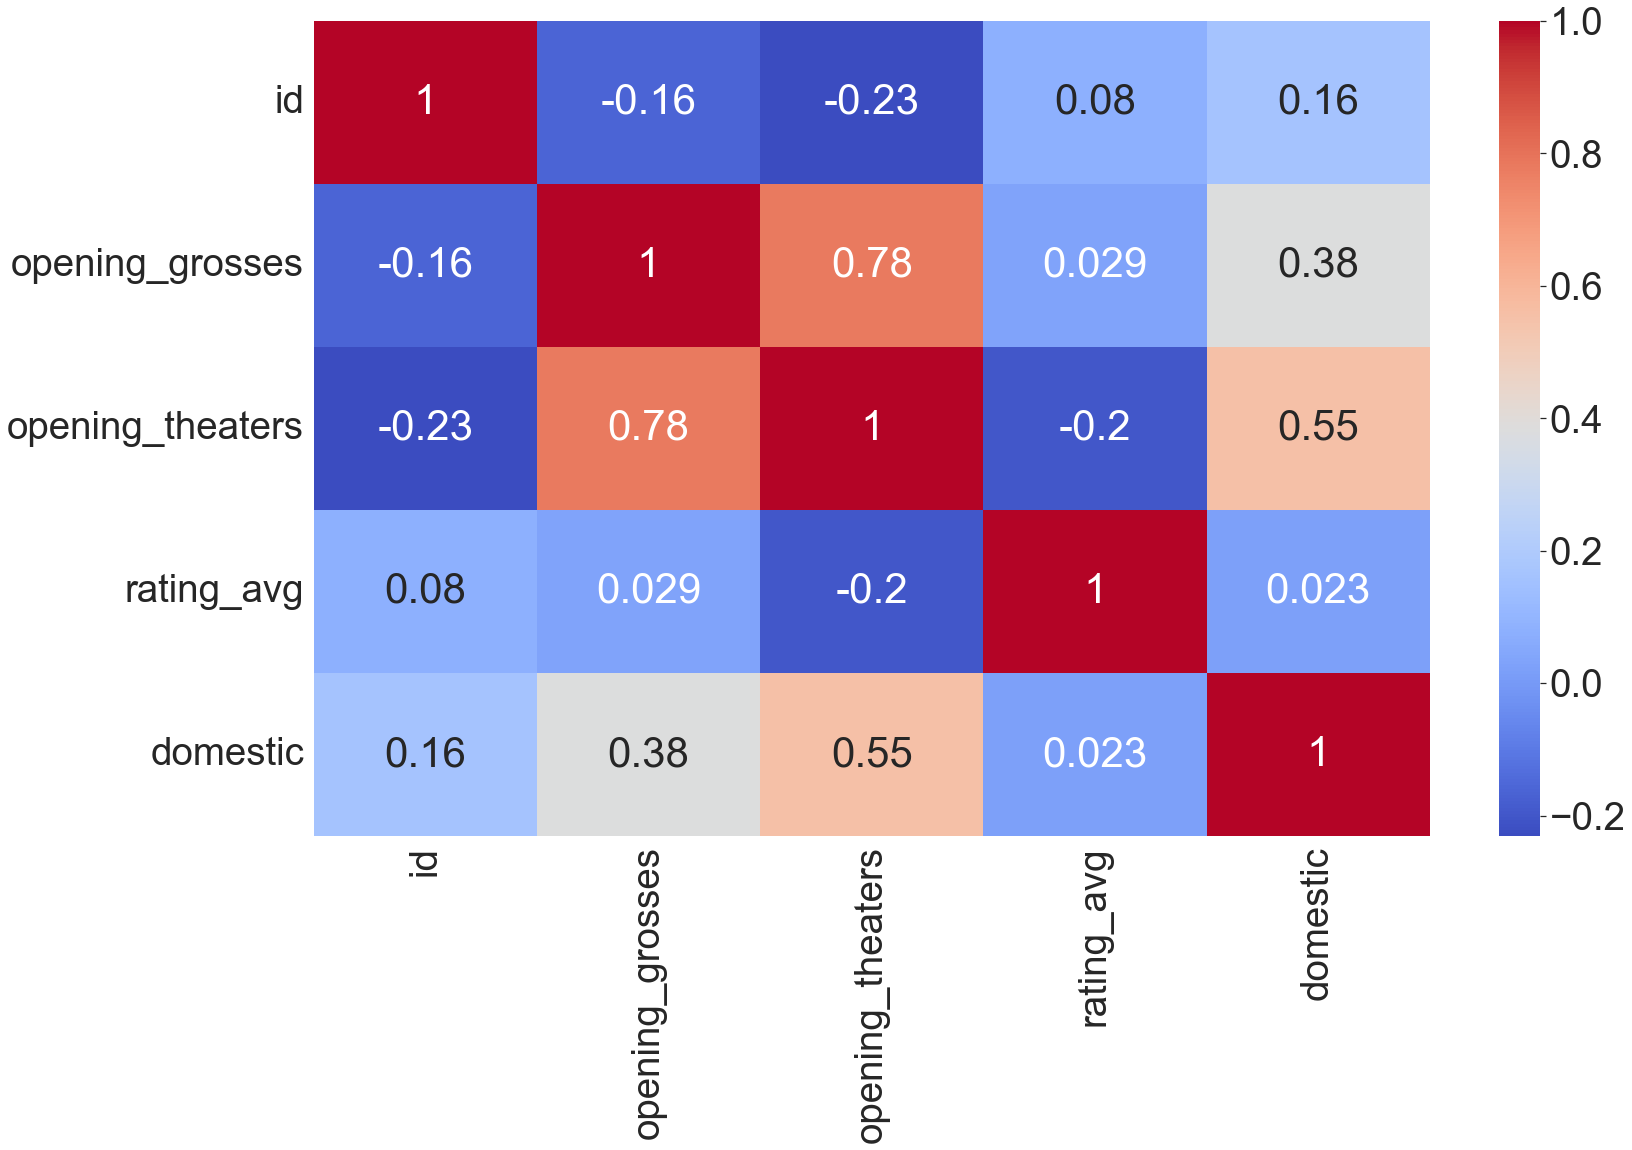

In [12]:
corrMatrix_movies = df_movies.corr()
sns.heatmap(corrMatrix_movies, annot = True, cmap= 'coolwarm')

<AxesSubplot:xlabel='opening_theaters', ylabel='opening_grosses'>

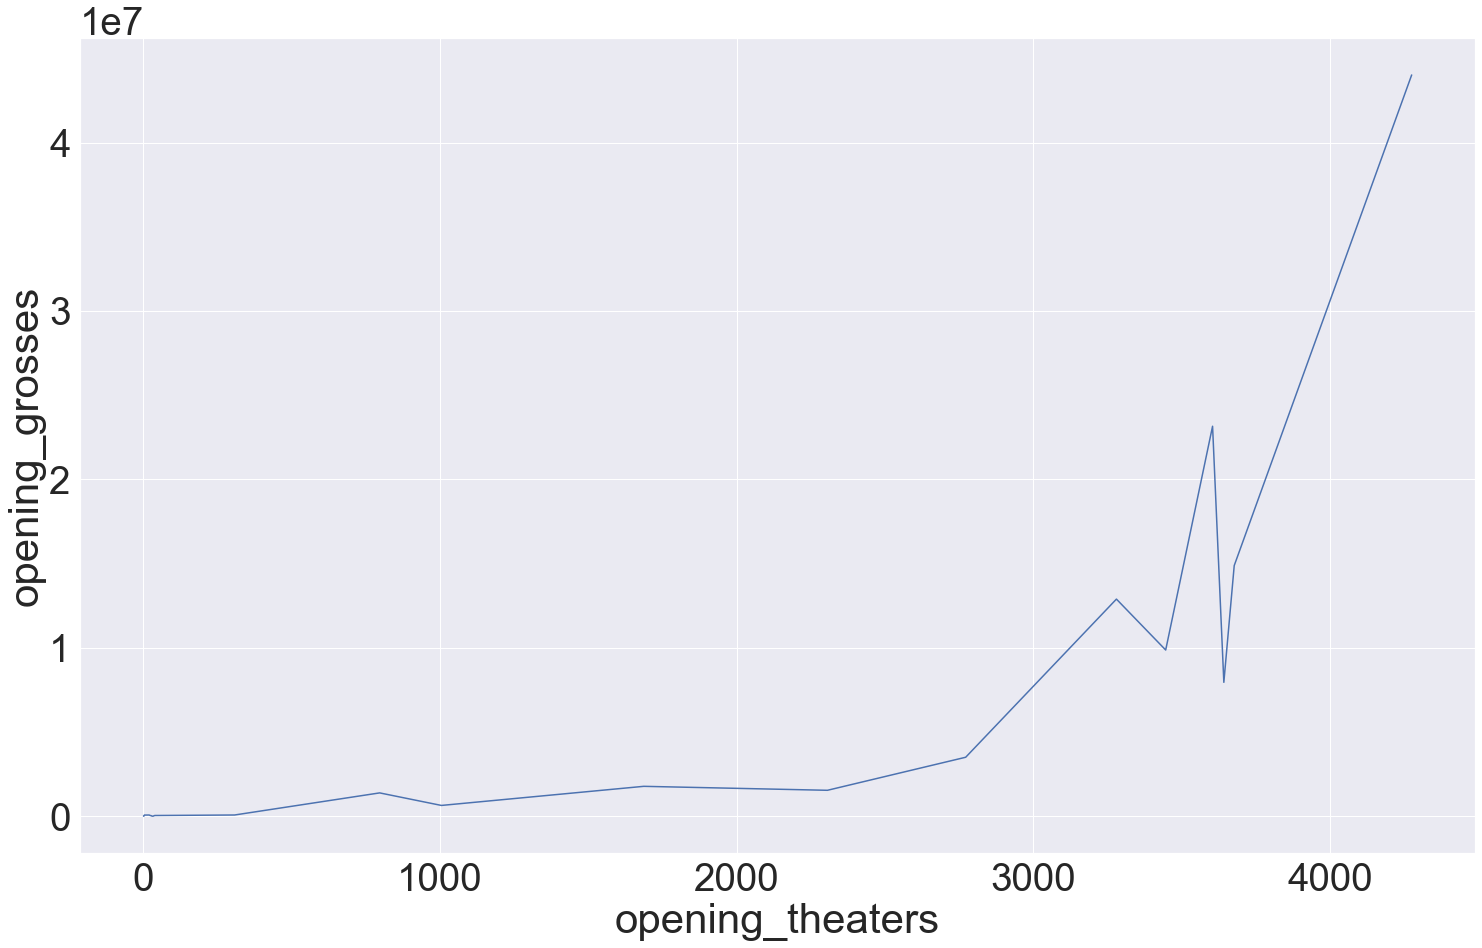

In [13]:
sns.lineplot(x="opening_theaters", y="opening_grosses",
             data=df_movies)
#Conclusión: correlación fuerte y explicar los puntos que bajan y por qué

<AxesSubplot:xlabel='opening_theaters', ylabel='opening_grosses'>

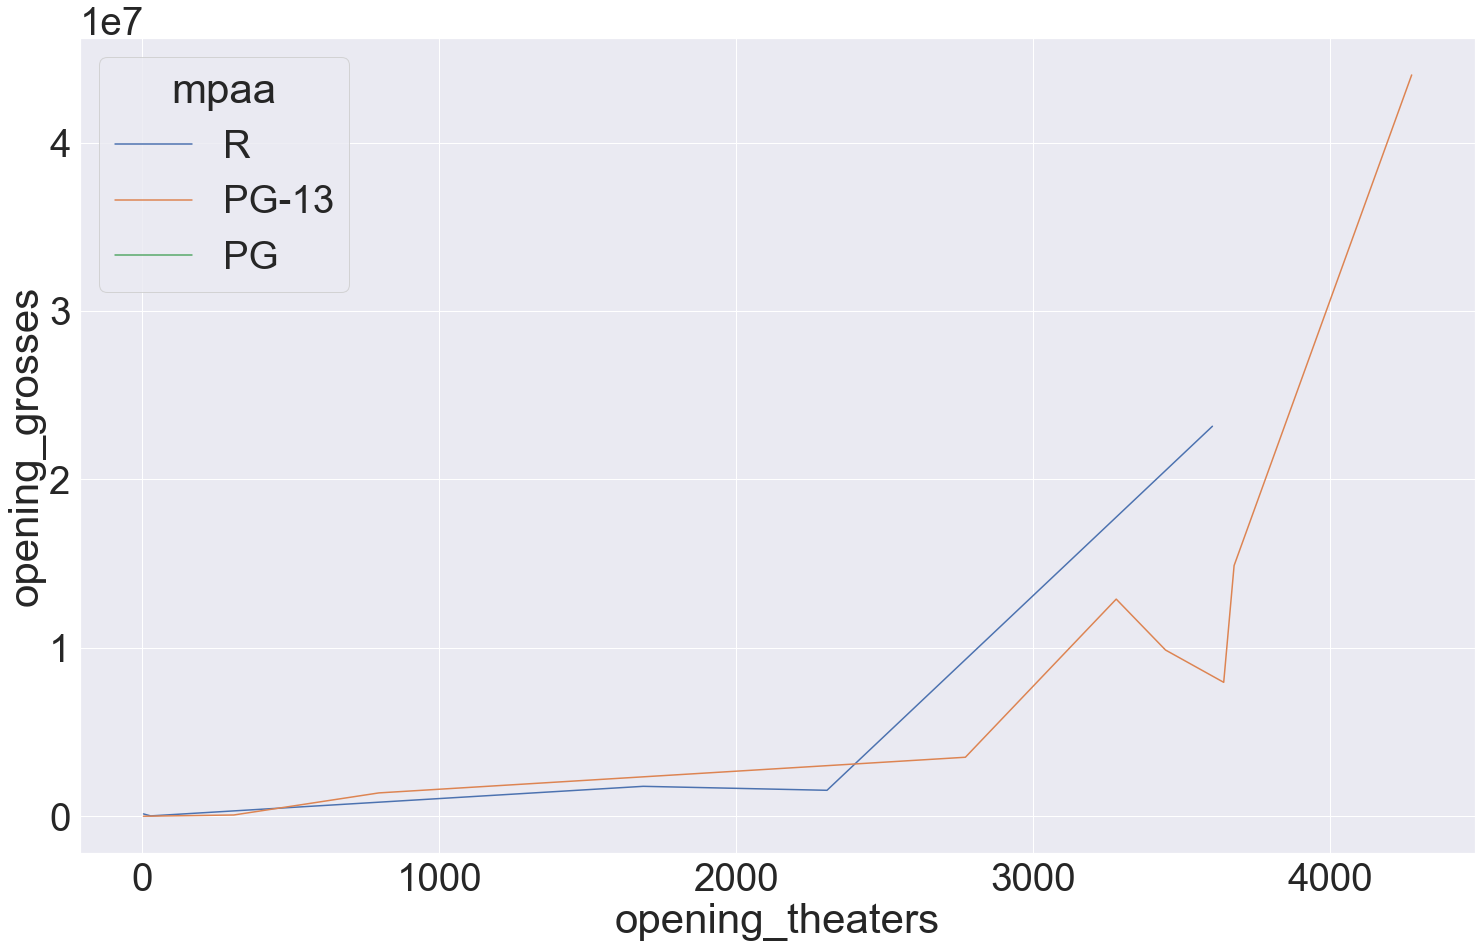

In [14]:
sns.lineplot(x="opening_theaters", y="opening_grosses",
             hue="mpaa",
             data=df_movies)

## Compare opening grosses with domestic or foreign countries

## Movie TW data in general

In [15]:
df_tweets_per_movie = df_tweets.groupby('movie_id')

In [16]:
df_tweets_per_movie.describe().status_id['count']

movie_id
1      68597.0
2      71213.0
3        150.0
4        441.0
5       3310.0
6         72.0
7         31.0
8        580.0
9        312.0
10    122103.0
11     26328.0
12       753.0
13       384.0
14       122.0
15        19.0
16       417.0
17         4.0
18       167.0
19        14.0
20     81114.0
21      4944.0
22      1247.0
23       229.0
24       264.0
25       272.0
26       100.0
27        37.0
28         1.0
29       117.0
30      2706.0
31      2770.0
32        28.0
33       102.0
34        18.0
35       660.0
36        13.0
Name: count, dtype: float64

In [17]:
df_tweets_per_movie.describe().quote_count

count      mean       std  min  25%  50%  75%     max
movie_id                                                          
1          68597.0  0.077307  2.811266  0.0  0.0  0.0  0.0   458.0
2          71213.0  0.056212  2.280571  0.0  0.0  0.0  0.0   448.0
3            150.0  0.073333  0.308638  0.0  0.0  0.0  0.0     2.0
4            441.0  0.034014  0.215796  0.0  0.0  0.0  0.0     3.0
5           3310.0  0.063444  0.701997  0.0  0.0  0.0  0.0    30.0
6             72.0  0.041667  0.201229  0.0  0.0  0.0  0.0     1.0
7             31.0  0.032258  0.179605  0.0  0.0  0.0  0.0     1.0
8            580.0  0.093103  1.061960  0.0  0.0  0.0  0.0    22.0
9            312.0  0.044872  0.327574  0.0  0.0  0.0  0.0     5.0
10        122103.0  0.029205  1.680900  0.0  0.0  0.0  0.0   356.0
11         26328.0  0.143118  5.570505  0.0  0.0  0.0  0.0   852.0
12           753.0  0.054449  0.400743  0.0  0.0  0.0  0.0     7.0
13           384.0  0.057292  0.301171  0.0  0.0  0.0  0.0     3.0
14           122.0  0.040984  0.372562  0.0  0.0  0.0  0.0     4.0
15            19.0  0.105263  0.315302  0.0  0.0  0.0  0.0     1.0
16           417.0  0.100719  0.403619  0.0  0.0  0.0  0.0     3.0
17             4.0  0.000000  0.000000  0.0  0.0  0.0  0.0     0.0
18           167.0  0.077844  0.329183  0.0  0.0  0.0  0.0     3.0
19            14.0  0.000000  0.000000  0.0  0.0  0.0  0.0     0.0
20         81114.0  0.138509  6.896283  0.0  0.0  0.0  0.0  1557.0
21          4944.0  0.098301  1.123942  0.0  0.0  0.0  0.0    53.0
22          1247.0  0.084202  0.694023  0.0  0.0  0.0  0.0    21.0
23           229.0  0.056769  0.326209  0.0  0.0  0.0  0.0     3.0
24           264.0  0.136364  1.138826  0.0  0.0  0.0  0.0    18.0
25           272.0  0.102941  0.408027  0.0  0.0  0.0  0.0     3.0
26           100.0  0.030000  0.171447  0.0  0.0  0.0  0.0     1.0
27            37.0  0.081081  0.363500  0.0  0.0  0.0  0.0     2.0
28             1.0  0.000000       NaN  0.0  0.0  0.0  0.0     0.0
29           117.0  0.017094  0.130179  0.0  0.0  0.0  0.0     1.0
30          2706.0  0.086475  0.945808  0.0  0.0  0.0  0.0    44.0
31          2770.0  0.098917  0.913147  0.0  0.0  0.0  0.0    30.0
32            28.0  0.035714  0.188982  0.0  0.0  0.0  0.0     1.0
33           102.0  0.009804  0.099015  0.0  0.0  0.0  0.0     1.0
34            18.0  0.111111  0.323381  0.0  0.0  0.0  0.0     1.0
35           660.0  0.030303  0.256609  0.0  0.0  0.0  0.0     5.0
36            13.0  0.000000  0.000000  0.0  0.0  0.0  0.0     0.0

In [18]:
df_tweets_per_movie['quote_count'].sum()

movie_id
1      5303
2      4003
3        11
4        15
5       210
6         3
7         1
8        54
9        14
10     3566
11     3768
12       41
13       22
14        5
15        2
16       42
17        0
18       13
19        0
20    11235
21      486
22      105
23       13
24       36
25       28
26        3
27        3
28        0
29        2
30      234
31      274
32        1
33        1
34        2
35       20
36        0
Name: quote_count, dtype: int64

In [19]:
df_tweets_per_movie.describe().reply_count

count      mean        std  min  25%  50%   75%     max
movie_id                                                            
1          68597.0  0.425966  24.720375  0.0  0.0  0.0  0.00  4617.0
2          71213.0  0.180501   4.583835  0.0  0.0  0.0  0.00   766.0
3            150.0  0.153333   0.501497  0.0  0.0  0.0  0.00     4.0
4            441.0  0.113379   0.432569  0.0  0.0  0.0  0.00     4.0
5           3310.0  0.150151   1.499307  0.0  0.0  0.0  0.00    75.0
6             72.0  0.125000   0.472855  0.0  0.0  0.0  0.00     3.0
7             31.0  0.193548   0.477448  0.0  0.0  0.0  0.00     2.0
8            580.0  0.165517   1.923453  0.0  0.0  0.0  0.00    44.0
9            312.0  0.288462   3.833361  0.0  0.0  0.0  0.00    67.0
10        122103.0  0.086435   2.184092  0.0  0.0  0.0  0.00   349.0
11         26328.0  0.242745   2.971546  0.0  0.0  0.0  0.00   262.0
12           753.0  0.212483   1.350730  0.0  0.0  0.0  0.00    31.0
13           384.0  0.101562   0.676033  0.0  0.0  0.0  0.00    11.0
14           122.0  0.188525   0.659727  0.0  0.0  0.0  0.00     4.0
15            19.0  0.000000   0.000000  0.0  0.0  0.0  0.00     0.0
16           417.0  0.203837   0.848746  0.0  0.0  0.0  0.00    12.0
17             4.0  0.250000   0.500000  0.0  0.0  0.0  0.25     1.0
18           167.0  0.185629   1.039131  0.0  0.0  0.0  0.00    11.0
19            14.0  0.000000   0.000000  0.0  0.0  0.0  0.00     0.0
20         81114.0  0.270545   3.970550  0.0  0.0  0.0  0.00   428.0
21          4944.0  0.336772   4.602383  0.0  0.0  0.0  0.00   217.0
22          1247.0  0.218925   1.092523  0.0  0.0  0.0  0.00    26.0
23           229.0  0.078603   0.314734  0.0  0.0  0.0  0.00     2.0
24           264.0  0.242424   2.372598  0.0  0.0  0.0  0.00    38.0
25           272.0  0.066176   0.302565  0.0  0.0  0.0  0.00     2.0
26           100.0  0.270000   0.565953  0.0  0.0  0.0  0.00     3.0
27            37.0  0.243243   1.320888  0.0  0.0  0.0  0.00     8.0
28             1.0  0.000000        NaN  0.0  0.0  0.0  0.00     0.0
29           117.0  0.076923   0.351201  0.0  0.0  0.0  0.00     3.0
30          2706.0  0.196970   0.869703  0.0  0.0  0.0  0.00    19.0
31          2770.0  0.335740   3.605289  0.0  0.0  0.0  0.00   108.0
32            28.0  0.035714   0.188982  0.0  0.0  0.0  0.00     1.0
33           102.0  0.068627   0.254068  0.0  0.0  0.0  0.00     1.0
34            18.0  1.222222   4.697378  0.0  0.0  0.0  0.00    20.0
35           660.0  0.180303   1.923240  0.0  0.0  0.0  0.00    39.0
36            13.0  0.153846   0.375534  0.0  0.0  0.0  0.00     1.0

In [20]:
df_tweets_per_movie['reply_count'].sum()

movie_id
1     29220
2     12854
3        23
4        50
5       497
6         9
7         6
8        96
9        90
10    10554
11     6391
12      160
13       39
14       23
15        0
16       85
17        1
18       31
19        0
20    21945
21     1665
22      273
23       18
24       64
25       18
26       27
27        9
28        0
29        9
30      533
31      930
32        1
33        7
34       22
35      119
36        2
Name: reply_count, dtype: int64

In [21]:
df_tweets_per_movie.describe().retweet_count

count         mean          std  min  25%   50%     75%      max
movie_id                                                                     
1          68597.0   115.024870   299.041090  0.0  0.0   0.0   44.00  17653.0
2          71213.0   317.759257   839.004311  0.0  0.0   0.0   68.00   3662.0
3            150.0     1.660000     2.424234  0.0  0.0   1.0    2.00      9.0
4            441.0     9.174603     6.376725  0.0  3.0   9.0   13.00     22.0
5           3310.0   133.390332   235.677187  0.0  1.0  15.0  135.00    772.0
6             72.0     2.222222     2.362991  0.0  0.0   1.0    4.25      6.0
7             31.0     1.741935     4.155059  0.0  0.0   1.0    1.00     23.0
8            580.0   111.389655   121.066447  0.0  1.0  32.0  256.00    256.0
9            312.0     5.554487     7.663140  0.0  1.0   3.0    5.00     28.0
10        122103.0    20.022088   104.990490  0.0  0.0   0.0    1.00   4793.0
11         26328.0    24.703016    52.272603  0.0  1.0   4.0   26.00   1327.0
12           753.0    13.844622    25.994650  0.0  0.0   2.0   13.00     85.0
13           384.0    22.989583    36.425752  0.0  1.0   4.0   11.00     89.0
14           122.0     5.885246     6.565873  0.0  0.0   4.0    8.00     19.0
15            19.0     3.684211     2.963718  0.0  1.0   2.0    7.00      7.0
16           417.0  1020.179856  1962.181458  0.0  0.0   2.0  413.00   4917.0
17             4.0     0.000000     0.000000  0.0  0.0   0.0    0.00      0.0
18           167.0     1.868263     2.250973  0.0  0.0   1.0    3.00      7.0
19            14.0     0.428571     0.513553  0.0  0.0   0.0    1.00      1.0
20         81114.0   270.610782  3537.676727  0.0  0.0   5.0   99.00  81436.0
21          4944.0    51.337176    98.018306  0.0  1.0  12.0   66.00    749.0
22          1247.0     6.075381    10.454246  0.0  0.0   2.0    6.00     39.0
23           229.0     2.598253     2.300876  0.0  1.0   2.0    4.00      8.0
24           264.0     5.935606    17.532144  0.0  0.0   1.0    3.00     91.0
25           272.0     3.301471     4.548744  0.0  0.0   1.0    5.00     18.0
26           100.0     1.680000     2.182946  0.0  0.0   1.0    3.25      7.0
27            37.0     1.162162     1.343989  0.0  0.0   1.0    2.00      4.0
28             1.0     4.000000          NaN  4.0  4.0   4.0    4.00      4.0
29           117.0     6.000000     3.022901  0.0  4.0   6.0    8.00     10.0
30          2706.0     6.603104    12.483982  0.0  0.0   1.0    6.00    186.0
31          2770.0    16.730325    37.446452  0.0  1.0   3.0   13.00    292.0
32            28.0     1.285714     1.462042  0.0  0.0   1.0    2.00      4.0
33           102.0     2.441176     2.996941  0.0  0.0   1.0    4.00      9.0
34            18.0     1.222222     1.477500  0.0  0.0   1.0    2.00      4.0
35           660.0    12.496970    22.746575  0.0  0.0   2.0    7.00     72.0
36            13.0     0.615385     0.506370  0.0  0.0   1.0    1.00      1.0

In [22]:
df_tweets_per_movie['retweet_count'].sum()

movie_id
1      7890361
2     22628590
3          249
4         4046
5       441522
6          160
7           54
8        64606
9         1733
10     2444757
11      650381
12       10425
13        8828
14         718
15          70
16      425415
17           0
18         312
19           6
20    21950323
21      253811
22        7576
23         595
24        1567
25         898
26         168
27          43
28           4
29         702
30       17868
31       46343
32          36
33         249
34          22
35        8248
36           8
Name: retweet_count, dtype: int64

In [23]:
df_tweets_per_movie.describe().like_count

count      mean        std  min  25%  50%  75%      max
movie_id                                                            
1          68597.0  3.592446  94.667447  0.0  0.0  0.0  0.0  16631.0
2          71213.0  1.828641  49.394963  0.0  0.0  0.0  0.0  10041.0
3            150.0  1.553333   5.999482  0.0  0.0  0.0  1.0     62.0
4            441.0  2.396825   7.543744  0.0  0.0  0.0  0.0     54.0
5           3310.0  2.189124  17.645579  0.0  0.0  0.0  0.0    672.0
6             72.0  1.486111   3.166698  0.0  0.0  0.0  1.0     18.0
7             31.0  0.580645   1.408881  0.0  0.0  0.0  0.0      6.0
8            580.0  2.731034  36.638788  0.0  0.0  0.0  0.0    835.0
9            312.0  3.237179  20.939390  0.0  0.0  0.0  1.0    325.0
10        122103.0  1.230715  31.504020  0.0  0.0  0.0  0.0   5492.0
11         26328.0  4.549833  72.703760  0.0  0.0  0.0  0.0   6365.0
12           753.0  3.193891  25.870116  0.0  0.0  0.0  0.0    607.0
13           384.0  1.294271   5.837608  0.0  0.0  0.0  0.0     85.0
14           122.0  3.262295  12.346782  0.0  0.0  0.0  1.0    114.0
15            19.0  1.842105   3.876756  0.0  0.0  0.0  0.5     13.0
16           417.0  1.690647   6.596381  0.0  0.0  0.0  0.0     62.0
17             4.0  1.000000   1.414214  0.0  0.0  0.5  1.5      3.0
18           167.0  1.257485   4.156522  0.0  0.0  0.0  1.0     43.0
19            14.0  1.571429   3.916715  0.0  0.0  0.5  1.0     15.0
20         81114.0  5.131149  98.320362  0.0  0.0  0.0  0.0   9374.0
21          4944.0  5.885922  72.104393  0.0  0.0  0.0  0.0   2575.0
22          1247.0  3.315156  18.710714  0.0  0.0  0.0  1.0    361.0
23           229.0  1.746725   4.745871  0.0  0.0  0.0  1.0     40.0
24           264.0  1.685606   9.085756  0.0  0.0  0.0  1.0    139.0
25           272.0  2.404412   8.267554  0.0  0.0  0.0  1.0    110.0
26           100.0  1.610000   4.523552  0.0  0.0  0.0  1.0     31.0
27            37.0  1.837838   5.220225  0.0  0.0  0.0  1.0     28.0
28             1.0  0.000000        NaN  0.0  0.0  0.0  0.0      0.0
29           117.0  1.615385   4.334795  0.0  0.0  0.0  0.0     25.0
30          2706.0  3.181079  17.183637  0.0  0.0  0.0  1.0    389.0
31          2770.0  3.759928  27.249999  0.0  0.0  0.0  1.0    709.0
32            28.0  1.285714   1.921750  0.0  0.0  1.0  2.0      9.0
33           102.0  0.666667   1.910541  0.0  0.0  0.0  0.0     11.0
34            18.0  7.055556  27.718060  0.0  0.0  0.0  0.0    118.0
35           660.0  1.150000   5.595651  0.0  0.0  0.0  0.0    113.0
36            13.0  0.692308   1.182132  0.0  0.0  0.0  1.0      3.0

In [24]:
df_tweets_per_movie['like_count'].sum()

movie_id
1     246431
2     130223
3        233
4       1057
5       7246
6        107
7         18
8       1584
9       1010
10    150274
11    119788
12      2405
13       497
14       398
15        35
16       705
17         4
18       210
19        22
20    416208
21     29100
22      4134
23       400
24       445
25       654
26       161
27        68
28         0
29       189
30      8608
31     10415
32        36
33        68
34       127
35       759
36         9
Name: like_count, dtype: int64

In [25]:
df_tweets_per_movie.describe().sentiment

count      mean       std  min   25%  50%  75%  max
movie_id                                                        
1          68597.0  0.372728  0.704278 -1.0  0.00  1.0  1.0  1.0
2          71213.0 -0.025361  0.602894 -1.0  0.00  0.0  0.0  1.0
3            150.0  0.293333  0.619013 -1.0  0.00  0.0  1.0  1.0
4            441.0  0.274376  0.602647 -1.0  0.00  0.0  1.0  1.0
5           3310.0  0.130514  0.588398 -1.0  0.00  0.0  0.0  1.0
6             72.0  0.666667  0.530745 -1.0  0.00  1.0  1.0  1.0
7             31.0  0.387097  0.558416 -1.0  0.00  0.0  1.0  1.0
8            580.0  0.058621  0.690432 -1.0  0.00  0.0  1.0  1.0
9            312.0  0.323718  0.595547 -1.0  0.00  0.0  1.0  1.0
10        122103.0  0.502150  0.522896 -1.0  0.00  1.0  1.0  1.0
11         26328.0  0.353578  0.603718 -1.0  0.00  0.0  1.0  1.0
12           753.0  0.343958  0.672320 -1.0  0.00  0.0  1.0  1.0
13           384.0  0.690104  0.560032 -1.0  0.00  1.0  1.0  1.0
14           122.0  0.139344  0.370739 -1.0  0.00  0.0  0.0  1.0
15            19.0  0.526316  0.696692 -1.0  0.00  1.0  1.0  1.0
16           417.0  0.443645  0.652152 -1.0  0.00  1.0  1.0  1.0
17             4.0  0.750000  0.500000  0.0  0.75  1.0  1.0  1.0
18           167.0  0.353293  0.677325 -1.0  0.00  0.0  1.0  1.0
19            14.0  0.571429  0.513553  0.0  0.00  1.0  1.0  1.0
20         81114.0  0.260941  0.546224 -1.0  0.00  0.0  1.0  1.0
21          4944.0  0.398463  0.630185 -1.0  0.00  0.0  1.0  1.0
22          1247.0  0.384122  0.716132 -1.0  0.00  1.0  1.0  1.0
23           229.0  0.401747  0.631898 -1.0  0.00  0.0  1.0  1.0
24           264.0  0.465909  0.621825 -1.0  0.00  1.0  1.0  1.0
25           272.0  0.452206  0.611630 -1.0  0.00  1.0  1.0  1.0
26           100.0  0.340000  0.476095  0.0  0.00  0.0  1.0  1.0
27            37.0  0.675676  0.474579  0.0  0.00  1.0  1.0  1.0
28             1.0  0.000000       NaN  0.0  0.00  0.0  0.0  0.0
29           117.0  0.726496  0.447675  0.0  0.00  1.0  1.0  1.0
30          2706.0  0.358832  0.678852 -1.0  0.00  0.0  1.0  1.0
31          2770.0  0.578339  0.588655 -1.0  0.00  1.0  1.0  1.0
32            28.0  0.321429  0.475595  0.0  0.00  0.0  1.0  1.0
33           102.0  0.470588  0.592125 -1.0  0.00  1.0  1.0  1.0
34            18.0  0.555556  0.615699 -1.0  0.00  1.0  1.0  1.0
35           660.0 -0.113636  0.606587 -1.0  0.00  0.0  0.0  1.0
36            13.0  0.769231  0.438529  0.0  1.00  1.0  1.0  1.0

## Movie TW data per timepoint

In [26]:
df_tweets_per_movie_tp = df_tweets.groupby(['movie_id', 'timepoint'])

In [27]:
df_tweets_per_movie_tp.describe().status_id['count']

movie_id  timepoint
1         1            20962.0
          2            42432.0
          3             5203.0
2         1            31294.0
          2            33007.0
                        ...   
35        2              215.0
          3              309.0
36        1                1.0
          2                2.0
          3               10.0
Name: count, Length: 104, dtype: float64

In [28]:
df_tweets_per_movie_tp.describe().quote_count

count      mean       std  min  25%  50%  75%    max
movie_id timepoint                                                        
1        1          20962.0  0.119931  2.926386  0.0  0.0  0.0  0.0  218.0
         2          42432.0  0.054534  2.783093  0.0  0.0  0.0  0.0  458.0
         3           5203.0  0.091293  2.553150  0.0  0.0  0.0  0.0  172.0
2        1          31294.0  0.061801  1.859272  0.0  0.0  0.0  0.0  221.0
         2          33007.0  0.054110  2.801354  0.0  0.0  0.0  0.0  448.0
...                     ...       ...       ...  ...  ...  ...  ...    ...
35       2            215.0  0.055814  0.382626  0.0  0.0  0.0  0.0    5.0
         3            309.0  0.019417  0.179135  0.0  0.0  0.0  0.0    2.0
36       1              1.0  0.000000       NaN  0.0  0.0  0.0  0.0    0.0
         2              2.0  0.000000  0.000000  0.0  0.0  0.0  0.0    0.0
         3             10.0  0.000000  0.000000  0.0  0.0  0.0  0.0    0.0

[104 rows x 8 columns]

In [29]:
df_tweets_per_movie_tp['quote_count'].sum()

movie_id  timepoint
1         1            2514
          2            2314
          3             475
2         1            1934
          2            1786
                       ... 
35        2              12
          3               6
36        1               0
          2               0
          3               0
Name: quote_count, Length: 104, dtype: int64

In [30]:
df_tweets_per_movie_tp.describe().reply_count

count      mean        std  min   25%  50%   75%     max
movie_id timepoint                                                            
1        1          20962.0  0.437792  31.119019  0.0  0.00  0.0  0.00  4459.0
         2          42432.0  0.442449  22.507178  0.0  0.00  0.0  0.00  4617.0
         3           5203.0  0.243898   4.916166  0.0  0.00  0.0  0.00   342.0
2        1          31294.0  0.135106   2.294065  0.0  0.00  0.0  0.00   265.0
         2          33007.0  0.200261   5.680553  0.0  0.00  0.0  0.00   766.0
...                     ...       ...        ...  ...   ...  ...   ...     ...
35       2            215.0  0.116279   0.374995  0.0  0.00  0.0  0.00     2.0
         3            309.0  0.177994   1.704854  0.0  0.00  0.0  0.00    26.0
36       1              1.0  0.000000        NaN  0.0  0.00  0.0  0.00     0.0
         2              2.0  0.500000   0.707107  0.0  0.25  0.5  0.75     1.0
         3             10.0  0.100000   0.316228  0.0  0.00  0.0  0.00     1.0

[104 rows x 8 columns]

In [31]:
df_tweets_per_movie_tp['reply_count'].sum()

movie_id  timepoint
1         1             9177
          2            18774
          3             1269
2         1             4228
          2             6610
                       ...  
35        2               25
          3               55
36        1                0
          2                1
          3                1
Name: reply_count, Length: 104, dtype: int64

In [32]:
df_tweets_per_movie_tp.describe().retweet_count

count        mean          std  min  25%   50%    75%  \
movie_id timepoint                                                            
1        1          20962.0  256.455205   438.840347  0.0  0.0  26.0  336.0   
         2          42432.0   49.581259   180.222950  0.0  0.0   0.0    3.0   
         3           5203.0   78.938113   146.454912  0.0  0.0   5.0   80.0   
2        1          31294.0  518.537355  1110.512339  0.0  0.0   1.0  192.0   
         2          33007.0  120.184052   453.921889  0.0  0.0   0.0   16.0   
...                     ...         ...          ...  ...  ...   ...    ...   
35       2            215.0    1.409302     4.886555  0.0  0.0   0.0    1.5   
         3            309.0   24.533981    28.508764  0.0  1.0   6.0   41.0   
36       1              1.0    0.000000          NaN  0.0  0.0   0.0    0.0   
         2              2.0    0.000000     0.000000  0.0  0.0   0.0    0.0   
         3             10.0    0.800000     0.421637  0.0  1.0   1.0    1.0   

                        max  
movie_id timepoint           
1        1           1758.0  
         2          17653.0  
         3           1758.0  
2        1           3662.0  
         2           3662.0  
...                     ...  
35       2             41.0  
         3             72.0  
36       1              0.0  
         2              0.0  
         3              1.0  

[104 rows x 8 columns]

In [33]:
df_tweets_per_movie_tp['retweet_count'].sum()

movie_id  timepoint
1         1             5375814
          2             2103832
          3              410715
2         1            16227108
          2             3966915
                         ...   
35        2                 303
          3                7581
36        1                   0
          2                   0
          3                   8
Name: retweet_count, Length: 104, dtype: int64

In [34]:
df_tweets_per_movie_tp.describe().like_count

count      mean         std  min  25%  50%   75%  \
movie_id timepoint                                                       
1        1          20962.0  6.165204  154.298384  0.0  0.0  0.0  0.00   
         2          42432.0  2.208121   46.884486  0.0  0.0  0.0  0.00   
         3           5203.0  4.516817   65.354023  0.0  0.0  0.0  0.00   
2        1          31294.0  2.096280   66.855862  0.0  0.0  0.0  0.00   
         2          33007.0  1.592662   30.666677  0.0  0.0  0.0  0.00   
...                     ...       ...         ...  ...  ...  ...   ...   
35       2            215.0  1.455814    7.878555  0.0  0.0  0.0  1.00   
         3            309.0  0.886731    3.821944  0.0  0.0  0.0  0.00   
36       1              1.0  0.000000         NaN  0.0  0.0  0.0  0.00   
         2              2.0  0.000000    0.000000  0.0  0.0  0.0  0.00   
         3             10.0  0.900000    1.286684  0.0  0.0  0.0  1.75   

                        max  
movie_id timepoint           
1        1          16631.0  
         2           4192.0  
         3           3604.0  
2        1          10041.0  
         2           3327.0  
...                     ...  
35       2            113.0  
         3             44.0  
36       1              0.0  
         2              0.0  
         3              3.0  

[104 rows x 8 columns]

In [35]:
df_tweets_per_movie_tp['like_count'].sum()

movie_id  timepoint
1         1            129235
          2             93695
          3             23501
2         1             65601
          2             52569
                        ...  
35        2               313
          3               274
36        1                 0
          2                 0
          3                 9
Name: like_count, Length: 104, dtype: int64

In [36]:
df_tweets_per_movie_tp.describe().sentiment

count      mean       std  min  25%  50%  75%  max
movie_id timepoint                                                      
1        1          20962.0  0.343049  0.709317 -1.0  0.0  0.0  1.0  1.0
         2          42432.0  0.397130  0.689549 -1.0  0.0  1.0  1.0  1.0
         3           5203.0  0.293292  0.787547 -1.0  0.0  0.0  1.0  1.0
2        1          31294.0 -0.195533  0.727248 -1.0 -1.0  0.0  0.0  1.0
         2          33007.0  0.093071  0.424157 -1.0  0.0  0.0  0.0  1.0
...                     ...       ...       ...  ...  ...  ...  ...  ...
35       2            215.0 -0.167442  0.729781 -1.0 -1.0  0.0  0.0  1.0
         3            309.0 -0.012945  0.386242 -1.0  0.0  0.0  0.0  1.0
36       1              1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0
         2              2.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
         3             10.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0

[104 rows x 8 columns]

## Unify everything in a final dataframe

In [37]:
df = df_movies

### Add TW data in general

In [38]:
df = df.join(df_tweets_per_movie.describe().status_id['count'], on="id")
df.rename(columns={"count": "tw_all_tweet_count"}, inplace = True)
df = df.join(df_tweets_per_movie['quote_count'].sum(), on="id")
df.rename(columns={"quote_count": "tw_all_quote_count"}, inplace = True)
df = df.join(df_tweets_per_movie.describe().quote_count['mean'], on="id")
df.rename(columns={"mean": "tw_all_quote_mean"}, inplace = True)
df = df.join(df_tweets_per_movie['reply_count'].sum(), on="id")
df.rename(columns={"reply_count": "tw_all_reply_count"}, inplace = True)
df = df.join(df_tweets_per_movie.describe().reply_count['mean'], on="id")
df.rename(columns={"mean": "tw_all_reply_mean"}, inplace = True)
df = df.join(df_tweets_per_movie['retweet_count'].sum(), on="id")
df.rename(columns={"retweet_count": "tw_all_retweet_count"}, inplace = True)
df = df.join(df_tweets_per_movie.describe().retweet_count['mean'], on="id")
df.rename(columns={"mean": "tw_all_retweet_mean"}, inplace = True)
df = df.join(df_tweets_per_movie['like_count'].sum(), on="id")
df.rename(columns={"like_count": "tw_all_like_count"}, inplace = True)
df = df.join(df_tweets_per_movie.describe().like_count['mean'], on="id")
df.rename(columns={"mean": "tw_all_like_mean"}, inplace = True)
df = df.join(df_tweets_per_movie.describe().sentiment['mean'], on="id")
df.rename(columns={"mean": "tw_all_sentiment_mean"}, inplace = True)

### Add TW data for timepoint 1

In [39]:
df = df.join(df_tweets_per_movie_tp.describe().status_id['count'][:,1], on="id")
df.rename(columns={"count": "tw_t1_tweet_count"}, inplace = True)
df = df.join(df_tweets_per_movie_tp['quote_count'].sum()[:,1], on="id")
df.rename(columns={"quote_count": "tw_t1_quote_count"}, inplace = True)
df = df.join(df_tweets_per_movie_tp.describe().quote_count['mean'][:,1], on="id")
df.rename(columns={"mean": "tw_t1_quote_mean"}, inplace = True)
df = df.join(df_tweets_per_movie_tp['reply_count'].sum()[:,1], on="id")
df.rename(columns={"reply_count": "tw_t1_reply_count"}, inplace = True)
df = df.join(df_tweets_per_movie_tp.describe().reply_count['mean'][:,1], on="id")
df.rename(columns={"mean": "tw_t1_reply_mean"}, inplace = True)
df = df.join(df_tweets_per_movie_tp['retweet_count'].sum()[:,1], on="id")
df.rename(columns={"retweet_count": "tw_t1_retweet_count"}, inplace = True)
df = df.join(df_tweets_per_movie_tp.describe().retweet_count['mean'][:,1], on="id")
df.rename(columns={"mean": "tw_t1_retweet_mean"}, inplace = True)
df = df.join(df_tweets_per_movie_tp['like_count'].sum()[:,1], on="id")
df.rename(columns={"like_count": "tw_t1_like_count"}, inplace = True)
df = df.join(df_tweets_per_movie_tp.describe().like_count['mean'][:,1], on="id")
df.rename(columns={"mean": "tw_t1_like_mean"}, inplace = True)
df = df.join(df_tweets_per_movie_tp.describe().sentiment['mean'][:,1], on="id")
df.rename(columns={"mean": "tw_t1_sentiment_mean"}, inplace = True)

### Add TW data for timepoint 2

In [40]:
df = df.join(df_tweets_per_movie_tp.describe().status_id['count'][:,2], on="id")
df.rename(columns={"count": "tw_t2_tweet_count"}, inplace = True)
df = df.join(df_tweets_per_movie_tp['quote_count'].sum()[:,2], on="id")
df.rename(columns={"quote_count": "tw_t2_quote_count"}, inplace = True)
df = df.join(df_tweets_per_movie_tp.describe().quote_count['mean'][:,2], on="id")
df.rename(columns={"mean": "tw_t2_quote_mean"}, inplace = True)
df = df.join(df_tweets_per_movie_tp['reply_count'].sum()[:,2], on="id")
df.rename(columns={"reply_count": "tw_t2_reply_count"}, inplace = True)
df = df.join(df_tweets_per_movie_tp.describe().reply_count['mean'][:,2], on="id")
df.rename(columns={"mean": "tw_t2_reply_mean"}, inplace = True)
df = df.join(df_tweets_per_movie_tp['retweet_count'].sum()[:,2], on="id")
df.rename(columns={"retweet_count": "tw_t2_retweet_count"}, inplace = True)
df = df.join(df_tweets_per_movie_tp.describe().retweet_count['mean'][:,2], on="id")
df.rename(columns={"mean": "tw_t2_retweet_mean"}, inplace = True)
df = df.join(df_tweets_per_movie_tp['like_count'].sum()[:,2], on="id")
df.rename(columns={"like_count": "tw_t2_like_count"}, inplace = True)
df = df.join(df_tweets_per_movie_tp.describe().like_count['mean'][:,2], on="id")
df.rename(columns={"mean": "tw_t2_like_mean"}, inplace = True)
df = df.join(df_tweets_per_movie_tp.describe().sentiment['mean'][:,2], on="id")
df.rename(columns={"mean": "tw_t2_sentiment_mean"}, inplace = True)

### Add TW data for timepoint 3

In [41]:
df = df.join(df_tweets_per_movie_tp.describe().status_id['count'][:,3], on="id")
df.rename(columns={"count": "tw_t3_tweet_count"}, inplace = True)
df = df.join(df_tweets_per_movie_tp['quote_count'].sum()[:,3], on="id")
df.rename(columns={"quote_count": "tw_t3_quote_count"}, inplace = True)
df = df.join(df_tweets_per_movie_tp.describe().quote_count['mean'][:,3], on="id")
df.rename(columns={"mean": "tw_t3_quote_mean"}, inplace = True)
df = df.join(df_tweets_per_movie_tp['reply_count'].sum()[:,3], on="id")
df.rename(columns={"reply_count": "tw_t3_reply_count"}, inplace = True)
df = df.join(df_tweets_per_movie_tp.describe().reply_count['mean'][:,3], on="id")
df.rename(columns={"mean": "tw_t3_reply_mean"}, inplace = True)
df = df.join(df_tweets_per_movie_tp['retweet_count'].sum()[:,3], on="id")
df.rename(columns={"retweet_count": "tw_t3_retweet_count"}, inplace = True)
df = df.join(df_tweets_per_movie_tp.describe().retweet_count['mean'][:,3], on="id")
df.rename(columns={"mean": "tw_t3_retweet_mean"}, inplace = True)
df = df.join(df_tweets_per_movie_tp['like_count'].sum()[:,3], on="id")
df.rename(columns={"like_count": "tw_t3_like_count"}, inplace = True)
df = df.join(df_tweets_per_movie_tp.describe().like_count['mean'][:,3], on="id")
df.rename(columns={"mean": "tw_t3_like_mean"}, inplace = True)
df = df.join(df_tweets_per_movie_tp.describe().sentiment['mean'][:,3], on="id")
df.rename(columns={"mean": "tw_t3_sentiment_mean"}, inplace = True)

In [42]:
df

id                           name                   hashtag  \
0    1                Jackass Forever            jackassforever   
1    2                       Moonfall                  moonfall   
2    3          The Wolf and the Lion         thewolfandthelion   
3    4             Only Fools Rush In           onlyfoolsrushin   
4    5  The Worst Person in the World  theworstpersonintheworld   
5    6                 Breaking Bread             breakingbread   
6    7                         Lingui                    lingui   
7    8                 The Long Night              thelongnight   
8    9                 Last Survivors             lastsurvivors   
9   10                       Marry Me              marrymemovie   
10  11              Death on the Nile            deathonthenile   
11  12                     Blacklight           blacklightmovie   
12  13             Catch the Fair One           catchthefairone   
13  14              Water Gate Bridge           watergatebridge   
14  15      Fabian: Going to the Dogs      fabiangoingtothedogs   
15  16                      Supercool                 supercool   
16  17                       Ronnie's                   ronnies   
17  18                    Cosmic Dawn                cosmicdawn   
18  19                   Give or Take                giveortake   
19  20                      Uncharted                 uncharted   
20  21                            Dog                  dogmovie   
21  22                     The Cursed                 thecursed   
22  23                      A Banquet                  abanquet   
23  24                          Ted K                      tedk   
24  25             Strawberry Mansion         strawberrymansion   
25  26               Too Cool to Kill             toocooltokill   
26  27                    The Automat                theautomat   
27  28                 Finding Carlos        findingcarlosmovie   
28  29         A Fairy Tale After All        afairytaleafterall   
29  30                     Studio 666                 studio666   
30  31                         Cyrano               cyranomovie   
31  32                         Butter            butterthemovie   
32  33                The Burning Sea             theburningsea   
33  34                   Let Me Be Me                 letmebeme   
34  35             The Desperate Hour          thedesperatehour   
35  36                     Moon Manor                 moonmanor   

                                    countries   mpaa  \
0                               United States      R   
1   United States;China;United Kingdom;Canada  PG-13   
2                               France;Canada     PG   
3                                       China   None   
4                Norway;France;Sweden;Denmark      R   
5                        United States;Israel   None   
6                 Chad;France;Belgium;Germany   None   
7                               United States      R   
8                               United States   None   
9                         United States;Japan  PG-13   
10               United States;United Kingdom  PG-13   
11              United States;Australia;China  PG-13   
12                              United States   None   
13                                      China   None   
14                                    Germany   None   
15               Canada;Finland;United States   None   
16                             United Kingdom   None   
17                                     Canada   None   
18                              United States   None   
19                        United States;Spain  PG-13   
20                              United States  PG-13   
21                              United States      R   
22                             United Kingdom   None   
23                              United States      R   
24                              United States   None   
25                                      China   None   
26          

In [43]:
df.describe()

id  opening_grosses  opening_theaters  rating_avg  \
count  36.000000     2.500000e+01         25.000000   36.000000   
mean   18.500000     4.882695e+06       1240.520000    6.136111   
std    10.535654     1.009430e+07       1578.550604    1.209286   
min     1.000000     3.710000e+02          1.000000    3.500000   
25%     9.750000     1.391700e+04         20.000000    5.275000   
50%    18.500000     7.393700e+04         39.000000    6.300000   
75%    27.250000     3.502475e+06       2772.000000    7.000000   
max    36.000000     4.401016e+07       4275.000000    8.400000   

       tw_all_tweet_count  tw_all_quote_count  tw_all_quote_mean  \
count           36.000000           36.000000          36.000000   
mean         10823.305556          819.888889           0.062296   
std          28180.870729         2226.572045           0.040711   
min              1.000000            0.000000           0.000000   
25%             63.250000            2.000000           0.031769   
50%            268.000000           14.500000           0.057030   
75%           1611.750000          131.250000           0.094403   
max         122103.000000        11235.000000           0.143118   

       tw_all_reply_count  tw_all_reply_mean  tw_all_retweet_count  \
count           36.000000          36.000000          3.600000e+01   
mean          2382.527778           0.201781          1.579464e+06   
std           6442.750373           0.201150          5.273018e+06   
min              0.000000           0.000000          0.000000e+00   
25%              9.000000           0.097781          1.375000e+02   
50%             35.000000           0.183065          1.232500e+03   
75%            329.000000           0.242870          5.090875e+04   
max          29220.000000           1.222222          2.262859e+07   

       tw_all_retweet_mean  tw_all_like_count  tw_all_like_mean  \
count            36.000000          36.000000         36.000000   
mean             61.267182       31489.666667          2.319763   
std             179.558744       85064.867394          1.531993   
min               0.000000           0.000000          0.000000   
25%               1.836681          97.250000          1.292132   
50%               5.910426         471.000000          1.787683   
75%              20.763962        4912.000000          3.204713   
max            1020.179856      416208.000000          7.055556   

       tw_all_sentiment_mean  tw_t1_tweet_count  tw_t1_quote_count  \
count              36.000000          35.000000          35.000000   
mean                0.394484        4648.257143         479.400000   
std                 0.217494       12691.153353        1464.521066   
min                -0.113636           1.000000           0.000000   
25%                 0.314405          20.500000           1.000000   
50%                 0.385609          88.000000           5.000000   
75%                 0.533626         367.500000          21.500000   
max                 0.769231       56682.000000        7982.000000   

       tw_t1_quote_mean  tw_t1_reply_count  tw_t1_reply_mean  \
count         35.000000          35.000000         35.000000   
mean           0.075962         968.485714          0.182782   
std            0.073352        2543.157201          0.156815   
min            0.000000           0.000000          0.000000   
25%            0.015974           1.500000          0.069919   
50%            0.061801          11.000000          0.162162   
75%            0.107178          65.500000          0.246823   
max            0.333333       10969.000000          0.646154   

       tw_t1_retweet_count  tw_t1_retweet_mean  tw_t1_like_count  \
count         3.500000e+01           35.000000         35.000000   
mean          8.789651e+05          103.108155      16995.914286   
std           3.061932e+06          405.398846      46271.103146   
min           0.000000e+00            0.000000          0.000000   
25%           

### Correlation between all variables

In [44]:
df_corr = df.loc[:, df.columns != 'id']

<AxesSubplot:>

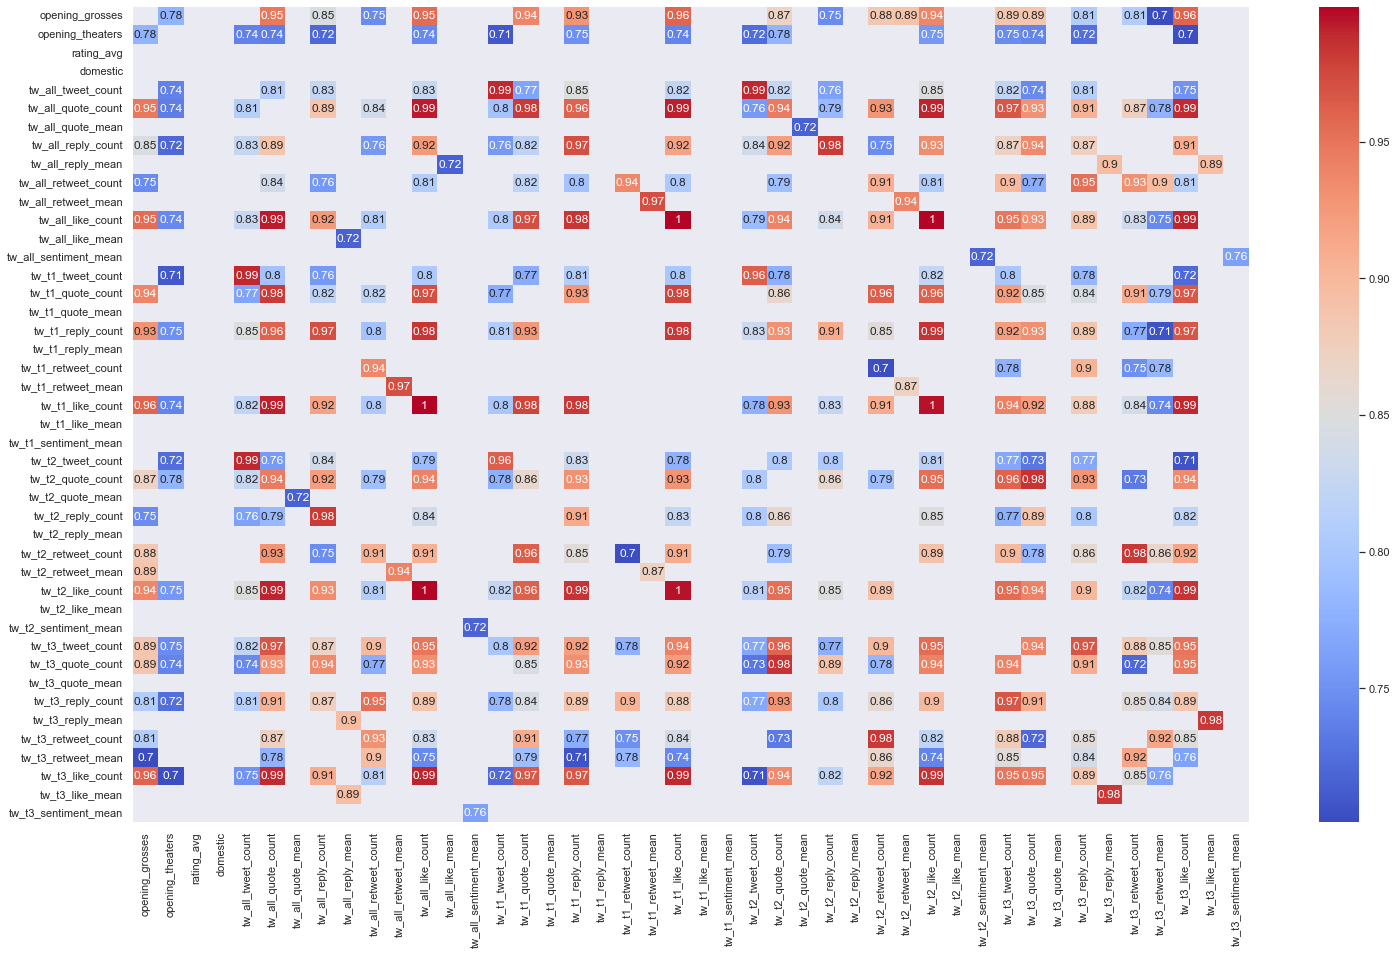

In [45]:
corrMatrix = df_corr.corr()
sns.set(rc = {'figure.figsize':(25,15)})
filteredCorrMatrix = corrMatrix[((corrMatrix >= .7) | (corrMatrix <= -.7)) & (corrMatrix !=1.000)]
sns.heatmap(filteredCorrMatrix, annot = True, cmap= 'coolwarm')
# Posible conclusión: tantas fuertes correlaciones que no tiene sentido separar por semanas solo teniendo en cuenta las directamente cercanas al estreno.
# Nota y sentimiento: No hay correlación
# Opening grosses y ntweets

<AxesSubplot:>

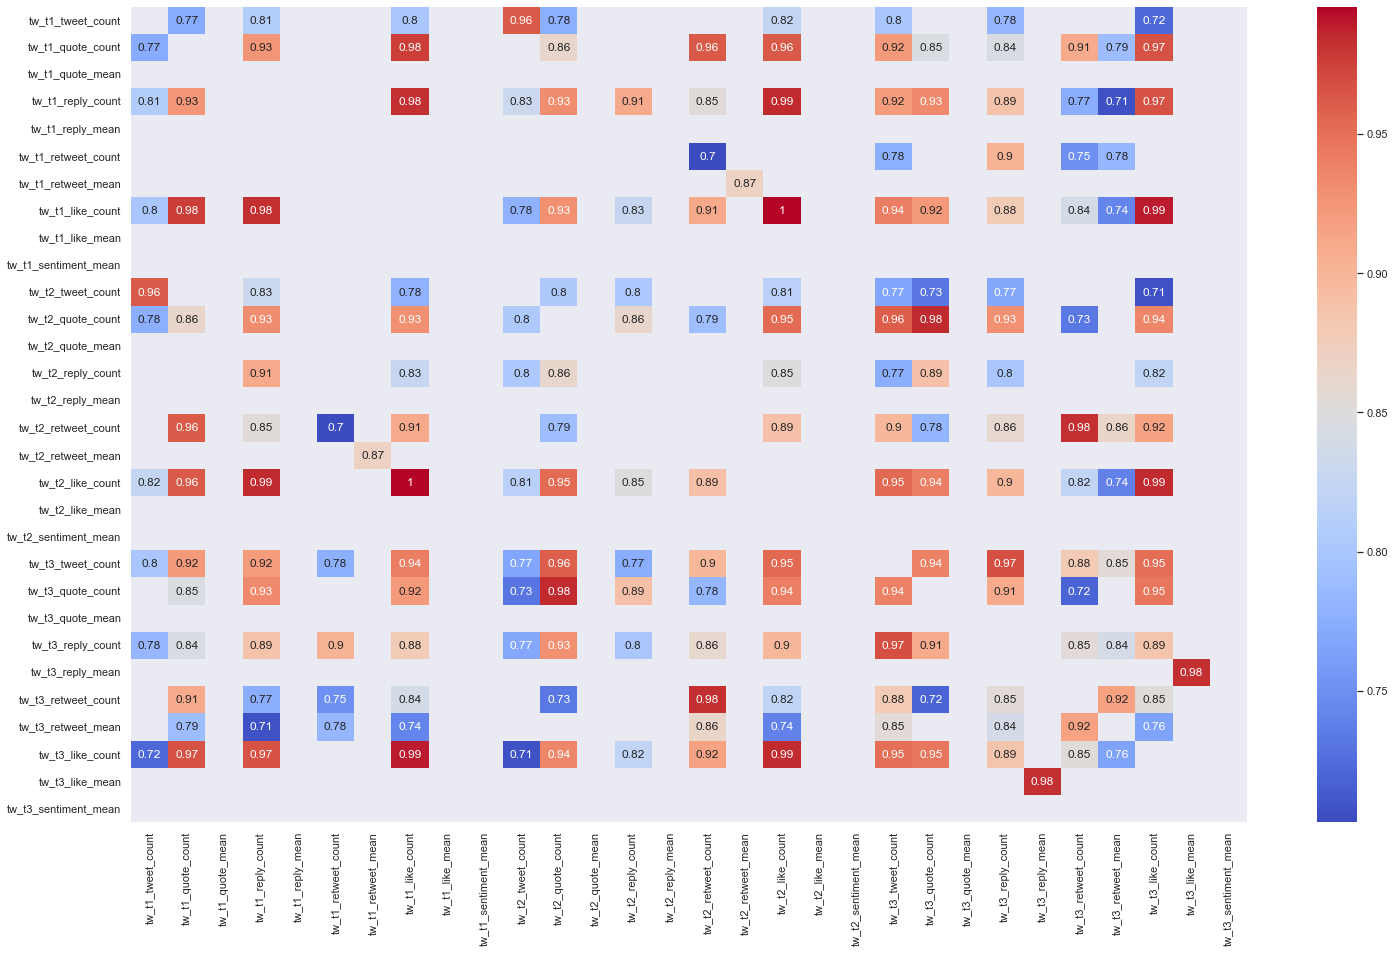

In [46]:
corrMatrix = df_corr.iloc[:,-30:].corr()
sns.set(rc = {'figure.figsize':(25,15)})
filteredCorrMatrix = corrMatrix[((corrMatrix >= .7) | (corrMatrix <= -.7)) & (corrMatrix !=1.000)]
sns.heatmap(filteredCorrMatrix, annot = True, cmap= 'coolwarm')

In [47]:
colNotCorrelated = ['tw_t1_quote_mean', 'tw_t1_reply_mean', 'tw_t1_retweet_mean', 'tw_t1_like_mean', 'tw_t1_sentiment_mean', 'tw_t2_quote_mean', 'tw_t2_reply_mean', 'tw_t2_retweet_mean', 'tw_t2_like_mean', 'tw_t2_sentiment_mean', 'tw_t3_quote_mean', 'tw_t3_reply_mean', 'tw_t3_retweet_mean', 'tw_t3_like_mean', 'tw_t3_sentiment_mean']

<AxesSubplot:>

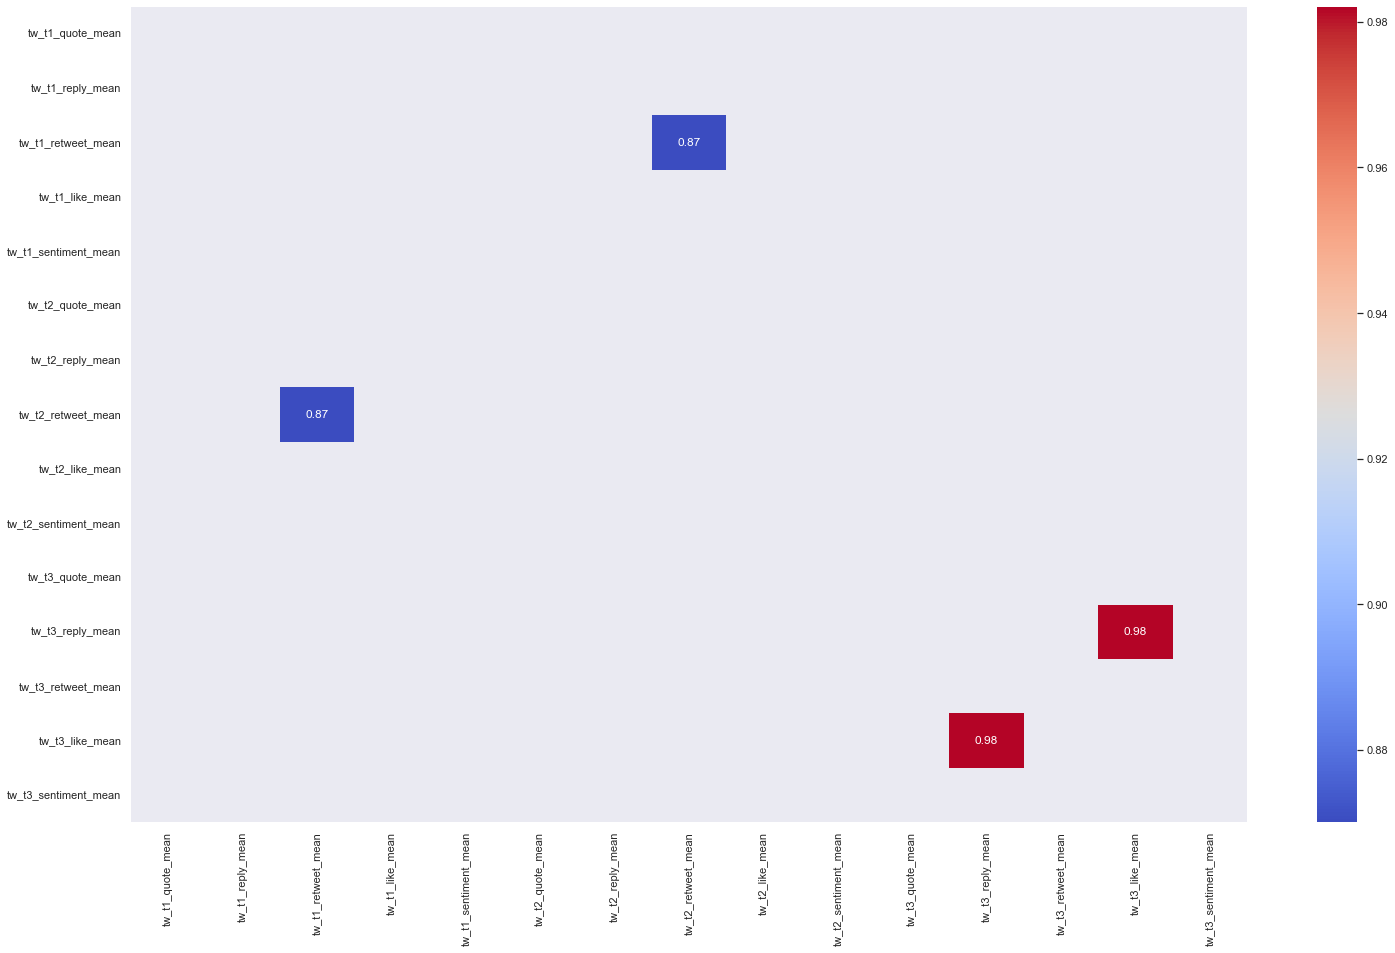

In [48]:
corrMatrix = df_corr[df_corr.columns[df_corr.columns.isin(colNotCorrelated)]].corr()
sns.set(rc = {'figure.figsize':(25,15)})
filteredCorrMatrix = corrMatrix[((corrMatrix >= .7) | (corrMatrix <= -.7)) & (corrMatrix !=1.000)]
sns.heatmap(filteredCorrMatrix, annot = True, cmap= 'coolwarm')

### Comparison between movies data and TW data

In [49]:
df_corr = df_corr.drop('domestic', axis = 1)

<AxesSubplot:>

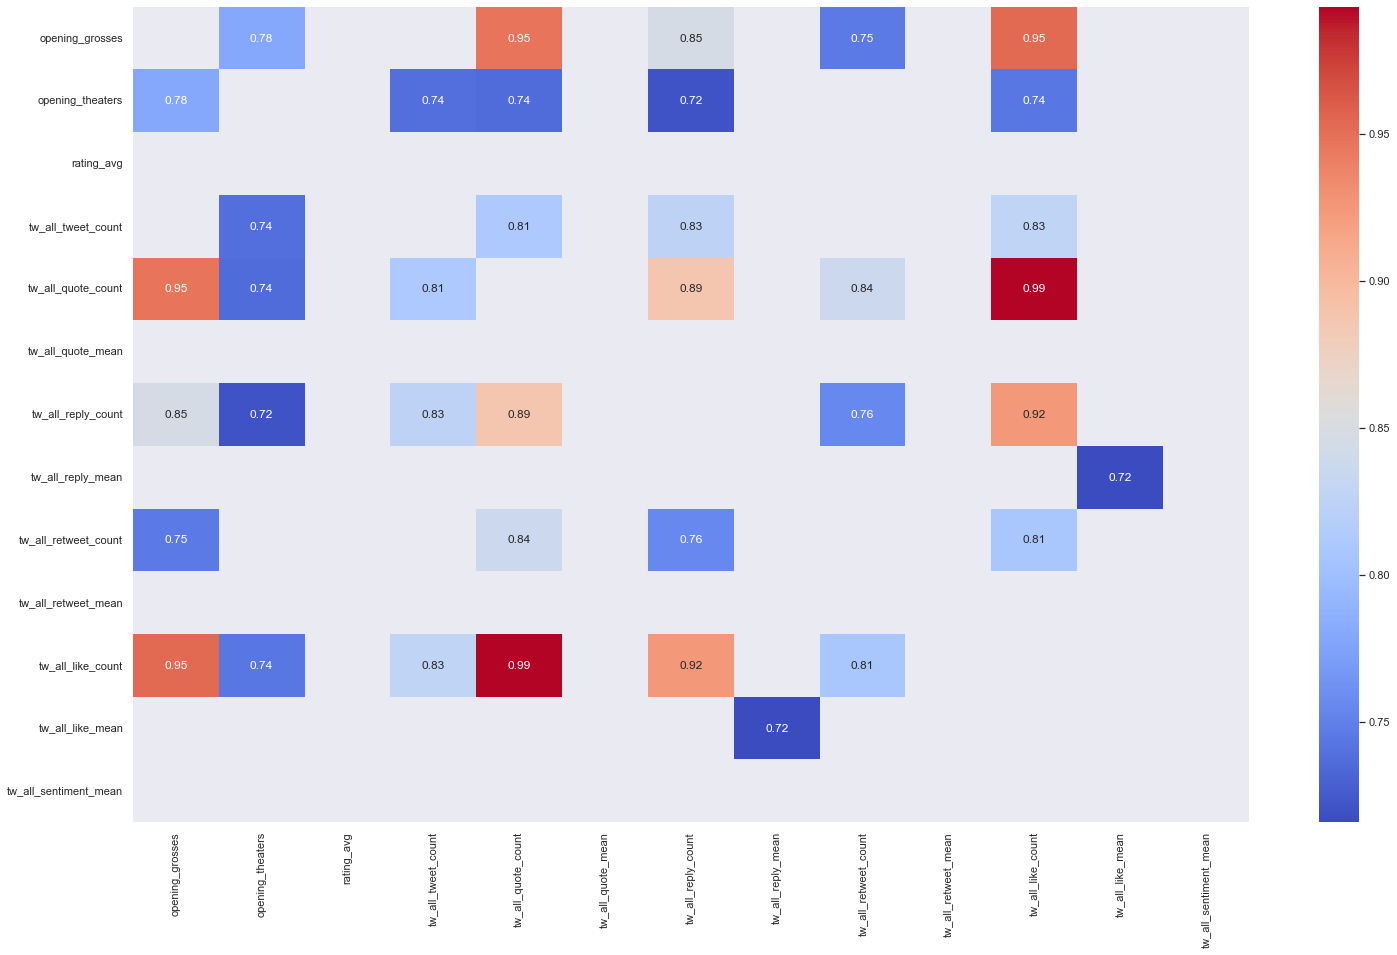

In [50]:
corrMatrix = df_corr.iloc[:,1:19].corr()
sns.set(rc = {'figure.figsize':(25,15)})
filteredCorrMatrix = corrMatrix[((corrMatrix >= .7) | (corrMatrix <= -.7)) & (corrMatrix !=1.000)]
sns.heatmap(filteredCorrMatrix, annot = True, cmap= 'coolwarm')

<AxesSubplot:xlabel='opening_theaters', ylabel='tw_all_tweet_count'>

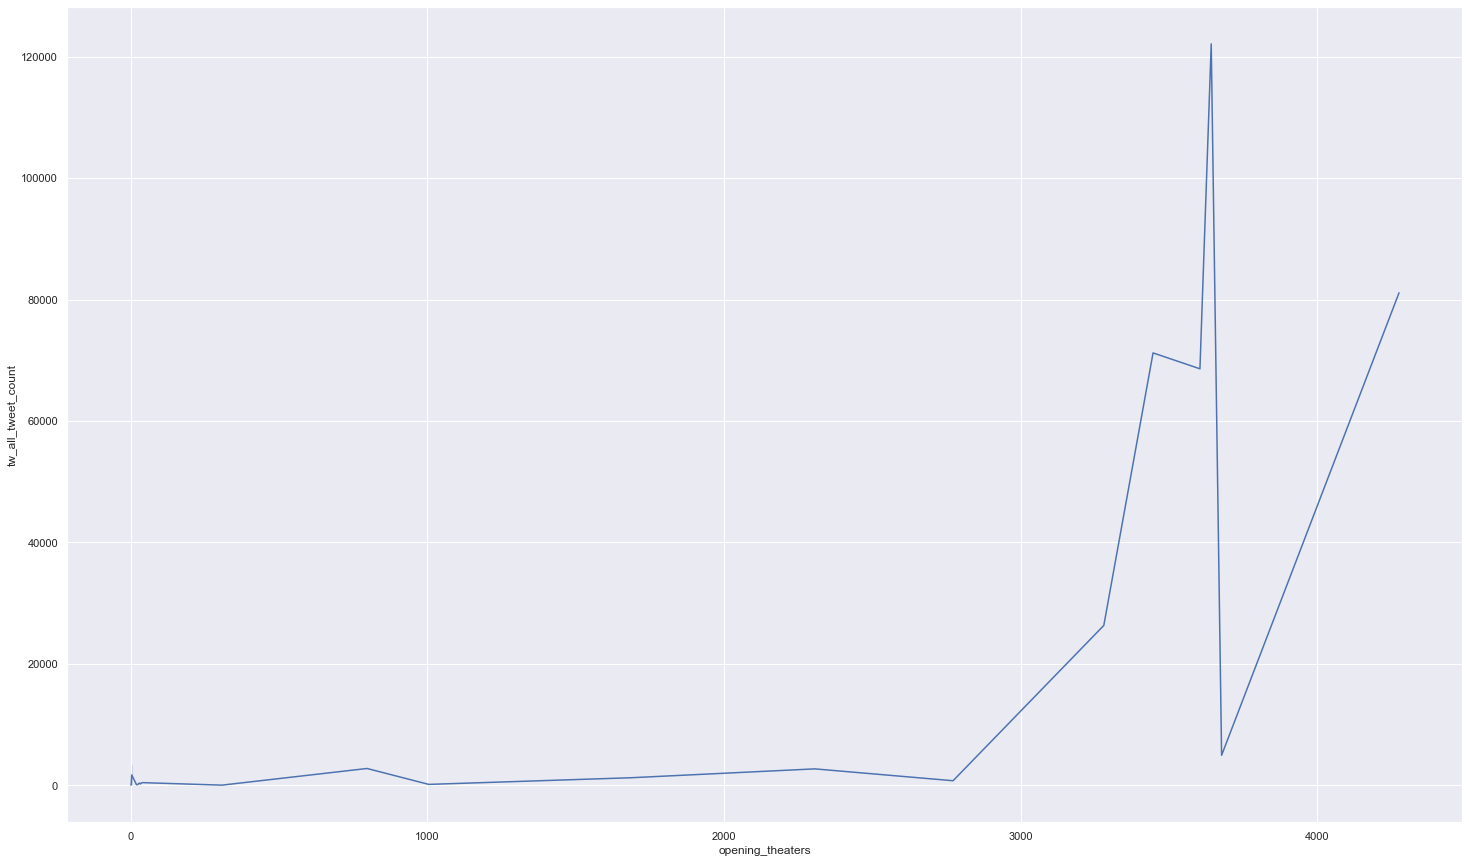

In [51]:
sns.lineplot(x="opening_theaters", y="tw_all_tweet_count",
             data=df)

<AxesSubplot:xlabel='opening_grosses', ylabel='tw_all_tweet_count'>

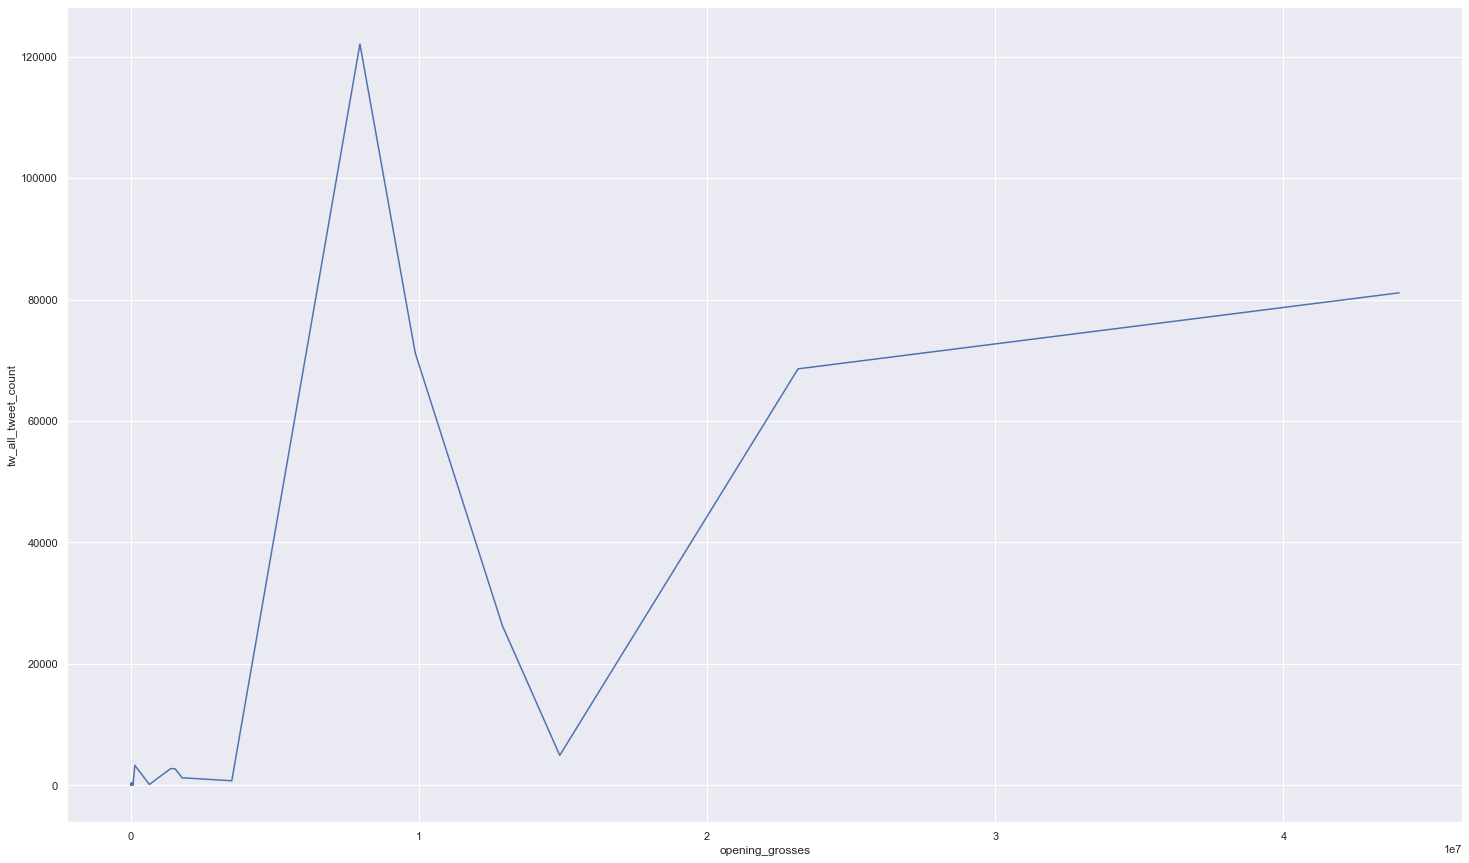

In [52]:
sns.lineplot(x="opening_grosses", y="tw_all_tweet_count",
             data=df)

<AxesSubplot:xlabel='rating_avg', ylabel='tw_all_like_count'>

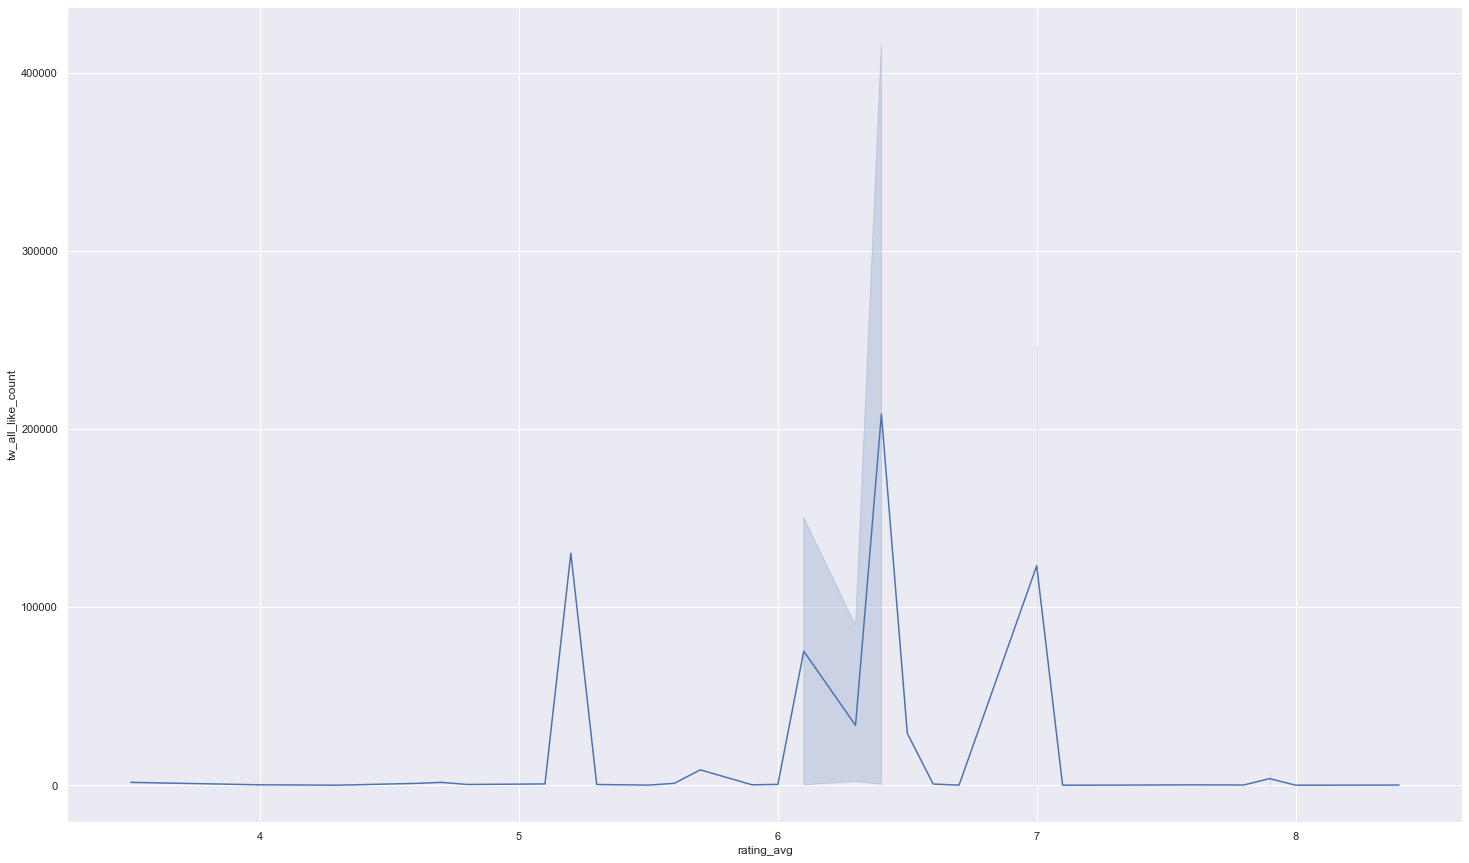

In [53]:
sns.lineplot(x="rating_avg", y="tw_all_like_count",
             data=df)

### Summary grouping by domestic or foreign movies

In [54]:
df.groupby('domestic').describe().id['count']

domestic
False    13.0
True     23.0
Name: count, dtype: float64

In [55]:
df.groupby('domestic').describe().opening_grosses

count          mean           std     min       25%        50%  \
domestic                                                                   
False      10.0  2.333925e+05  4.492497e+05   371.0   2709.25    43420.5   
True       15.0  7.982231e+06  1.219893e+07  5026.0  27427.50  1776142.0   

                 75%         max  
domestic                          
False       121926.0   1385995.0  
True      11380060.0  44010155.0

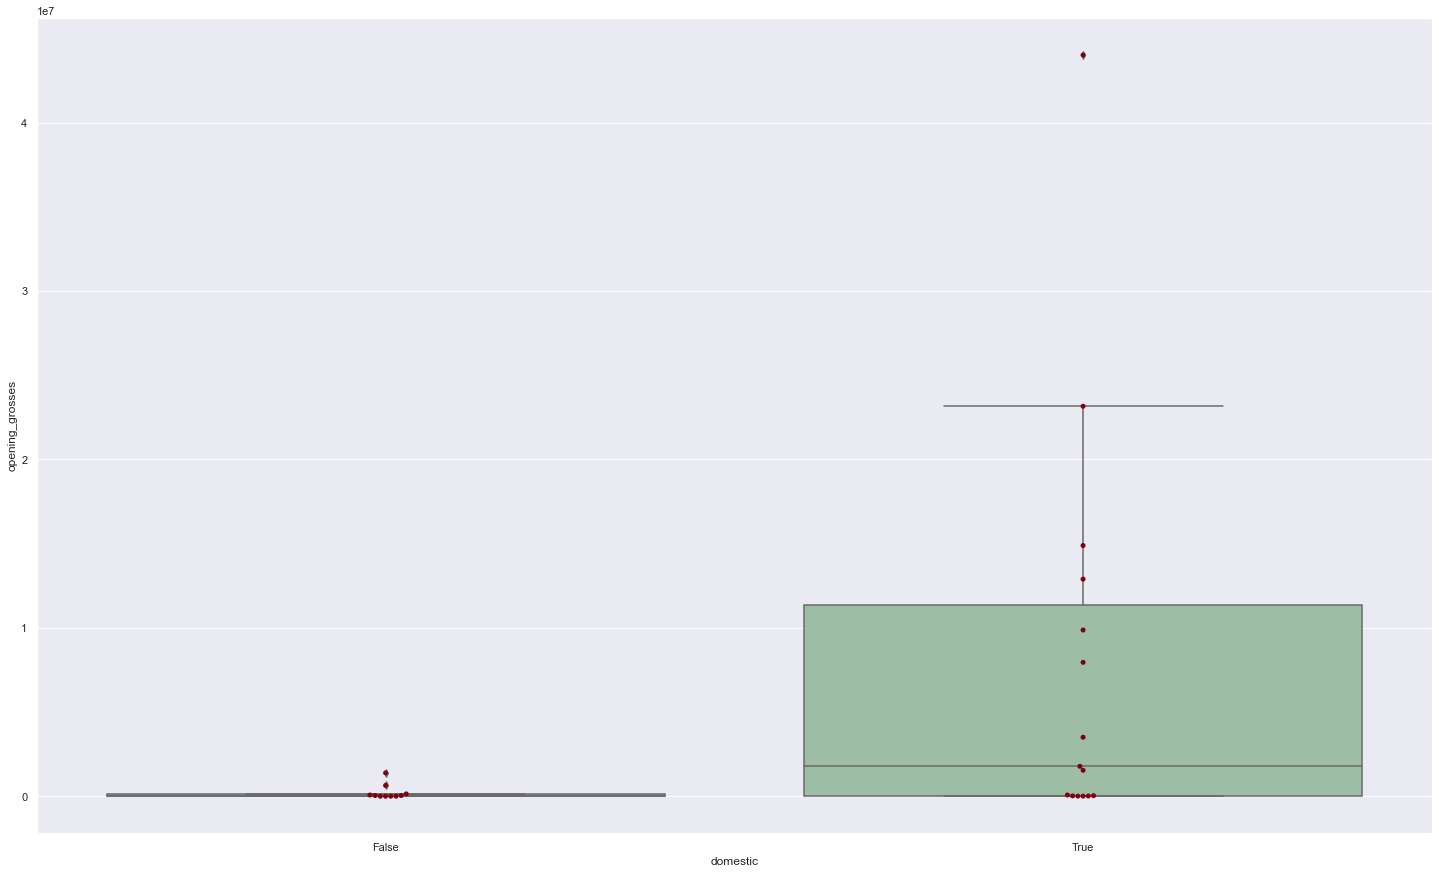

In [56]:
ax = sns.boxplot(x='domestic', y='opening_grosses', data=df, color='#99c2a2')
ax = sns.swarmplot(x="domestic", y="opening_grosses", data=df, color='#7d0013')
plt.show()

In [57]:
from bioinfokit.analys import stat

In [58]:
res = stat()
res.anova_stat(df=df, res_var='opening_grosses', anova_model='opening_grosses ~ C(domestic)')
res.anova_summary

df        sum_sq       mean_sq         F    PR(>F)
C(domestic)   1.0  3.602669e+14  3.602669e+14  3.973767  0.058206
Residual     23.0  2.085210e+15  9.066131e+13       NaN       NaN

In [59]:
df.groupby('domestic').describe().opening_theaters

count    mean          std  min   25%     50%     75%     max
domestic                                                               
False      10.0   192.8   376.701414  1.0   4.0    22.0    37.5  1005.0
True       15.0  1939.0  1695.188696  1.0  29.0  2306.0  3525.0  4275.0

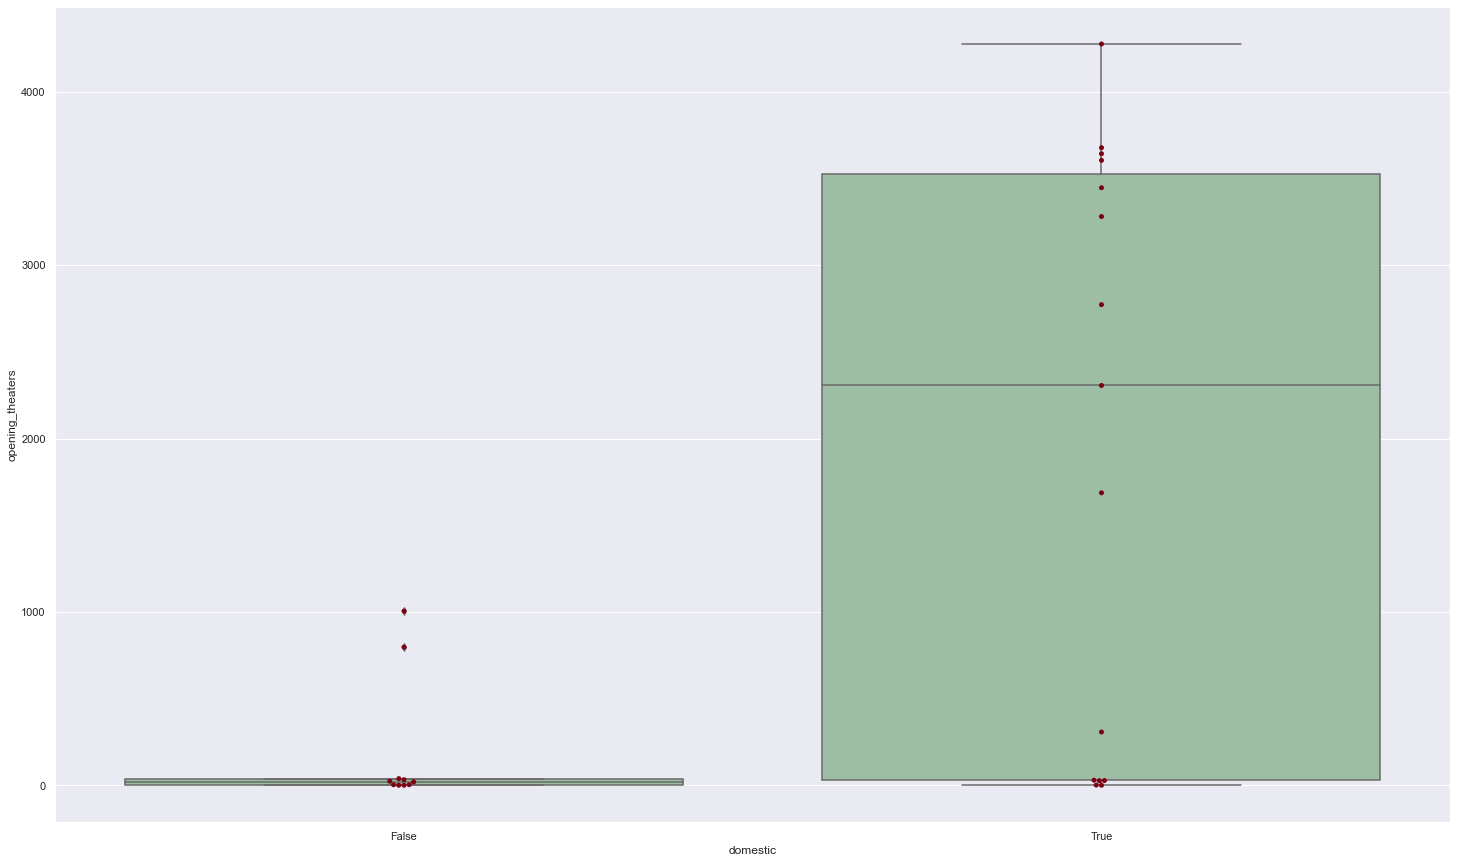

In [60]:
ax = sns.boxplot(x='domestic', y='opening_theaters', data=df, color='#99c2a2')
ax = sns.swarmplot(x="domestic", y="opening_theaters", data=df, color='#7d0013')
plt.show()

In [61]:
res = stat()
res.anova_stat(df=df, res_var='opening_theaters', anova_model='opening_theaters ~ C(domestic)')
res.anova_summary

df       sum_sq       mean_sq          F    PR(>F)
C(domestic)   1.0  18295286.64  1.829529e+07  10.137494  0.004134
Residual     23.0  41508441.60  1.804715e+06        NaN       NaN

In [62]:
df.groupby('domestic').describe().rating_avg

count      mean       std  min   25%  50%  75%  max
domestic                                                     
False      13.0  6.100000  1.181807  4.0  5.30  6.1  6.7  8.0
True       23.0  6.156522  1.250391  3.5  5.35  6.3  7.0  8.4

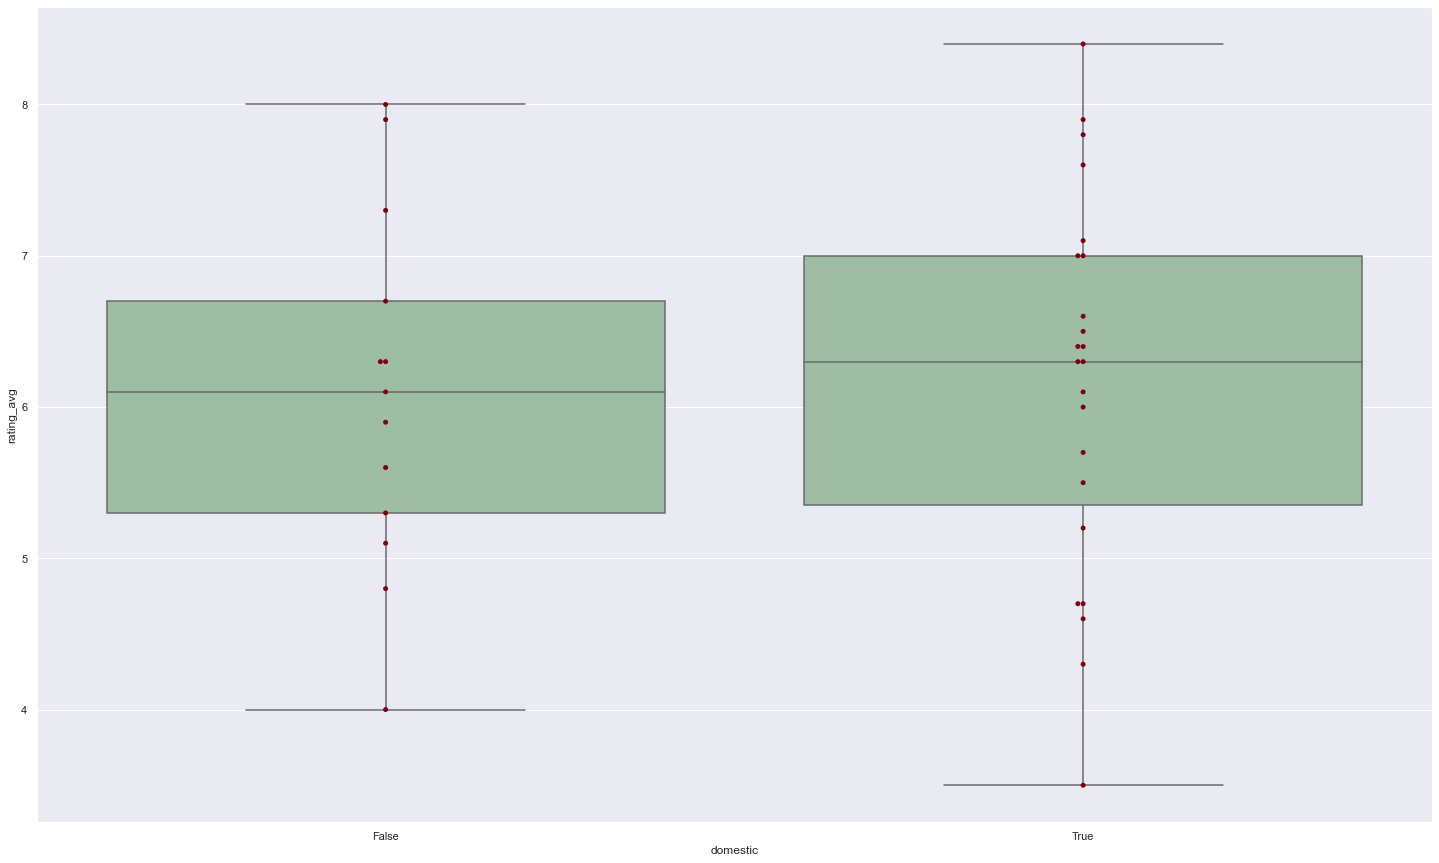

In [63]:
ax = sns.boxplot(x='domestic', y='rating_avg', data=df, color='#99c2a2')
ax = sns.swarmplot(x="domestic", y="rating_avg", data=df, color='#7d0013')
plt.show()

In [64]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(domestic)')
res.anova_summary

df     sum_sq   mean_sq         F    PR(>F)
C(domestic)   1.0   0.026534  0.026534  0.017635  0.895137
Residual     34.0  51.156522  1.504604       NaN       NaN

In [65]:
df.groupby('domestic').describe().tw_all_tweet_count

count          mean           std  min    25%    50%     75%  \
domestic                                                                 
False      13.0    604.769231   1094.765207  4.0  100.0  150.0   417.0   
True       23.0  16599.000000  34149.790582  1.0   54.5  384.0  3825.0   

               max  
domestic            
False       3310.0  
True      122103.0

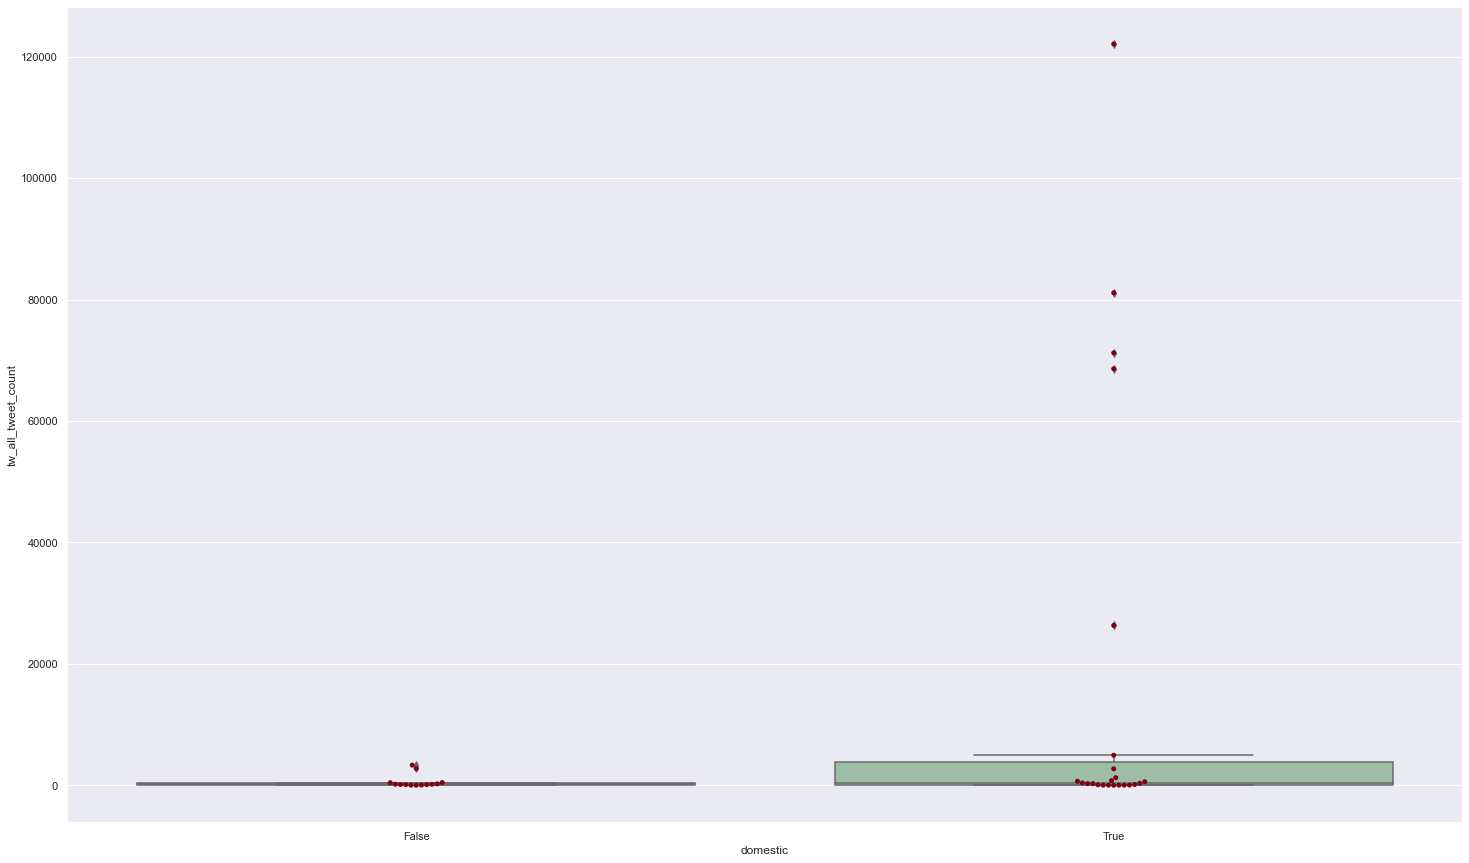

In [66]:
ax = sns.boxplot(x='domestic', y='tw_all_tweet_count', data=df, color='#99c2a2')
ax = sns.swarmplot(x="domestic", y="tw_all_tweet_count", data=df, color='#7d0013')
plt.show()

In [67]:
res = stat()
res.anova_stat(df=df, res_var='tw_all_tweet_count', anova_model='tw_all_tweet_count ~ C(domestic)')
res.anova_summary

df        sum_sq       mean_sq         F    PR(>F)
C(domestic)   1.0  2.124689e+09  2.124689e+09  2.814052  0.102613
Residual     34.0  2.567096e+10  7.550283e+08       NaN       NaN

In [68]:
df.groupby('domestic').describe().tw_all_quote_count

count         mean          std  min  25%   50%    75%      max
domestic                                                                 
False      13.0    45.384615    88.922755  0.0  2.0  11.0   15.0    274.0
True       23.0  1257.652174  2707.029043  0.0  2.5  28.0  360.0  11235.0

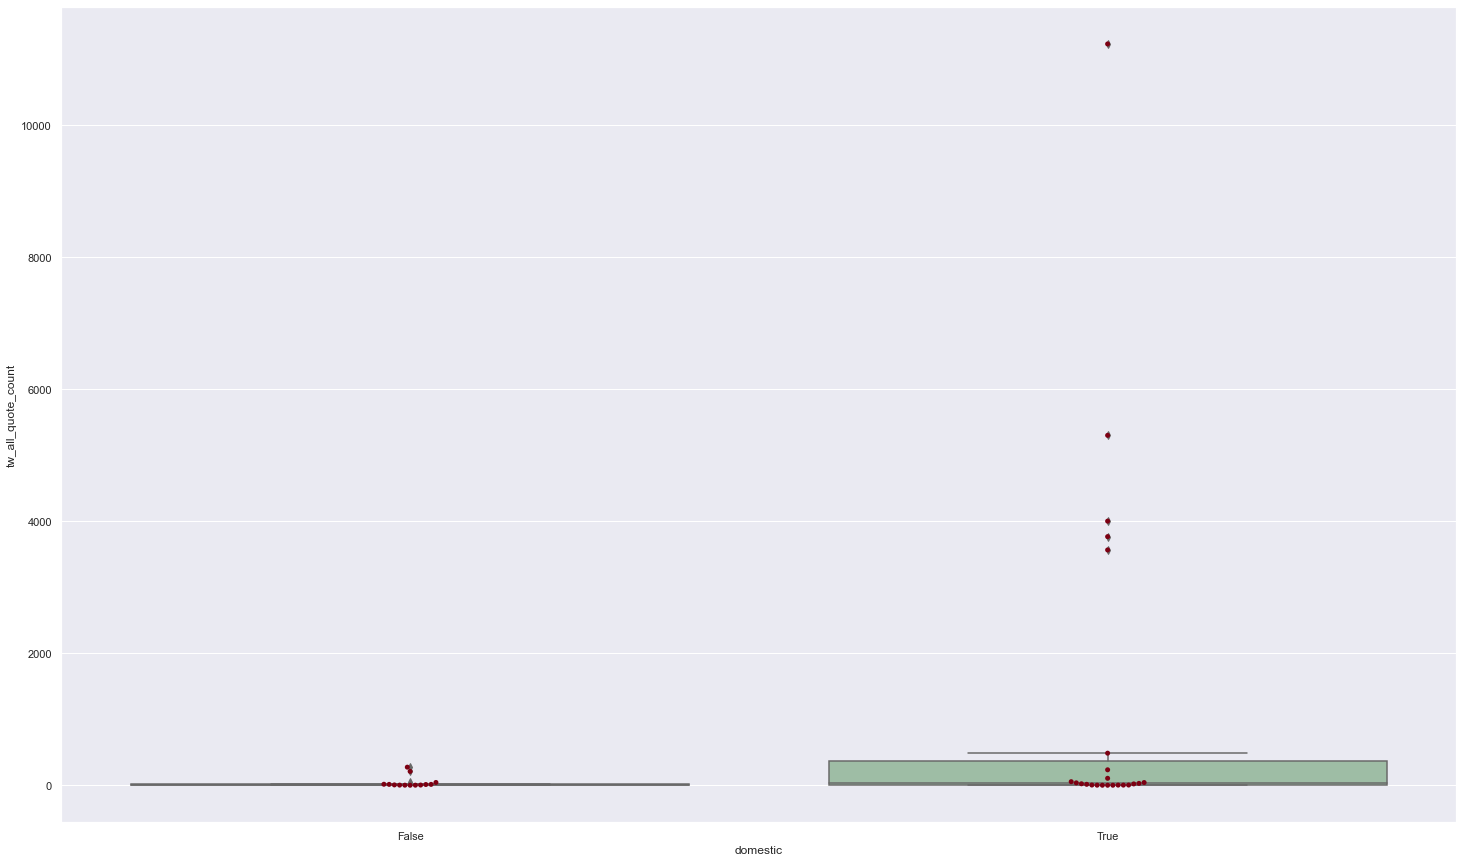

In [69]:
ax = sns.boxplot(x='domestic', y='tw_all_quote_count', data=df, color='#99c2a2')
ax = sns.swarmplot(x="domestic", y="tw_all_quote_count", data=df, color='#7d0013')
plt.show()

In [70]:
res = stat()
res.anova_stat(df=df, res_var='tw_all_quote_count', anova_model='tw_all_quote_count ~ C(domestic)')
res.anova_summary

df        sum_sq       mean_sq         F    PR(>F)
C(domestic)   1.0  1.220578e+07  1.220578e+07  2.572649  0.117976
Residual     34.0  1.613110e+08  4.744442e+06       NaN       NaN

In [71]:
df.groupby('domestic').describe().tw_all_reply_count

count         mean          std  min  25%   50%     75%      max
domestic                                                                  
False      13.0   130.615385   274.318409  0.0  7.0  23.0    50.0    930.0
True       23.0  3655.347826  7829.800512  0.0  9.0  90.0  1099.0  29220.0

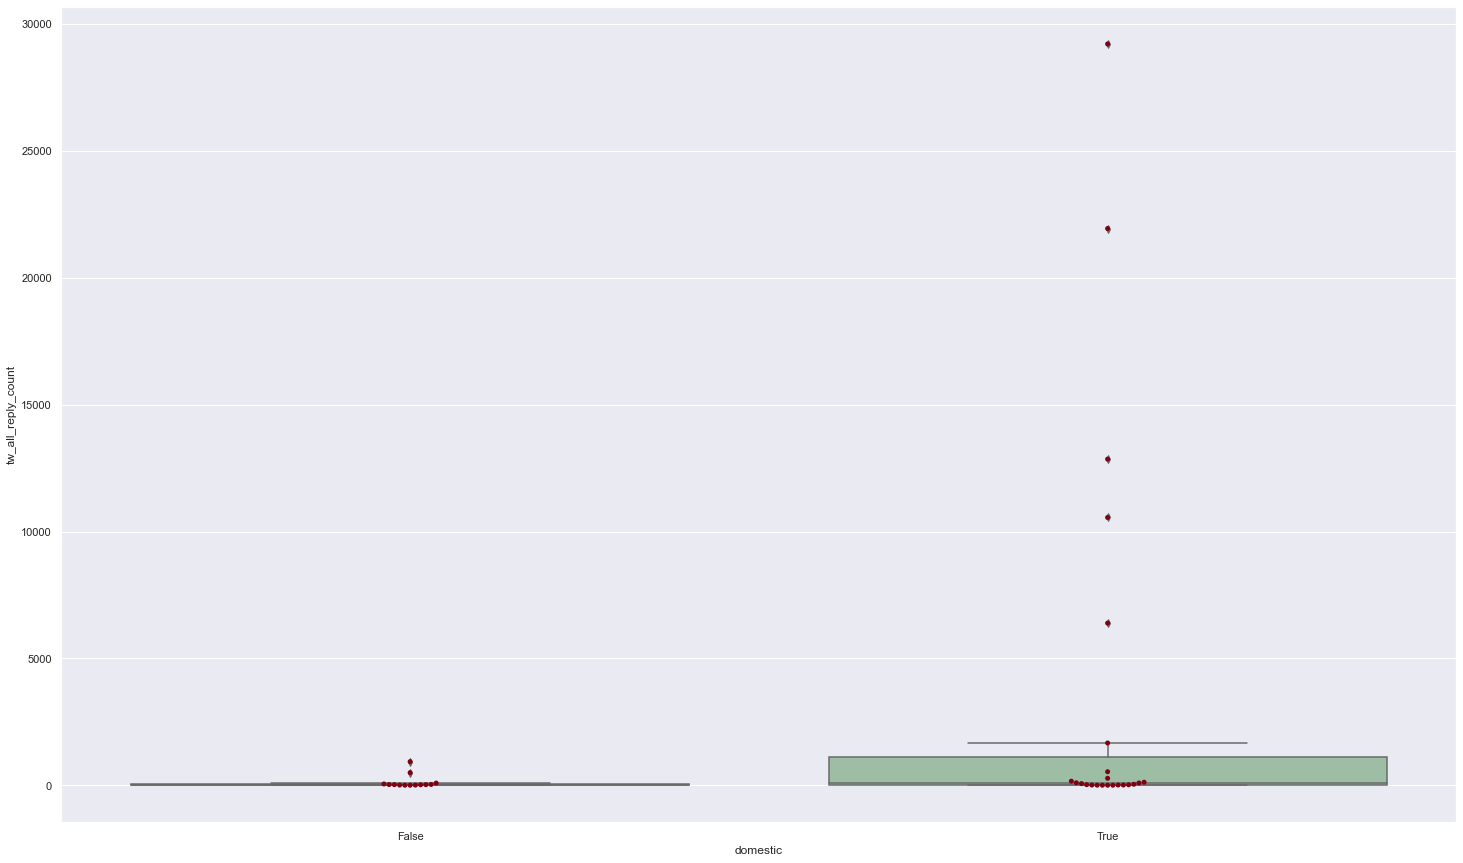

In [72]:
ax = sns.boxplot(x='domestic', y='tw_all_reply_count', data=df, color='#99c2a2')
ax = sns.swarmplot(x="domestic", y="tw_all_reply_count", data=df, color='#7d0013')
plt.show()

In [73]:
res = stat()
res.anova_stat(df=df, res_var='tw_all_reply_count', anova_model='tw_all_reply_count ~ C(domestic)')
res.anova_summary

df        sum_sq       mean_sq         F    PR(>F)
C(domestic)   1.0  1.031861e+08  1.031861e+08  2.599472  0.116145
Residual     34.0  1.349630e+09  3.969500e+07       NaN       NaN

In [74]:
df.groupby('domestic').describe().tw_all_retweet_count

count          mean           std  min    25%     50%       75%  \
domestic                                                                    
False      13.0  7.074931e+04  1.615069e+05  0.0  168.0   312.0    4046.0   
True       23.0  2.432215e+06  6.489629e+06  4.0  101.5  7576.0  159208.5   

                 max  
domestic              
False       441522.0  
True      22628590.0

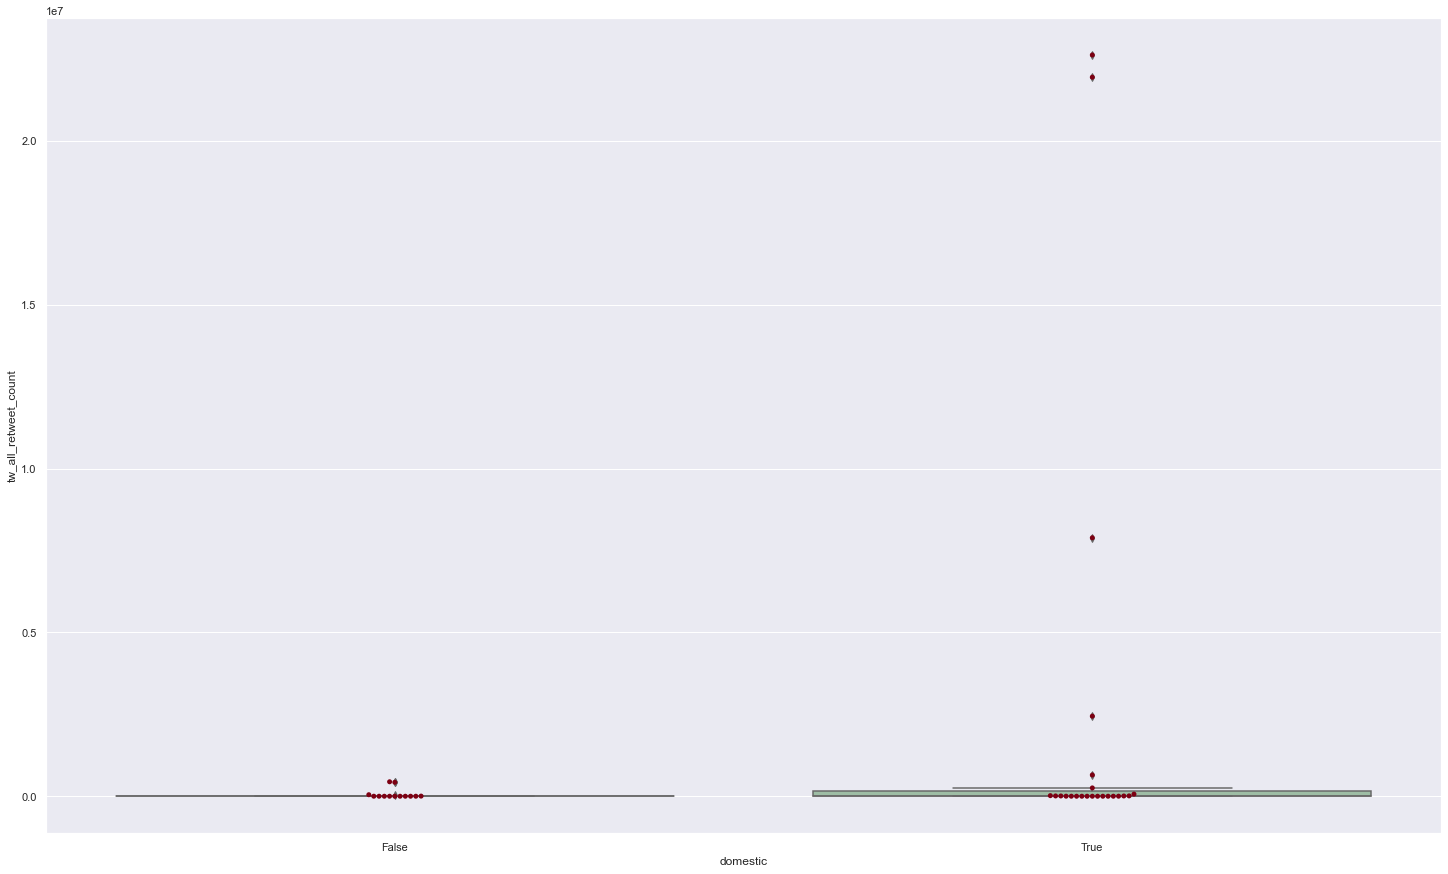

In [75]:
ax = sns.boxplot(x='domestic', y='tw_all_retweet_count', data=df, color='#99c2a2')
ax = sns.swarmplot(x="domestic", y="tw_all_retweet_count", data=df, color='#7d0013')
plt.show()

In [76]:
res = stat()
res.anova_stat(df=df, res_var='tw_all_retweet_count', anova_model='tw_all_retweet_count ~ C(domestic)')
res.anova_summary

df        sum_sq       mean_sq         F    PR(>F)
C(domestic)   1.0  4.631611e+13  4.631611e+13  1.699033  0.201172
Residual     34.0  9.268492e+14  2.726027e+13       NaN       NaN

In [77]:
df.groupby('domestic').describe().tw_all_like_count

count          mean            std  min    25%    50%      75%  \
domestic                                                                   
False      13.0   1611.538462    3282.252621  4.0   68.0  233.0    705.0   
True       23.0  48377.304348  103345.685124  0.0  117.0  759.0  18854.0   

               max  
domestic            
False      10415.0  
True      416208.0

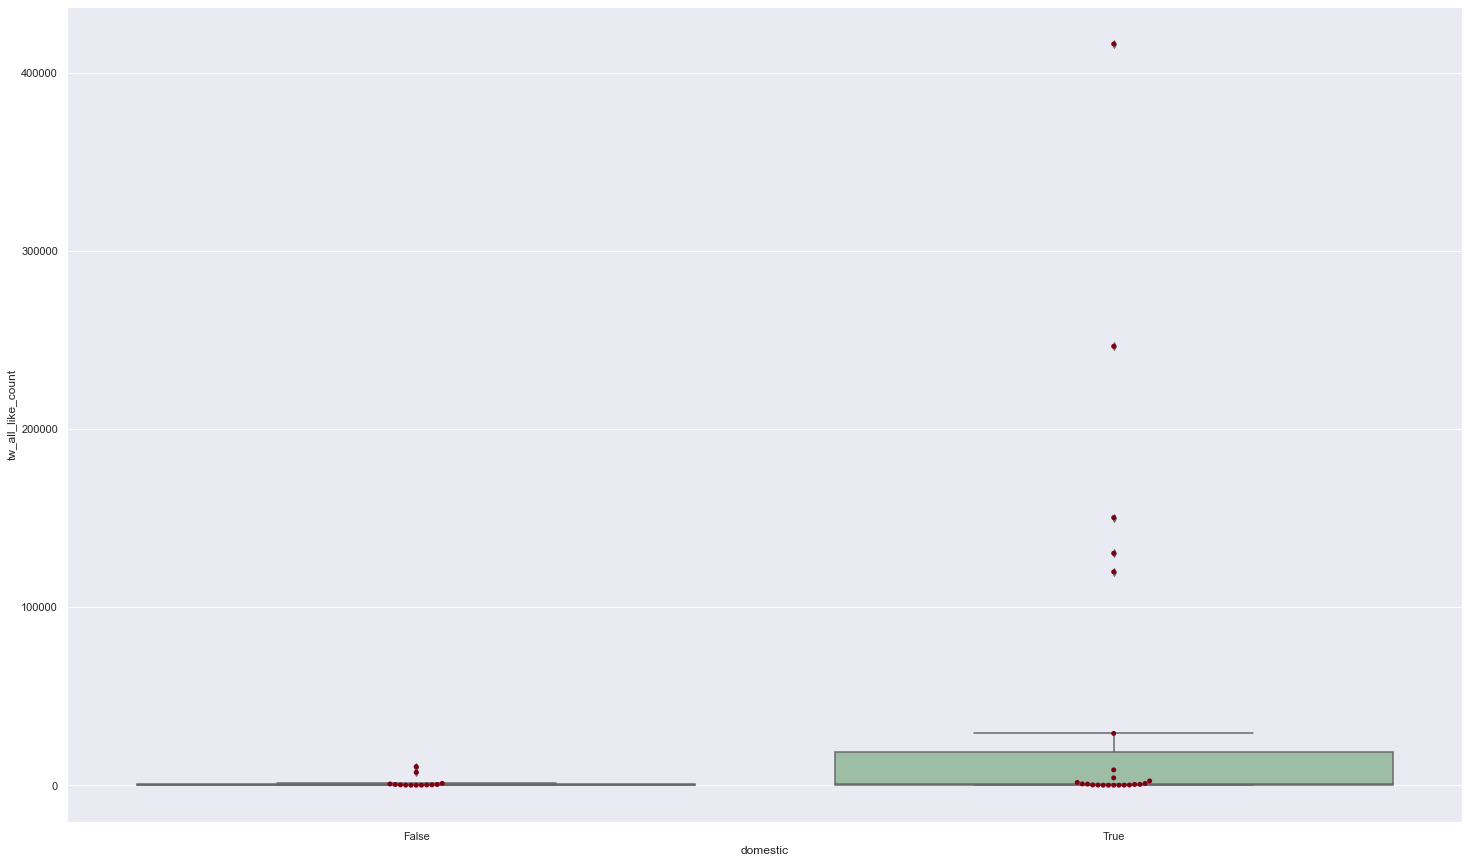

In [78]:
ax = sns.boxplot(x='domestic', y='tw_all_like_count', data=df, color='#99c2a2')
ax = sns.swarmplot(x="domestic", y="tw_all_like_count", data=df, color='#7d0013')
plt.show()

In [79]:
res = stat()
res.anova_stat(df=df, res_var='tw_all_like_count', anova_model='tw_all_like_count ~ C(domestic)')
res.anova_summary

df        sum_sq       mean_sq         F  PR(>F)
C(domestic)   1.0  1.816456e+10  1.816456e+10  2.626984  0.1143
Residual     34.0  2.350966e+11  6.914604e+09       NaN     NaN

In [80]:
df.groupby('domestic').describe().tw_all_sentiment_mean

count      mean       std       min       25%       50%       75%  \
domestic                                                                      
False      13.0  0.391430  0.170750  0.130514  0.293333  0.387097  0.470588   
True       23.0  0.396209  0.243606 -0.113636  0.322573  0.384122  0.563492   

               max  
domestic            
False     0.750000  
True      0.769231

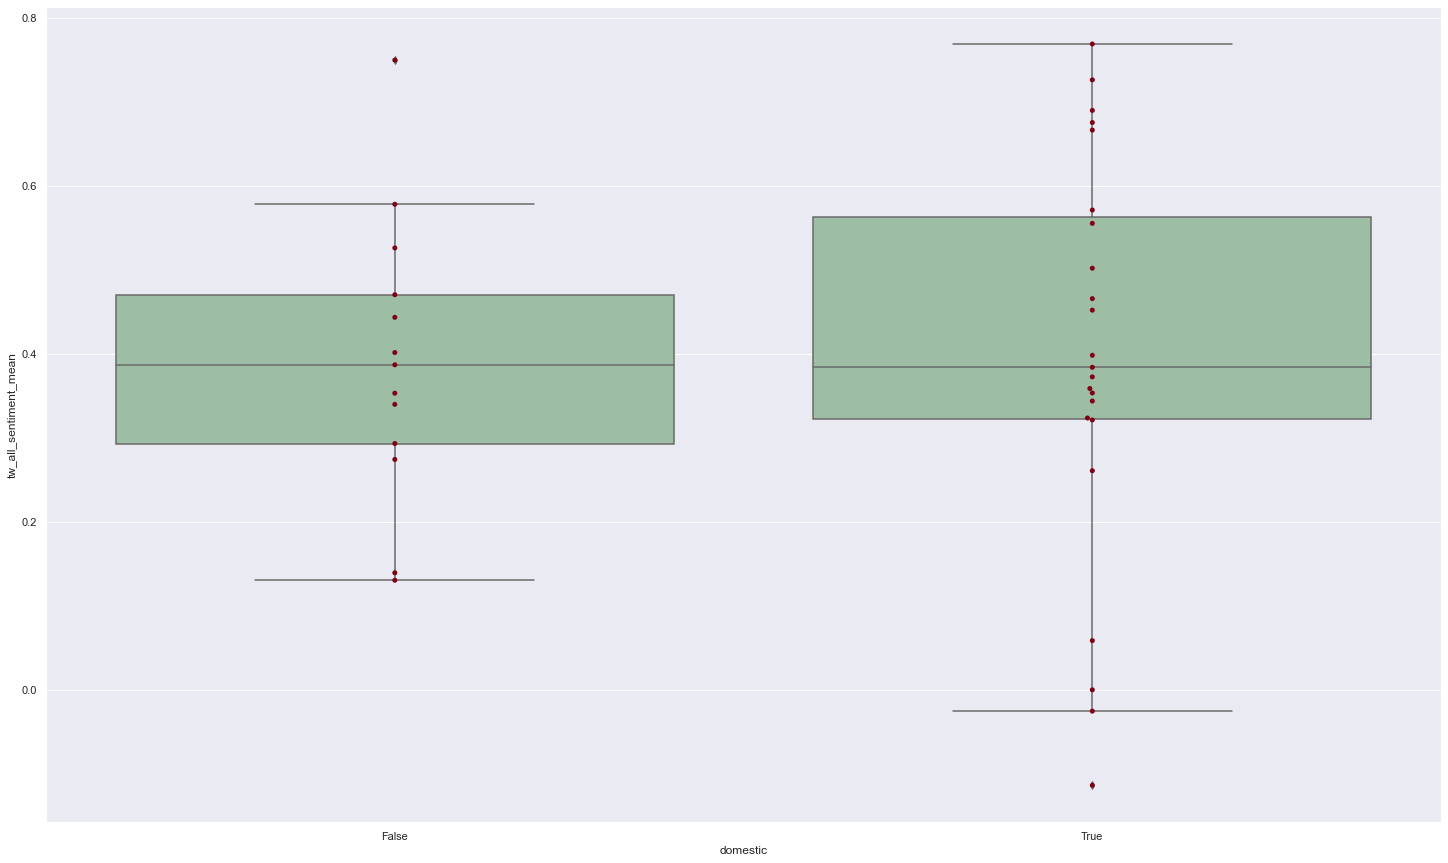

In [81]:
ax = sns.boxplot(x='domestic', y='tw_all_sentiment_mean', data=df, color='#99c2a2')
ax = sns.swarmplot(x="domestic", y="tw_all_sentiment_mean", data=df, color='#7d0013')
plt.show()

In [82]:
res = stat()
res.anova_stat(df=df, res_var='tw_all_sentiment_mean', anova_model='tw_all_sentiment_mean ~ C(domestic)')
res.anova_summary

df    sum_sq   mean_sq         F    PR(>F)
C(domestic)   1.0  0.000190  0.000190  0.003896  0.950595
Residual     34.0  1.655438  0.048689       NaN       NaN

### Comparison of TW data between different timepoints (weeks)

In [83]:
df.tw_all_tweet_count.mean()

10823.305555555555

In [84]:
df.tw_t1_tweet_count.mean()

4648.257142857143

In [85]:
df.tw_t2_tweet_count.mean()

5322.5

In [86]:
df.tw_t3_tweet_count.mean()

1070.909090909091

# Digit-All 2022

## Genres

In [87]:
df_movie_genres = pd.read_sql_query("""
    SELECT genres.*, movies.* FROM genres
    LEFT JOIN movie_genres ON genres.genre_id = movie_genres.genre_id
    LEFT JOIN movies ON movie_genres.movie_id = movies.id
""", conn)

In [88]:
df_movie_genres = df_movie_genres.join(df_tweets_per_movie.describe().status_id['count'], on="id")
df_movie_genres.rename(columns={"count": "tw_all_tweet_count"}, inplace = True)
df_movie_genres = df_movie_genres.join(df_tweets_per_movie['quote_count'].sum(), on="id")
df_movie_genres.rename(columns={"quote_count": "tw_all_quote_count"}, inplace = True)
df_movie_genres = df_movie_genres.join(df_tweets_per_movie.describe().quote_count['mean'], on="id")
df_movie_genres.rename(columns={"mean": "tw_all_quote_mean"}, inplace = True)
df_movie_genres = df_movie_genres.join(df_tweets_per_movie['reply_count'].sum(), on="id")
df_movie_genres.rename(columns={"reply_count": "tw_all_reply_count"}, inplace = True)
df_movie_genres = df_movie_genres.join(df_tweets_per_movie.describe().reply_count['mean'], on="id")
df_movie_genres.rename(columns={"mean": "tw_all_reply_mean"}, inplace = True)
df_movie_genres = df_movie_genres.join(df_tweets_per_movie['retweet_count'].sum(), on="id")
df_movie_genres.rename(columns={"retweet_count": "tw_all_retweet_count"}, inplace = True)
df_movie_genres = df_movie_genres.join(df_tweets_per_movie.describe().retweet_count['mean'], on="id")
df_movie_genres.rename(columns={"mean": "tw_all_retweet_mean"}, inplace = True)
df_movie_genres = df_movie_genres.join(df_tweets_per_movie['like_count'].sum(), on="id")
df_movie_genres.rename(columns={"like_count": "tw_all_like_count"}, inplace = True)
df_movie_genres = df_movie_genres.join(df_tweets_per_movie.describe().like_count['mean'], on="id")
df_movie_genres.rename(columns={"mean": "tw_all_like_mean"}, inplace = True)
df_movie_genres = df_movie_genres.join(df_tweets_per_movie.describe().sentiment['mean'], on="id")
df_movie_genres.rename(columns={"mean": "tw_all_sentiment_mean"}, inplace = True)

In [89]:
df_movie_genres

genre_id genre_name  id                name           hashtag  \
0          1     Action   1     Jackass Forever    jackassforever   
1          1     Action   2            Moonfall          moonfall   
2          1     Action   4  Only Fools Rush In   onlyfoolsrushin   
3          1     Action  12          Blacklight   blacklightmovie   
4          1     Action  14   Water Gate Bridge   watergatebridge   
..       ...        ...  ..                 ...               ...   
81        17   Thriller  12          Blacklight   blacklightmovie   
82        17   Thriller  13  Catch the Fair One   catchthefairone   
83        17   Thriller  18         Cosmic Dawn        cosmicdawn   
84        17   Thriller  33     The Burning Sea     theburningsea   
85        17   Thriller  35  The Desperate Hour  thedesperatehour   

                                    countries   mpaa  \
0                               United States      R   
1   United States;China;United Kingdom;Canada  PG-13   
2                                       China   None   
3               United States;Australia;China  PG-13   
4                                       China   None   
..                                        ...    ...   
81              United States;Australia;China  PG-13   
82                              United States   None   
83                                     Canada   None   
84                                     Norway  PG-13   
85                              United States  PG-13   

                         genres release_date  opening_grosses  \
0     Action;Comedy;Documentary   2022-02-04       23154388.0   
1       Action;Adventure;Sci-Fi   2022-02-04        9868997.0   
2   Action;Comedy;Drama;Romance   2022-02-04          44134.0   
3               Action;Thriller   2022-02-11        3502475.0   
4          Action;Drama;History   2022-02-11          42707.0   
..                          ...          ...              ...   
81              Action;Thriller   2022-02-11        3502475.0   
82               Crime;Thriller   2022-02-11           7992.0   
83              Sci-Fi;Thriller   2022-02-11              NaN   
84        Action;Drama;Thriller   2022-02-25            371.0   
85                     Thriller   2022-02-25              NaN   

    opening_theaters  rating_avg  tw_all_tweet_count  tw_all_quote_count  \
0             3604.0         7.0             68597.0                5303   
1             3446.0         5.2             71213.0                4003   
2               39.0         5.6               441.0                  15   
3             2772.0         4.7               753.0                  41   
4               24.0         5.3               122.0                   5   
..               ...         ...                 ...                 ...   
81            2772.0         4.7               753.0                  41   
82              30.0         6.4               384.0                  22   
83               NaN         4.0               167.0                  13   
84               4.0         6.3               102.0                   1   
85               NaN         4.7               660.0                  20   

    tw_all_quote_mean  tw_all_reply_count  tw_all_reply_mean  \
0            0.077307               29220           0.425966   
1            0.056212               12854           0.180501   
2            0.034014                  50           0.113379   
3            0.054449                 160           0.212483   
4            0.040984                  23           0.188525   
..                ...                 ...                ...   
81           0.054449                 160           0.212483   
82           0.057292                  39           0.101562   
83           0.077844                  31           0.185629   
84           0.009804                   7           0.068627   
85           0.030303                 119           0.180303   

    tw_all_retweet_count  tw_all_retwee

### Summary grouping by movie genre

In [90]:
df_movie_genres.groupby('genre_name').describe().id['count']

genre_name
Action          8.0
Adventure       4.0
Biography       2.0
Comedy         12.0
Crime           4.0
Documentary     5.0
Drama          15.0
Family          3.0
Fantasy         4.0
History         1.0
Horror          4.0
Music           3.0
Musical         2.0
Mystery         2.0
Romance         7.0
Sci-Fi          4.0
Thriller        6.0
Name: count, dtype: float64

In [91]:
df_movie_genres.groupby('genre_name').describe().opening_grosses

count          mean           std        min         25%  \
genre_name                                                              
Action         7.0  1.151760e+07  1.660372e+07      371.0    43420.50   
Adventure      3.0  1.797105e+07  2.308047e+07    34004.0  4951500.50   
Biography      1.0  2.085100e+04           NaN    20851.0    20851.00   
Comedy         9.0  5.321308e+06  8.429254e+06    34004.0    72432.00   
Crime          3.0  4.306655e+06  7.434370e+06     7992.0    14421.50   
Documentary    3.0  7.724444e+06  1.336272e+07     5026.0     9471.50   
Drama         12.0  2.460071e+06  5.368595e+06      371.0    16366.75   
Family         1.0  6.418450e+05           NaN   641845.0   641845.00   
Fantasy        2.0  9.050730e+05  1.231878e+06    34004.0   469538.50   
History        1.0  4.270700e+04           NaN    42707.0    42707.00   
Horror         3.0  1.106442e+06  9.631507e+05     2641.0   771592.00   
Music          2.0  4.745262e+06  4.532156e+06  1540543.0  3142902.25   
Musical        1.0  1.385995e+06           NaN  1385995.0  1385995.00   
Mystery        2.0  7.333632e+06  7.859478e+06  1776142.0  4554887.25   
Romance        7.0  1.375562e+06  2.941250e+06     2462.0    39069.00   
Sci-Fi         2.0  4.951500e+06  6.954390e+06    34004.0  2492752.25   
Thriller       3.0  1.170279e+06  2.019744e+06      371.0     4181.50   

                   50%          75%         max  
genre_name                                       
Action       3502475.0  16511692.50  44010155.0  
Adventure    9868997.0  26939576.00  44010155.0  
Biography      20851.0     20851.00     20851.0  
Comedy        138424.0   7949980.00  23154388.0  
Crime          20851.0   6455987.00  12891123.0  
Documentary    13917.0  11584152.50  23154388.0  
Drama          43420.5    450316.75  14883928.0  
Family        641845.0    641845.00    641845.0  
Fantasy       905073.0   1340607.50   1776142.0  
History        42707.0     42707.00     42707.0  
Horror       1540543.0   1658342.50   1776142.0  
Music        4745261.5   6347620.75   7949980.0  
Musical      1385995.0   1385995.00   1385995.0  
Mystery      7333632.5  10112377.75  12891123.0  
Romance        73937.0    762209.50   7949980.0  
Sci-Fi       4951500.5   7410248.75   9868997.0  
Thriller        7992.0   1755233.50   3502475.0

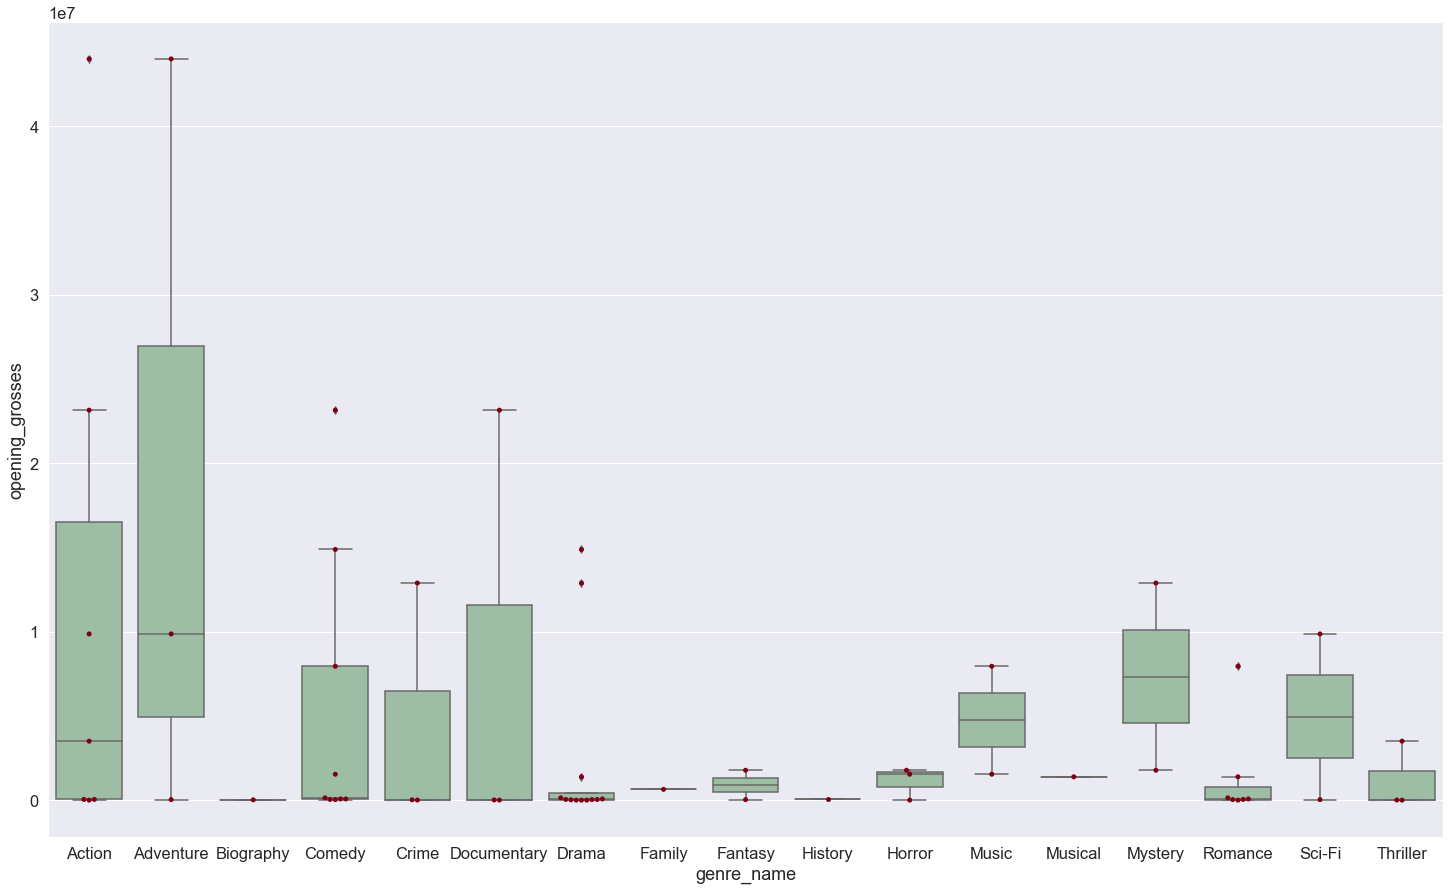

In [92]:
sns.set(font_scale=1.5)
ax = sns.boxplot(x='genre_name', y='opening_grosses', data=df_movie_genres, color='#99c2a2')
ax = sns.swarmplot(x="genre_name", y="opening_grosses", data=df_movie_genres, color='#7d0013')
plt.show()

In [93]:
res = stat()
res.anova_stat(df=df_movie_genres, res_var='opening_grosses', anova_model='opening_grosses ~ C(genre_name)')
res.anova_summary

df        sum_sq       mean_sq         F    PR(>F)
C(genre_name)  16.0  1.210656e+15  7.566602e+13  0.798024  0.679949
Residual       45.0  4.266753e+15  9.481673e+13       NaN       NaN

In [94]:
df_movie_genres.groupby('genre_name').describe().opening_theaters

count         mean          std     min      25%     50%  \
genre_name                                                              
Action         7.0  2023.428571  1922.048027     4.0    31.50  2772.0   
Adventure      3.0  2582.666667  2251.751392    27.0  1736.50  3446.0   
Biography      1.0    28.000000          NaN    28.0    28.00    28.0   
Comedy         9.0  1514.111111  1751.987546     4.0    27.00   308.0   
Crime          3.0  1112.666667  1876.965992    28.0    29.00    30.0   
Documentary    3.0  1202.333333  2079.904405     1.0     1.50     2.0   
Drama         12.0   682.500000  1328.798877     1.0     4.00    27.5   
Family         1.0  1005.000000          NaN  1005.0  1005.00  1005.0   
Fantasy        2.0   857.000000  1173.797257    27.0   442.00   857.0   
History        1.0    24.000000          NaN    24.0    24.00    24.0   
Horror         3.0  1342.000000  1175.117441    33.0   860.00  1687.0   
Music          2.0  2974.000000   944.694660  2306.0  2640.00  2974.0   
Musical        1.0   797.000000          NaN   797.0   797.00   797.0   
Mystery        2.0  2483.500000  1126.421102  1687.0  2085.25  2483.5   
Romance        7.0   688.285714  1334.187857     1.0    15.50    39.0   
Sci-Fi         2.0  1736.500000  2417.598085    27.0   881.75  1736.5   
Thriller       3.0   935.333333  1590.653115     4.0    17.00    30.0   

                 75%     max  
genre_name                    
Action       3525.00  4275.0  
Adventure    3860.50  4275.0  
Biography      28.00    28.0  
Comedy       3604.00  3677.0  
Crime        1655.00  3280.0  
Documentary  1803.00  3604.0  
Drama         430.25  3677.0  
Family       1005.00  1005.0  
Fantasy      1272.00  1687.0  
History        24.00    24.0  
Horror       1996.50  2306.0  
Music        3308.00  3642.0  
Musical       797.00   797.0  
Mystery      2881.75  3280.0  
Romance       552.50  3642.0  
Sci-Fi       2591.25  3446.0  
Thriller     1401.00  2772.0

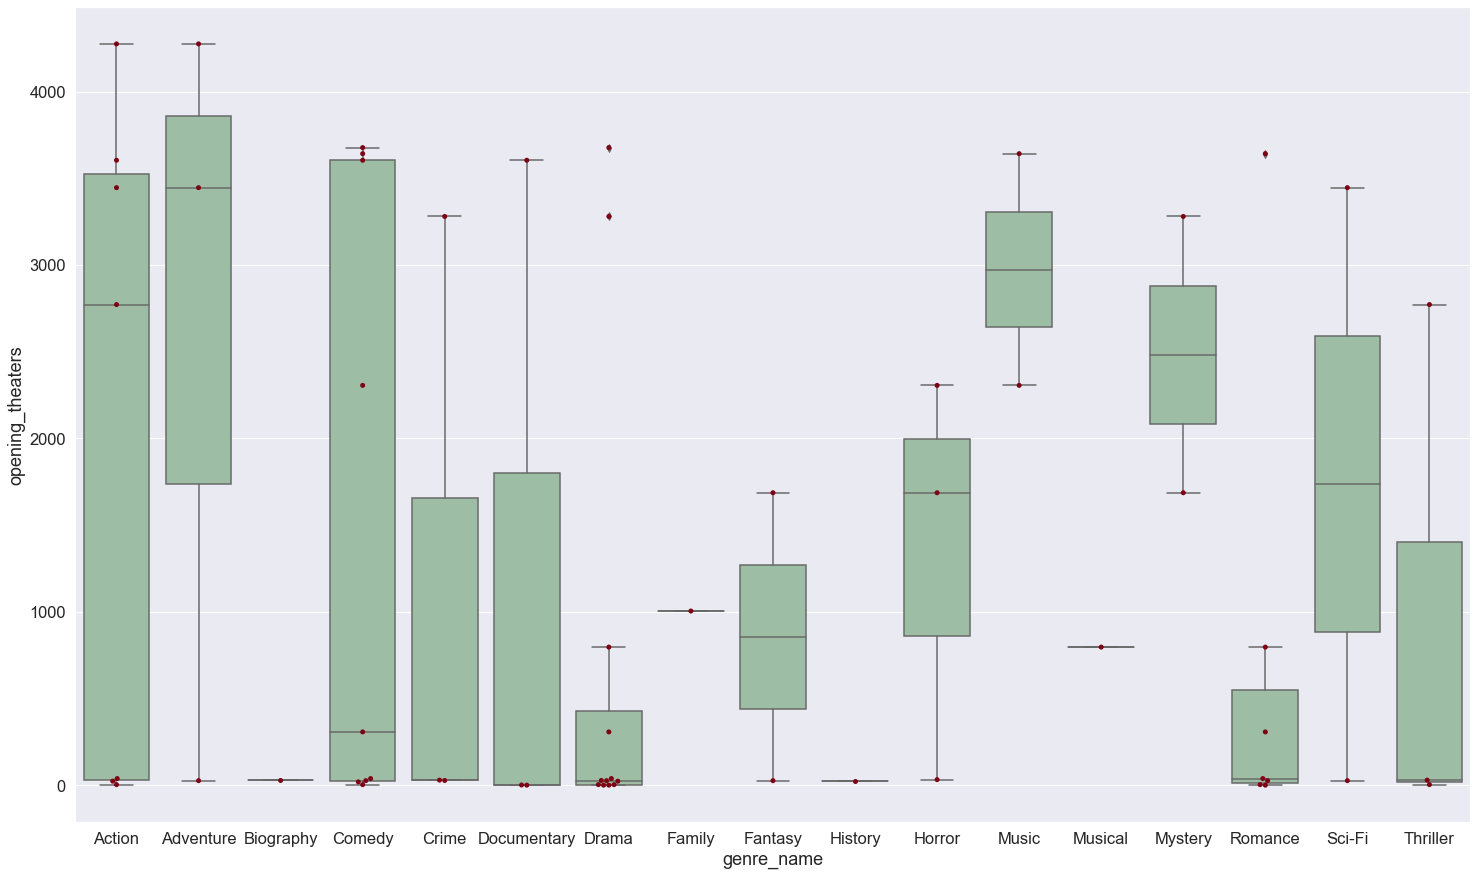

In [95]:
sns.set(font_scale=1.5)
ax = sns.boxplot(x='genre_name', y='opening_theaters', data=df_movie_genres, color='#99c2a2')
ax = sns.swarmplot(x="genre_name", y="opening_theaters", data=df_movie_genres, color='#7d0013')
plt.show()

In [96]:
res = stat()
res.anova_stat(df=df_movie_genres, res_var='opening_theaters', anova_model='opening_theaters ~ C(genre_name)')
res.anova_summary

df        sum_sq       mean_sq        F    PR(>F)
C(genre_name)  16.0  2.950891e+07  1.844307e+06  0.69237  0.786012
Residual       45.0  1.198692e+08  2.663760e+06      NaN       NaN

In [97]:
df_movie_genres.groupby('genre_name').describe().rating_avg

count      mean       std  min    25%   50%    75%  max
genre_name                                                          
Action         8.0  5.700000  0.785584  4.7  5.175  5.45  6.325  7.0
Adventure      4.0  6.450000  0.984886  5.2  6.100  6.50  6.850  7.6
Biography      2.0  6.500000  0.707107  6.0  6.250  6.50  6.750  7.0
Comedy        12.0  6.350000  0.814081  5.1  5.675  6.30  7.000  7.9
Crime          4.0  5.950000  0.591608  5.1  5.775  6.15  6.325  6.4
Documentary    5.0  7.820000  0.511859  7.0  7.800  7.90  8.000  8.4
Drama         15.0  6.313333  0.894321  4.3  5.800  6.30  6.850  7.9
Family         3.0  5.933333  1.650253  4.3  5.100  5.90  6.750  7.6
Fantasy        4.0  6.400000  1.029563  5.1  6.000  6.45  6.850  7.6
History        1.0  5.300000       NaN  5.3  5.300  5.30  5.300  5.3
Horror         4.0  5.075000  1.217580  3.5  4.475  5.25  5.850  6.3
Music          3.0  5.366667  0.945163  4.3  5.000  5.70  5.900  6.1
Musical        2.0  6.950000  0.919239  6.3  6.625  6.95  7.275  7.6
Mystery        2.0  6.300000  0.000000  6.3  6.300  6.30  6.300  6.3
Romance        7.0  6.471429  0.876954  5.5  5.850  6.30  6.950  7.9
Sci-Fi         4.0  5.100000  1.113553  4.0  4.450  4.90  5.550  6.6
Thriller       6.0  5.116667  0.990791  4.0  4.625  4.70  5.900  6.4

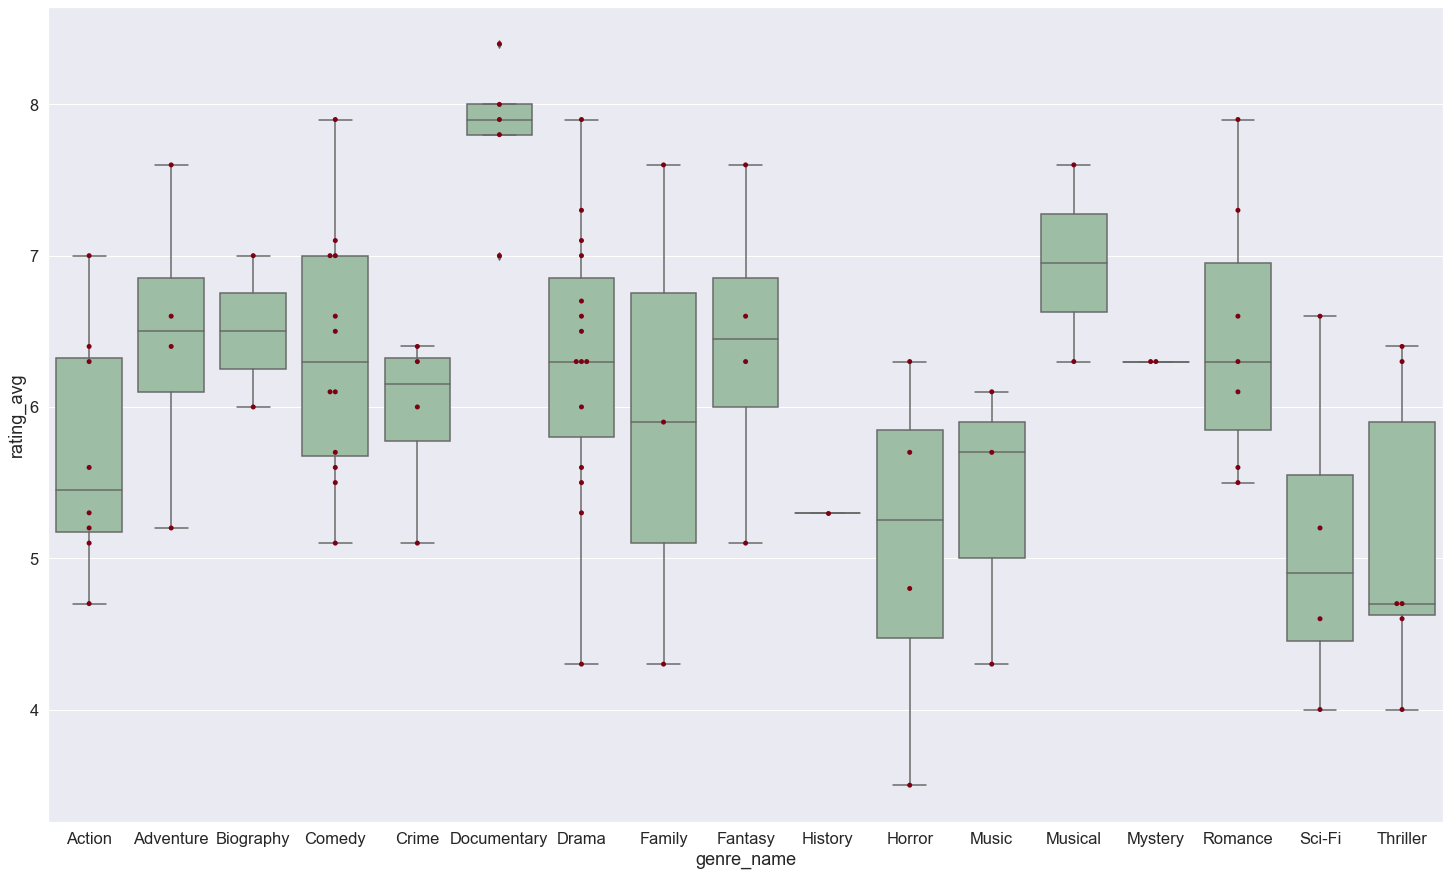

In [98]:
sns.set(font_scale=1.5)
ax = sns.boxplot(x='genre_name', y='rating_avg', data=df_movie_genres, color='#99c2a2')
ax = sns.swarmplot(x="genre_name", y="rating_avg", data=df_movie_genres, color='#7d0013')
plt.show()

In [99]:
res = stat()
res.anova_stat(df=df_movie_genres, res_var='rating_avg', anova_model='rating_avg ~ C(genre_name)')
res.anova_summary

df     sum_sq   mean_sq         F    PR(>F)
C(genre_name)  16.0  37.566447  2.347903  2.829106  0.001456
Residual       69.0  57.263786  0.829910       NaN       NaN

In [100]:
df_movie_genres.groupby('genre_name').describe().tw_all_tweet_count

count          mean           std     min      25%      50%  \
genre_name                                                                 
Action         8.0  27844.875000  38087.465000   102.0   343.25    597.0   
Adventure      4.0  38179.000000  44046.626333   117.0   233.25  35742.5   
Biography      2.0    138.500000    177.483802    13.0    75.75    138.5   
Comedy        12.0  16912.083333  38406.490267    13.0    82.00    429.0   
Crime          4.0   6848.250000  12986.666403   264.0   354.00    400.5   
Documentary    5.0  13745.600000  30662.875376     4.0    18.00     37.0   
Drama         15.0   2577.266667   6745.194527     1.0    23.50    122.0   
Family         3.0     89.333333     78.258120     1.0    59.00    117.0   
Fantasy        4.0    513.250000    504.271339   117.0   233.25    344.5   
History        1.0    122.000000           NaN   122.0   122.00    122.0   
Horror         4.0   1190.500000   1095.007610   229.0   492.25    913.5   
Music          3.0  41603.333333  69727.874672     1.0  1353.50   2706.0   
Musical        2.0   1443.500000   1875.954290   117.0   780.25   1443.5   
Mystery        2.0  13787.500000  17734.945179  1247.0  7517.25  13787.5   
Romance        7.0  18420.428571  45739.945886    19.0   150.00    441.0   
Sci-Fi         4.0  17991.000000  35481.386021   167.0   245.75    292.0   
Thriller       6.0    396.333333    262.000509   102.0   203.25    348.0   

                  75%       max  
genre_name                       
Action       69251.00   81114.0  
Adventure    73688.25   81114.0  
Biography      201.25     264.0  
Comedy        3718.50  122103.0  
Crime         6894.75   26328.0  
Documentary     72.00   68597.0  
Drama         1605.50   26328.0  
Family         133.50     150.0  
Fantasy        624.50    1247.0  
History        122.00     122.0  
Horror        1611.75    2706.0  
Music        62404.50  122103.0  
Musical       2106.75    2770.0  
Mystery      20057.75   26328.0  
Romance       3040.00  122103.0  
Sci-Fi       18037.25   71213.0  
Thriller       591.00     753.0

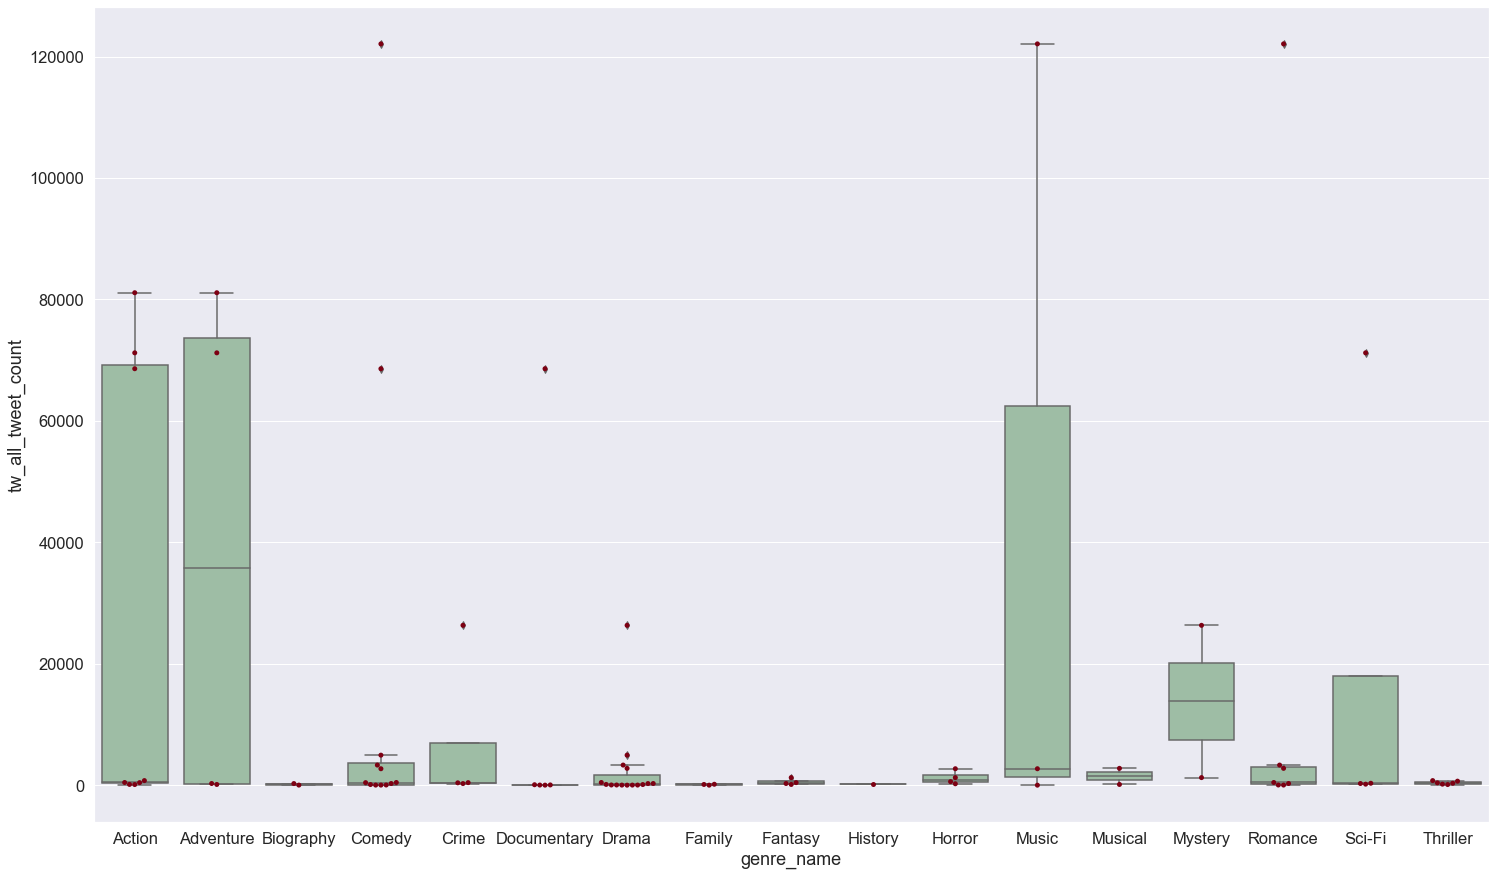

In [101]:
sns.set(font_scale=1.5)
ax = sns.boxplot(x='genre_name', y='tw_all_tweet_count', data=df_movie_genres, color='#99c2a2')
ax = sns.swarmplot(x="genre_name", y="tw_all_tweet_count", data=df_movie_genres, color='#7d0013')
plt.show()

In [102]:
res = stat()
res.anova_stat(df=df_movie_genres, res_var='tw_all_tweet_count', anova_model='tw_all_tweet_count ~ C(genre_name)')
res.anova_summary

df        sum_sq       mean_sq        F   PR(>F)
C(genre_name)  16.0  1.240822e+10  7.755136e+08  0.84294  0.63403
Residual       69.0  6.348071e+10  9.200103e+08      NaN      NaN

In [103]:
df_movie_genres.groupby('genre_name').describe().tw_all_quote_count

count         mean          std    min      25%     50%      75%  \
genre_name                                                                      
Action         8.0  2580.625000  4090.018091    1.0    12.50    41.5  4328.00   
Adventure      4.0  3817.000000  5290.622711    2.0    21.50  2015.5  5811.00   
Biography      2.0    18.000000    25.455844    0.0     9.00    18.0    27.00   
Comedy        12.0   824.000000  1732.793016    0.0     2.50    35.0   297.00   
Crime          4.0   967.000000  1867.352136   22.0    32.50    39.0   973.50   
Documentary    5.0  1062.200000  2370.679586    0.0     2.00     3.0     3.00   
Drama         15.0   321.800000   963.705809    0.0     1.00     5.0   123.00   
Family         3.0     4.333333     5.859465    0.0     1.00     2.0     6.50   
Fantasy        4.0    44.250000    43.759761    2.0    21.50    35.0    57.75   
History        1.0     5.000000          NaN    5.0     5.00     5.0     5.00   
Horror         4.0   101.500000    96.015624   13.0    43.75    79.5   137.25   
Music          3.0  1266.666667  1994.715351    0.0   117.00   234.0  1900.00   
Musical        2.0   138.000000   192.333044    2.0    70.00   138.0   206.00   
Mystery        2.0  1936.500000  2590.132139  105.0  1020.75  1936.5  2852.25   
Romance        7.0   585.142857  1319.078015    1.0     8.50    28.0   242.00   
Sci-Fi         4.0  1014.500000  1992.345101   13.0    13.75    21.0  1021.75   
Thriller       6.0    18.500000    13.247641    1.0    13.25    17.0    21.50   

                 max  
genre_name            
Action       11235.0  
Adventure    11235.0  
Biography       36.0  
Comedy        5303.0  
Crime         3768.0  
Documentary   5303.0  
Drama         3768.0  
Family          11.0  
Fantasy        105.0  
History          5.0  
Horror         234.0  
Music         3566.0  
Musical        274.0  
Mystery       3768.0  
Romance       3566.0  
Sci-Fi        4003.0  
Thriller        41.0

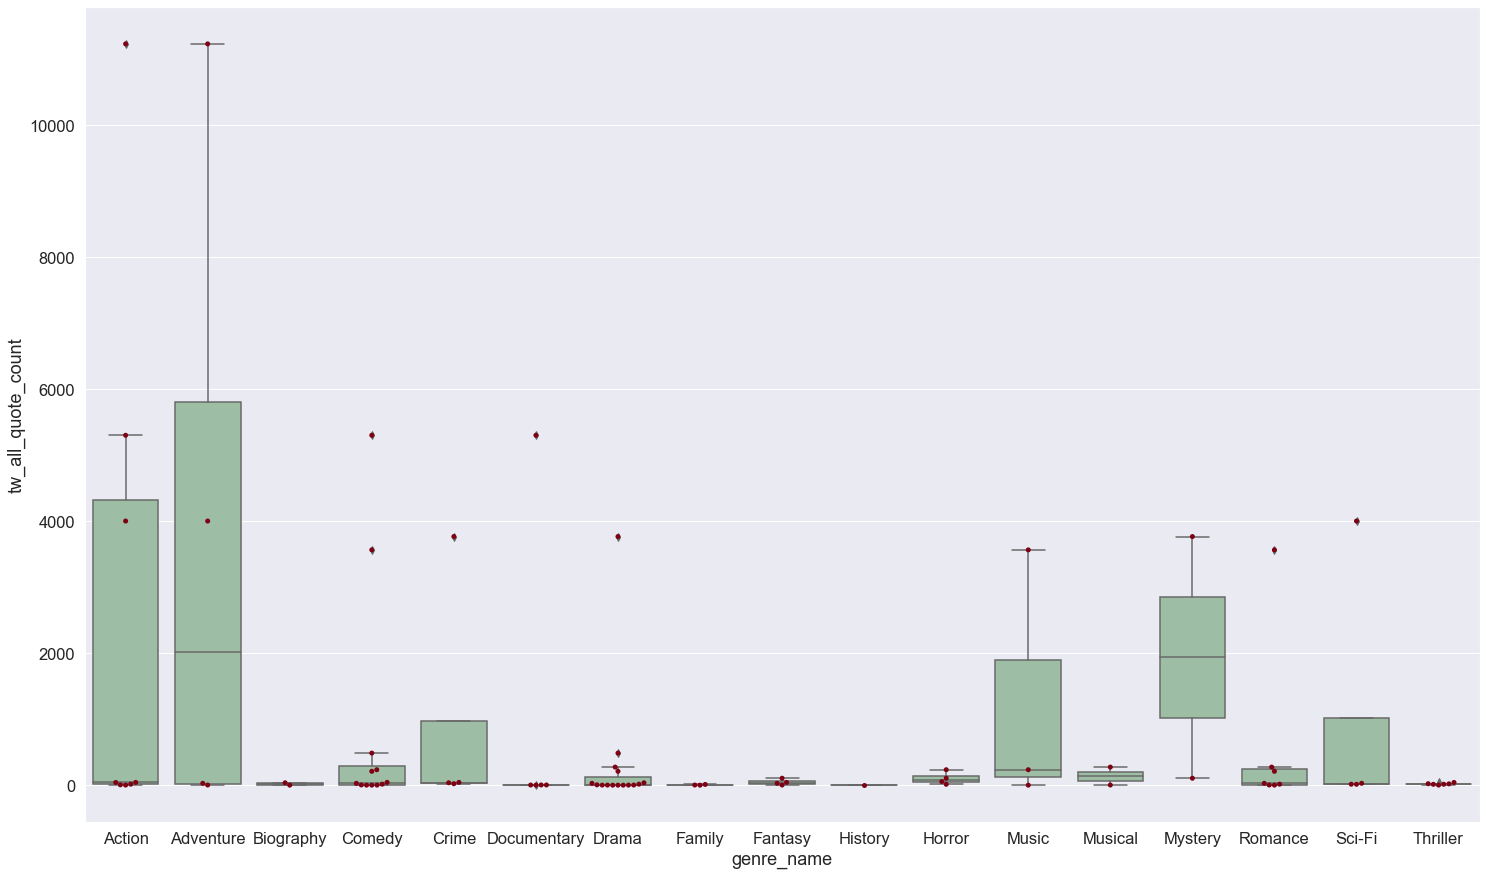

In [104]:
sns.set(font_scale=1.5)
ax = sns.boxplot(x='genre_name', y='tw_all_quote_count', data=df_movie_genres, color='#99c2a2')
ax = sns.swarmplot(x="genre_name", y="tw_all_quote_count", data=df_movie_genres, color='#7d0013')
plt.show()

In [105]:
res = stat()
res.anova_stat(df=df_movie_genres, res_var='tw_all_quote_count', anova_model='tw_all_quote_count ~ C(genre_name)')
res.anova_summary

df        sum_sq       mean_sq         F   PR(>F)
C(genre_name)  16.0  8.122379e+07  5.076487e+06  1.104529  0.36844
Residual       69.0  3.171285e+08  4.596065e+06       NaN      NaN

In [106]:
df_movie_genres.groupby('genre_name').describe().tw_all_reply_count

count         mean           std    min      25%     50%  \
genre_name                                                              
Action         8.0  8043.000000  11851.062954    7.0    43.25   122.5   
Adventure      4.0  8706.500000  10701.965193    9.0    15.75  6436.0   
Biography      2.0    33.000000     43.840620    2.0    17.50    33.0   
Comedy        12.0  3554.333333   8617.687924    0.0    14.00    67.5   
Crime          4.0  1644.750000   3164.222535   39.0    57.75    74.5   
Documentary    5.0  5852.200000  13062.999491    1.0     9.00     9.0   
Drama         15.0   643.600000   1658.812820    0.0     1.50    18.0   
Family         3.0    10.666667     11.590226    0.0     4.50     9.0   
Fantasy        4.0    96.250000    122.614232    9.0    15.75    51.5   
History        1.0    23.000000           NaN   23.0    23.00    23.0   
Horror         4.0   230.000000    228.442553   18.0    76.50   184.5   
Music          3.0  3695.666667   5945.466704    0.0   266.50   533.0   
Musical        2.0   469.500000    651.245345    9.0   239.25   469.5   
Mystery        2.0  3332.000000   4326.079287  273.0  1802.50  3332.0   
Romance        7.0  1721.428571   3910.635833    0.0     9.50    50.0   
Sci-Fi         4.0  3248.250000   6403.909971   18.0    27.75    60.5   
Thriller       6.0    74.333333     58.718538    7.0    33.00    64.5   

                  75%      max  
genre_name                      
Action       15126.75  29220.0  
Adventure    15126.75  21945.0  
Biography       48.50     64.0  
Comedy         816.00  29220.0  
Crime         1661.50   6391.0  
Documentary     22.00  29220.0  
Drama          280.50   6391.0  
Family          16.00     23.0  
Fantasy        132.00    273.0  
History         23.00     23.0  
Horror         338.00    533.0  
Music         5543.50  10554.0  
Musical        699.75    930.0  
Mystery       4861.50   6391.0  
Romance        713.50  10554.0  
Sci-Fi        3281.00  12854.0  
Thriller       111.75    160.0

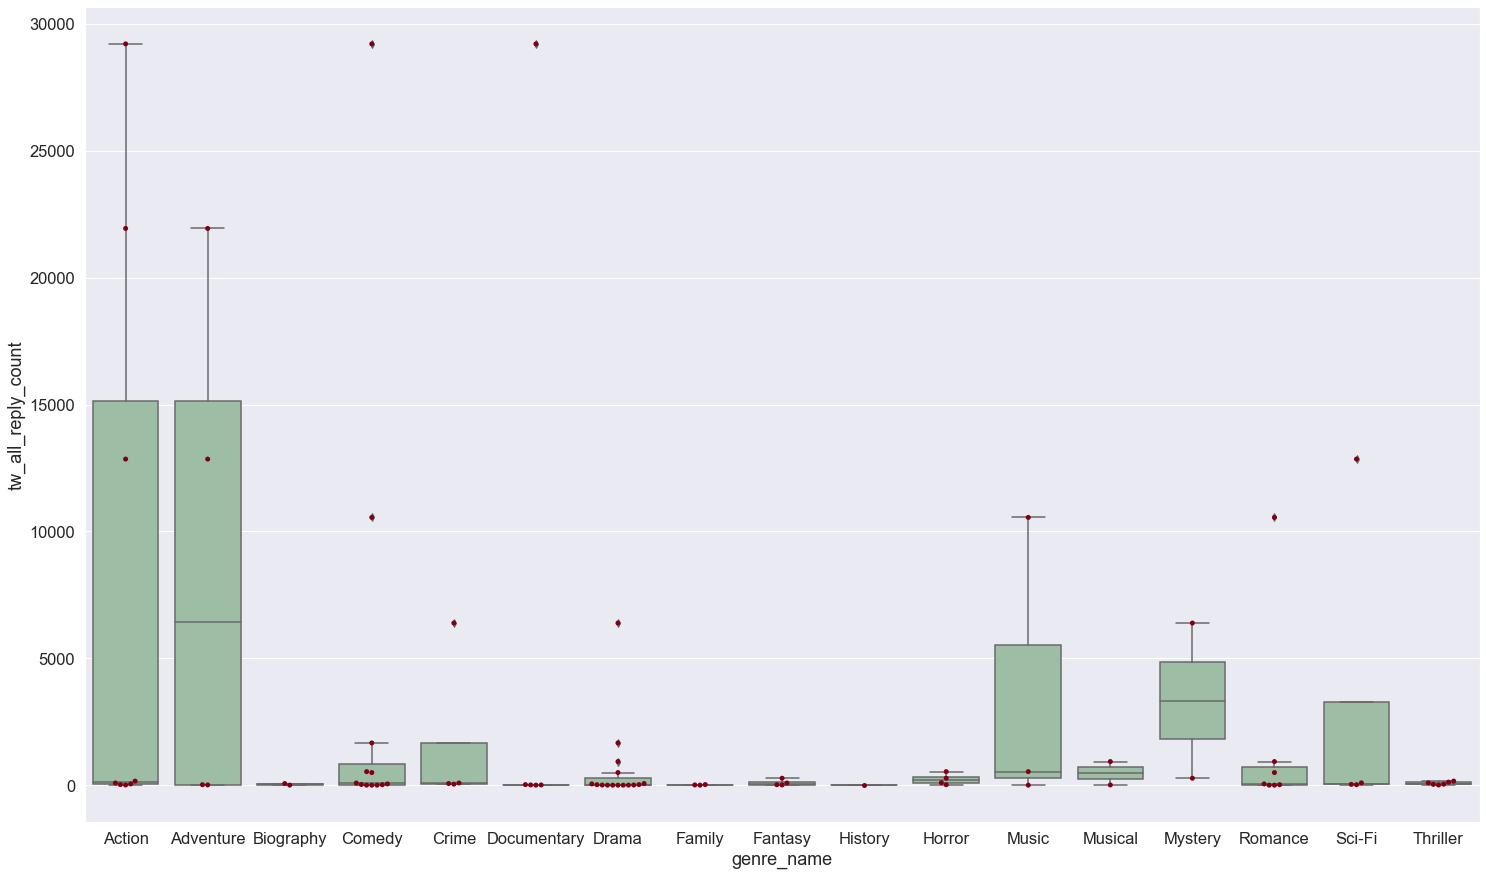

In [107]:
sns.set(font_scale=1.5)
ax = sns.boxplot(x='genre_name', y='tw_all_reply_count', data=df_movie_genres, color='#99c2a2')
ax = sns.swarmplot(x="genre_name", y="tw_all_reply_count", data=df_movie_genres, color='#7d0013')
plt.show()

In [108]:
res = stat()
res.anova_stat(df=df_movie_genres, res_var='tw_all_reply_count', anova_model='tw_all_reply_count ~ C(genre_name)')
res.anova_summary

df        sum_sq       mean_sq         F    PR(>F)
C(genre_name)  16.0  6.566184e+08  4.103865e+07  0.885003  0.588283
Residual       69.0  3.199614e+09  4.637122e+07       NaN       NaN

In [109]:
df_movie_genres.groupby('genre_name').describe().tw_all_retweet_count

count          mean           std     min        25%         50%  \
genre_name                                                                      
Action         8.0  6.613766e+06  1.004542e+07   249.0    3214.00    217920.0   
Adventure      4.0  1.114513e+07  1.287134e+07   702.0     849.00  10975610.5   
Biography      2.0  7.875000e+02  1.102379e+03     8.0     397.75       787.5   
Comedy        12.0  9.565747e+05  2.290194e+06     6.0     135.00     10957.0   
Crime          4.0  2.715478e+05  3.209886e+05  1567.0    7012.75    217121.5   
Documentary    5.0  1.578117e+06  3.528652e+06     0.0      22.00        43.0   
Drama         15.0  9.331420e+04  1.989099e+05     4.0      45.00       718.0   
Family         3.0  3.183333e+02  3.541276e+02     4.0     126.50       249.0   
Fantasy        4.0  1.086478e+05  2.112023e+05   702.0     849.00      4237.0   
History        1.0  7.180000e+02           NaN   718.0     718.00       718.0   
Horror         4.0  2.266125e+04  2.884916e+04   595.0    5830.75     12722.0   
Music          3.0  8.208763e+05  1.406350e+06     4.0    8936.00     17868.0   
Musical        2.0  2.352250e+04  3.227306e+04   702.0   12112.25     23522.5   
Mystery        2.0  3.289785e+05  4.545318e+05  7576.0  168277.25    328978.5   
Romance        7.0  4.196674e+05  9.074780e+05    36.0     484.00      4046.0   
Sci-Fi         4.0  5.657883e+06  1.131380e+07   312.0     751.50      1315.5   
Thriller       6.0  4.965833e+03  4.687203e+03   249.0     667.25      4990.5   

                     75%         max  
genre_name                            
Action       11405351.50  22628590.0  
Adventure    22119889.75  22628590.0  
Biography        1177.25      1567.0  
Comedy         429441.75   7890361.0  
Crime          481656.50    650381.0  
Documentary       160.00   7890361.0  
Drama           25194.50    650381.0  
Family            475.50       702.0  
Fantasy        112035.75    425415.0  
History           718.00       718.0  
Horror          29552.50     64606.0  
Music         1231312.50   2444757.0  
Musical         34932.75     46343.0  
Mystery        489679.75    650381.0  
Romance        243932.50   2444757.0  
Sci-Fi        5658447.25  22628590.0  
Thriller         8683.00     10425.0

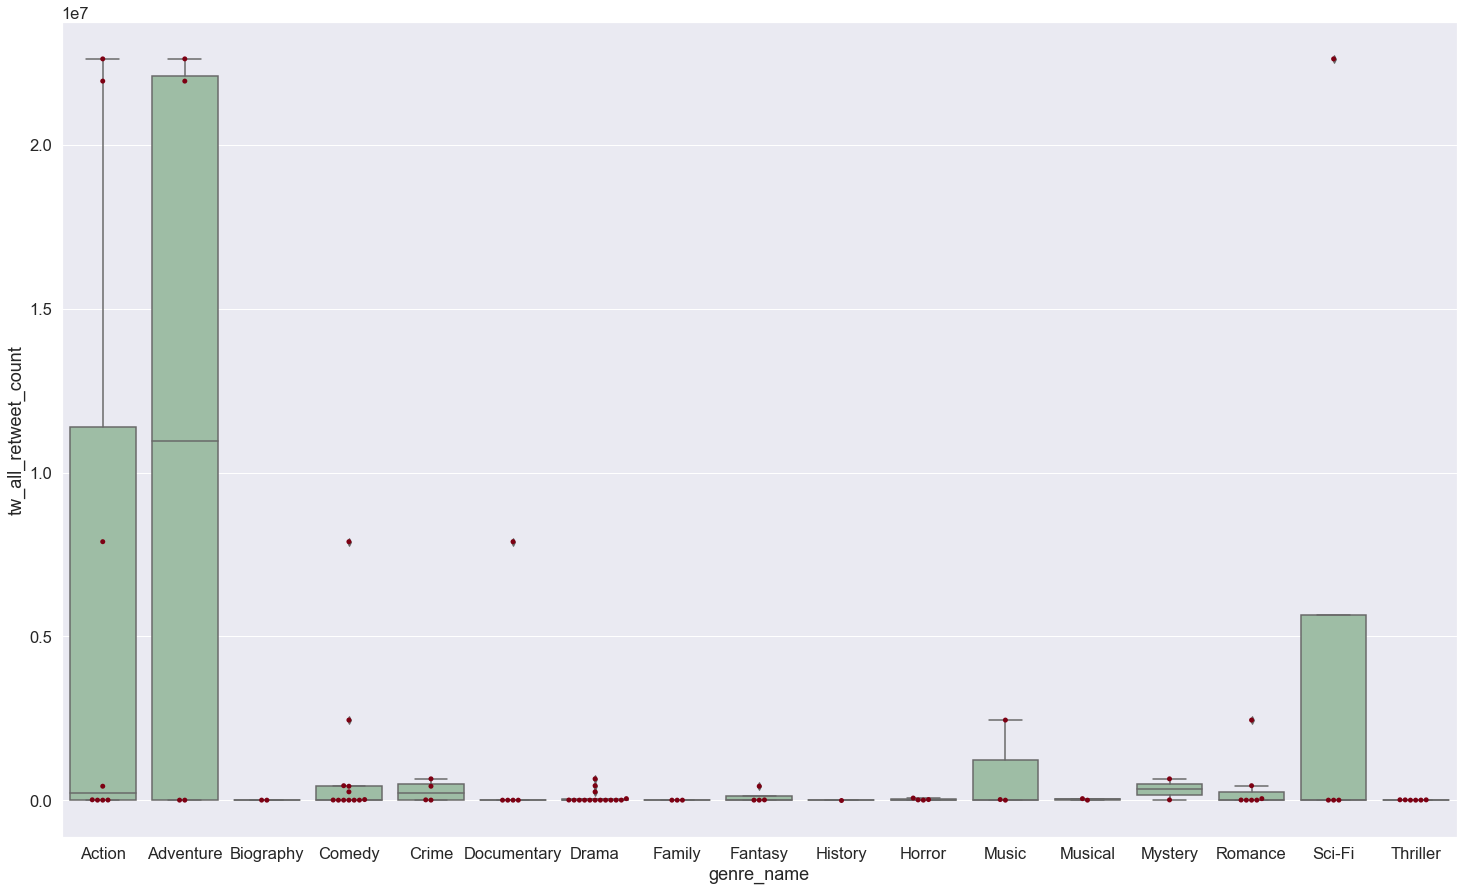

In [110]:
sns.set(font_scale=1.5)
ax = sns.boxplot(x='genre_name', y='tw_all_retweet_count', data=df_movie_genres, color='#99c2a2')
ax = sns.swarmplot(x="genre_name", y="tw_all_retweet_count", data=df_movie_genres, color='#7d0013')
plt.show()

In [111]:
res = stat()
res.anova_stat(df=df_movie_genres, res_var='tw_all_retweet_count', anova_model='tw_all_retweet_count ~ C(genre_name)')
res.anova_summary

df        sum_sq       mean_sq         F    PR(>F)
C(genre_name)  16.0  7.453077e+14  4.658173e+13  1.885128  0.036899
Residual       69.0  1.704998e+15  2.471012e+13       NaN       NaN

In [112]:
df_movie_genres.groupby('genre_name').describe().tw_all_like_count

count           mean            std     min       25%      50%  \
genre_name                                                                    
Action         8.0   99686.875000  156489.681861    68.0    628.25   1731.0   
Adventure      4.0  136818.500000  196053.041004   189.0    537.75  65438.5   
Biography      2.0     227.000000     308.298557     9.0    118.00    227.0   
Comedy        12.0   37025.250000   78529.418424     9.0    129.75    881.0   
Crime          4.0   30358.750000   59619.605827   445.0    484.00    601.0   
Documentary    5.0   49347.400000  110173.091707     4.0     68.00    107.0   
Drama         15.0   11286.066667   30993.353666     0.0     28.50    398.0   
Family         3.0     140.666667     123.791491     0.0     94.50    189.0   
Fantasy        4.0    1420.500000    1823.836341   189.0    537.75    679.5   
History        1.0     398.000000            NaN   398.0    398.00    398.0   
Horror         4.0    3681.500000    3635.148186   400.0   1288.00   2859.0   
Music          3.0   52960.666667   84385.650731     0.0   4304.00   8608.0   
Musical        2.0    5302.000000    7230.873944   189.0   2745.50   5302.0   
Mystery        2.0   61961.000000   81779.727671  4134.0  33047.50  61961.0   
Romance        7.0   24245.285714   55722.470254    35.0    345.00   1057.0   
Sci-Fi         4.0   33024.250000   64799.993037   210.0    543.00    832.0   
Thriller       6.0     824.833333     847.801726    68.0    281.75    628.0   

                   75%       max  
genre_name                        
Action       159275.00  416208.0  
Adventure    201719.25  416208.0  
Biography       336.00     445.0  
Comedy        13731.00  246431.0  
Crime         30475.75  119788.0  
Documentary     127.00  246431.0  
Drama          4151.50  119788.0  
Family          211.00     233.0  
Fantasy        1562.25    4134.0  
History         398.00     398.0  
Horror         5252.50    8608.0  
Music         79441.00  150274.0  
Musical        7858.50   10415.0  
Mystery       90874.50  119788.0  
Romance        8830.50  150274.0  
Sci-Fi        33313.25  130223.0  
Thriller        947.25    2405.0

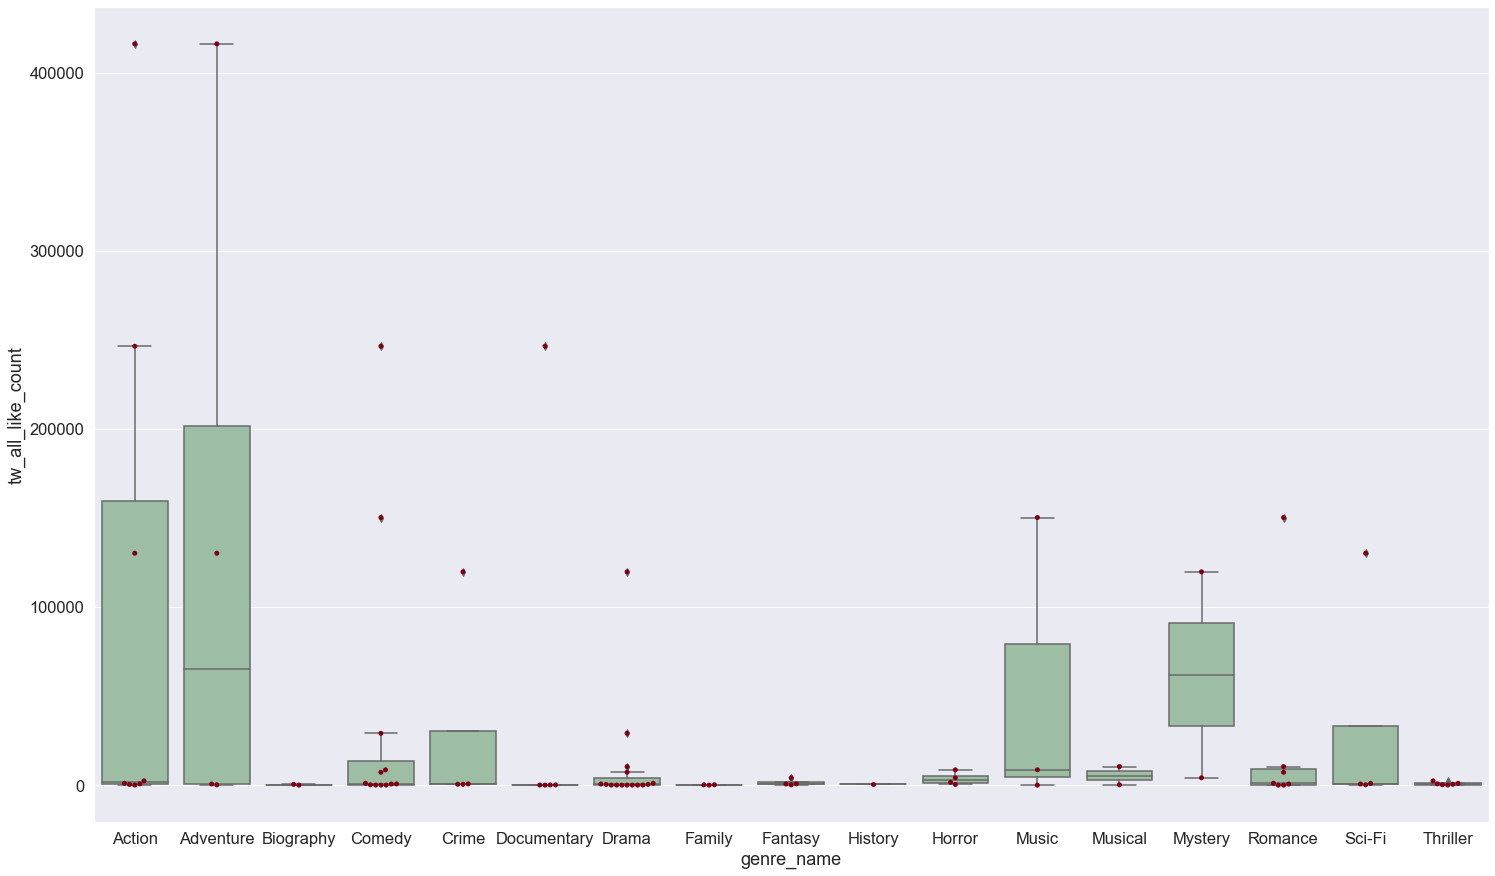

In [113]:
sns.set(font_scale=1.5)
ax = sns.boxplot(x='genre_name', y='tw_all_like_count', data=df_movie_genres, color='#99c2a2')
ax = sns.swarmplot(x="genre_name", y="tw_all_like_count", data=df_movie_genres, color='#7d0013')
plt.show()

In [114]:
res = stat()
res.anova_stat(df=df_movie_genres, res_var='tw_all_like_count', anova_model='tw_all_like_count ~ C(genre_name)')
res.anova_summary

df        sum_sq       mean_sq         F    PR(>F)
C(genre_name)  16.0  1.122122e+11  7.013261e+09  1.009216  0.458121
Residual       69.0  4.794958e+11  6.949214e+09       NaN       NaN

In [115]:
df_movie_genres.groupby('genre_name').describe().tw_all_sentiment_mean

count      mean       std       min       25%       50%  \
genre_name                                                             
Action         8.0  0.285028  0.164323 -0.025361  0.230542  0.309167   
Adventure      4.0  0.353571  0.316739 -0.025361  0.189366  0.356574   
Biography      2.0  0.617570  0.214481  0.465909  0.541740  0.617570   
Comedy        12.0  0.411250  0.159512  0.130514  0.335357  0.385595   
Crime          4.0  0.488309  0.143027  0.353578  0.421128  0.454777   
Documentary    5.0  0.604125  0.146811  0.372728  0.555556  0.666667   
Drama         15.0  0.389255  0.197962  0.000000  0.297902  0.398463   
Family         3.0  0.339943  0.365484  0.000000  0.146667  0.293333   
Fantasy        4.0  0.501617  0.152946  0.384122  0.428764  0.447925   
History        1.0  0.139344       NaN  0.139344  0.139344  0.139344   
Horror         4.0  0.300830  0.162431  0.058621  0.283779  0.371477   
Music          3.0  0.286994  0.258668  0.000000  0.179416  0.358832   
Musical        2.0  0.652418  0.104762  0.578339  0.615378  0.652418   
Mystery        2.0  0.368850  0.021598  0.353578  0.361214  0.368850   
Romance        7.0  0.397904  0.160970  0.130514  0.297902  0.452206   
Sci-Fi         4.0  0.275964  0.208261 -0.025361  0.236448  0.338506   
Thriller       6.0  0.344671  0.262960 -0.113636  0.328778  0.348625   

                  75%       max  
genre_name                       
Action       0.390457  0.470588  
Adventure    0.520778  0.726496  
Biography    0.693400  0.769231  
Comedy       0.464692  0.769231  
Crime        0.521958  0.690104  
Documentary  0.675676  0.750000  
Drama        0.498452  0.769231  
Family       0.509915  0.726496  
Fantasy      0.520778  0.726496  
History      0.139344  0.139344  
Horror       0.388528  0.401747  
Music        0.430491  0.502150  
Musical      0.689457  0.726496  
Mystery      0.376486  0.384122  
Romance      0.514233  0.578339  
Sci-Fi       0.378022  0.452206  
Thriller     0.441265  0.690104

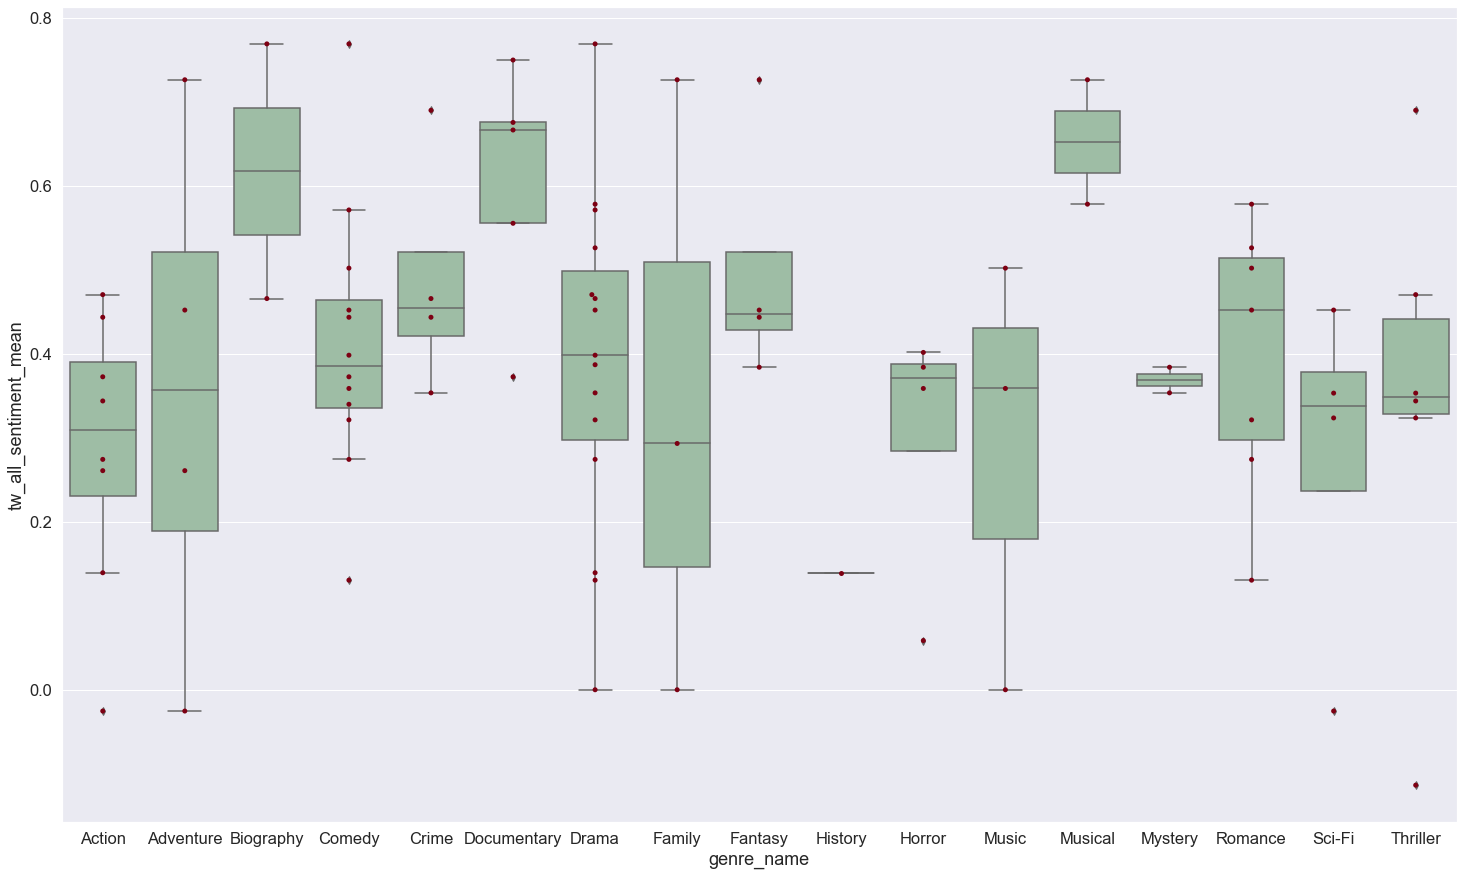

In [116]:
sns.set(font_scale=1.5)
ax = sns.boxplot(x='genre_name', y='tw_all_sentiment_mean', data=df_movie_genres, color='#99c2a2')
ax = sns.swarmplot(x="genre_name", y="tw_all_sentiment_mean", data=df_movie_genres, color='#7d0013')
plt.show()

In [117]:
res = stat()
res.anova_stat(df=df_movie_genres, res_var='tw_all_sentiment_mean', anova_model='tw_all_sentiment_mean ~ C(genre_name)')
res.anova_summary

df    sum_sq   mean_sq         F    PR(>F)
C(genre_name)  16.0  0.856023  0.053501  1.364647  0.185826
Residual       69.0  2.705169  0.039205       NaN       NaN

## Action/Adventure and others

In [118]:
df['action_adventure'] = df['genres'].apply(lambda x : False if(x.find("Action") == -1 and x.find("Adventure") == -1) else True)

In [119]:
df

id                           name                   hashtag  \
0    1                Jackass Forever            jackassforever   
1    2                       Moonfall                  moonfall   
2    3          The Wolf and the Lion         thewolfandthelion   
3    4             Only Fools Rush In           onlyfoolsrushin   
4    5  The Worst Person in the World  theworstpersonintheworld   
5    6                 Breaking Bread             breakingbread   
6    7                         Lingui                    lingui   
7    8                 The Long Night              thelongnight   
8    9                 Last Survivors             lastsurvivors   
9   10                       Marry Me              marrymemovie   
10  11              Death on the Nile            deathonthenile   
11  12                     Blacklight           blacklightmovie   
12  13             Catch the Fair One           catchthefairone   
13  14              Water Gate Bridge           watergatebridge   
14  15      Fabian: Going to the Dogs      fabiangoingtothedogs   
15  16                      Supercool                 supercool   
16  17                       Ronnie's                   ronnies   
17  18                    Cosmic Dawn                cosmicdawn   
18  19                   Give or Take                giveortake   
19  20                      Uncharted                 uncharted   
20  21                            Dog                  dogmovie   
21  22                     The Cursed                 thecursed   
22  23                      A Banquet                  abanquet   
23  24                          Ted K                      tedk   
24  25             Strawberry Mansion         strawberrymansion   
25  26               Too Cool to Kill             toocooltokill   
26  27                    The Automat                theautomat   
27  28                 Finding Carlos        findingcarlosmovie   
28  29         A Fairy Tale After All        afairytaleafterall   
29  30                     Studio 666                 studio666   
30  31                         Cyrano               cyranomovie   
31  32                         Butter            butterthemovie   
32  33                The Burning Sea             theburningsea   
33  34                   Let Me Be Me                 letmebeme   
34  35             The Desperate Hour          thedesperatehour   
35  36                     Moon Manor                 moonmanor   

                                    countries   mpaa  \
0                               United States      R   
1   United States;China;United Kingdom;Canada  PG-13   
2                               France;Canada     PG   
3                                       China   None   
4                Norway;France;Sweden;Denmark      R   
5                        United States;Israel   None   
6                 Chad;France;Belgium;Germany   None   
7                               United States      R   
8                               United States   None   
9                         United States;Japan  PG-13   
10               United States;United Kingdom  PG-13   
11              United States;Australia;China  PG-13   
12                              United States   None   
13                                      China   None   
14                                    Germany   None   
15               Canada;Finland;United States   None   
16                             United Kingdom   None   
17                                     Canada   None   
18                              United States   None   
19                        United States;Spain  PG-13   
20                              United States  PG-13   
21                              United States      R   
22                             United Kingdom   None   
23                              United States      R   
24                              United States   None   
25                                      China   None   
26          

In [120]:
df.groupby('action_adventure').describe().opening_grosses

count          mean           std     min       25%  \
action_adventure                                                        
False              17.0  2.435891e+06  4.729795e+06  2462.0   7992.00   
True                8.0  1.008215e+07  1.589919e+07   371.0  40531.25   

                        50%          75%         max  
action_adventure                                      
False               73937.0   1540543.00  14883928.0  
True              1773304.5  13190344.75  44010155.0

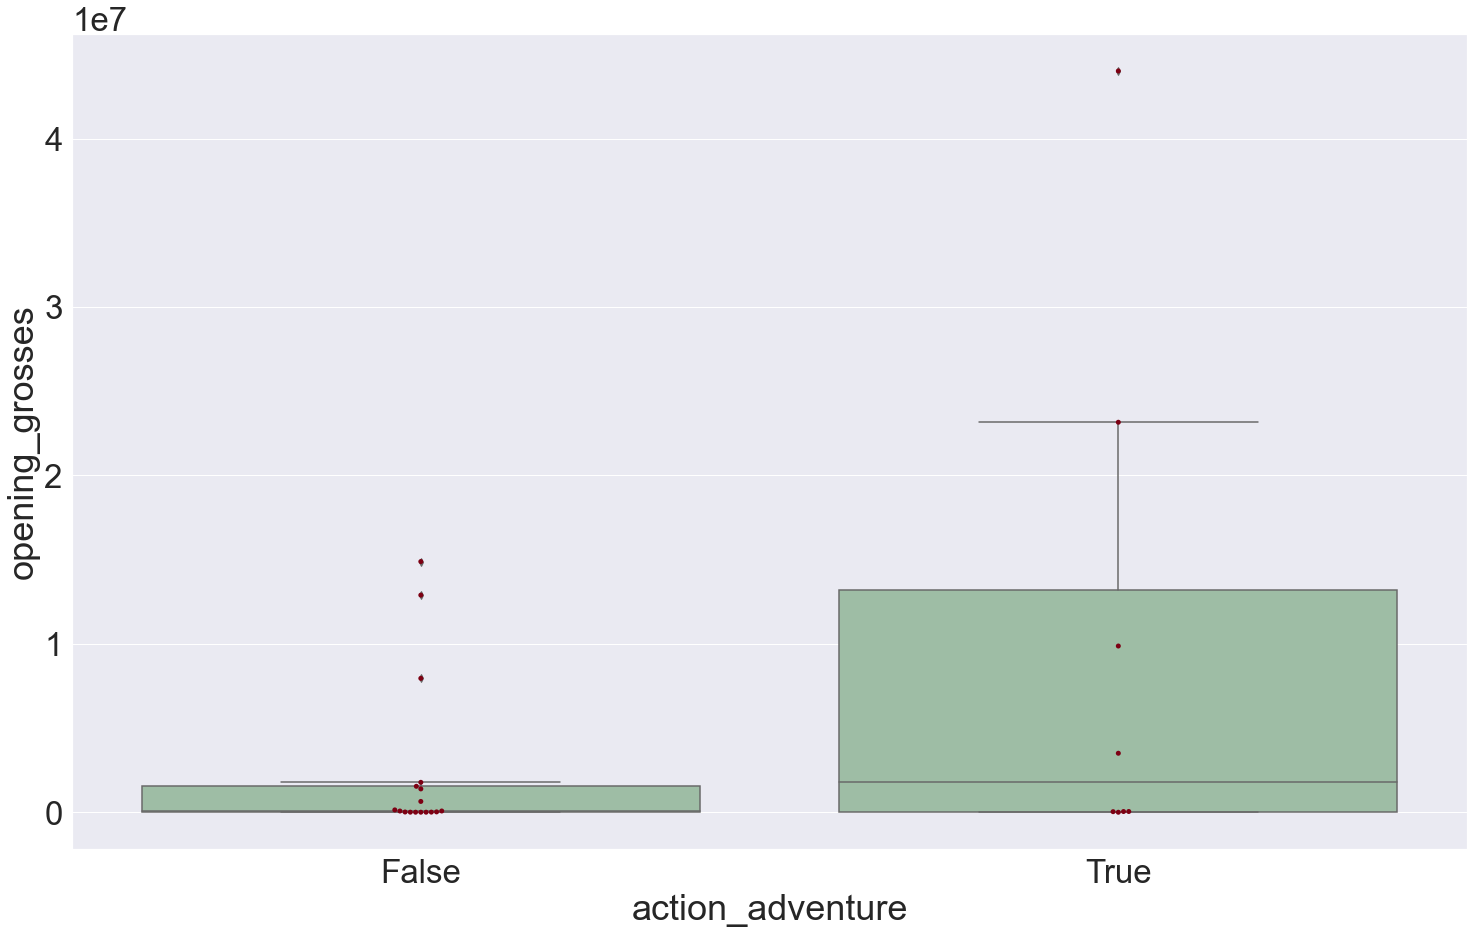

In [121]:
sns.set(font_scale=3)
ax = sns.boxplot(x='action_adventure', y='opening_grosses', data=df, color='#99c2a2')
ax = sns.swarmplot(x="action_adventure", y="opening_grosses", data=df, color='#7d0013')
plt.show()

In [122]:
res = stat()
res.anova_stat(df=df, res_var='opening_grosses', anova_model='opening_grosses ~ C(action_adventure)')
res.anova_summary

df        sum_sq       mean_sq         F   PR(>F)
C(action_adventure)   1.0  3.180514e+14  3.180514e+14  3.438514  0.07656
Residual             23.0  2.127426e+15  9.249677e+13       NaN      NaN

In [123]:
df.groupby('action_adventure').describe().opening_theaters

count         mean          std  min    25%     50%     75%  \
action_adventure                                                                
False              17.0   989.529412  1387.532167  1.0   4.00    33.0  1687.0   
True                8.0  1773.875000  1914.348934  4.0  26.25  1405.5  3485.5   

                     max  
action_adventure          
False             3677.0  
True              4275.0

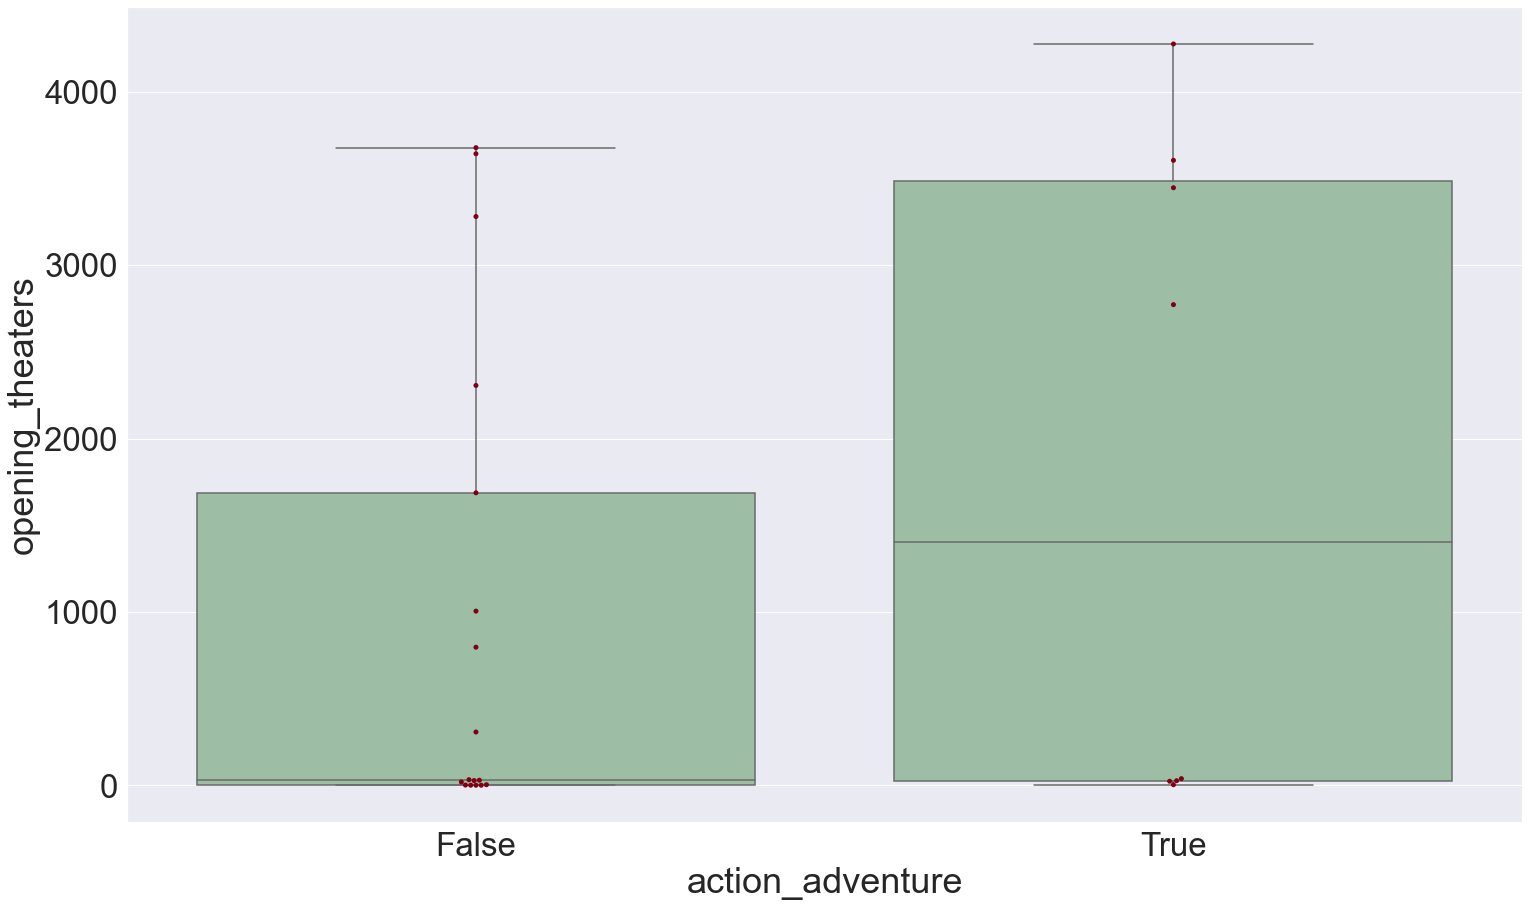

In [124]:
sns.set(font_scale=3)
ax = sns.boxplot(x='action_adventure', y='opening_theaters', data=df, color='#99c2a2')
ax = sns.swarmplot(x="action_adventure", y="opening_theaters", data=df, color='#7d0013')
plt.show()

In [125]:
res = stat()
res.anova_stat(df=df, res_var='opening_theaters', anova_model='opening_theaters ~ C(action_adventure)')
res.anova_summary

df        sum_sq       mean_sq         F    PR(>F)
C(action_adventure)   1.0  3.346677e+06  3.346677e+06  1.363401  0.254912
Residual             23.0  5.645705e+07  2.454654e+06       NaN       NaN

In [126]:
df.groupby('action_adventure').describe().rating_avg

count      mean       std  min    25%   50%    75%  max
action_adventure                                                         
False              26.0  6.196154  1.309803  3.5  5.550  6.30  7.075  8.4
True               10.0  5.980000  0.940213  4.7  5.225  5.95  6.550  7.6

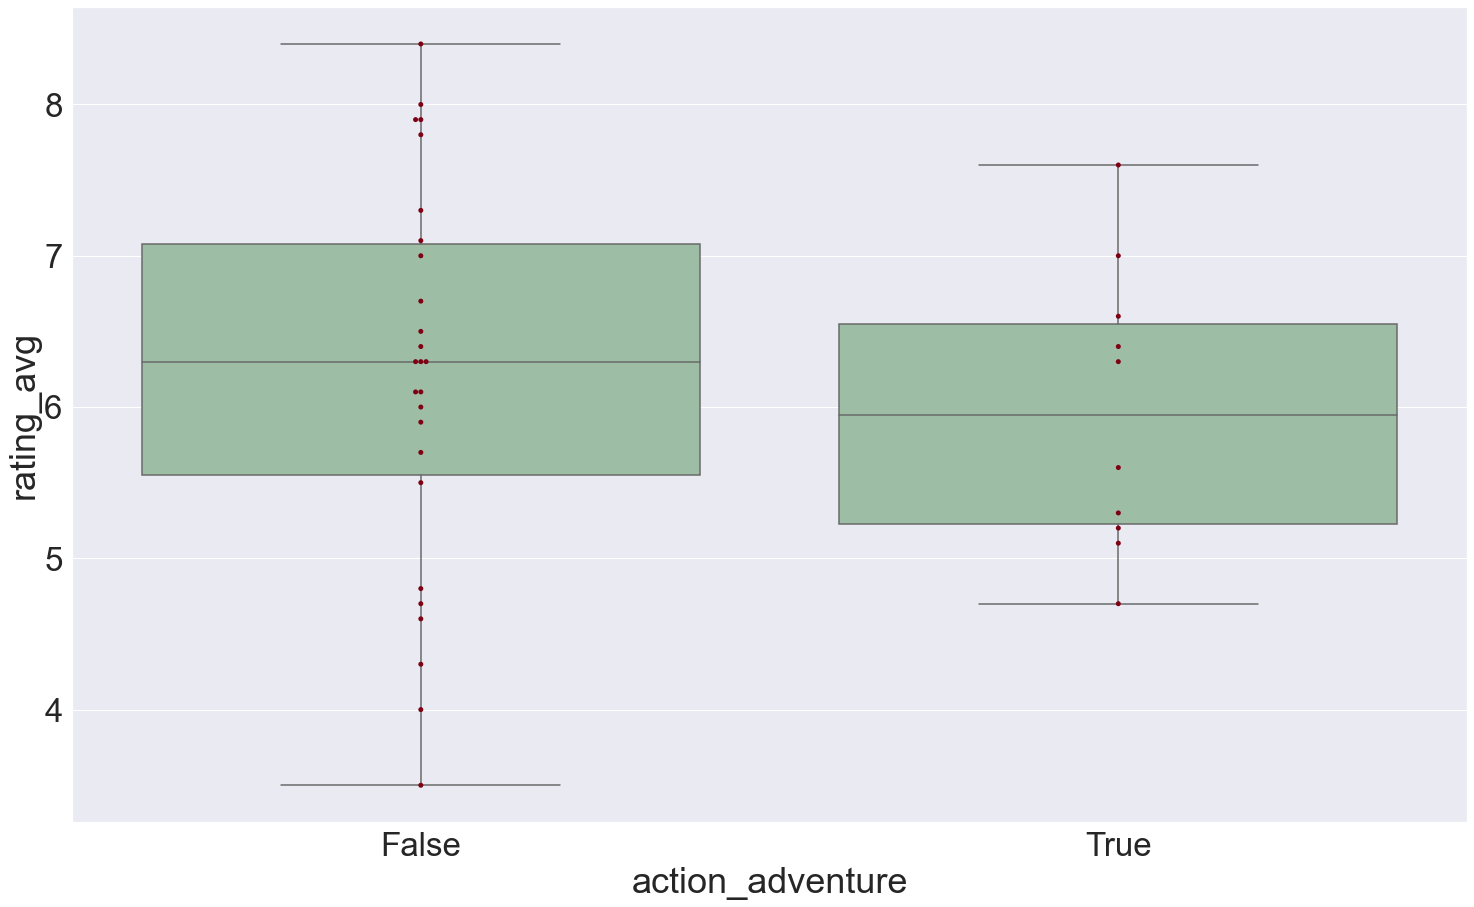

In [127]:
sns.set(font_scale=3)
ax = sns.boxplot(x='action_adventure', y='rating_avg', data=df, color='#99c2a2')
ax = sns.swarmplot(x="action_adventure", y="rating_avg", data=df, color='#7d0013')
plt.show()

In [128]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(action_adventure)')
res.anova_summary

df     sum_sq   mean_sq         F    PR(>F)
C(action_adventure)   1.0   0.337440  0.337440  0.225643  0.637811
Residual             34.0  50.845615  1.495459       NaN       NaN

In [129]:
df.groupby('action_adventure').describe().tw_all_tweet_count

count     mean           std    min     25%    50%  \
action_adventure                                                       
False              26.0   6403.5  24157.267516    1.0   28.75  198.0   
True               10.0  22314.8  35555.693596  102.0  159.50  429.0   

                       75%       max  
action_adventure                      
False              1100.25  122103.0  
True              51636.00   81114.0

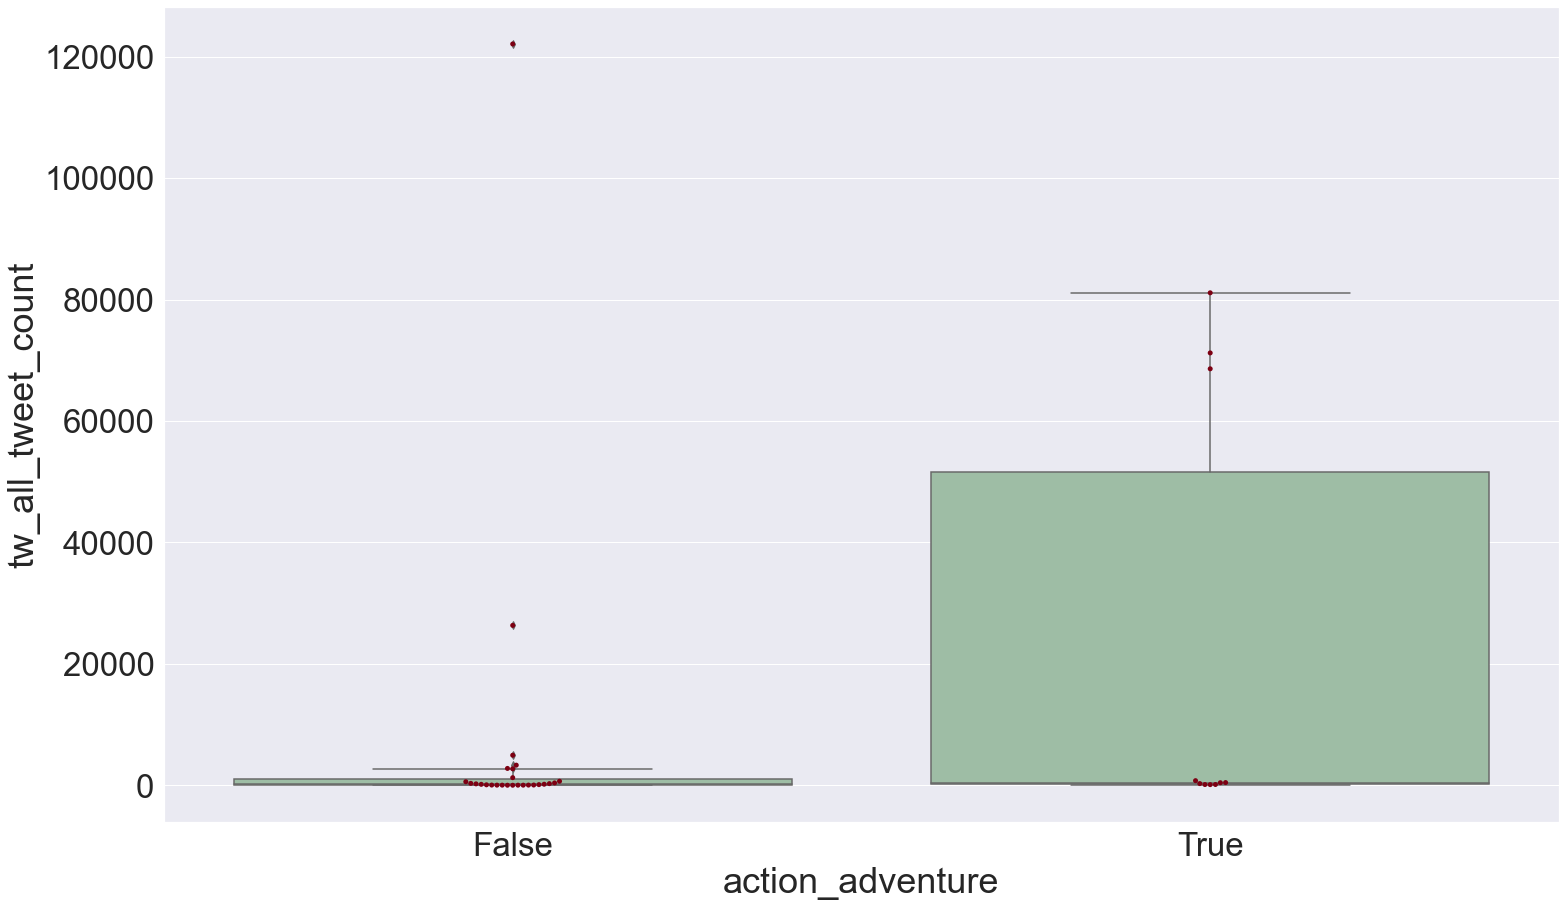

In [130]:
sns.set(font_scale=3)
ax = sns.boxplot(x='action_adventure', y='tw_all_tweet_count', data=df, color='#99c2a2')
ax = sns.swarmplot(x="action_adventure", y="tw_all_tweet_count", data=df, color='#7d0013')
plt.show()

In [131]:
res = stat()
res.anova_stat(df=df, res_var='tw_all_tweet_count', anova_model='tw_all_tweet_count ~ C(action_adventure)')
res.anova_summary

df        sum_sq       mean_sq         F    PR(>F)
C(action_adventure)   1.0  1.828446e+09  1.828446e+09  2.394065  0.131055
Residual             34.0  2.596721e+10  7.637413e+08       NaN       NaN

In [132]:
df.groupby('action_adventure').describe().tw_all_quote_count

count         mean          std  min  25%   50%      75%  \
action_adventure                                                             
False              26.0   340.038462   986.607135  0.0  2.0  13.0    92.25   
True               10.0  2067.500000  3765.781083  1.0  7.5  34.5  3012.75   

                      max  
action_adventure           
False              3768.0  
True              11235.0

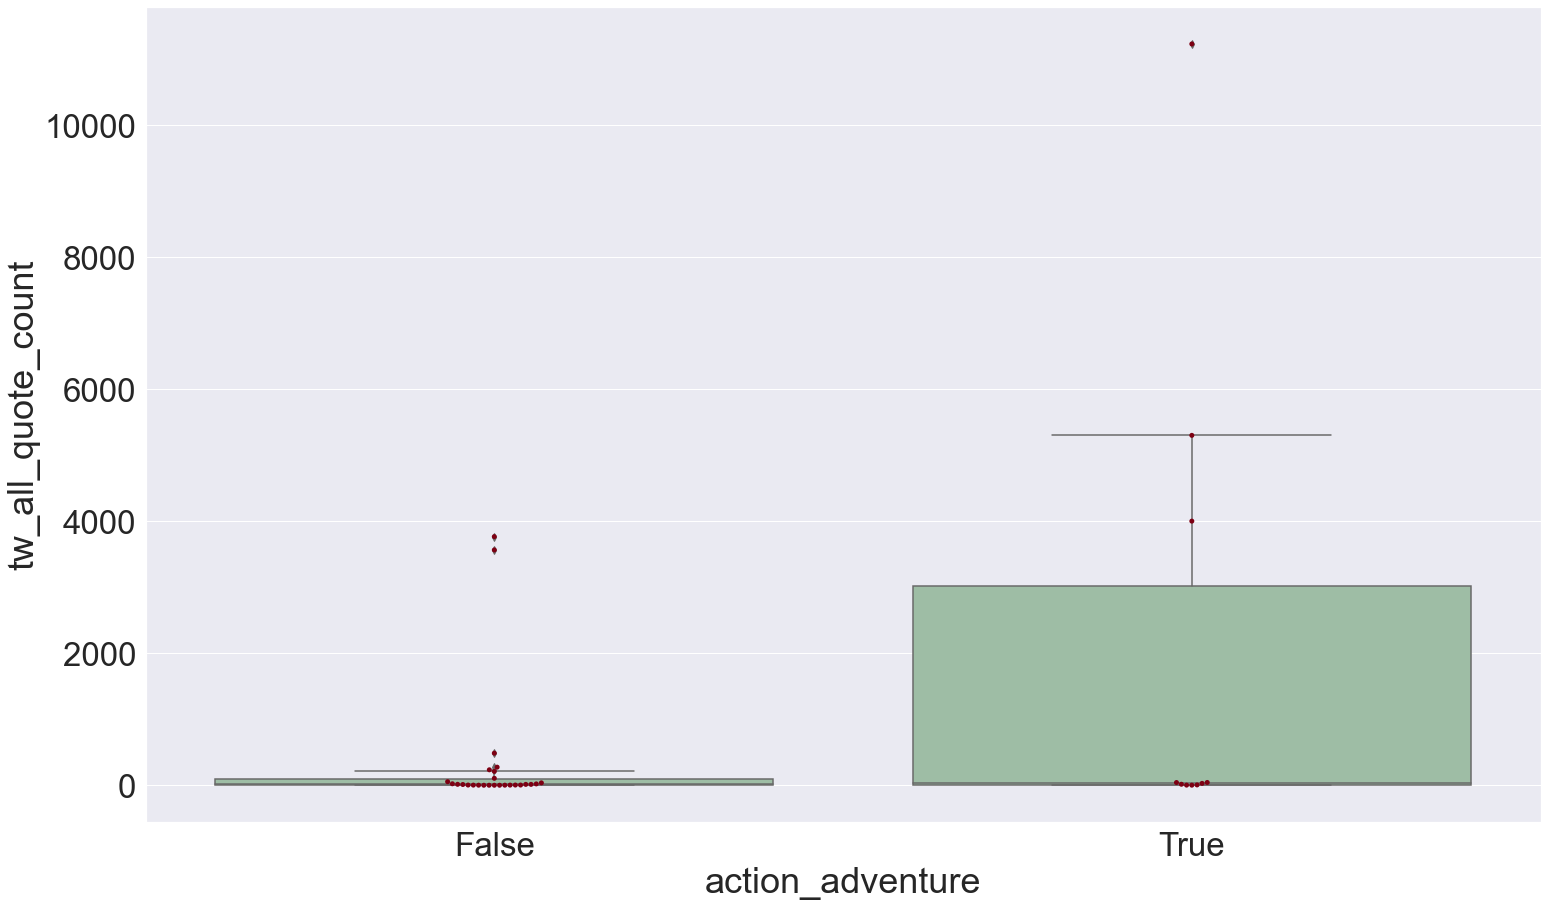

In [133]:
sns.set(font_scale=3)
ax = sns.boxplot(x='action_adventure', y='tw_all_quote_count', data=df, color='#99c2a2')
ax = sns.swarmplot(x="action_adventure", y="tw_all_quote_count", data=df, color='#7d0013')
plt.show()

In [134]:
res = stat()
res.anova_stat(df=df, res_var='tw_all_quote_count', anova_model='tw_all_quote_count ~ C(action_adventure)')
res.anova_summary

df        sum_sq       mean_sq         F   PR(>F)
C(action_adventure)   1.0  2.155200e+07  2.155200e+07  4.821959  0.03502
Residual             34.0  1.519648e+08  4.469553e+06       NaN      NaN

In [135]:
df.groupby('action_adventure').describe().tw_all_reply_count

count         mean           std  min    25%   50%     75%  \
action_adventure                                                               
False              26.0   823.076923   2357.125604  0.0   6.75  29.0   234.5   
True               10.0  6437.100000  10986.307058  7.0  19.25  67.5  9680.5   

                      max  
action_adventure           
False             10554.0  
True              29220.0

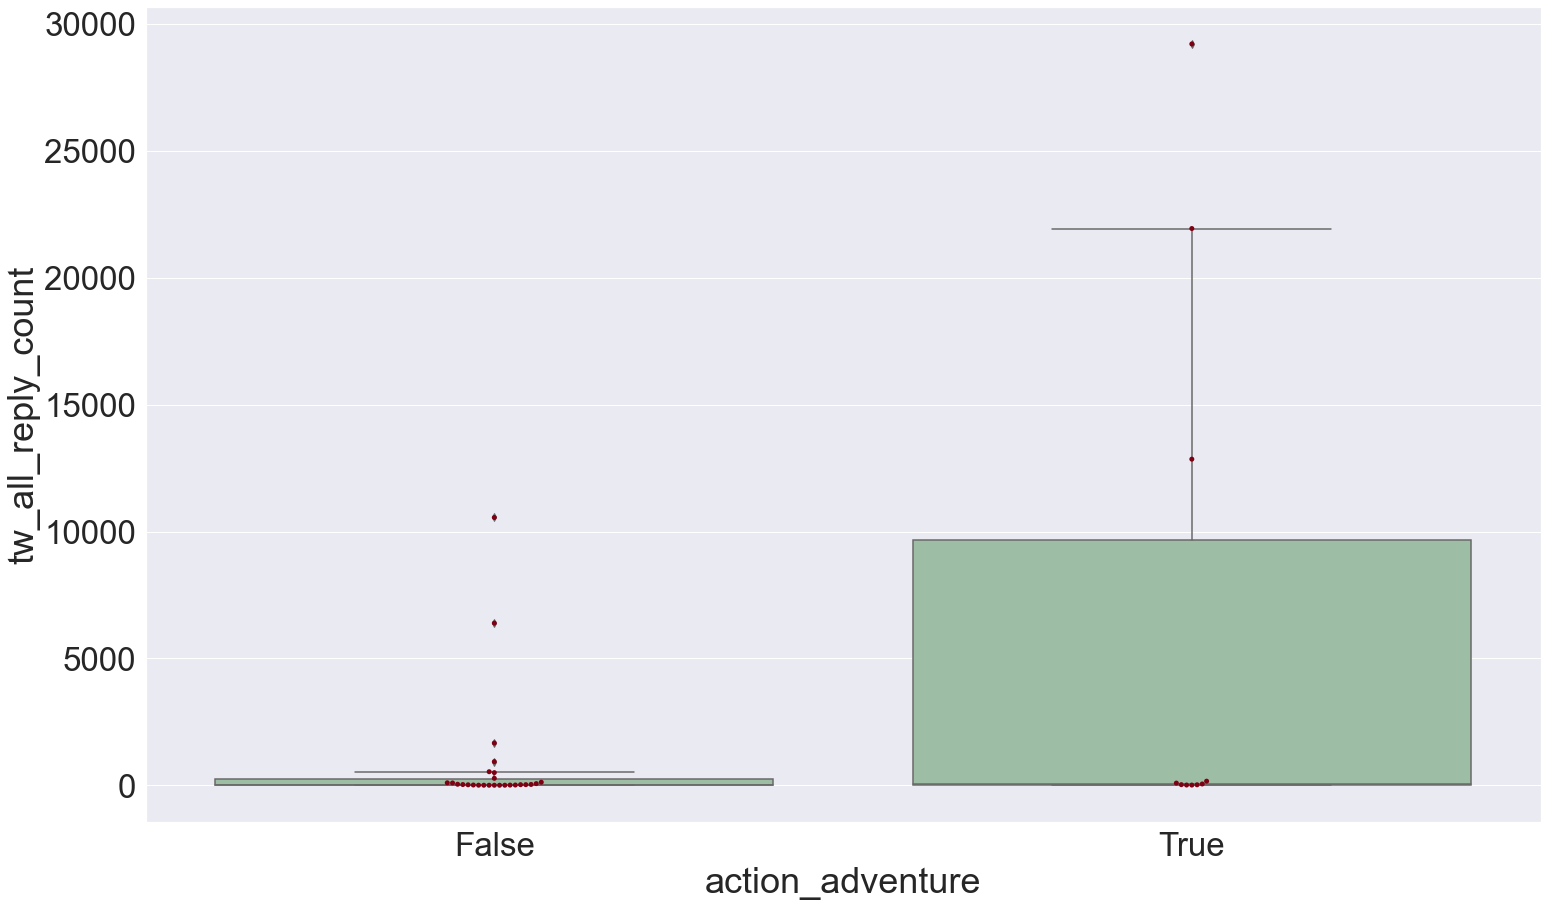

In [136]:
sns.set(font_scale=3)
ax = sns.boxplot(x='action_adventure', y='tw_all_reply_count', data=df, color='#99c2a2')
ax = sns.swarmplot(x="action_adventure", y="tw_all_reply_count", data=df, color='#7d0013')
plt.show()

In [137]:
res = stat()
res.anova_stat(df=df, res_var='tw_all_reply_count', anova_model='tw_all_reply_count ~ C(action_adventure)')
res.anova_summary

df        sum_sq       mean_sq         F    PR(>F)
C(action_adventure)   1.0  2.276246e+08  2.276246e+08  6.316757  0.016864
Residual             34.0  1.225192e+09  3.603504e+07       NaN       NaN

In [138]:
df.groupby('action_adventure').describe().tw_all_retweet_count

count          mean           std    min     25%     50%  \
action_adventure                                                             
False              26.0  1.518833e+05  4.925957e+05    0.0   45.75   453.5   
True               10.0  5.291173e+06  9.287648e+06  249.0  763.00  7235.5   

                        75%         max  
action_adventure                         
False               15608.0   2444757.0  
True              6024124.5  22628590.0

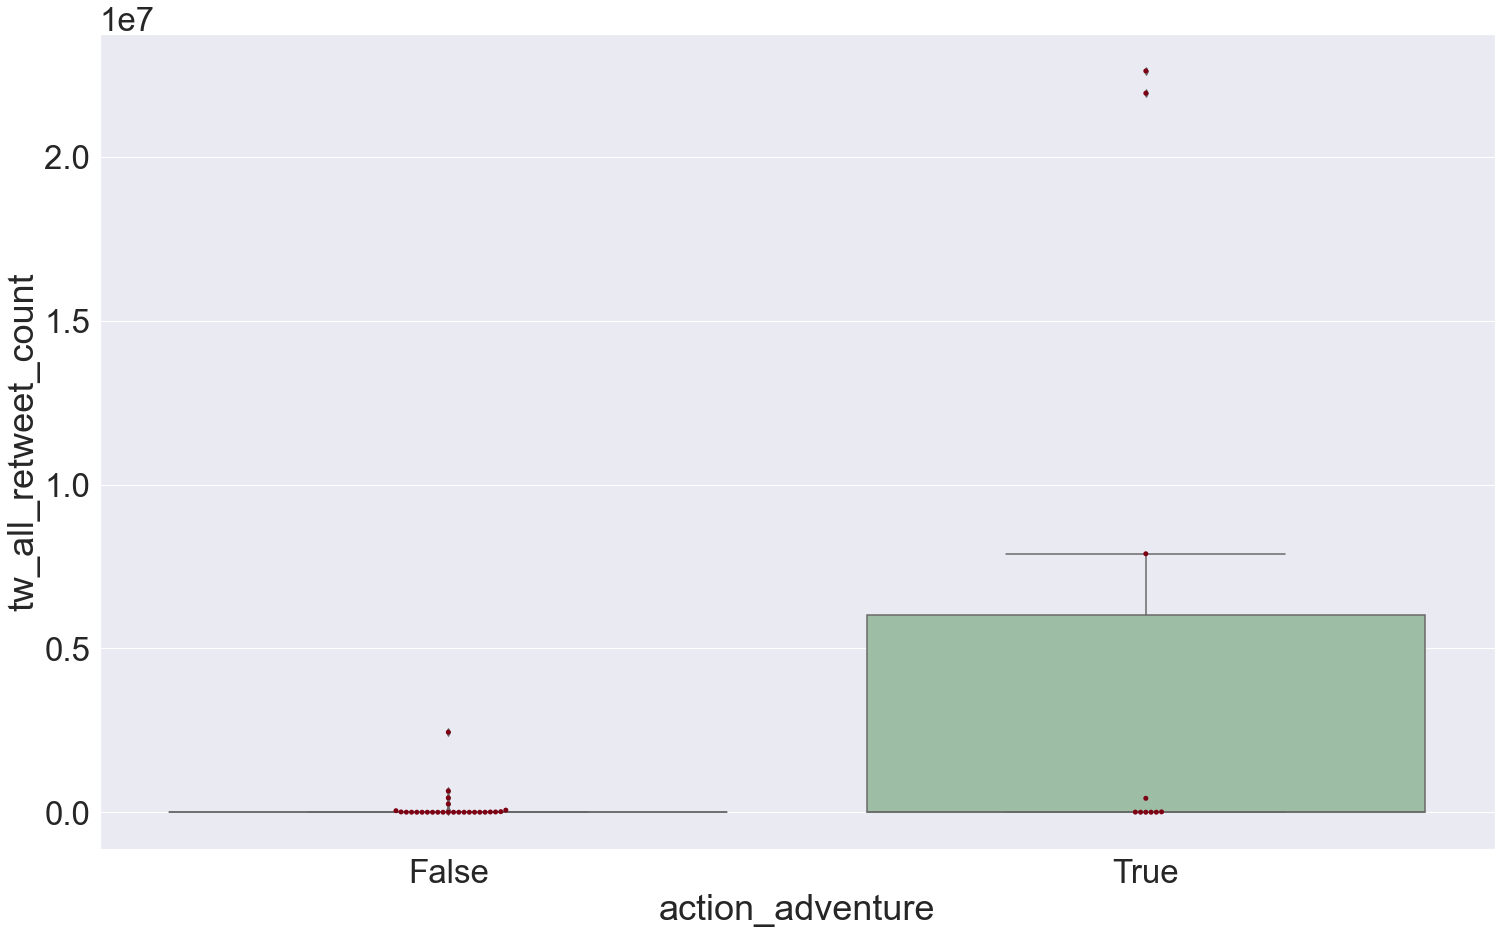

In [139]:
sns.set(font_scale=3)
ax = sns.boxplot(x='action_adventure', y='tw_all_retweet_count', data=df, color='#99c2a2')
ax = sns.swarmplot(x="action_adventure", y="tw_all_retweet_count", data=df, color='#7d0013')
plt.show()

In [140]:
res = stat()
res.anova_stat(df=df, res_var='tw_all_retweet_count', anova_model='tw_all_retweet_count ~ C(action_adventure)')
res.anova_summary

df        sum_sq       mean_sq         F    PR(>F)
C(action_adventure)   1.0  1.907555e+14  1.907555e+14  8.289371  0.006851
Residual             34.0  7.824098e+14  2.301205e+13       NaN       NaN

In [141]:
df.groupby('action_adventure').describe().tw_all_like_count

count          mean            std   min    25%    50%  \
action_adventure                                                           
False              26.0  12895.769231   36721.362788   0.0   44.0  316.5   
True               10.0  79833.800000  144217.827259  68.0  462.0  881.0   

                      75%       max  
action_adventure                     
False              3496.5  150274.0  
True              98268.5  416208.0

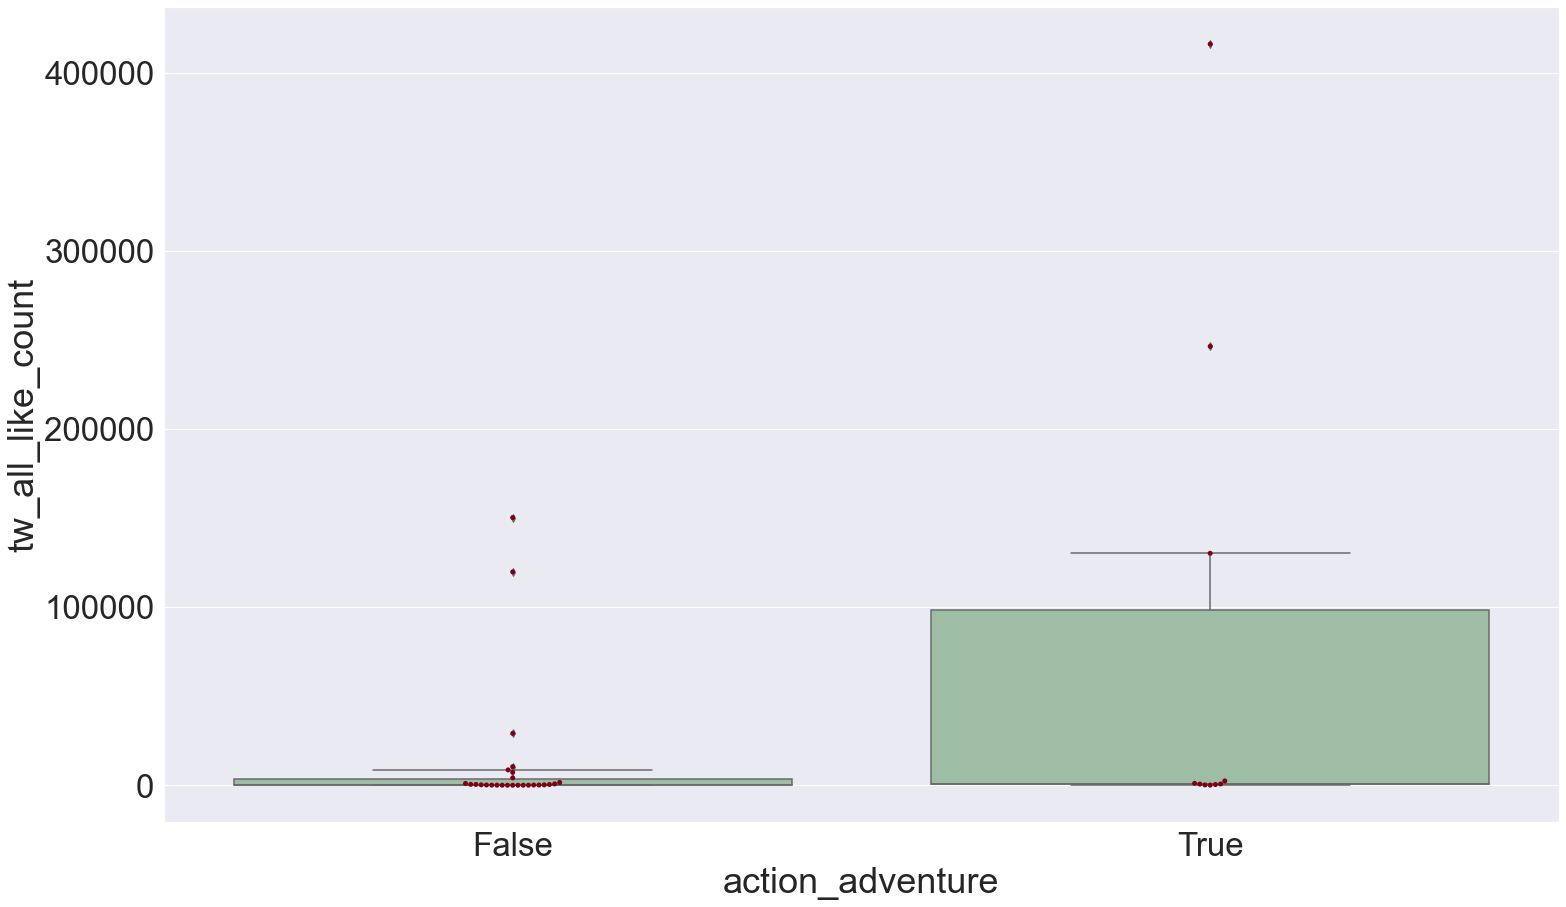

In [142]:
sns.set(font_scale=3)
ax = sns.boxplot(x='action_adventure', y='tw_all_like_count', data=df, color='#99c2a2')
ax = sns.swarmplot(x="action_adventure", y="tw_all_like_count", data=df, color='#7d0013')
plt.show()

In [143]:
res = stat()
res.anova_stat(df=df, res_var='tw_all_like_count', anova_model='tw_all_like_count ~ C(action_adventure)')
res.anova_summary

df        sum_sq       mean_sq         F    PR(>F)
C(action_adventure)   1.0  3.236061e+10  3.236061e+10  4.980798  0.032328
Residual             34.0  2.209005e+11  6.497073e+09       NaN       NaN

In [144]:
df.groupby('action_adventure').describe().tw_all_sentiment_mean

count      mean       std       min       25%       50%  \
action_adventure                                                            
False              26.0  0.413172  0.223439 -0.113636  0.327788  0.392780   
True               10.0  0.345892  0.204073 -0.025361  0.264300  0.358343   

                       75%       max  
action_adventure                      
False             0.567460  0.769231  
True              0.450066  0.726496

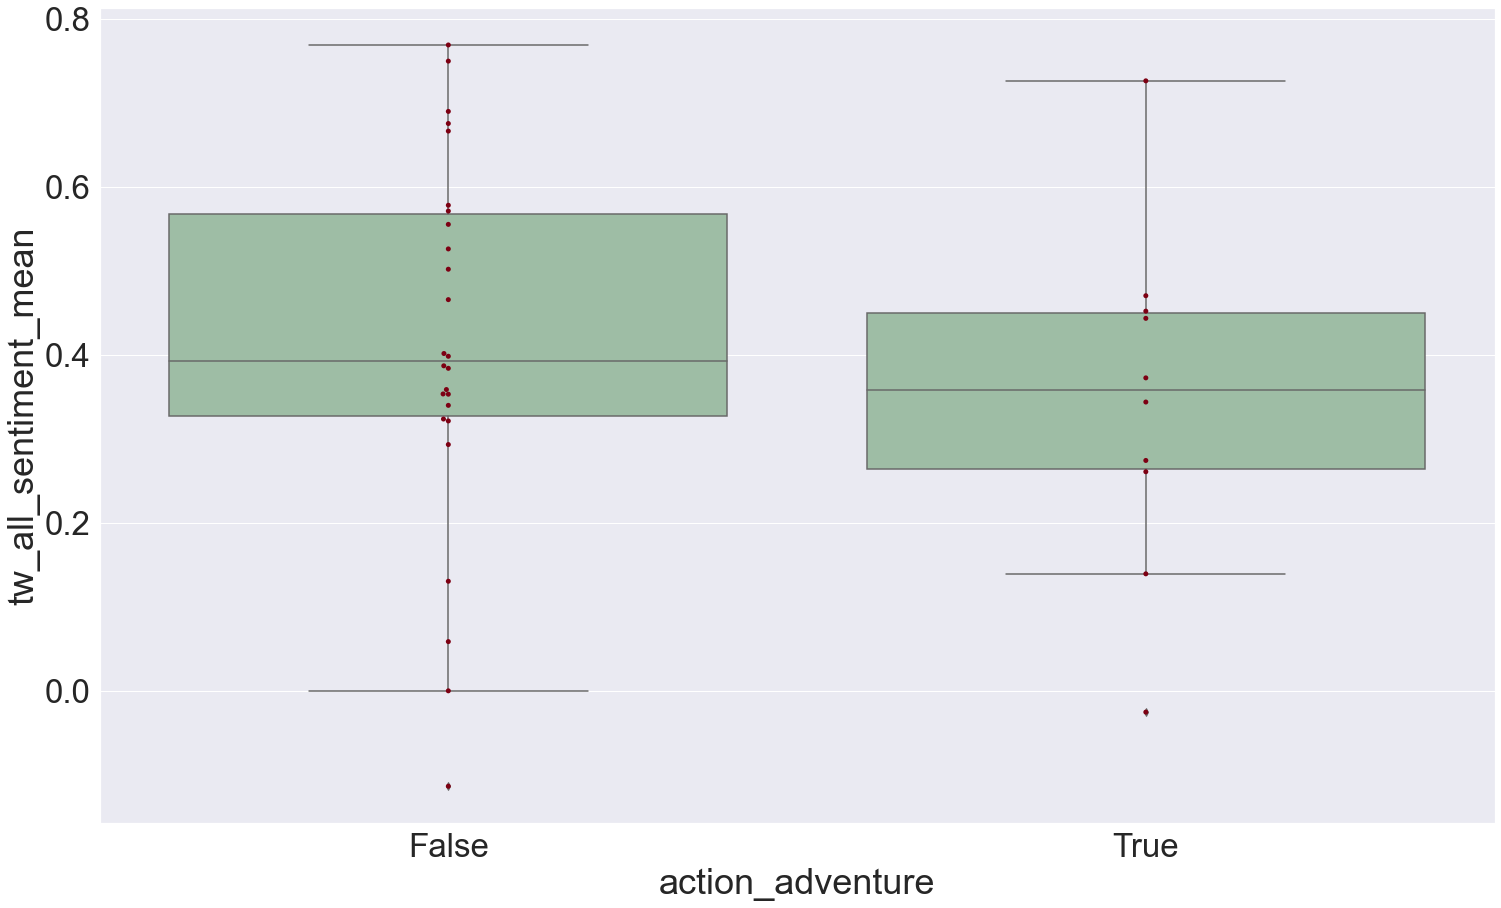

In [145]:
sns.set(font_scale=3)
ax = sns.boxplot(x='action_adventure', y='tw_all_sentiment_mean', data=df, color='#99c2a2')
ax = sns.swarmplot(x="action_adventure", y="tw_all_sentiment_mean", data=df, color='#7d0013')
plt.show()

In [146]:
res = stat()
res.anova_stat(df=df, res_var='tw_all_sentiment_mean', anova_model='tw_all_sentiment_mean ~ C(action_adventure)')
res.anova_summary

df    sum_sq   mean_sq         F    PR(>F)
C(action_adventure)   1.0  0.032692  0.032692  0.684896  0.413677
Residual             34.0  1.622936  0.047733       NaN       NaN

## Countries

In [147]:
df_movie_countries = pd.read_sql_query("""
    SELECT countries.*, movies.* FROM countries
    LEFT JOIN movie_countries ON countries.country_id = movie_countries.country_id
    LEFT JOIN movies ON movie_countries.movie_id = movies.id
""", conn)

In [148]:
df_movie_countries = df_movie_countries.join(df_tweets_per_movie.describe().status_id['count'], on="id")
df_movie_countries.rename(columns={"count": "tw_all_tweet_count"}, inplace = True)
df_movie_countries = df_movie_countries.join(df_tweets_per_movie['quote_count'].sum(), on="id")
df_movie_countries.rename(columns={"quote_count": "tw_all_quote_count"}, inplace = True)
df_movie_countries = df_movie_countries.join(df_tweets_per_movie.describe().quote_count['mean'], on="id")
df_movie_countries.rename(columns={"mean": "tw_all_quote_mean"}, inplace = True)
df_movie_countries = df_movie_countries.join(df_tweets_per_movie['reply_count'].sum(), on="id")
df_movie_countries.rename(columns={"reply_count": "tw_all_reply_count"}, inplace = True)
df_movie_countries = df_movie_countries.join(df_tweets_per_movie.describe().reply_count['mean'], on="id")
df_movie_countries.rename(columns={"mean": "tw_all_reply_mean"}, inplace = True)
df_movie_countries = df_movie_countries.join(df_tweets_per_movie['retweet_count'].sum(), on="id")
df_movie_countries.rename(columns={"retweet_count": "tw_all_retweet_count"}, inplace = True)
df_movie_countries = df_movie_countries.join(df_tweets_per_movie.describe().retweet_count['mean'], on="id")
df_movie_countries.rename(columns={"mean": "tw_all_retweet_mean"}, inplace = True)
df_movie_countries = df_movie_countries.join(df_tweets_per_movie['like_count'].sum(), on="id")
df_movie_countries.rename(columns={"like_count": "tw_all_like_count"}, inplace = True)
df_movie_countries = df_movie_countries.join(df_tweets_per_movie.describe().like_count['mean'], on="id")
df_movie_countries.rename(columns={"mean": "tw_all_like_mean"}, inplace = True)
df_movie_countries = df_movie_countries.join(df_tweets_per_movie.describe().sentiment['mean'], on="id")
df_movie_countries.rename(columns={"mean": "tw_all_sentiment_mean"}, inplace = True)

In [149]:
df_movie_countries

country_id    country_name  id                           name  \
0            1       Australia  12                     Blacklight   
1            2         Belgium   7                         Lingui   
2            3          Canada   2                       Moonfall   
3            3          Canada   3          The Wolf and the Lion   
4            3          Canada  16                      Supercool   
5            3          Canada  18                    Cosmic Dawn   
6            3          Canada  31                         Cyrano   
7            4            Chad   7                         Lingui   
8            5           China   2                       Moonfall   
9            5           China   4             Only Fools Rush In   
10           5           China  12                     Blacklight   
11           5           China  14              Water Gate Bridge   
12           5           China  26               Too Cool to Kill   
13           6         Denmark   5  The Worst Person in the World   
14           7         Finland  16                      Supercool   
15           8          France   3          The Wolf and the Lion   
16           8          France   5  The Worst Person in the World   
17           8          France   7                         Lingui   
18           9         Germany   7                         Lingui   
19           9         Germany  15      Fabian: Going to the Dogs   
20          10          Israel   6                 Breaking Bread   
21          11           Japan  10                       Marry Me   
22          12          Norway   5  The Worst Person in the World   
23          12          Norway  33                The Burning Sea   
24          13           Spain  20                      Uncharted   
25          14          Sweden   5  The Worst Person in the World   
26          15  United Kingdom   2                       Moonfall   
27          15  United Kingdom  11              Death on the Nile   
28          15  United Kingdom  17                       Ronnie's   
29          15  United Kingdom  23                      A Banquet   
30          15  United Kingdom  31                         Cyrano   
31          16   United States   1                Jackass Forever   
32          16   United States   2                       Moonfall   
33          16   United States   6                 Breaking Bread   
34          16   United States   8                 The Long Night   
35          16   United States   9                 Last Survivors   
36          16   United States  10                       Marry Me   
37          16   United States  11              Death on the Nile   
38          16   United States  12                     Blacklight   
39          16   United States  13             Catch the Fair One   
40          16   United States  16                      Supercool   
41          16   United States  19                   Give or Take   
42          16   United States  20                      Uncharted   
43          16   United States  21                            Dog   
44          16   United States  22                     The Cursed   
45          16   United States  24                          Ted K   
46          16   United States  25             Strawberry Mansion   
47          16   United States  27                    The Automat   
48          16   United States  28                 Finding Carlos   
49          16   United States  29         A Fairy Tale After All   
50          16   United States  30                     Studio 666   
51          16   United States  31                         Cyrano   
52          16   United States  32                         Butter   
53          16   United States  34                   Let Me Be Me   
54          16   United States  35             The Desperate Hour   
55          16   United States  36                     Moon Manor   

                     hashtag                                  countrie

In [150]:
df_movie_countries.groupby('country_name').describe().opening_grosses

count          mean           std         min          25%  \
country_name                                                                 
Australia         1.0  3.502475e+06           NaN   3502475.0   3502475.00   
Belgium           1.0  2.914000e+03           NaN      2914.0      2914.00   
Canada            3.0  3.965612e+06  5.126003e+06    641845.0   1013920.00   
Chad              1.0  2.914000e+03           NaN      2914.0      2914.00   
China             5.0  2.706149e+06  4.273676e+06     42707.0     44134.00   
Denmark           1.0  1.384240e+05           NaN    138424.0    138424.00   
Finland           0.0           NaN           NaN         NaN          NaN   
France            3.0  2.610610e+05  3.366572e+05      2914.0     70669.00   
Germany           2.0  2.688000e+03  3.196123e+02      2462.0      2575.00   
Israel            1.0  5.026000e+03           NaN      5026.0      5026.00   
Japan             1.0  7.949980e+06           NaN   7949980.0   7949980.00   
Norway            2.0  6.939750e+04  9.761821e+04       371.0     34884.25   
Spain             1.0  4.401016e+07           NaN  44010155.0  44010155.00   
Sweden            1.0  1.384240e+05           NaN    138424.0    138424.00   
United Kingdom    4.0  6.037189e+06  6.316870e+06      2641.0   1040156.50   
United States    16.0  7.569966e+06  1.190010e+07      5026.0     30715.75   

                       50%          75%         max  
country_name                                         
Australia        3502475.0   3502475.00   3502475.0  
Belgium             2914.0      2914.00      2914.0  
Canada           1385995.0   5627496.00   9868997.0  
Chad                2914.0      2914.00      2914.0  
China              72432.0   3502475.00   9868997.0  
Denmark           138424.0    138424.00    138424.0  
Finland                NaN          NaN         NaN  
France            138424.0    390134.50    641845.0  
Germany             2688.0      2801.00      2914.0  
Israel              5026.0      5026.00      5026.0  
Japan            7949980.0   7949980.00   7949980.0  
Norway             69397.5    103910.75    138424.0  
Spain           44010155.0  44010155.00  44010155.0  
Sweden            138424.0    138424.00    138424.0  
United Kingdom   5627496.0  10624528.50  12891123.0  
United States    1658342.5  10624528.50  44010155.0

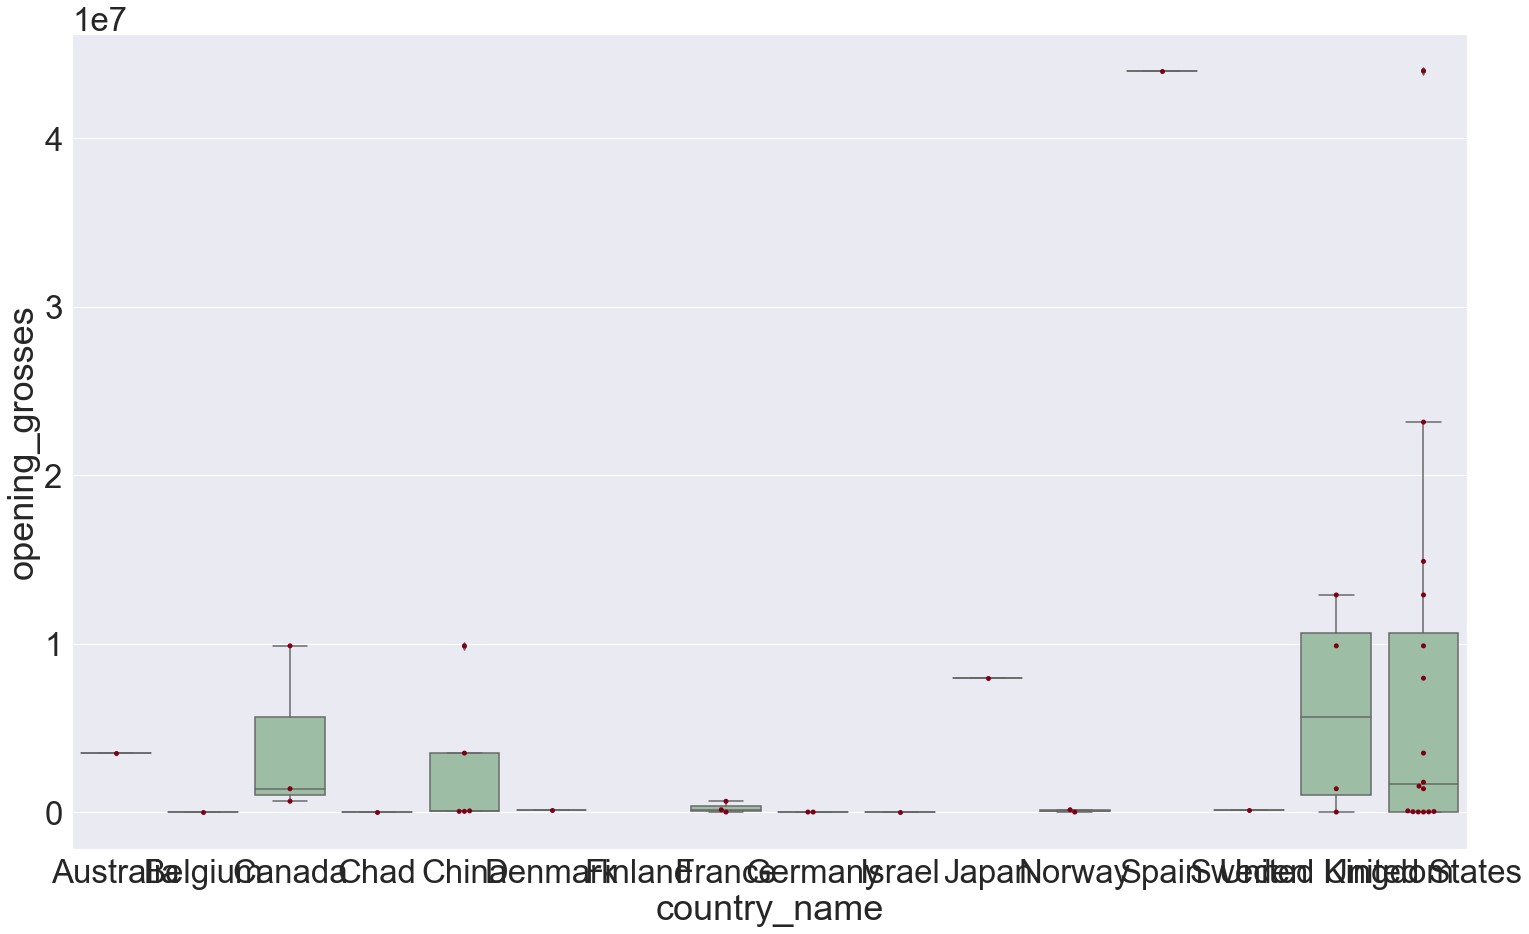

In [151]:
cax = sns.boxplot(x='country_name', y='opening_grosses', data=df_movie_countries, color='#99c2a2')
ax = sns.swarmplot(x="country_name", y="opening_grosses", data=df_movie_countries, color='#7d0013')
plt.show()

In [152]:
res = stat()
res.anova_stat(df=df_movie_countries, res_var='opening_grosses', anova_model='opening_grosses ~ C(country_name)')
res.anova_summary

/Users/victormyeste/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 15, but rank is 14
  warnings.warn('covariance of constraints does not have full '


df        sum_sq       mean_sq        F    PR(>F)
C(country_name)  15.0  2.096546e+15  1.397697e+14  1.65147  0.125664
Residual         28.0  2.369738e+15  8.463351e+13      NaN       NaN

In [153]:
df_movie_countries.groupby('country_name').describe().opening_theaters

count         mean          std     min     25%     50%  \
country_name                                                              
Australia         1.0  2772.000000          NaN  2772.0  2772.0  2772.0   
Belgium           1.0     1.000000          NaN     1.0     1.0     1.0   
Canada            3.0  1749.333333  1473.032360   797.0   901.0  1005.0   
Chad              1.0     1.000000          NaN     1.0     1.0     1.0   
China             5.0  1260.200000  1704.470358    20.0    24.0    39.0   
Denmark           1.0     4.000000          NaN     4.0     4.0     4.0   
Finland           0.0          NaN          NaN     NaN     NaN     NaN   
France            3.0   336.666667   578.795589     1.0     2.5     4.0   
Germany           2.0     1.000000     0.000000     1.0     1.0     1.0   
Israel            1.0     2.000000          NaN     2.0     2.0     2.0   
Japan             1.0  3642.000000          NaN  3642.0  3642.0  3642.0   
Norway            2.0     4.000000     0.000000     4.0     4.0     4.0   
Spain             1.0  4275.000000          NaN  4275.0  4275.0  4275.0   
Sweden            1.0     4.000000          NaN     4.0     4.0     4.0   
United Kingdom    4.0  1889.000000  1731.697626    33.0   606.0  2038.5   
United States    16.0  1867.625000  1662.407085     1.0    29.5  1996.5   

                   75%     max  
country_name                    
Australia       2772.0  2772.0  
Belgium            1.0     1.0  
Canada          2225.5  3446.0  
Chad               1.0     1.0  
China           2772.0  3446.0  
Denmark            4.0     4.0  
Finland            NaN     NaN  
France           504.5  1005.0  
Germany            1.0     1.0  
Israel             2.0     2.0  
Japan           3642.0  3642.0  
Norway             4.0     4.0  
Spain           4275.0  4275.0  
Sweden             4.0     4.0  
United Kingdom  3321.5  3446.0  
United States   3485.5  4275.0

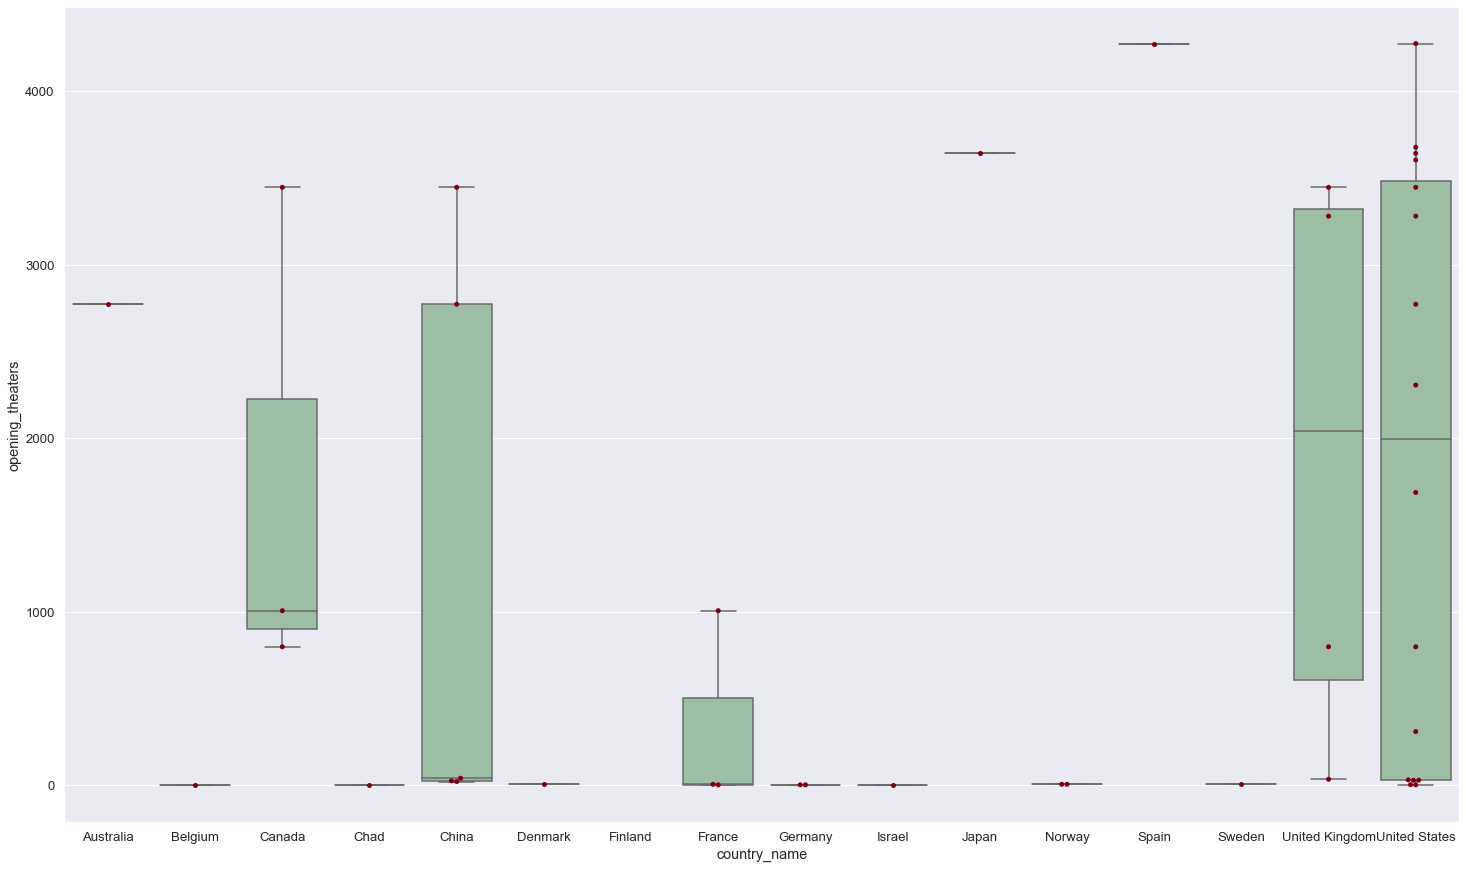

In [154]:
sns.set(font_scale=1.2)
ax = sns.boxplot(x='country_name', y='opening_theaters', data=df_movie_countries, color='#99c2a2')
ax = sns.swarmplot(x="country_name", y="opening_theaters", data=df_movie_countries, color='#7d0013')
plt.show()

In [155]:
res = stat()
res.anova_stat(df=df_movie_countries, res_var='opening_theaters', anova_model='opening_theaters ~ C(country_name)')
res.anova_summary

/Users/victormyeste/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 15, but rank is 14
  warnings.warn('covariance of constraints does not have full '


df        sum_sq       mean_sq        F    PR(>F)
C(country_name)  15.0  4.399088e+07  2.932725e+06  1.22414  0.312851
Residual         28.0  6.708082e+07  2.395744e+06      NaN       NaN

In [156]:
df_movie_countries.groupby('country_name').describe().rating_avg

count      mean       std  min   25%  50%   75%  max
country_name                                                        
Australia         1.0  4.700000       NaN  4.7  4.70  4.7  4.70  4.7
Belgium           1.0  6.700000       NaN  6.7  6.70  6.7  6.70  6.7
Canada            5.0  5.300000  0.880341  4.0  5.10  5.2  5.90  6.3
Chad              1.0  6.700000       NaN  6.7  6.70  6.7  6.70  6.7
China             5.0  5.380000  0.516720  4.7  5.20  5.3  5.60  6.1
Denmark           1.0  7.900000       NaN  7.9  7.90  7.9  7.90  7.9
Finland           1.0  5.100000       NaN  5.1  5.10  5.1  5.10  5.1
France            3.0  6.833333  1.006645  5.9  6.30  6.7  7.30  7.9
Germany           2.0  7.000000  0.424264  6.7  6.85  7.0  7.15  7.3
Israel            1.0  7.800000       NaN  7.8  7.80  7.8  7.80  7.8
Japan             1.0  6.100000       NaN  6.1  6.10  6.1  6.10  6.1
Norway            2.0  7.100000  1.131371  6.3  6.70  7.1  7.50  7.9
Spain             1.0  6.400000       NaN  6.4  6.40  6.4  6.40  6.4
Sweden            1.0  7.900000       NaN  7.9  7.90  7.9  7.90  7.9
United Kingdom    5.0  6.120000  1.243785  4.8  5.20  6.3  6.30  8.0
United States    25.0  6.120000  1.216210  3.5  5.20  6.3  7.00  8.4

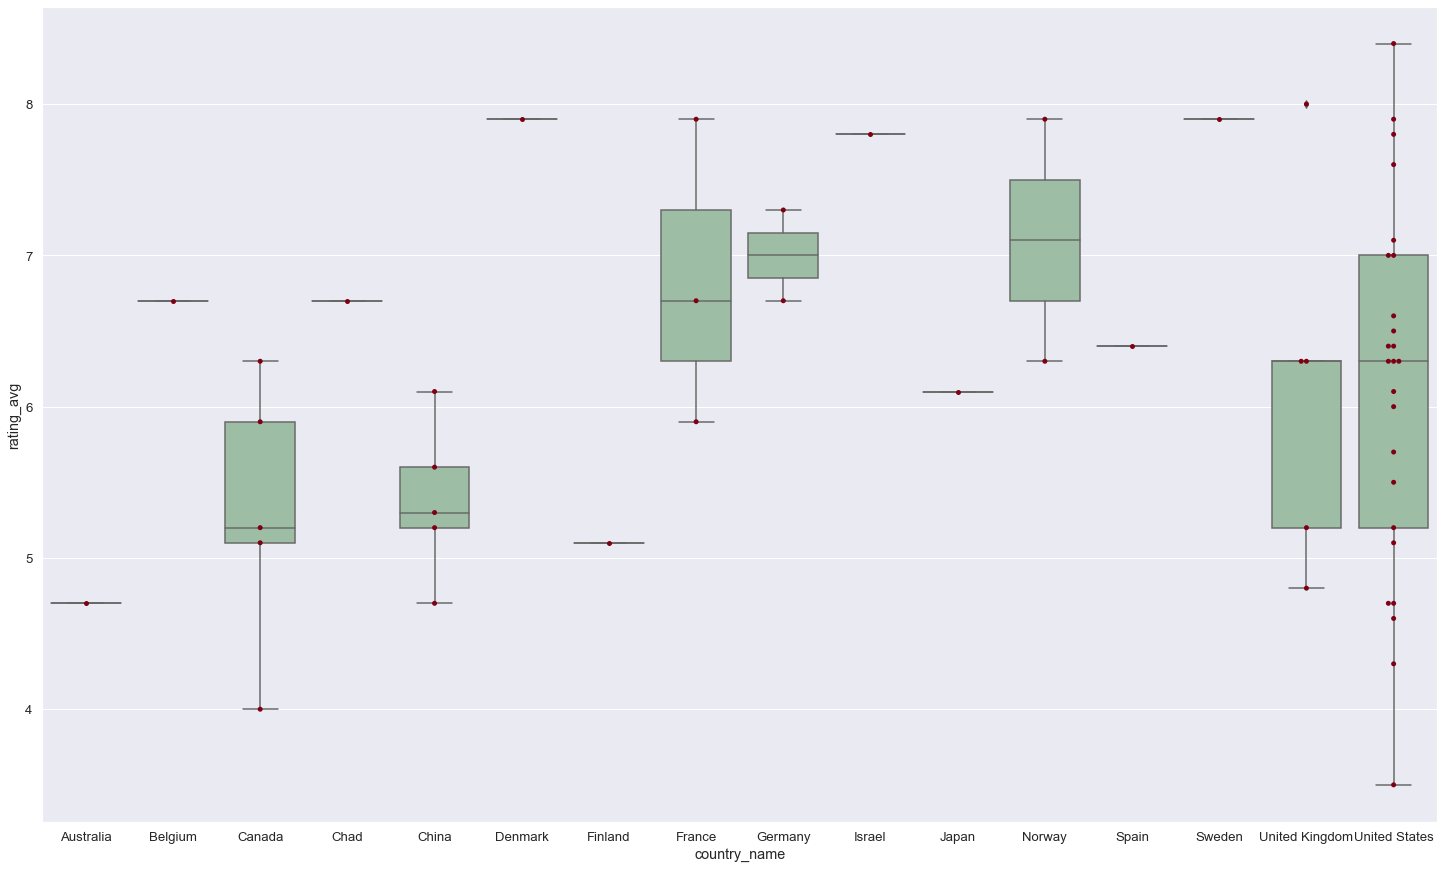

In [157]:
sns.set(font_scale=1.2)
ax = sns.boxplot(x='country_name', y='rating_avg', data=df_movie_countries, color='#99c2a2')
ax = sns.swarmplot(x="country_name", y="rating_avg", data=df_movie_countries, color='#7d0013')
plt.show()

In [158]:
res = stat()
res.anova_stat(df=df_movie_countries, res_var='rating_avg', anova_model='rating_avg ~ C(country_name)')
res.anova_summary

df     sum_sq   mean_sq         F    PR(>F)
C(country_name)  15.0  23.970905  1.598060  1.295479  0.249833
Residual         40.0  49.342667  1.233567       NaN       NaN

In [159]:
df_movie_countries.groupby('country_name').describe().tw_all_tweet_count

count           mean           std       min       25%  \
country_name                                                             
Australia         1.0     753.000000           NaN     753.0     753.0   
Belgium           1.0      31.000000           NaN      31.0      31.0   
Canada            5.0   14943.400000  31474.841259     150.0     167.0   
Chad              1.0      31.000000           NaN      31.0      31.0   
China             5.0   14525.800000  31690.232781     100.0     122.0   
Denmark           1.0    3310.000000           NaN    3310.0    3310.0   
Finland           1.0     417.000000           NaN     417.0     417.0   
France            3.0    1163.666667   1859.731253      31.0      90.5   
Germany           2.0      25.000000      8.485281      19.0      22.0   
Israel            1.0      72.000000           NaN      72.0      72.0   
Japan             1.0  122103.000000           NaN  122103.0  122103.0   
Norway            2.0    1706.000000   2268.398554     102.0     904.0   
Spain             1.0   81114.000000           NaN   81114.0   81114.0   
Sweden            1.0    3310.000000           NaN    3310.0    3310.0   
United Kingdom    5.0   20108.800000  30620.096027       4.0     229.0   
United States    25.0   15398.560000  32960.615570       1.0      72.0   

                     50%       75%       max  
country_name                                  
Australia          753.0     753.0     753.0  
Belgium             31.0      31.0      31.0  
Canada             417.0    2770.0   71213.0  
Chad                31.0      31.0      31.0  
China              441.0     753.0   71213.0  
Denmark           3310.0    3310.0    3310.0  
Finland            417.0     417.0     417.0  
France             150.0    1730.0    3310.0  
Germany             25.0      28.0      31.0  
Israel              72.0      72.0      72.0  
Japan           122103.0  122103.0  122103.0  
Norway            1706.0    2508.0    3310.0  
Spain            81114.0   81114.0   81114.0  
Sweden            3310.0    3310.0    3310.0  
United Kingdom    2770.0   26328.0   71213.0  
United States      417.0    2770.0  122103.0

/Users/victormyeste/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


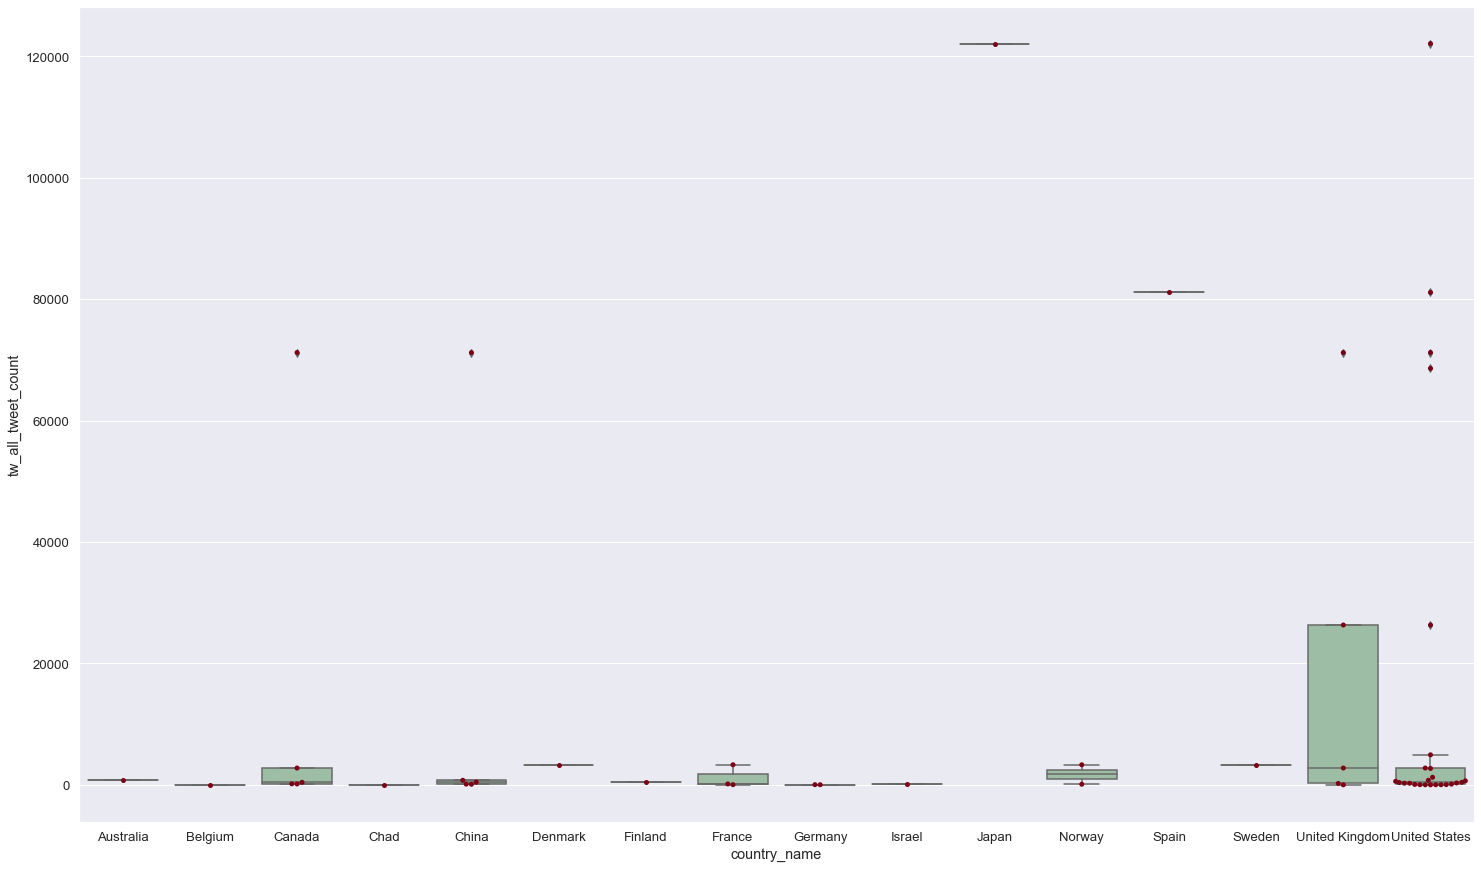

In [160]:
sns.set(font_scale=1.2)
ax = sns.boxplot(x='country_name', y='tw_all_tweet_count', data=df_movie_countries, color='#99c2a2')
ax = sns.swarmplot(x="country_name", y="tw_all_tweet_count", data=df_movie_countries, color='#7d0013')
plt.show()

In [161]:
res = stat()
res.anova_stat(df=df_movie_countries, res_var='tw_all_tweet_count', anova_model='tw_all_tweet_count ~ C(country_name)')
res.anova_summary

df        sum_sq       mean_sq         F    PR(>F)
C(country_name)  15.0  1.871182e+10  1.247455e+09  1.319505  0.236038
Residual         40.0  3.781582e+10  9.453956e+08       NaN       NaN

In [162]:
df_movie_countries.groupby('country_name').describe().tw_all_quote_count

count      mean          std      min       25%      50%  \
country_name                                                               
Australia         1.0     41.00          NaN     41.0     41.00     41.0   
Belgium           1.0      1.00          NaN      1.0      1.00      1.0   
Canada            5.0    868.60  1755.620204     11.0     13.00     42.0   
Chad              1.0      1.00          NaN      1.0      1.00      1.0   
China             5.0    813.40  1783.104820      3.0      5.00     15.0   
Denmark           1.0    210.00          NaN    210.0    210.00    210.0   
Finland           1.0     42.00          NaN     42.0     42.00     42.0   
France            3.0     74.00   117.885538      1.0      6.00     11.0   
Germany           2.0      1.50     0.707107      1.0      1.25      1.5   
Israel            1.0      3.00          NaN      3.0      3.00      3.0   
Japan             1.0   3566.00          NaN   3566.0   3566.00   3566.0   
Norway            2.0    105.50   147.785317      1.0     53.25    105.5   
Spain             1.0  11235.00          NaN  11235.0  11235.00  11235.0   
Sweden            1.0    210.00          NaN    210.0    210.00    210.0   
United Kingdom    5.0   1611.60  2080.312789      0.0     13.00    274.0   
United States    25.0   1169.68  2609.821525      0.0      3.00     36.0   

                     75%      max  
country_name                       
Australia          41.00     41.0  
Belgium             1.00      1.0  
Canada            274.00   4003.0  
Chad                1.00      1.0  
China              41.00   4003.0  
Denmark           210.00    210.0  
Finland            42.00     42.0  
France            110.50    210.0  
Germany             1.75      2.0  
Israel              3.00      3.0  
Japan            3566.00   3566.0  
Norway            157.75    210.0  
Spain           11235.00  11235.0  
Sweden            210.00    210.0  
United Kingdom   3768.00   4003.0  
United States     274.00  11235.0

/Users/victormyeste/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


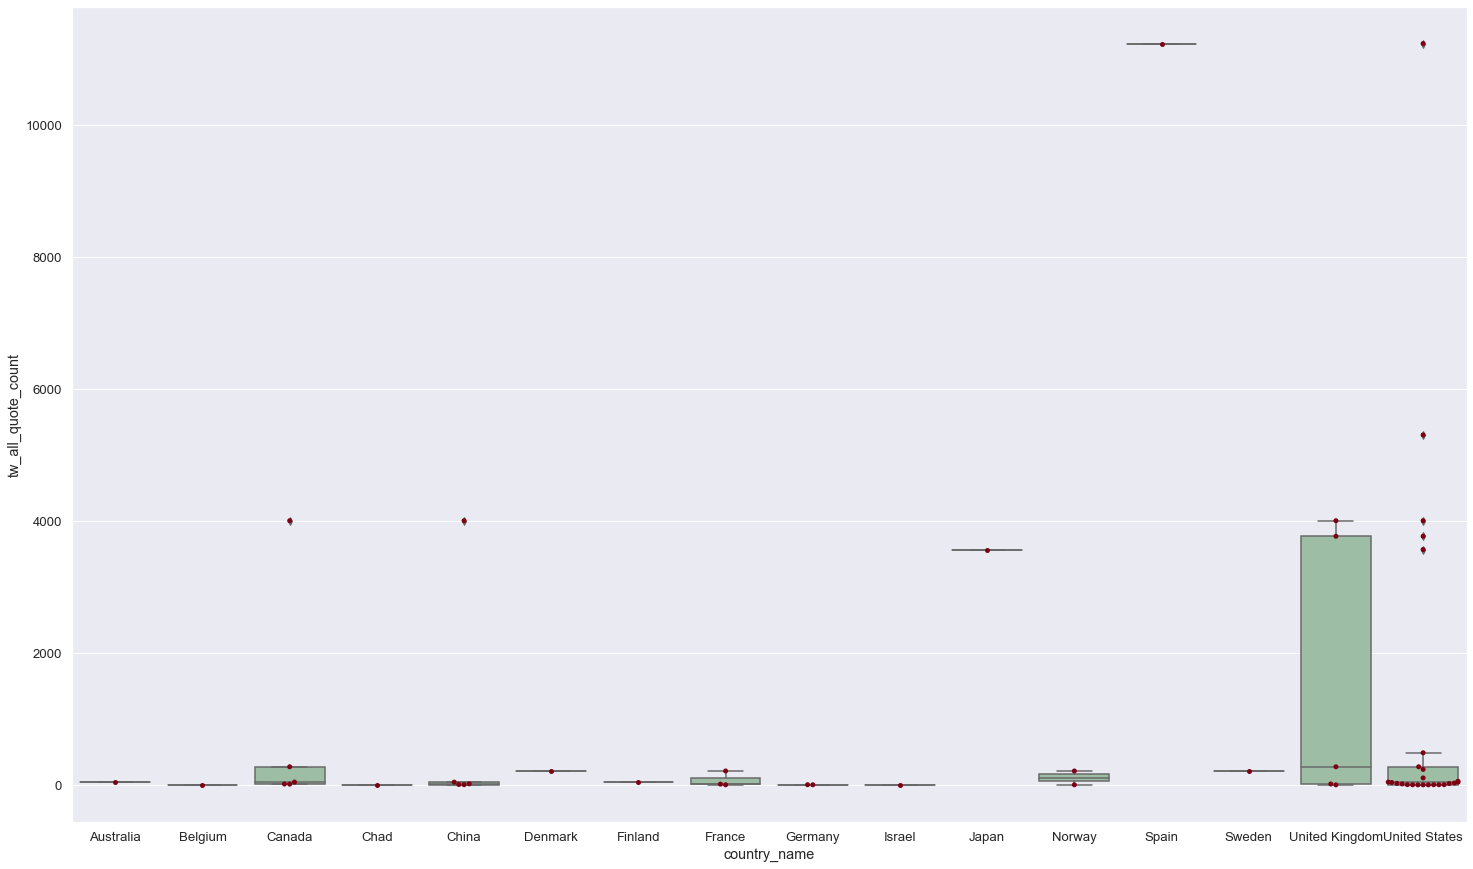

In [163]:
sns.set(font_scale=1.2)
ax = sns.boxplot(x='country_name', y='tw_all_quote_count', data=df_movie_countries, color='#99c2a2')
ax = sns.swarmplot(x="country_name", y="tw_all_quote_count", data=df_movie_countries, color='#7d0013')
plt.show()

In [164]:
res = stat()
res.anova_stat(df=df_movie_countries, res_var='tw_all_quote_count', anova_model='tw_all_quote_count ~ C(country_name)')
res.anova_summary

df        sum_sq       mean_sq         F    PR(>F)
C(country_name)  15.0  1.259010e+08  8.393403e+06  1.630775  0.108558
Residual         40.0  2.058751e+08  5.146879e+06       NaN       NaN

In [165]:
df_movie_countries.groupby('country_name').describe().tw_all_reply_count

count          mean          std      min      25%      50%  \
country_name                                                                  
Australia         1.0    160.000000          NaN    160.0    160.0    160.0   
Belgium           1.0      6.000000          NaN      6.0      6.0      6.0   
Canada            5.0   2784.600000  5642.006407     23.0     31.0     85.0   
Chad              1.0      6.000000          NaN      6.0      6.0      6.0   
China             5.0   2622.800000  5719.686941     23.0     27.0     50.0   
Denmark           1.0    497.000000          NaN    497.0    497.0    497.0   
Finland           1.0     85.000000          NaN     85.0     85.0     85.0   
France            3.0    175.333333   278.701154      6.0     14.5     23.0   
Germany           2.0      3.000000     4.242641      0.0      1.5      3.0   
Israel            1.0      9.000000          NaN      9.0      9.0      9.0   
Japan             1.0  10554.000000          NaN  10554.0  10554.0  10554.0   
Norway            2.0    252.000000   346.482323      7.0    129.5    252.0   
Spain             1.0  21945.000000          NaN  21945.0  21945.0  21945.0   
Sweden            1.0    497.000000          NaN    497.0    497.0    497.0   
United Kingdom    5.0   4038.800000  5598.568897      1.0     18.0    930.0   
United States    25.0   3403.520000  7547.948248      0.0      9.0     90.0   

                    75%      max  
country_name                      
Australia         160.0    160.0  
Belgium             6.0      6.0  
Canada            930.0  12854.0  
Chad                6.0      6.0  
China             160.0  12854.0  
Denmark           497.0    497.0  
Finland            85.0     85.0  
France            260.0    497.0  
Germany             4.5      6.0  
Israel              9.0      9.0  
Japan           10554.0  10554.0  
Norway            374.5    497.0  
Spain           21945.0  21945.0  
Sweden            497.0    497.0  
United Kingdom   6391.0  12854.0  
United States     930.0  29220.0

/Users/victormyeste/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


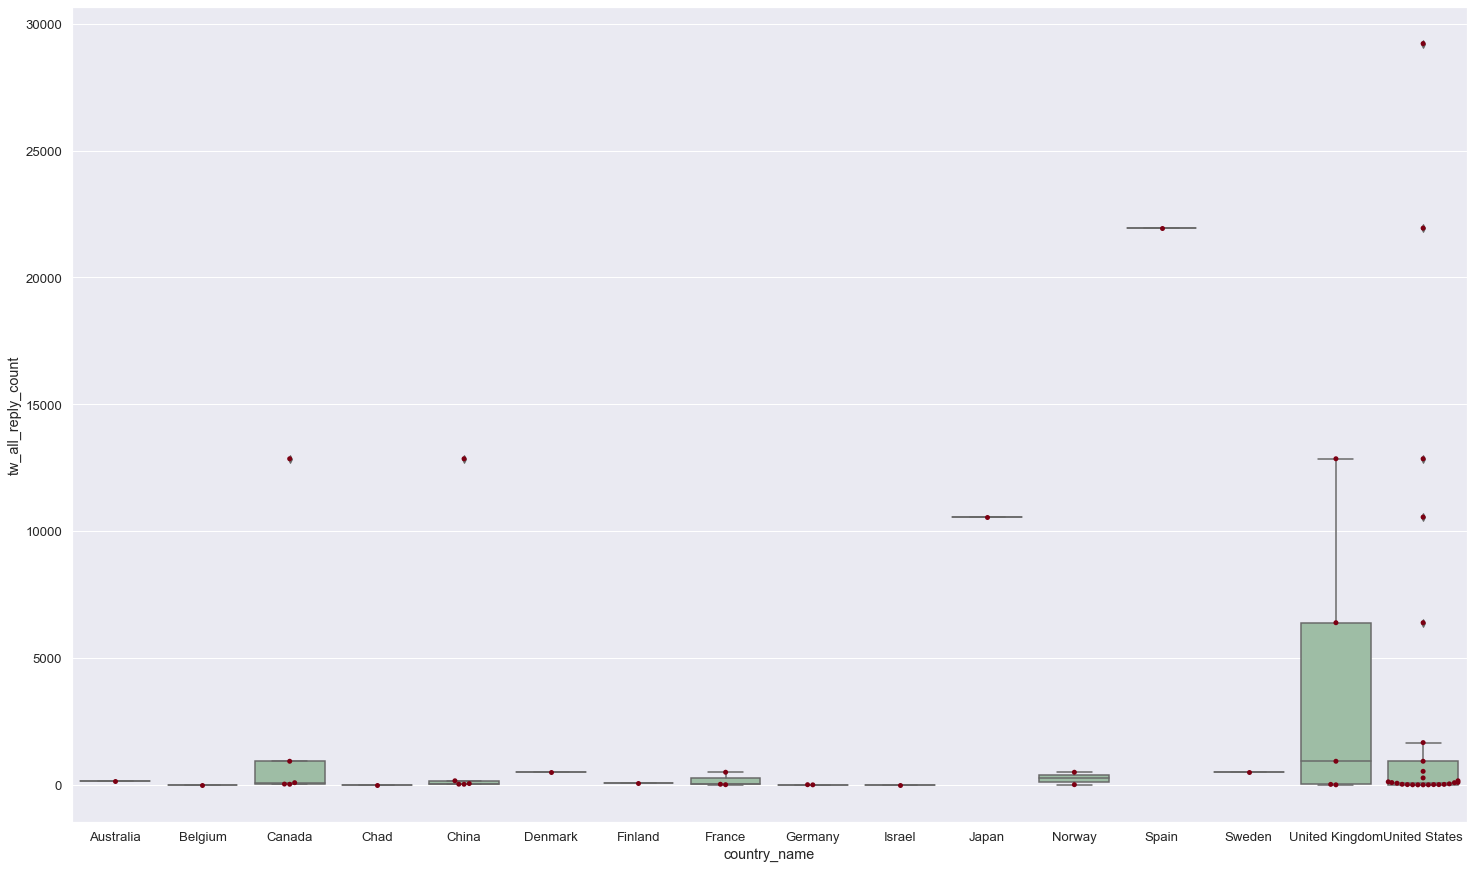

In [166]:
sns.set(font_scale=1.2)
ax = sns.boxplot(x='country_name', y='tw_all_reply_count', data=df_movie_countries, color='#99c2a2')
ax = sns.swarmplot(x="country_name", y="tw_all_reply_count", data=df_movie_countries, color='#7d0013')
plt.show()

In [167]:
res = stat()
res.anova_stat(df=df_movie_countries, res_var='tw_all_reply_count', anova_model='tw_all_reply_count ~ C(country_name)')
res.anova_summary

df        sum_sq       mean_sq         F    PR(>F)
C(country_name)  15.0  5.393418e+08  3.595612e+07  0.821312  0.649114
Residual         40.0  1.751156e+09  4.377890e+07       NaN       NaN

In [168]:
df_movie_countries.groupby('country_name').describe().tw_all_retweet_count

count         mean           std         min          25%  \
country_name                                                                
Australia         1.0     10425.00           NaN     10425.0     10425.00   
Belgium           1.0        54.00           NaN        54.0        54.00   
Canada            5.0   4620181.80  1.006859e+07       249.0       312.00   
Chad              1.0        54.00           NaN        54.0        54.00   
China             5.0   4528789.40  1.011810e+07       168.0       718.00   
Denmark           1.0    441522.00           NaN    441522.0    441522.00   
Finland           1.0    425415.00           NaN    425415.0    425415.00   
France            3.0    147275.00  2.548254e+05        54.0       151.50   
Germany           2.0        62.00  1.131371e+01        54.0        58.00   
Israel            1.0       160.00           NaN       160.0       160.00   
Japan             1.0   2444757.00           NaN   2444757.0   2444757.00   
Norway            2.0    220885.50  3.120271e+05       249.0    110567.25   
Spain             1.0  21950323.00           NaN  21950323.0  21950323.00   
Sweden            1.0    441522.00           NaN    441522.0    441522.00   
United Kingdom    5.0   4665181.80  1.004563e+07         0.0       595.00   
United States    25.0   2256508.44  6.243276e+06         4.0       160.00   

                       50%          75%         max  
country_name                                         
Australia          10425.0     10425.00     10425.0  
Belgium               54.0        54.00        54.0  
Canada             46343.0    425415.00  22628590.0  
Chad                  54.0        54.00        54.0  
China               4046.0     10425.00  22628590.0  
Denmark           441522.0    441522.00    441522.0  
Finland           425415.0    425415.00    425415.0  
France               249.0    220885.50    441522.0  
Germany               62.0        66.00        70.0  
Israel               160.0       160.00       160.0  
Japan            2444757.0   2444757.00   2444757.0  
Norway            220885.5    331203.75    441522.0  
Spain           21950323.0  21950323.00  21950323.0  
Sweden            441522.0    441522.00    441522.0  
United Kingdom     46343.0    650381.00  22628590.0  
United States       8248.0    253811.00  22628590.0

/Users/victormyeste/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


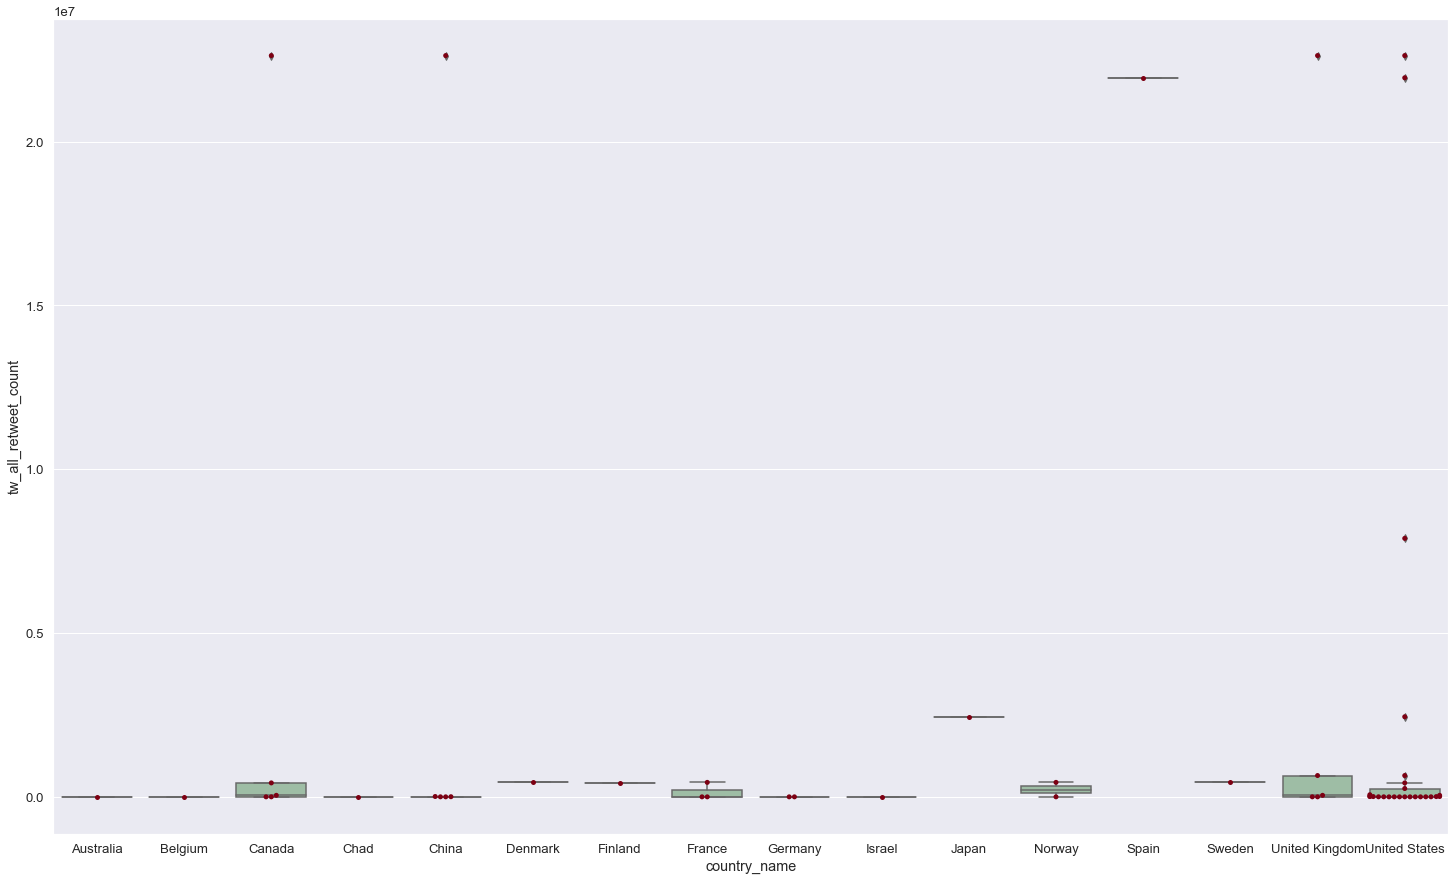

In [169]:
sns.set(font_scale=1.2)
ax = sns.boxplot(x='country_name', y='tw_all_retweet_count', data=df_movie_countries, color='#99c2a2')
ax = sns.swarmplot(x="country_name", y="tw_all_retweet_count", data=df_movie_countries, color='#7d0013')
plt.show()

In [170]:
res = stat()
res.anova_stat(df=df_movie_countries, res_var='tw_all_retweet_count', anova_model='tw_all_retweet_count ~ C(country_name)')
res.anova_summary

df        sum_sq       mean_sq         F   PR(>F)
C(country_name)  15.0  5.209090e+14  3.472727e+13  0.644775  0.81966
Residual         40.0  2.154379e+15  5.385948e+13       NaN      NaN

In [171]:
df_movie_countries.groupby('country_name').describe().tw_all_like_count

count       mean           std       min        25%       50%  \
country_name                                                                    
Australia         1.0    2405.00           NaN    2405.0    2405.00    2405.0   
Belgium           1.0      18.00           NaN      18.0      18.00      18.0   
Canada            5.0   28357.20  57110.514375     210.0     233.00     705.0   
Chad              1.0      18.00           NaN      18.0      18.00      18.0   
China             5.0   26848.80  57794.517519     161.0     398.00    1057.0   
Denmark           1.0    7246.00           NaN    7246.0    7246.00    7246.0   
Finland           1.0     705.00           NaN     705.0     705.00     705.0   
France            3.0    2499.00   4112.427872      18.0     125.50     233.0   
Germany           2.0      26.50     12.020815      18.0      22.25      26.5   
Israel            1.0     107.00           NaN     107.0     107.00     107.0   
Japan             1.0  150274.00           NaN  150274.0  150274.00  150274.0   
Norway            2.0    3657.00   5075.612475      68.0    1862.50    3657.0   
Spain             1.0  416208.00           NaN  416208.0  416208.00  416208.0   
Sweden            1.0    7246.00           NaN    7246.0    7246.00    7246.0   
United Kingdom    5.0   52166.00  66725.874168       4.0     400.00   10415.0   
United States    25.0   44951.92  99663.543913       0.0     127.00     759.0   

                      75%       max  
country_name                         
Australia         2405.00    2405.0  
Belgium             18.00      18.0  
Canada           10415.00  130223.0  
Chad                18.00      18.0  
China             2405.00  130223.0  
Denmark           7246.00    7246.0  
Finland            705.00     705.0  
France            3739.50    7246.0  
Germany             30.75      35.0  
Israel             107.00     107.0  
Japan           150274.00  150274.0  
Norway            5451.50    7246.0  
Spain           416208.00  416208.0  
Sweden            7246.00    7246.0  
United Kingdom  119788.00  130223.0  
United States    10415.00  416208.0

/Users/victormyeste/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


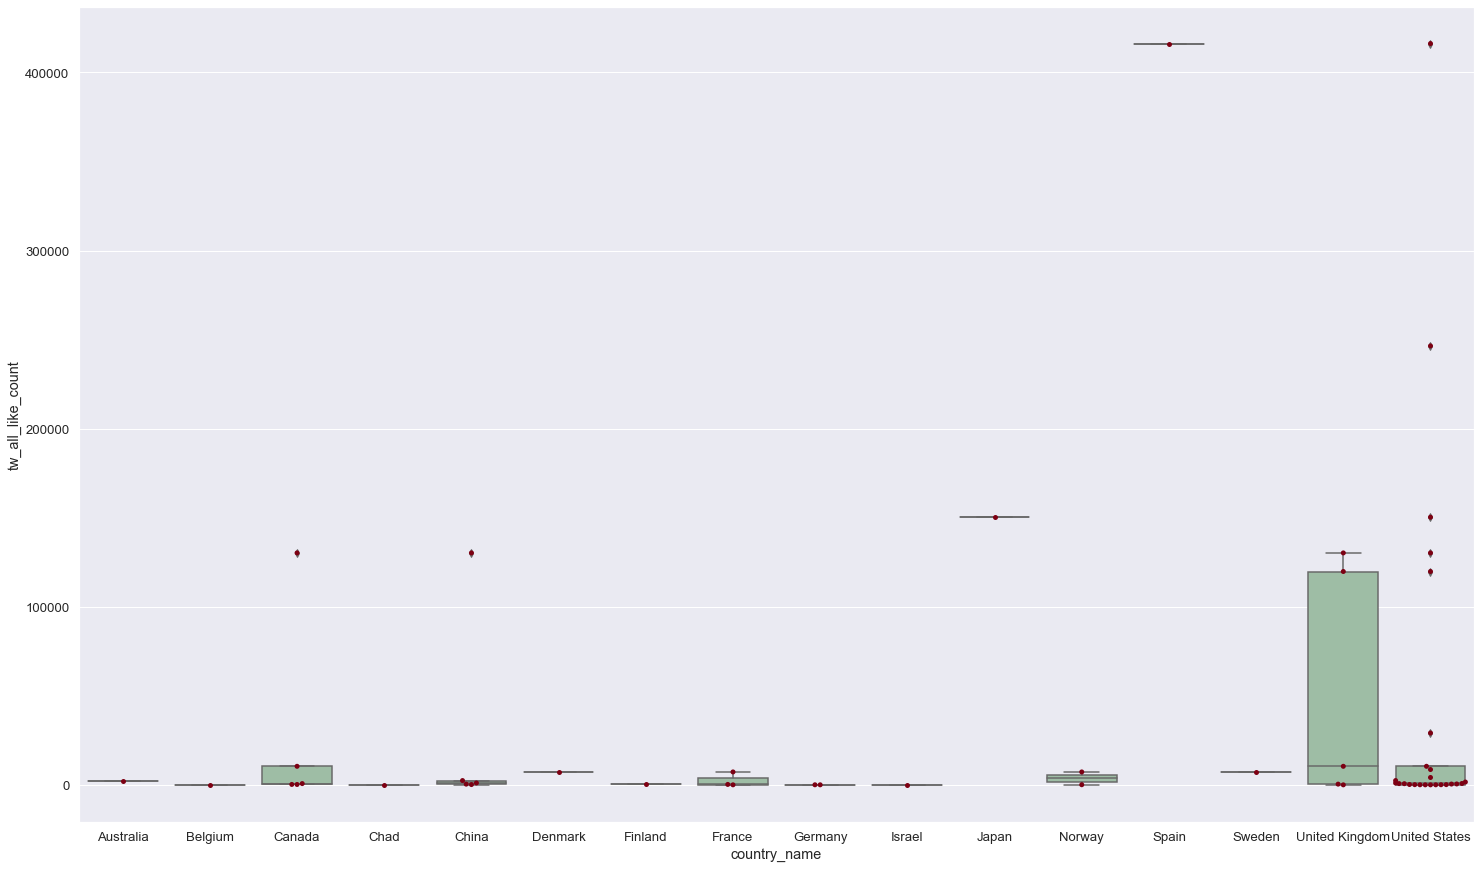

In [172]:
sns.set(font_scale=1.2)
ax = sns.boxplot(x='country_name', y='tw_all_like_count', data=df_movie_countries, color='#99c2a2')
ax = sns.swarmplot(x="country_name", y="tw_all_like_count", data=df_movie_countries, color='#7d0013')
plt.show()

In [173]:
res = stat()
res.anova_stat(df=df_movie_countries, res_var='tw_all_like_count', anova_model='tw_all_like_count ~ C(country_name)')
res.anova_summary

df        sum_sq       mean_sq         F    PR(>F)
C(country_name)  15.0  1.765296e+11  1.176864e+10  1.665389  0.099228
Residual         40.0  2.826640e+11  7.066599e+09       NaN       NaN

In [174]:
df_movie_countries.groupby('country_name').describe().tw_all_sentiment_mean

count      mean       std       min       25%       50%  \
country_name                                                              
Australia         1.0  0.343958       NaN  0.343958  0.343958  0.343958   
Belgium           1.0  0.387097       NaN  0.387097  0.387097  0.387097   
Canada            5.0  0.328650  0.225137 -0.025361  0.293333  0.353293   
Chad              1.0  0.387097       NaN  0.387097  0.387097  0.387097   
China             5.0  0.214464  0.157541 -0.025361  0.139344  0.274376   
Denmark           1.0  0.130514       NaN  0.130514  0.130514  0.130514   
Finland           1.0  0.443645       NaN  0.443645  0.443645  0.443645   
France            3.0  0.270315  0.129831  0.130514  0.211923  0.293333   
Germany           2.0  0.456706  0.098443  0.387097  0.421902  0.456706   
Israel            1.0  0.666667       NaN  0.666667  0.666667  0.666667   
Japan             1.0  0.502150       NaN  0.502150  0.502150  0.502150   
Norway            2.0  0.300551  0.240469  0.130514  0.215532  0.300551   
Spain             1.0  0.260941       NaN  0.260941  0.260941  0.260941   
Sweden            1.0  0.130514       NaN  0.130514  0.130514  0.130514   
United Kingdom    5.0  0.411661  0.290136 -0.025361  0.353578  0.401747   
United States    25.0  0.405392  0.236192 -0.113636  0.323718  0.398463   

                     75%       max  
country_name                        
Australia       0.343958  0.343958  
Belgium         0.387097  0.387097  
Canada          0.443645  0.578339  
Chad            0.387097  0.387097  
China           0.340000  0.343958  
Denmark         0.130514  0.130514  
Finland         0.443645  0.443645  
France          0.340215  0.387097  
Germany         0.491511  0.526316  
Israel          0.666667  0.666667  
Japan           0.502150  0.502150  
Norway          0.385570  0.470588  
Spain           0.260941  0.260941  
Sweden          0.130514  0.130514  
United Kingdom  0.578339  0.750000  
United States   0.571429  0.769231

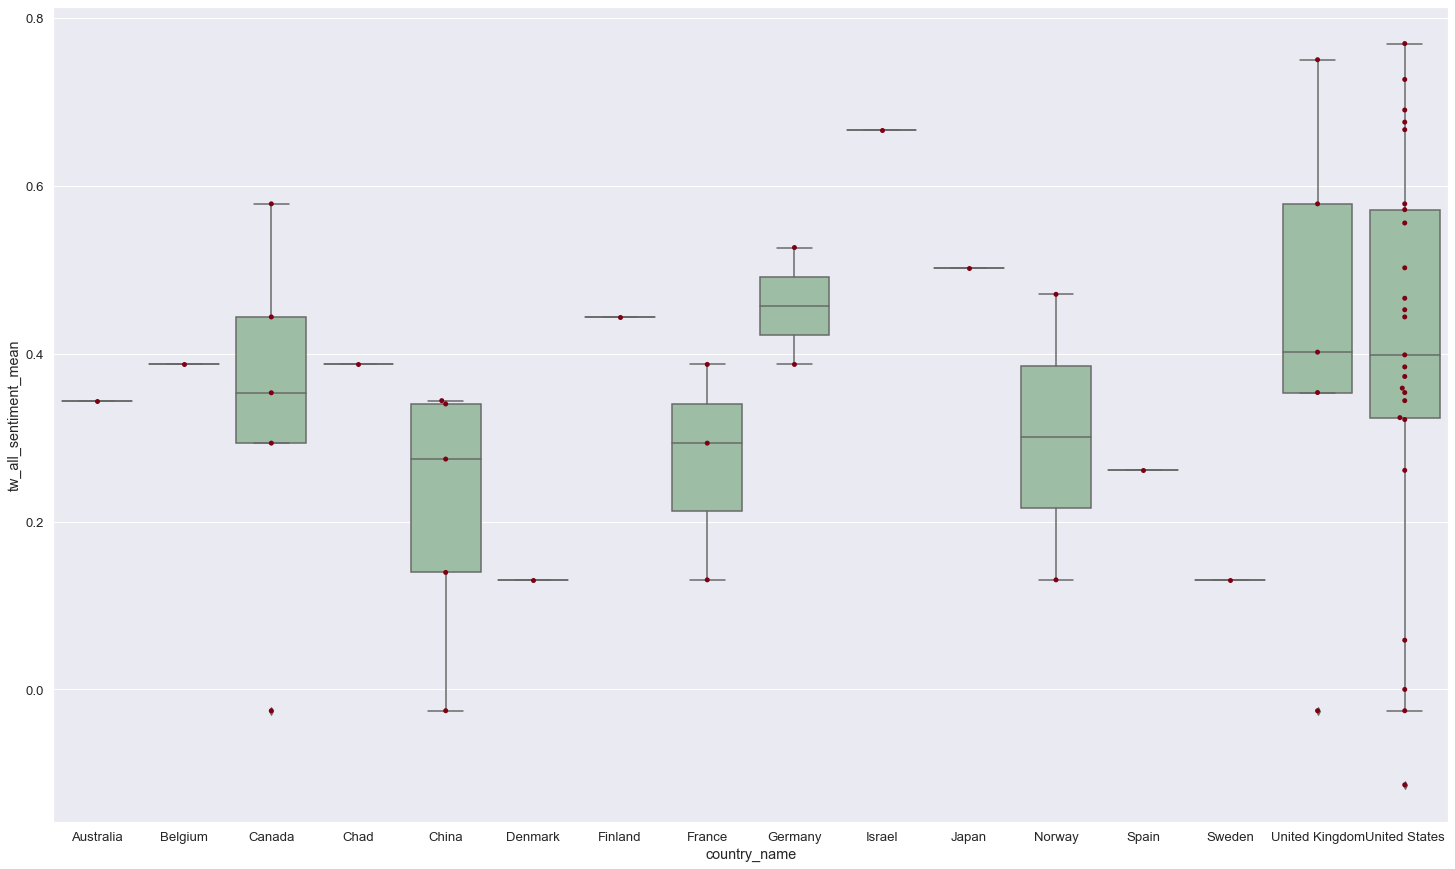

In [175]:
sns.set(font_scale=1.2)
ax = sns.boxplot(x='country_name', y='tw_all_sentiment_mean', data=df_movie_countries, color='#99c2a2')
ax = sns.swarmplot(x="country_name", y="tw_all_sentiment_mean", data=df_movie_countries, color='#7d0013')
plt.show()

In [176]:
res = stat()
res.anova_stat(df=df_movie_countries, res_var='tw_all_sentiment_mean', anova_model='tw_all_sentiment_mean ~ C(country_name)')
res.anova_summary

df    sum_sq   mean_sq         F    PR(>F)
C(country_name)  15.0  0.461784  0.030786  0.592358  0.863197
Residual         40.0  2.078850  0.051971       NaN       NaN

## Genres & Countries

In [177]:
df_movie_genres_countries = pd.read_sql_query("""
    SELECT genres.*, countries.*, movies.* FROM genres
    LEFT JOIN movie_genres ON genres.genre_id = movie_genres.genre_id
    LEFT JOIN movie_countries ON movie_genres.movie_id = movie_countries.movie_id
	LEFT JOIN countries ON countries.country_id = movie_countries.country_id
    LEFT JOIN movies ON movie_genres.movie_id = movies.id
""", conn)

In [178]:
df_movie_genres_countries

genre_id genre_name  country_id    country_name  id                name  \
0           1     Action          16   United States   1     Jackass Forever   
1           1     Action           3          Canada   2            Moonfall   
2           1     Action           5           China   2            Moonfall   
3           1     Action          15  United Kingdom   2            Moonfall   
4           1     Action          16   United States   2            Moonfall   
..        ...        ...         ...             ...  ..                 ...   
130        17   Thriller          16   United States  12          Blacklight   
131        17   Thriller          16   United States  13  Catch the Fair One   
132        17   Thriller           3          Canada  18         Cosmic Dawn   
133        17   Thriller          12          Norway  33     The Burning Sea   
134        17   Thriller          16   United States  35  The Desperate Hour   

              hashtag                                  countries   mpaa  \
0      jackassforever                              United States      R   
1            moonfall  United States;China;United Kingdom;Canada  PG-13   
2            moonfall  United States;China;United Kingdom;Canada  PG-13   
3            moonfall  United States;China;United Kingdom;Canada  PG-13   
4            moonfall  United States;China;United Kingdom;Canada  PG-13   
..                ...                                        ...    ...   
130   blacklightmovie              United States;Australia;China  PG-13   
131   catchthefairone                              United States   None   
132        cosmicdawn                                     Canada   None   
133     theburningsea                                     Norway  PG-13   
134  thedesperatehour                              United States  PG-13   

                        genres release_date  opening_grosses  \
0    Action;Comedy;Documentary   2022-02-04       23154388.0   
1      Action;Adventure;Sci-Fi   2022-02-04        9868997.0   
2      Action;Adventure;Sci-Fi   2022-02-04        9868997.0   
3      Action;Adventure;Sci-Fi   2022-02-04        9868997.0   
4      Action;Adventure;Sci-Fi   2022-02-04        9868997.0   
..                         ...          ...              ...   
130            Action;Thriller   2022-02-11        3502475.0   
131             Crime;Thriller   2022-02-11           7992.0   
132            Sci-Fi;Thriller   2022-02-11              NaN   
133      Action;Drama;Thriller   2022-02-25            371.0   
134                   Thriller   2022-02-25              NaN   

     opening_theaters  rating_avg  
0              3604.0         7.0  
1              3446.0         5.2  
2              3446.0         5.2  
3              3446.0         5.2  
4              3446.0         5.2  
..                ...         ...  
130            2772.0         4.7  
131              30.0         6.4  
132               NaN         4.0  
133               4.0         6.3  
134               NaN         4.7  

[135 rows x 14 columns]

In [179]:
df_movie_genres_countries.groupby(['genre_name', 'country_name']).describe().rating_avg

count  mean       std  min    25%   50%    75%  max
genre_name country_name                                                      
Action     Australia        1.0  4.70       NaN  4.7  4.700  4.70  4.700  4.7
           Canada           2.0  5.15  0.070711  5.1  5.125  5.15  5.175  5.2
           China            4.0  5.20  0.374166  4.7  5.075  5.25  5.375  5.6
           Finland          1.0  5.10       NaN  5.1  5.100  5.10  5.100  5.1
           Norway           1.0  6.30       NaN  6.3  6.300  6.30  6.300  6.3
...                         ...   ...       ...  ...    ...   ...    ...  ...
Thriller   Australia        1.0  4.70       NaN  4.7  4.700  4.70  4.700  4.7
           Canada           1.0  4.00       NaN  4.0  4.000  4.00  4.000  4.0
           China            1.0  4.70       NaN  4.7  4.700  4.70  4.700  4.7
           Norway           1.0  6.30       NaN  6.3  6.300  6.30  6.300  6.3
           United States    4.0  5.10  0.867948  4.6  4.675  4.70  5.125  6.4

[76 rows x 8 columns]

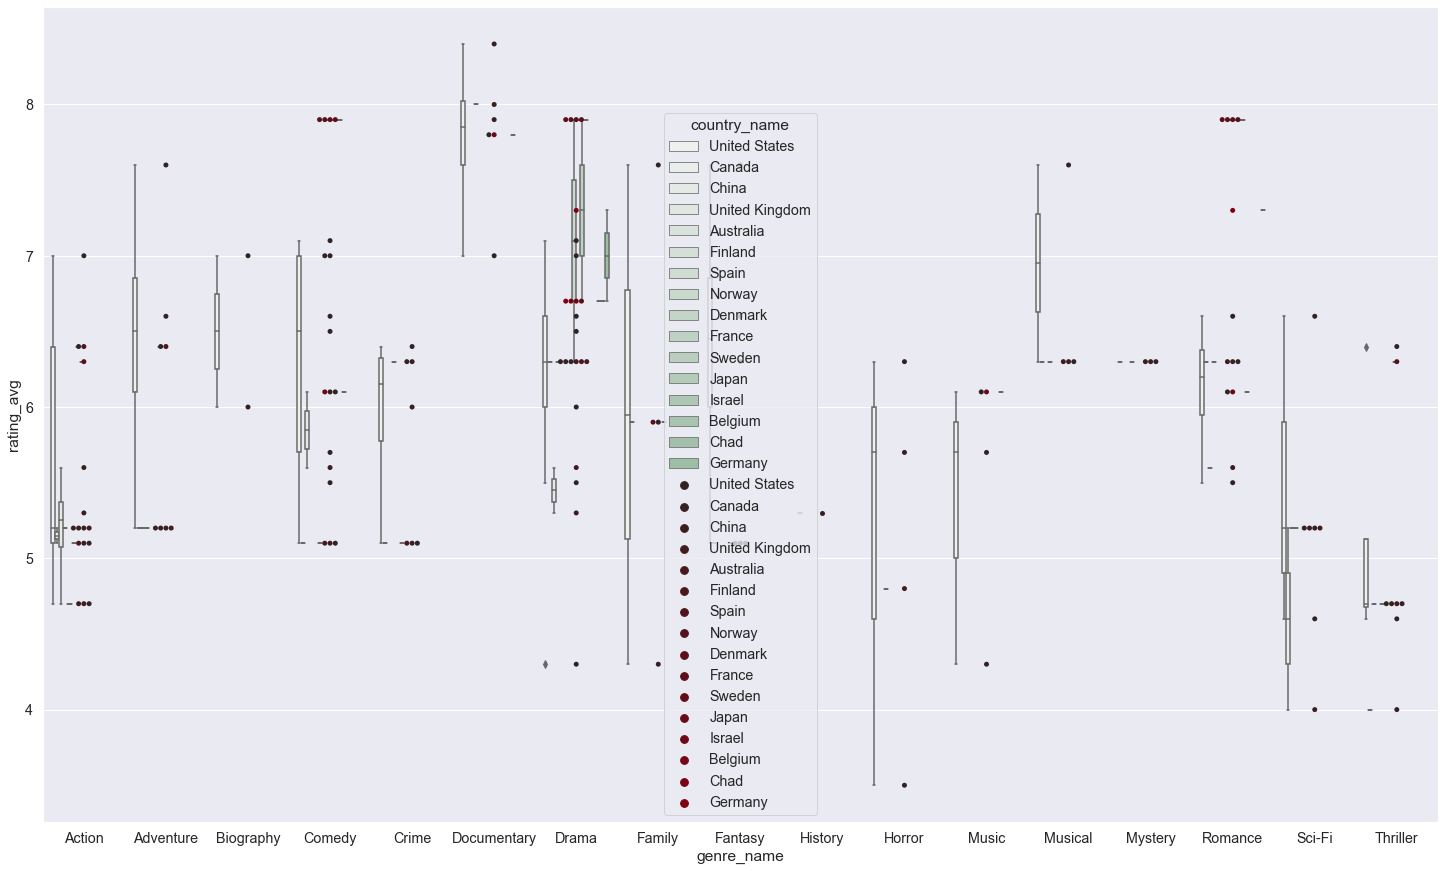

In [180]:
sns.set(font_scale=1.3)
ax = sns.boxplot(x='genre_name', y='rating_avg', hue='country_name', data=df_movie_genres_countries, color='#99c2a2')
ax = sns.swarmplot(x="genre_name", y="rating_avg", hue='country_name', data=df_movie_genres_countries, color='#7d0013')
plt.show()

In [181]:
res = stat()
res.anova_stat(df=df_movie_genres_countries, res_var='rating_avg', anova_model='rating_avg ~ C(country_name) + C(genre_name):C(country_name)')
res.anova_summary

/Users/victormyeste/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 15, but rank is 9
  warnings.warn('covariance of constraints does not have full '
/Users/victormyeste/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 256, but rank is 68
  warnings.warn('covariance of constraints does not have full '


df      sum_sq   mean_sq         F    PR(>F)
C(country_name)                 15.0    8.946618  0.596441  0.809852  0.609015
C(genre_name):C(country_name)  256.0  242.158926  0.945933  1.284394  0.163378
Residual                        59.0   43.452444  0.736482       NaN       NaN

## Genres & Domestic/Foreign

In [182]:
df_movie_genres['domestic'] = df_movie_genres['countries'].apply(lambda x : False if(x.find("United States")) else True)

In [183]:
df_movie_genres.groupby(['genre_name', 'domestic']).describe().rating_avg

count      mean       std  min    25%   50%    75%  max
genre_name  domestic                                                         
Action      False       4.0  5.575000  0.525198  5.1  5.250  5.45  5.775  6.3
            True        4.0  5.825000  1.059481  4.7  5.075  5.80  6.550  7.0
Adventure   True        4.0  6.450000  0.984886  5.2  6.100  6.50  6.850  7.6
Biography   True        2.0  6.500000  0.707107  6.0  6.250  6.50  6.750  7.0
Comedy      False       4.0  6.175000  1.220314  5.1  5.475  5.85  6.550  7.9
            True        8.0  6.437500  0.613974  5.5  6.000  6.55  7.000  7.1
Crime       False       1.0  5.100000       NaN  5.1  5.100  5.10  5.100  5.1
            True        3.0  6.233333  0.208167  6.0  6.150  6.30  6.350  6.4
Documentary False       1.0  8.000000       NaN  8.0  8.000  8.00  8.000  8.0
            True        4.0  7.775000  0.579511  7.0  7.600  7.85  8.025  8.4
Drama       False       7.0  6.485714  0.909997  5.3  5.950  6.30  7.000  7.9
            True        8.0  6.162500  0.913295  4.3  5.875  6.40  6.700  7.1
Family      False       1.0  5.900000       NaN  5.9  5.900  5.90  5.900  5.9
            True        2.0  5.950000  2.333452  4.3  5.125  5.95  6.775  7.6
Fantasy     False       1.0  5.100000       NaN  5.1  5.100  5.10  5.100  5.1
            True        3.0  6.833333  0.680686  6.3  6.450  6.60  7.100  7.6
History     False       1.0  5.300000       NaN  5.3  5.300  5.30  5.300  5.3
Horror      False       1.0  4.800000       NaN  4.8  4.800  4.80  4.800  4.8
            True        3.0  5.166667  1.474223  3.5  4.600  5.70  6.000  6.3
Music       True        3.0  5.366667  0.945163  4.3  5.000  5.70  5.900  6.1
Musical     False       1.0  6.300000       NaN  6.3  6.300  6.30  6.300  6.3
            True        1.0  7.600000       NaN  7.6  7.600  7.60  7.600  7.6
Mystery     True        2.0  6.300000  0.000000  6.3  6.300  6.30  6.300  6.3
Romance     False       4.0  6.775000  1.024288  5.6  6.125  6.80  7.450  7.9
            True        3.0  6.066667  0.550757  5.5  5.800  6.10  6.350  6.6
Sci-Fi      False       1.0  4.000000       NaN  4.0  4.000  4.00  4.000  4.0
            True        3.0  5.466667  1.026320  4.6  4.900  5.20  5.900  6.6
Thriller    False       2.0  5.150000  1.626346  4.0  4.575  5.15  5.725  6.3
            True        4.0  5.100000  0.867948  4.6  4.675  4.70  5.125  6.4

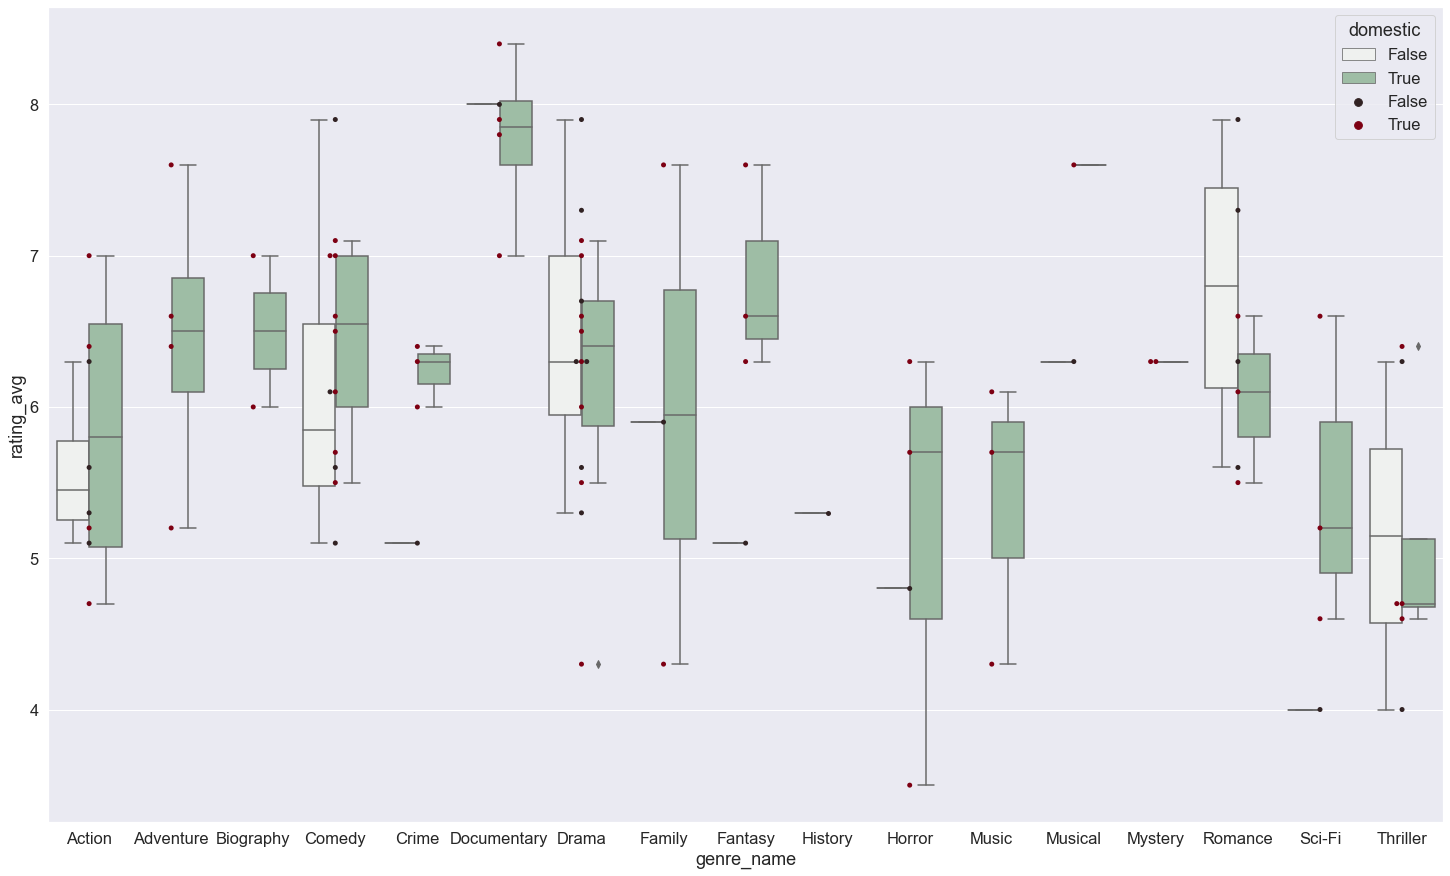

In [184]:
sns.set(font_scale=1.5)
ax = sns.boxplot(x='genre_name', y='rating_avg', hue='domestic', data=df_movie_genres, color='#99c2a2')
ax = sns.swarmplot(x="genre_name", y="rating_avg", hue='domestic', data=df_movie_genres, color='#7d0013')
plt.show()

In [185]:
res = stat()
res.anova_stat(df=df_movie_genres, res_var='rating_avg', anova_model='rating_avg ~ C(genre_name) + C(domestic) + C(genre_name):C(domestic)')
res.anova_summary

/Users/victormyeste/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 16, but rank is 11
  warnings.warn('covariance of constraints does not have full '
/Users/victormyeste/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 16, but rank is 15
  warnings.warn('covariance of constraints does not have full '


df     sum_sq   mean_sq         F    PR(>F)
C(genre_name)              16.0  49.886163  3.117885  3.562685  0.000752
C(domestic)                 1.0   1.025129  1.025129  1.171374  0.283677
C(genre_name):C(domestic)  16.0  10.613457  0.663341  0.757974  0.716056
Residual                   57.0  49.883571  0.875150       NaN       NaN

In [186]:
res = stat()
res.anova_stat(df=df_movie_genres, res_var='rating_avg', anova_model='rating_avg ~ C(genre_name) + C(domestic)')
res.anova_summary

df     sum_sq   mean_sq         F    PR(>F)
C(genre_name)  16.0  37.511258  2.344454  2.806436  0.001613
C(domestic)     1.0   0.457621  0.457621  0.547796  0.461767
Residual       68.0  56.806165  0.835385       NaN       NaN

In [187]:
df_movie_genres.groupby(['genre_name', 'domestic']).describe().tw_all_retweet_count

count          mean           std       min         25%  \
genre_name  domestic                                                            
Action      False       4.0  1.076070e+05  2.118787e+05     249.0      600.75   
            True        4.0  1.311992e+07  1.106945e+07   10425.0  5920377.00   
Adventure   True        4.0  1.114513e+07  1.287134e+07     702.0      849.00   
Biography   True        2.0  7.875000e+02  1.102379e+03       8.0      397.75   
Comedy      False       4.0  2.177878e+05  2.491385e+05     168.0     3076.50   
            True        8.0  1.325968e+06  2.783468e+06       6.0       29.00   
Crime       False       1.0  4.254150e+05           NaN  425415.0   425415.00   
            True        3.0  2.202587e+05  3.725146e+05    1567.0     5197.50   
Documentary False       1.0  0.000000e+00           NaN       0.0        0.00   
            True        4.0  1.972646e+06  3.945143e+06      22.0       37.75   
Drama       False       7.0  7.042886e+04  1.645118e+05      54.0      159.50   
            True        8.0  1.133389e+05  2.344151e+05       4.0        7.50   
Family      False       1.0  2.490000e+02           NaN     249.0      249.00   
            True        2.0  3.530000e+02  4.935605e+02       4.0      178.50   
Fantasy     False       1.0  4.254150e+05           NaN  425415.0   425415.00   
            True        3.0  3.058667e+03  3.913353e+03     702.0      800.00   
History     False       1.0  7.180000e+02           NaN     718.0      718.00   
Horror      False       1.0  5.950000e+02           NaN     595.0      595.00   
            True        3.0  3.001667e+04  3.039404e+04    7576.0    12722.00   
Music       True        3.0  8.208763e+05  1.406350e+06       4.0     8936.00   
Musical     False       1.0  4.634300e+04           NaN   46343.0    46343.00   
            True        1.0  7.020000e+02           NaN     702.0      702.00   
Mystery     True        2.0  3.289785e+05  4.545318e+05    7576.0   168277.25   
Romance     False       4.0  1.229952e+05  2.133810e+05      70.0     3052.00   
            True        3.0  8.152303e+05  1.411212e+06      36.0      467.00   
Sci-Fi      False       1.0  3.120000e+02           NaN     312.0      312.00   
            True        3.0  7.543740e+06  1.306386e+07     898.0     1315.50   
Thriller    False       2.0  2.805000e+02  4.454773e+01     249.0      264.75   
            True        4.0  7.308500e+03  3.829287e+03    1733.0     6619.25   

                             50%          75%         max  
genre_name  domestic                                       
Action      False         2382.0    109388.25    425415.0  
            True      14920342.0  22119889.75  22628590.0  
Adventure   True      10975610.5  22119889.75  22628590.0  
Biography   True           787.5      1177.25      1567.0  
Comedy      False       214730.5    429441.75    441522.0  
            True          9383.0    801547.50   7890361.0  
Crime       False       425415.0    425415.00    425415.0  
            True          8828.0    329604.50    650381.0  
Documentary False            0.0         0.00         0.0  
            True           101.5   1972710.25   7890361.0  
Drama       False          718.0     25194.50    441522.0  
            True           467.0     64628.00    650381.0  
Family      False          249.0       249.00       249.0  
            True           353.0       527.50       702.0  
Fantasy     False       425415.0    425415.00    425415.0  
            True           898.0      4237.00      7576.0  
History     False          718.0       718.00       718.0  
Horror      False          595.0       595.00       595.0  
            True         17868.0     41237.00     64606.0  
Music       True         17868.0   1231312.50   2444757.0  
Musical     False        46343.0     46343.00     46343.0  
            True           702.0       702.00       702.0  
Mystery     True        328978.5    489679.75    650381.0  
Romance   

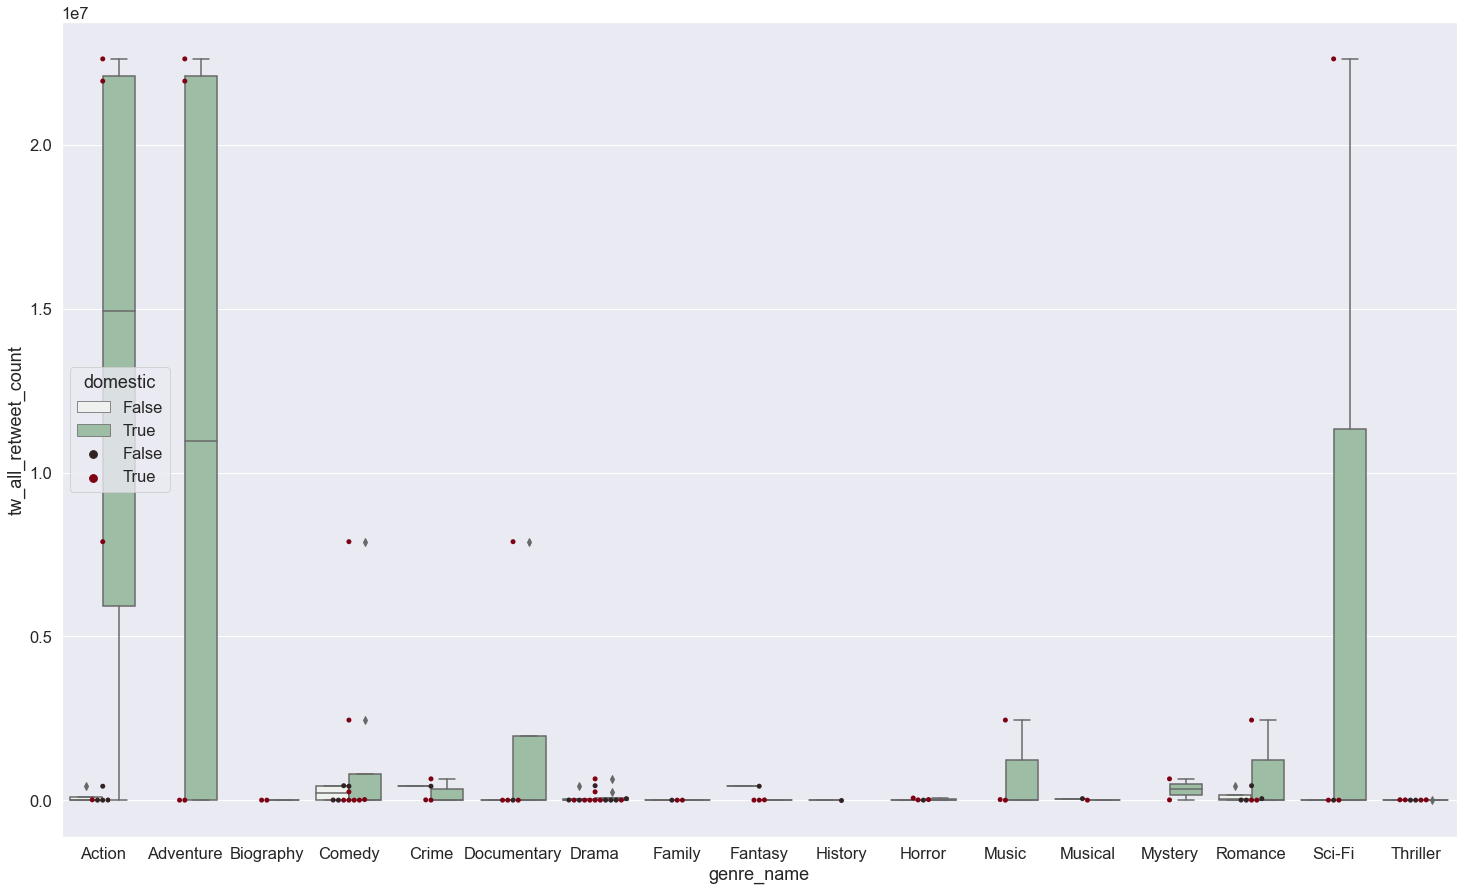

In [188]:
sns.set(font_scale=1.5)
ax = sns.boxplot(x='genre_name', y='tw_all_retweet_count', hue='domestic', data=df_movie_genres, color='#99c2a2')
ax = sns.swarmplot(x="genre_name", y="tw_all_retweet_count", hue='domestic', data=df_movie_genres, color='#7d0013')
plt.show()

In [189]:
res = stat()
res.anova_stat(df=df_movie_genres, res_var='tw_all_retweet_count', anova_model='tw_all_retweet_count ~ C(genre_name) + C(domestic) + C(genre_name):C(domestic)')
res.anova_summary

/Users/victormyeste/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 16, but rank is 11
  warnings.warn('covariance of constraints does not have full '
/Users/victormyeste/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 16, but rank is 15
  warnings.warn('covariance of constraints does not have full '


df        sum_sq       mean_sq         F  \
C(genre_name)              16.0  5.347738e+14  3.342336e+13  1.447342   
C(domestic)                 1.0  5.822337e+13  5.822337e+13  2.521264   
C(genre_name):C(domestic)  16.0  6.904520e+14  4.315325e+13  1.868678   
Residual                   57.0  1.316297e+15  2.309293e+13       NaN   

                             PR(>F)  
C(genre_name)              0.177672  
C(domestic)                0.117853  
C(genre_name):C(domestic)  0.046654  
Residual                        NaN

In [190]:
res = stat()
res.anova_stat(df=df_movie_genres, res_var='tw_all_retweet_count', anova_model='tw_all_retweet_count ~ C(genre_name) + C(domestic)')
res.anova_summary

df        sum_sq       mean_sq         F    PR(>F)
C(genre_name)  16.0  7.145450e+14  4.465906e+13  1.873257  0.038690
C(domestic)     1.0  8.385624e+13  8.385624e+13  3.517412  0.065021
Residual       68.0  1.621142e+15  2.384033e+13       NaN       NaN

## Correlation analysis of genres with movies data Twitter data in general

In [191]:
df_movie_genres

genre_id genre_name  id                name           hashtag  \
0          1     Action   1     Jackass Forever    jackassforever   
1          1     Action   2            Moonfall          moonfall   
2          1     Action   4  Only Fools Rush In   onlyfoolsrushin   
3          1     Action  12          Blacklight   blacklightmovie   
4          1     Action  14   Water Gate Bridge   watergatebridge   
..       ...        ...  ..                 ...               ...   
81        17   Thriller  12          Blacklight   blacklightmovie   
82        17   Thriller  13  Catch the Fair One   catchthefairone   
83        17   Thriller  18         Cosmic Dawn        cosmicdawn   
84        17   Thriller  33     The Burning Sea     theburningsea   
85        17   Thriller  35  The Desperate Hour  thedesperatehour   

                                    countries   mpaa  \
0                               United States      R   
1   United States;China;United Kingdom;Canada  PG-13   
2                                       China   None   
3               United States;Australia;China  PG-13   
4                                       China   None   
..                                        ...    ...   
81              United States;Australia;China  PG-13   
82                              United States   None   
83                                     Canada   None   
84                                     Norway  PG-13   
85                              United States  PG-13   

                         genres release_date  opening_grosses  \
0     Action;Comedy;Documentary   2022-02-04       23154388.0   
1       Action;Adventure;Sci-Fi   2022-02-04        9868997.0   
2   Action;Comedy;Drama;Romance   2022-02-04          44134.0   
3               Action;Thriller   2022-02-11        3502475.0   
4          Action;Drama;History   2022-02-11          42707.0   
..                          ...          ...              ...   
81              Action;Thriller   2022-02-11        3502475.0   
82               Crime;Thriller   2022-02-11           7992.0   
83              Sci-Fi;Thriller   2022-02-11              NaN   
84        Action;Drama;Thriller   2022-02-25            371.0   
85                     Thriller   2022-02-25              NaN   

    opening_theaters  rating_avg  tw_all_tweet_count  tw_all_quote_count  \
0             3604.0         7.0             68597.0                5303   
1             3446.0         5.2             71213.0                4003   
2               39.0         5.6               441.0                  15   
3             2772.0         4.7               753.0                  41   
4               24.0         5.3               122.0                   5   
..               ...         ...                 ...                 ...   
81            2772.0         4.7               753.0                  41   
82              30.0         6.4               384.0                  22   
83               NaN         4.0               167.0                  13   
84               4.0         6.3               102.0                   1   
85               NaN         4.7               660.0                  20   

    tw_all_quote_mean  tw_all_reply_count  tw_all_reply_mean  \
0            0.077307               29220           0.425966   
1            0.056212               12854           0.180501   
2            0.034014                  50           0.113379   
3            0.054449                 160           0.212483   
4            0.040984                  23           0.188525   
..                ...                 ...                ...   
81           0.054449                 160           0.212483   
82           0.057292                  39           0.101562   
83           0.077844                  31           0.185629   
84           0.009804                   7           0.068627   
85           0.030303                 119           0.180303   

    tw_all_retweet_count  tw_all_retwee

In [192]:
import numpy as np
np.corrcoef(df_movie_genres["rating_avg"], df_movie_genres["tw_all_retweet_count"])

array([[ 1.        , -0.05874011],
       [-0.05874011,  1.        ]])

<AxesSubplot:>

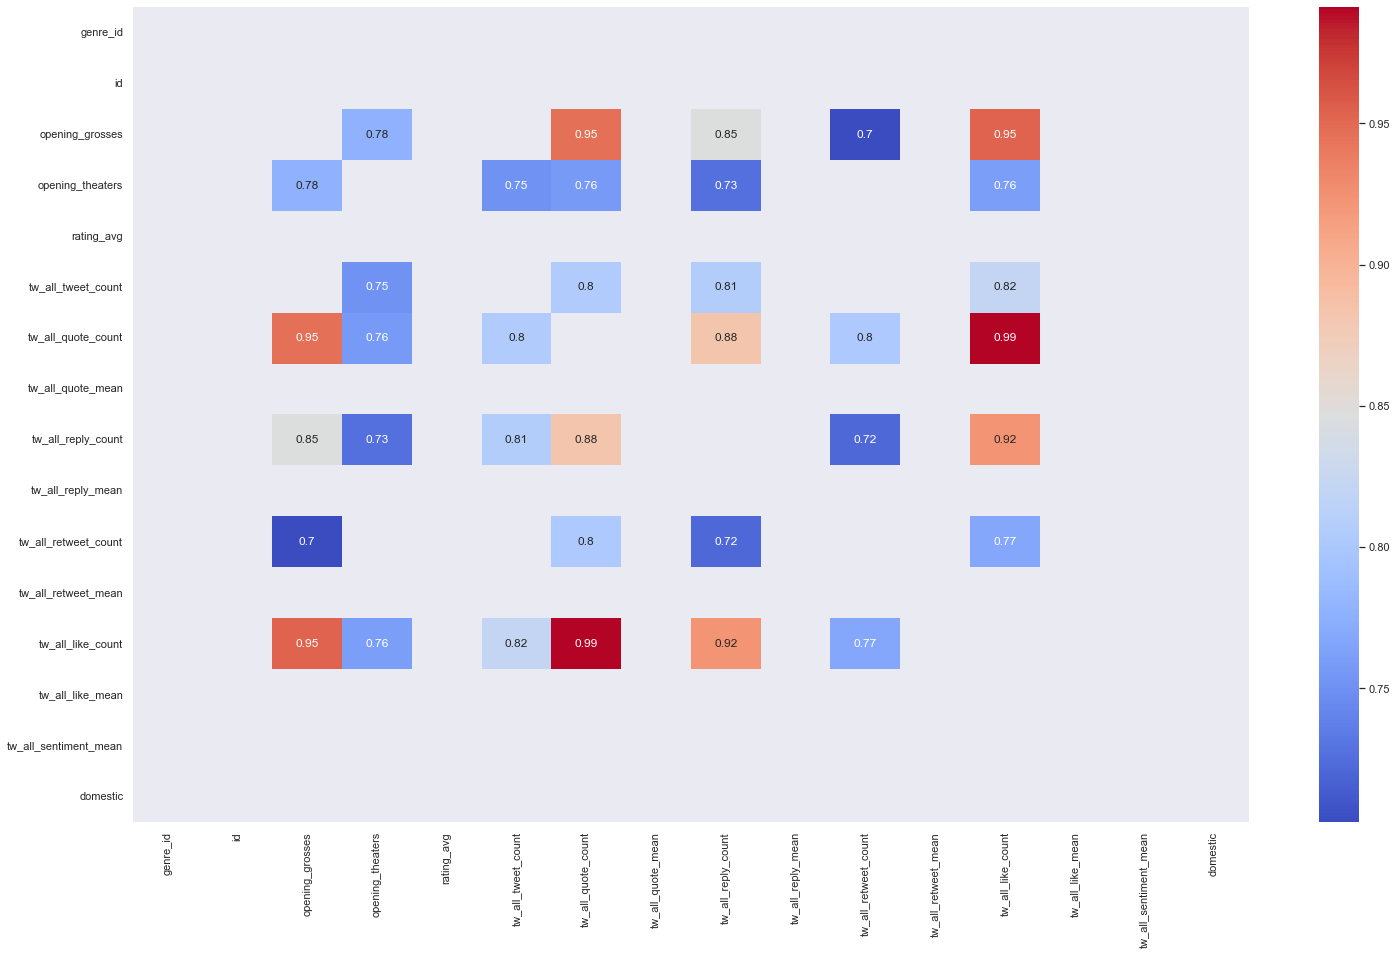

In [193]:
corrMatrix = df_movie_genres.corr()
sns.set(rc = {'figure.figsize':(25,15)})
filteredCorrMatrix = corrMatrix[((corrMatrix >= .7) | (corrMatrix <= -.7)) & (corrMatrix !=1.000)]
sns.heatmap(filteredCorrMatrix, annot = True, cmap= 'coolwarm')

In [194]:
df_movie_genres_corr = df_movie_genres.loc[:, df_movie_genres.columns != 'id']
df_movie_genres_corr = df_movie_genres_corr.loc[:, df_movie_genres_corr.columns != 'genre_id']

<AxesSubplot:>

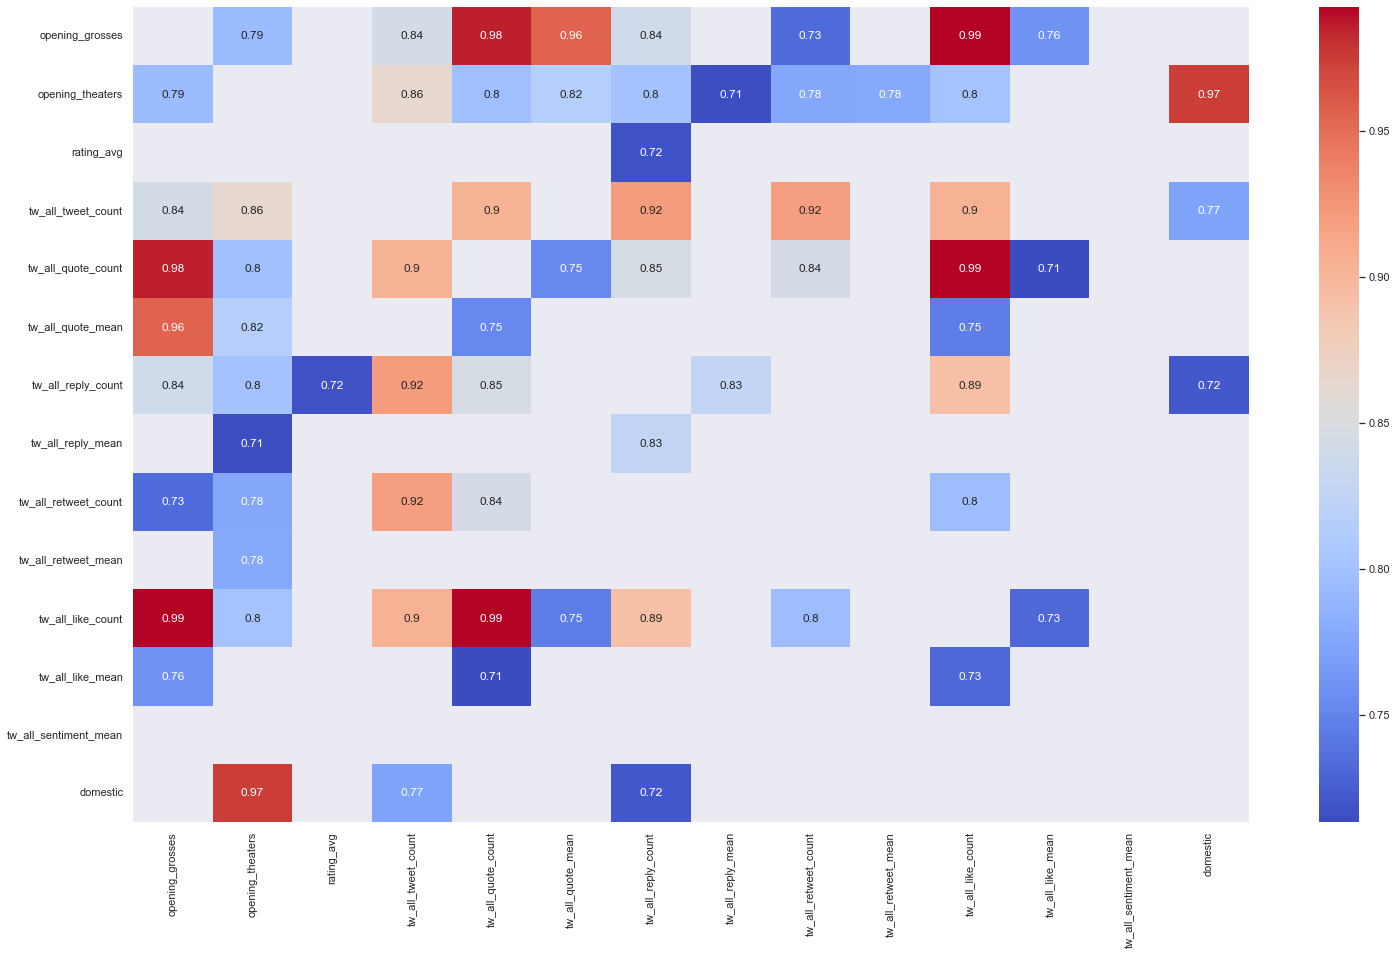

In [195]:
# Action 8
corrMatrix = df_movie_genres_corr[df_movie_genres["genre_id"] == 1].corr()
sns.set(rc = {'figure.figsize':(25,15)})
filteredCorrMatrix = corrMatrix[((corrMatrix >= .7) | (corrMatrix <= -.7)) & (corrMatrix !=1.000)]
sns.heatmap(filteredCorrMatrix, annot = True, cmap= 'coolwarm')

<AxesSubplot:>

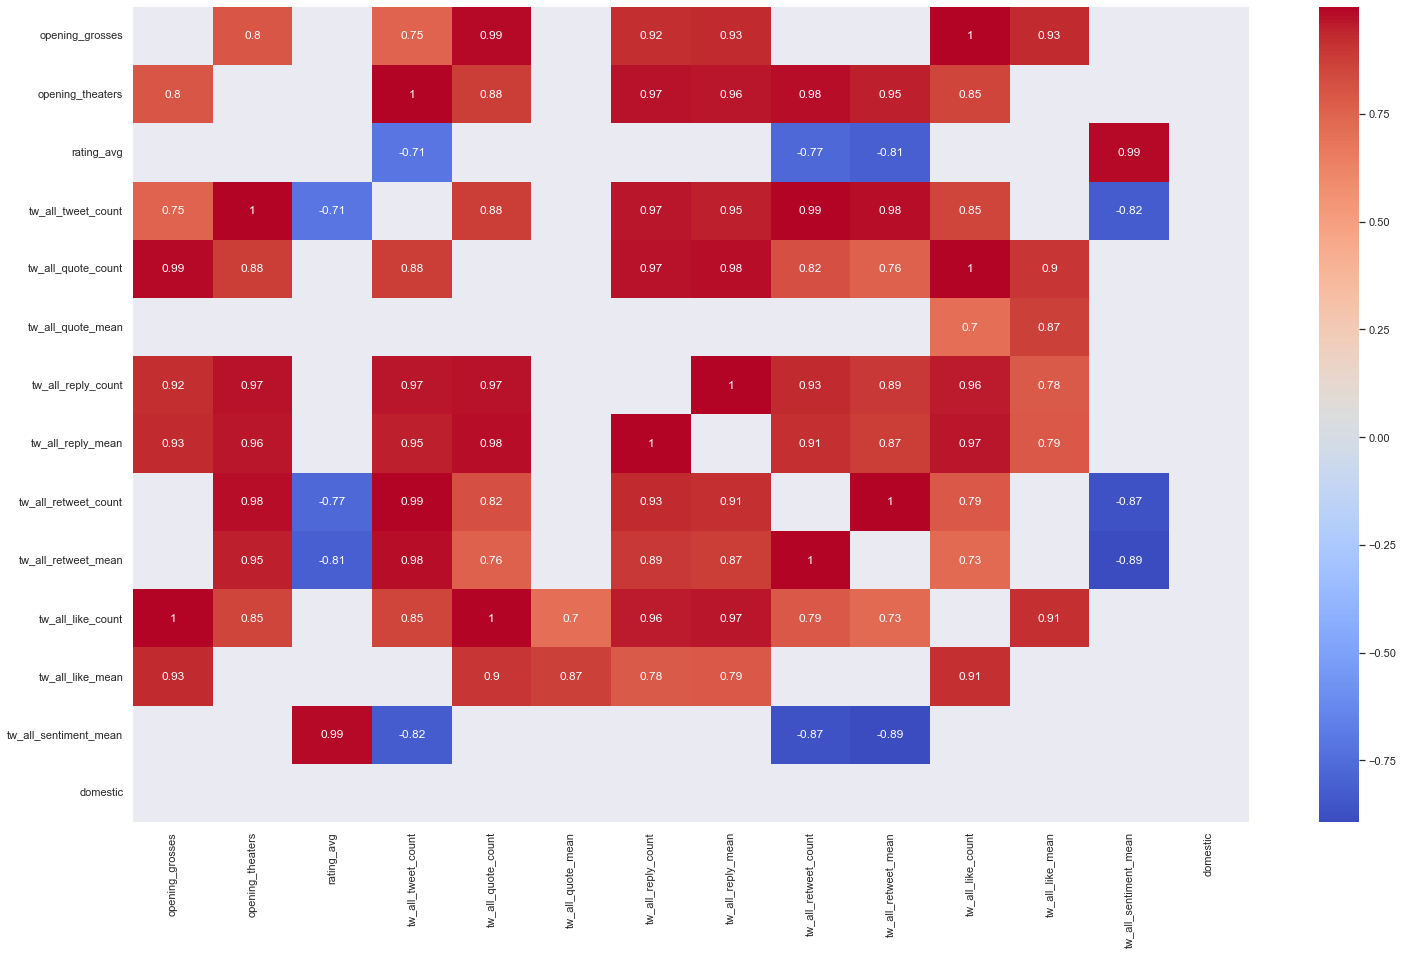

In [196]:
# Adventure 4
corrMatrix = df_movie_genres_corr[df_movie_genres["genre_id"] == 2].corr()
sns.set(rc = {'figure.figsize':(25,15)})
filteredCorrMatrix = corrMatrix[((corrMatrix >= .7) | (corrMatrix <= -.7)) & (corrMatrix !=1.000)]
sns.heatmap(filteredCorrMatrix, annot = True, cmap= 'coolwarm')

<AxesSubplot:>

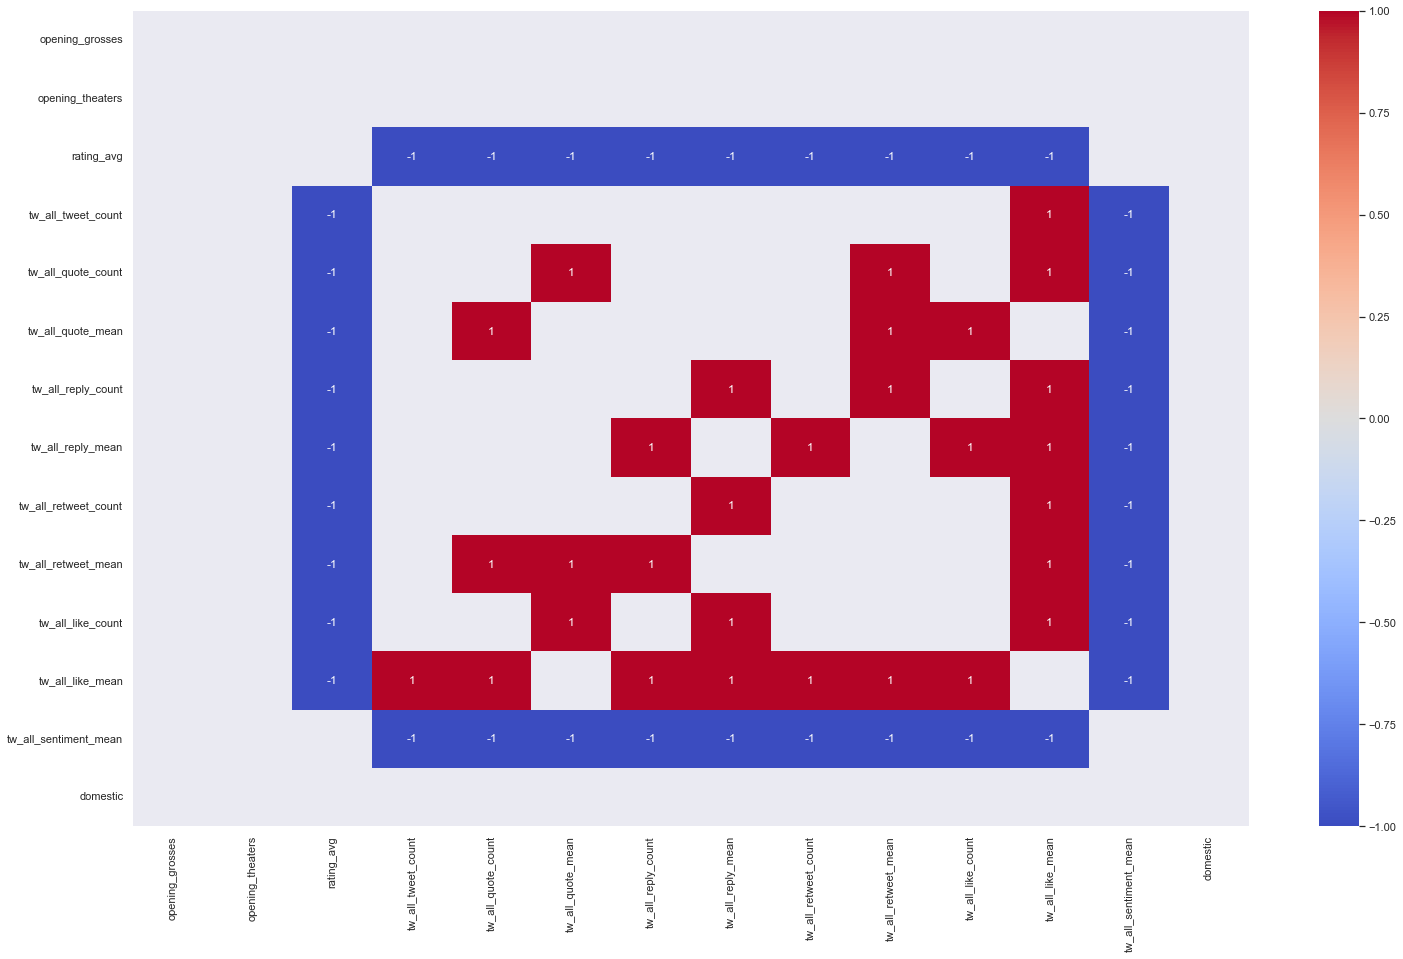

In [197]:
# Biography 2
corrMatrix = df_movie_genres_corr[df_movie_genres["genre_id"] == 3].corr()
sns.set(rc = {'figure.figsize':(25,15)})
filteredCorrMatrix = corrMatrix[((corrMatrix >= .7) | (corrMatrix <= -.7)) & (corrMatrix !=1.000)]
sns.heatmap(filteredCorrMatrix, annot = True, cmap= 'coolwarm')

<AxesSubplot:>

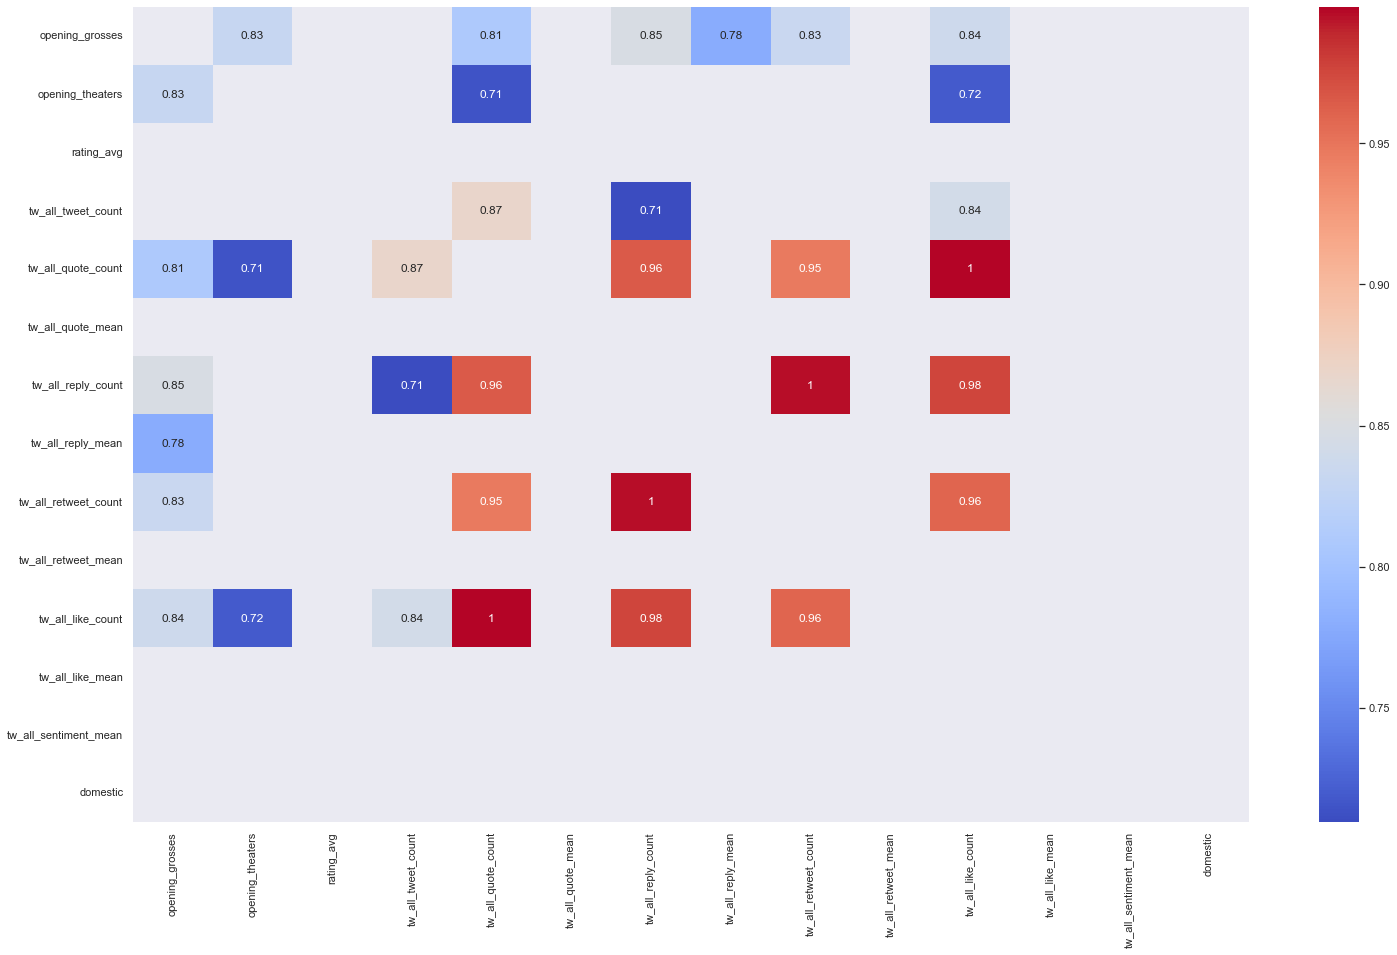

In [198]:
# Comedy 12
corrMatrix = df_movie_genres_corr[df_movie_genres["genre_id"] == 4].corr()
sns.set(rc = {'figure.figsize':(25,15)})
filteredCorrMatrix = corrMatrix[((corrMatrix >= .7) | (corrMatrix <= -.7)) & (corrMatrix !=1.000)]
sns.heatmap(filteredCorrMatrix, annot = True, cmap= 'coolwarm')

<AxesSubplot:>

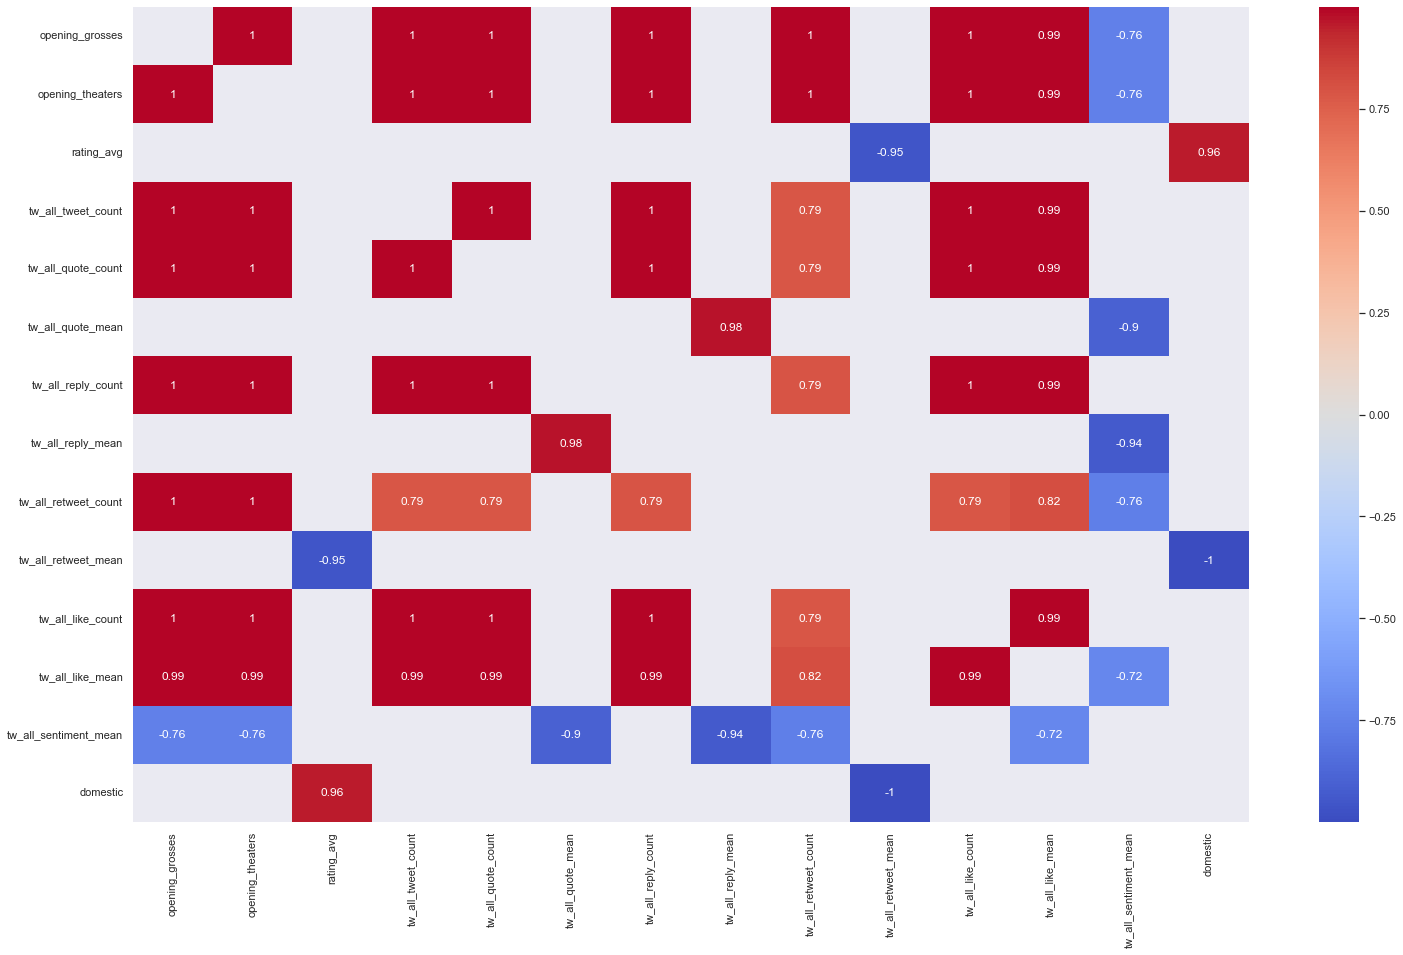

In [199]:
# Crime 4
corrMatrix = df_movie_genres_corr[df_movie_genres["genre_id"] == 5].corr()
sns.set(rc = {'figure.figsize':(25,15)})
filteredCorrMatrix = corrMatrix[((corrMatrix >= .7) | (corrMatrix <= -.7)) & (corrMatrix !=1.000)]
sns.heatmap(filteredCorrMatrix, annot = True, cmap= 'coolwarm')

<AxesSubplot:>

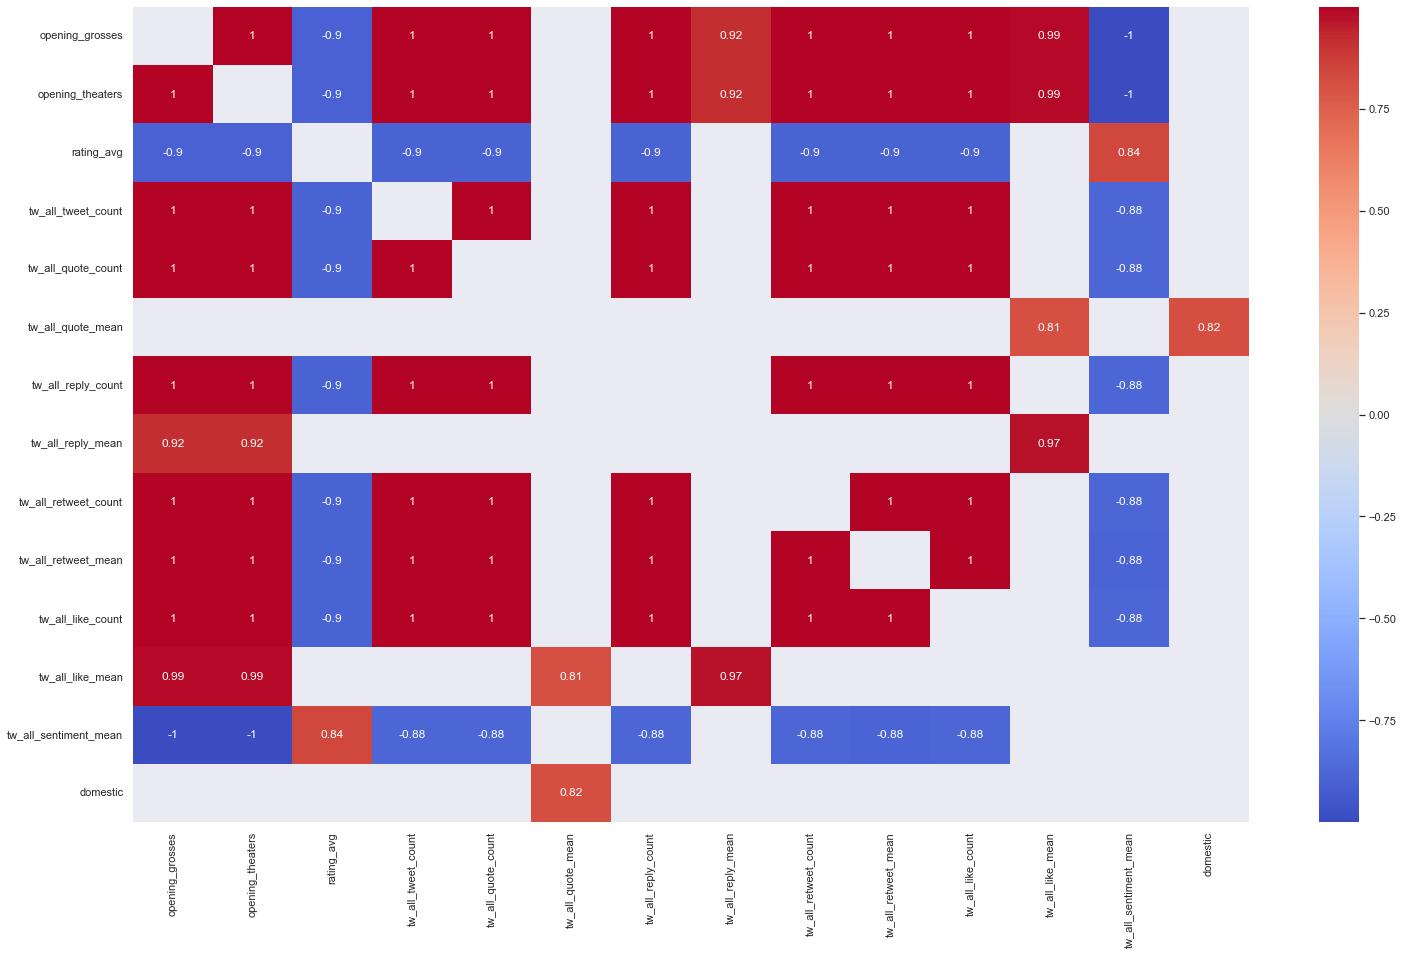

In [200]:
# Documentary 5
corrMatrix = df_movie_genres_corr[df_movie_genres["genre_id"] == 6].corr()
sns.set(rc = {'figure.figsize':(25,15)})
filteredCorrMatrix = corrMatrix[((corrMatrix >= .7) | (corrMatrix <= -.7)) & (corrMatrix !=1.000)]
sns.heatmap(filteredCorrMatrix, annot = True, cmap= 'coolwarm')

<AxesSubplot:>

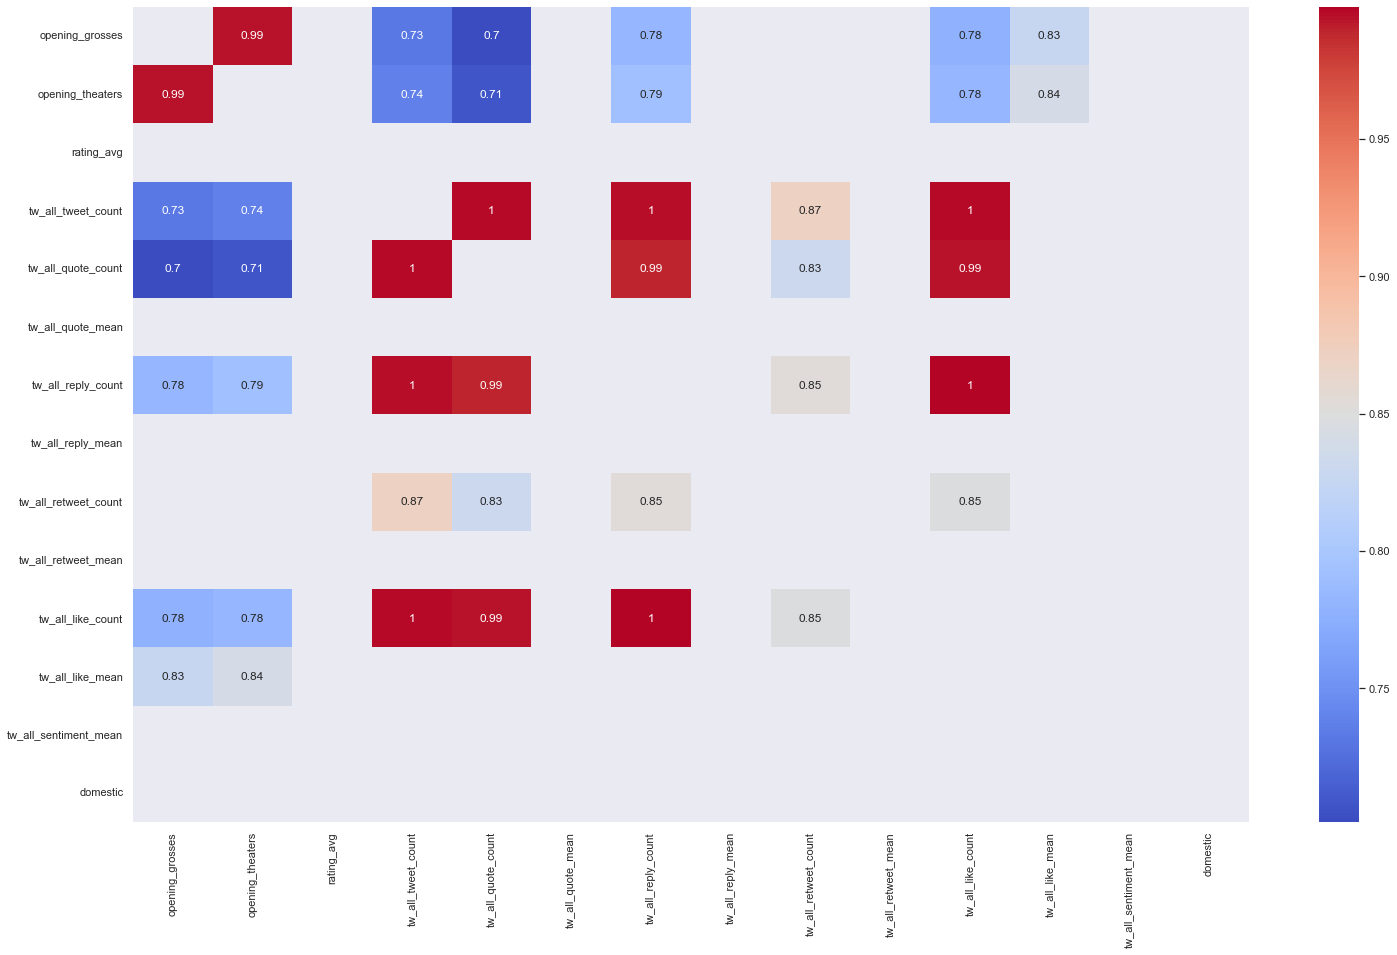

In [201]:
# Drama 15
corrMatrix = df_movie_genres_corr[df_movie_genres["genre_id"] == 7].corr()
sns.set(rc = {'figure.figsize':(25,15)})
filteredCorrMatrix = corrMatrix[((corrMatrix >= .7) | (corrMatrix <= -.7)) & (corrMatrix !=1.000)]
sns.heatmap(filteredCorrMatrix, annot = True, cmap= 'coolwarm')

<AxesSubplot:>

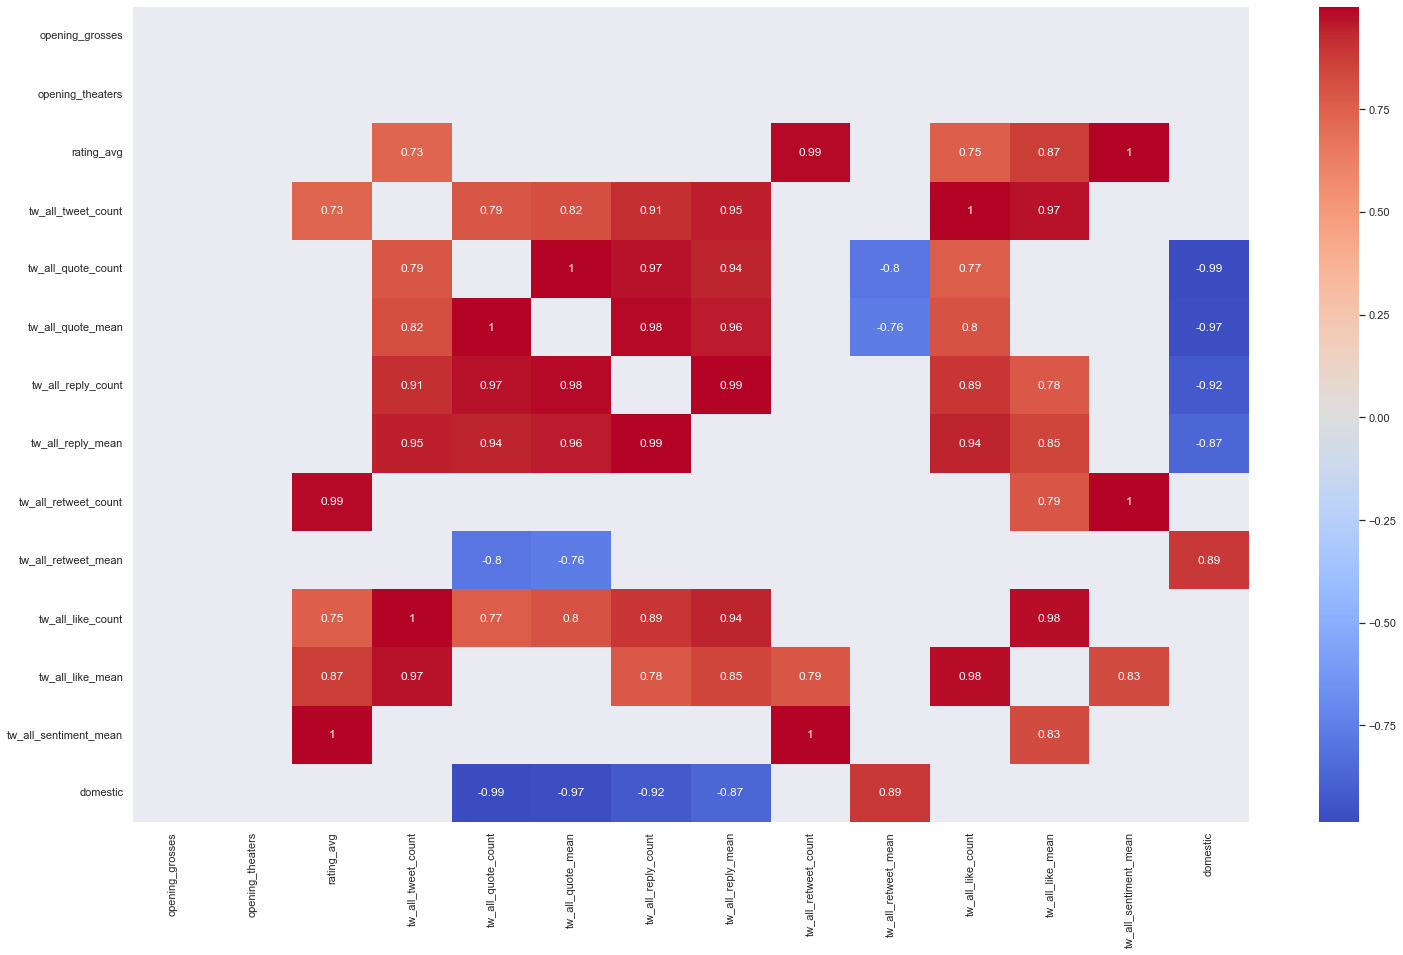

In [202]:
# Family 3
corrMatrix = df_movie_genres_corr[df_movie_genres["genre_id"] == 8].corr()
sns.set(rc = {'figure.figsize':(25,15)})
filteredCorrMatrix = corrMatrix[((corrMatrix >= .7) | (corrMatrix <= -.7)) & (corrMatrix !=1.000)]
sns.heatmap(filteredCorrMatrix, annot = True, cmap= 'coolwarm')

<AxesSubplot:>

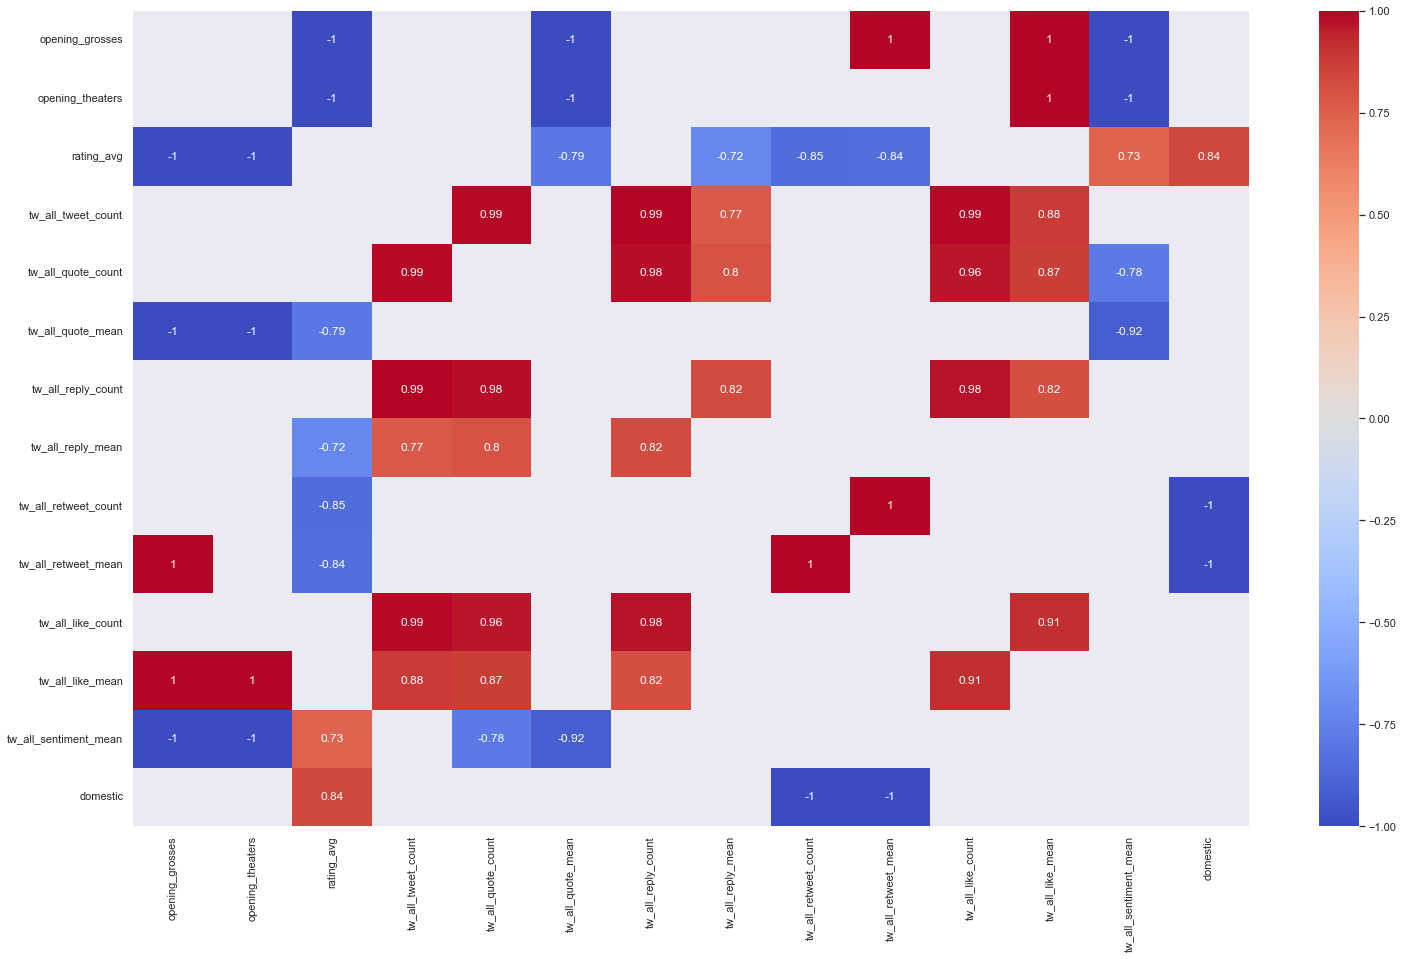

In [203]:
# Fantasy 4
corrMatrix = df_movie_genres_corr[df_movie_genres["genre_id"] == 9].corr()
sns.set(rc = {'figure.figsize':(25,15)})
filteredCorrMatrix = corrMatrix[((corrMatrix >= .7) | (corrMatrix <= -.7)) & (corrMatrix !=1.000)]
sns.heatmap(filteredCorrMatrix, annot = True, cmap= 'coolwarm')

/Users/victormyeste/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/victormyeste/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<AxesSubplot:>

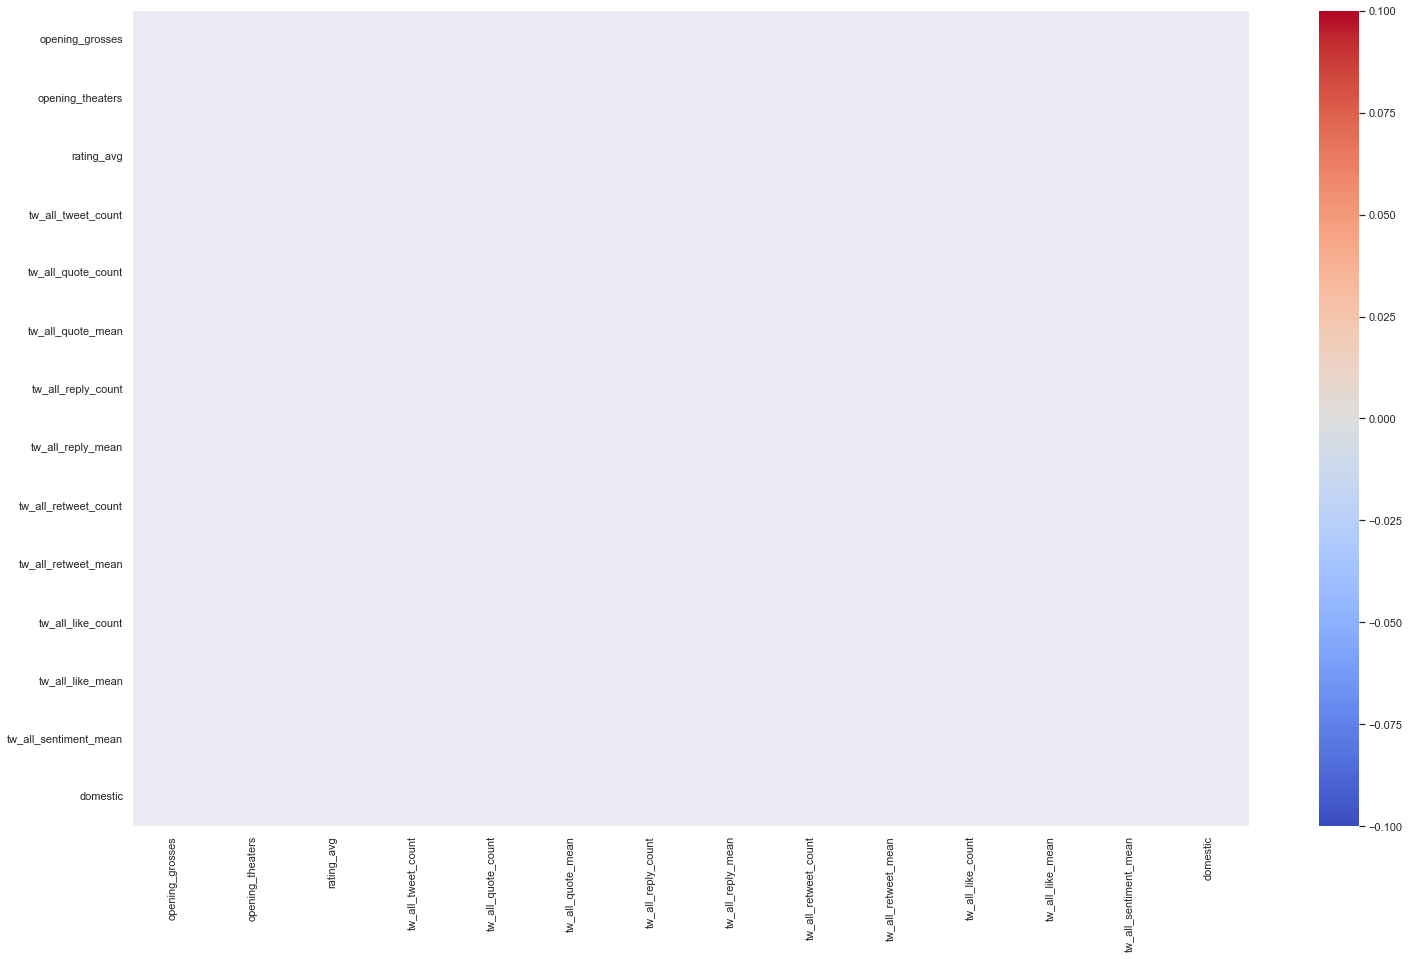

In [204]:
# History 1
corrMatrix = df_movie_genres_corr[df_movie_genres["genre_id"] == 10].corr()
sns.set(rc = {'figure.figsize':(25,15)})
filteredCorrMatrix = corrMatrix[((corrMatrix >= .7) | (corrMatrix <= -.7)) & (corrMatrix !=1.000)]
sns.heatmap(filteredCorrMatrix, annot = True, cmap= 'coolwarm')

<AxesSubplot:>

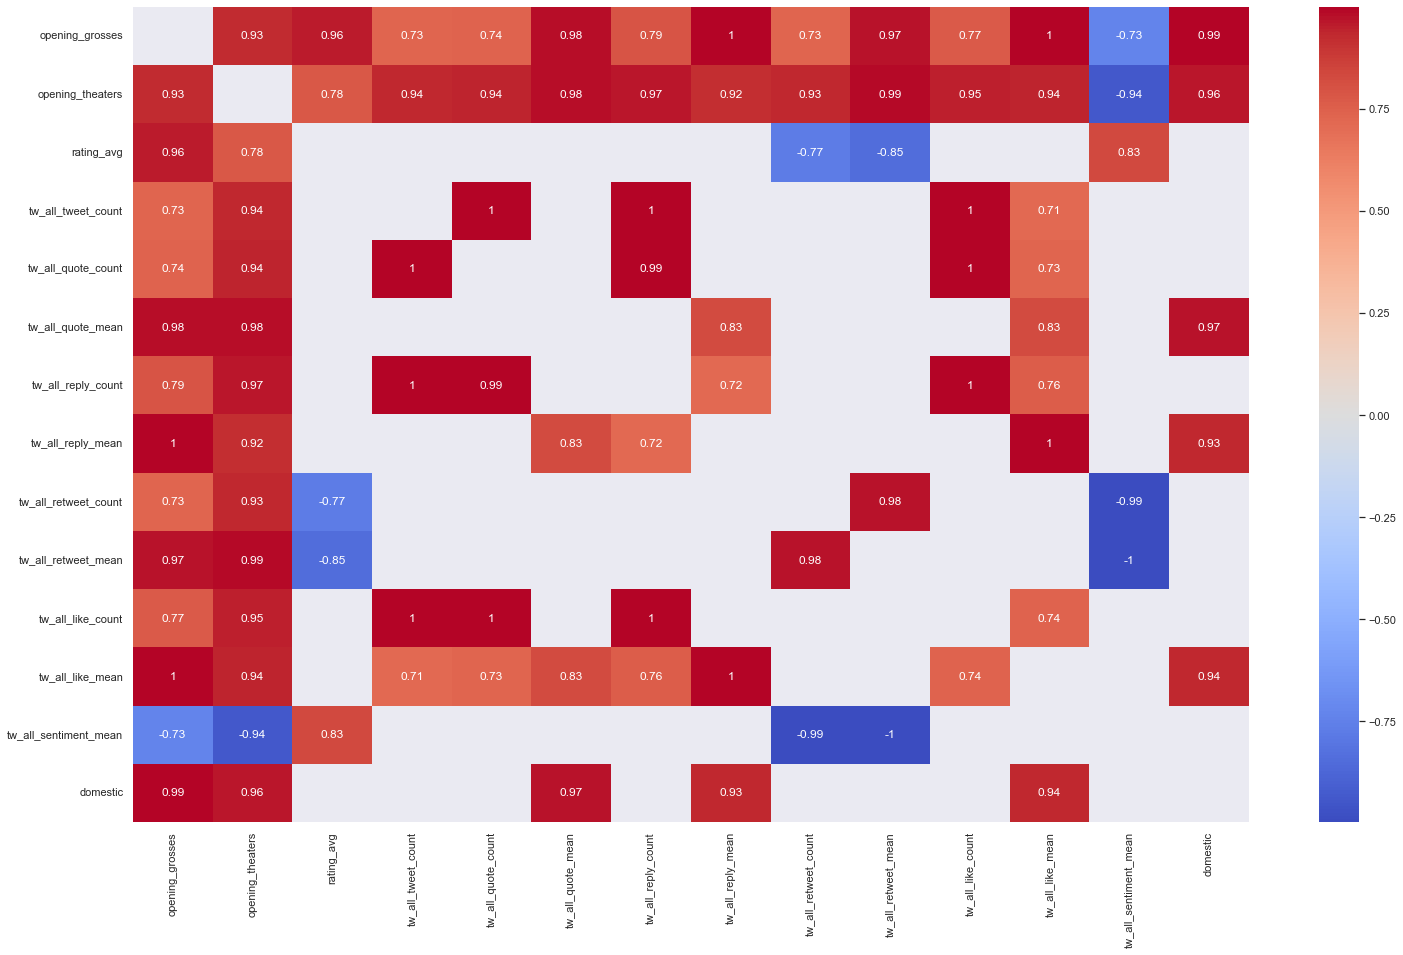

In [205]:
# Horror 4
corrMatrix = df_movie_genres_corr[df_movie_genres["genre_id"] == 11].corr()
sns.set(rc = {'figure.figsize':(25,15)})
filteredCorrMatrix = corrMatrix[((corrMatrix >= .7) | (corrMatrix <= -.7)) & (corrMatrix !=1.000)]
sns.heatmap(filteredCorrMatrix, annot = True, cmap= 'coolwarm')

<AxesSubplot:>

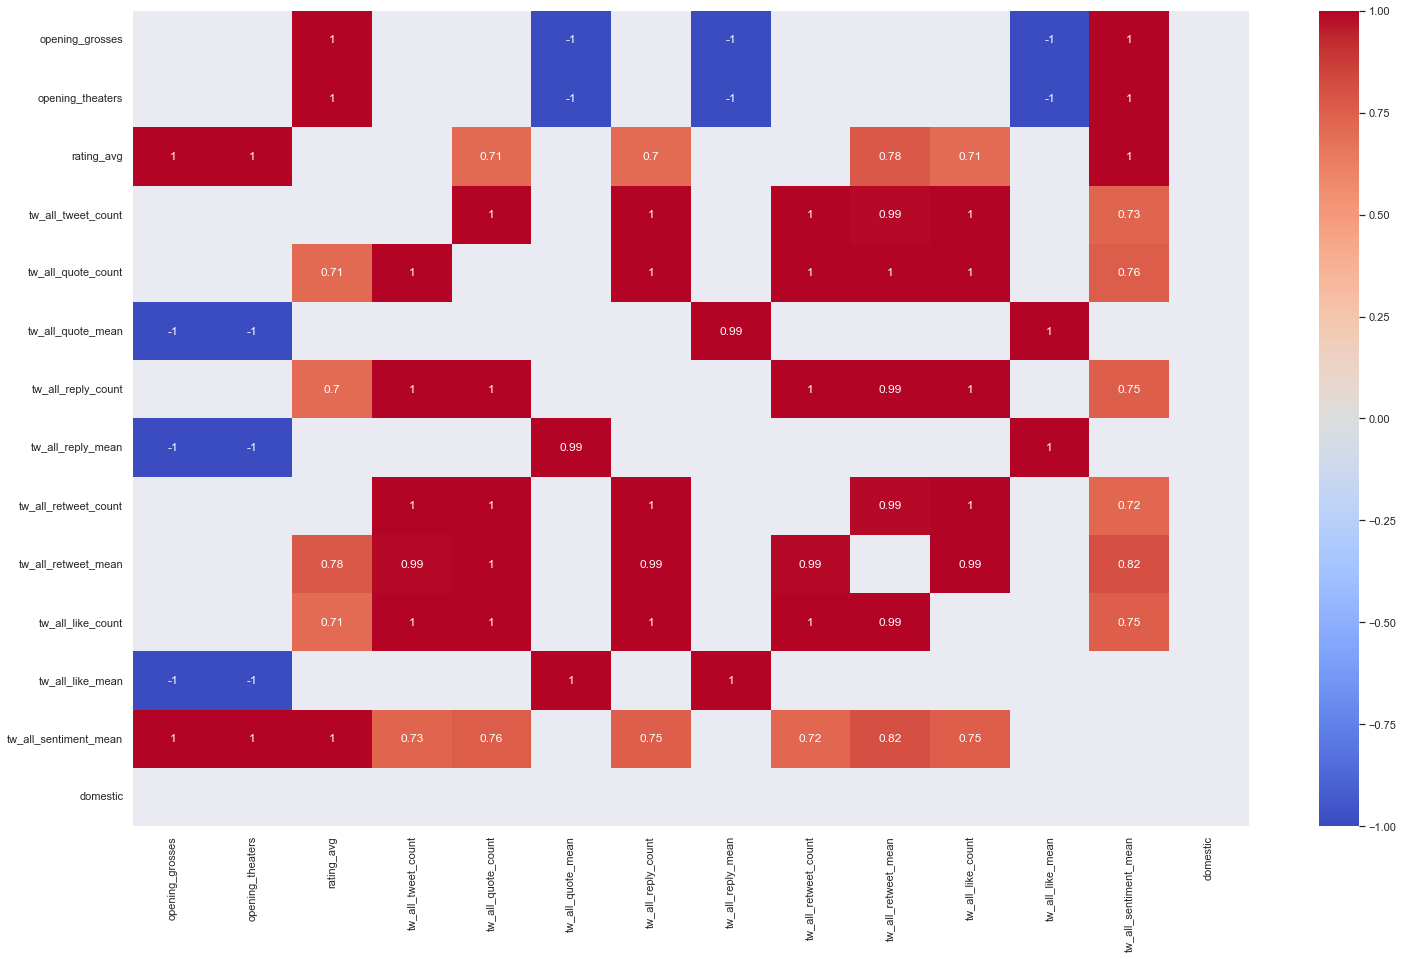

In [206]:
# Music 3
corrMatrix = df_movie_genres_corr[df_movie_genres["genre_id"] == 12].corr()
sns.set(rc = {'figure.figsize':(25,15)})
filteredCorrMatrix = corrMatrix[((corrMatrix >= .7) | (corrMatrix <= -.7)) & (corrMatrix !=1.000)]
sns.heatmap(filteredCorrMatrix, annot = True, cmap= 'coolwarm')

<AxesSubplot:>

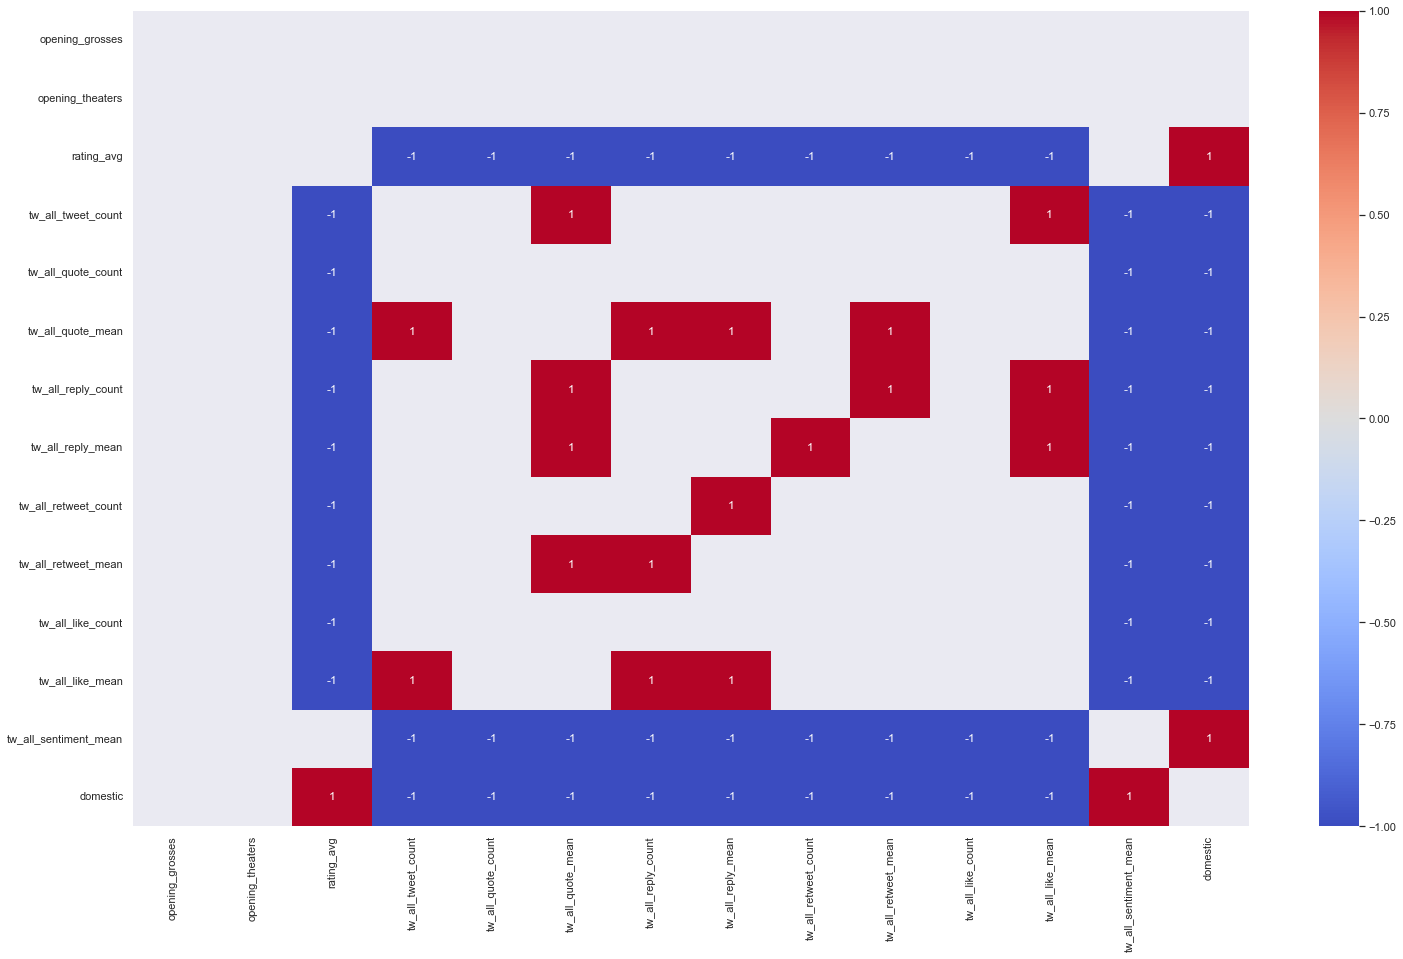

In [207]:
# Musical 2
corrMatrix = df_movie_genres_corr[df_movie_genres["genre_id"] == 13].corr()
sns.set(rc = {'figure.figsize':(25,15)})
filteredCorrMatrix = corrMatrix[((corrMatrix >= .7) | (corrMatrix <= -.7)) & (corrMatrix !=1.000)]
sns.heatmap(filteredCorrMatrix, annot = True, cmap= 'coolwarm')

<AxesSubplot:>

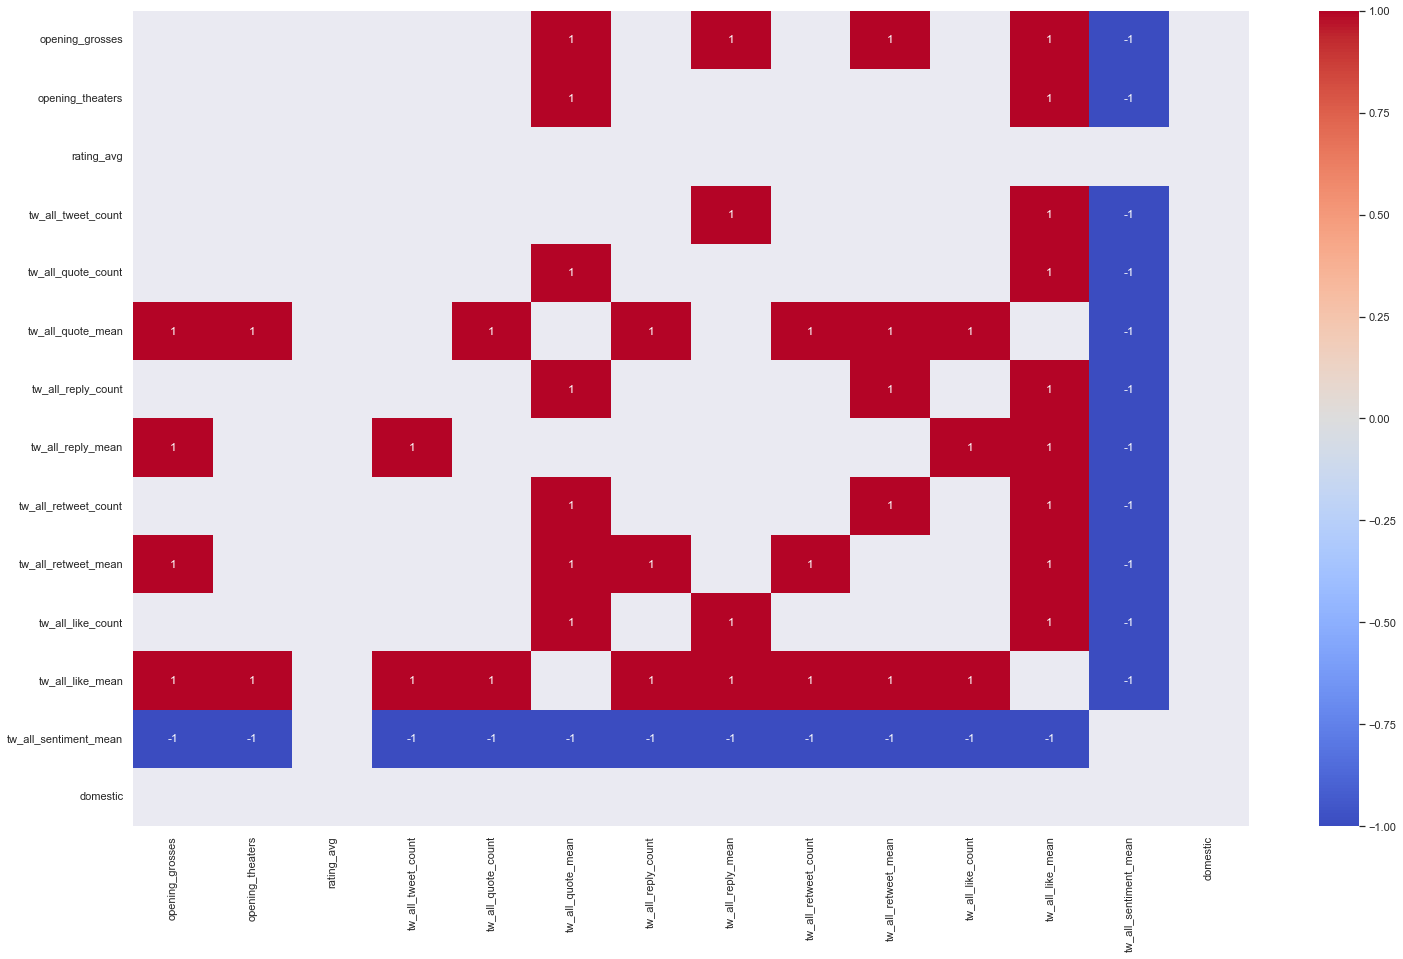

In [208]:
# Mystery 2
corrMatrix = df_movie_genres_corr[df_movie_genres["genre_id"] == 14].corr()
sns.set(rc = {'figure.figsize':(25,15)})
filteredCorrMatrix = corrMatrix[((corrMatrix >= .7) | (corrMatrix <= -.7)) & (corrMatrix !=1.000)]
sns.heatmap(filteredCorrMatrix, annot = True, cmap= 'coolwarm')

<AxesSubplot:>

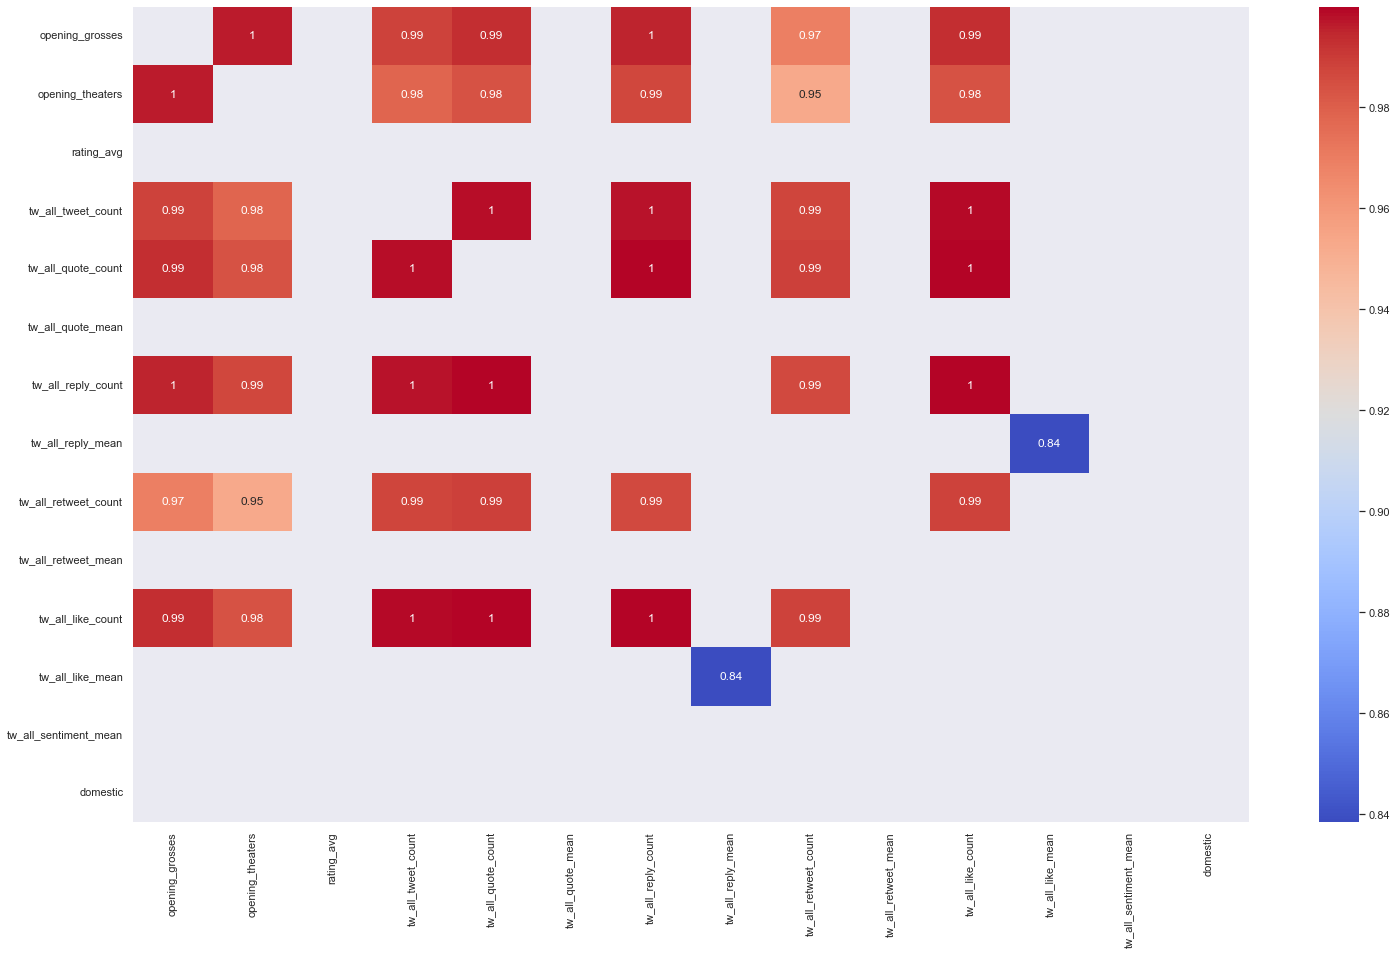

In [209]:
# Romance 7
corrMatrix = df_movie_genres_corr[df_movie_genres["genre_id"] == 15].corr()
sns.set(rc = {'figure.figsize':(25,15)})
filteredCorrMatrix = corrMatrix[((corrMatrix >= .7) | (corrMatrix <= -.7)) & (corrMatrix !=1.000)]
sns.heatmap(filteredCorrMatrix, annot = True, cmap= 'coolwarm')

<AxesSubplot:>

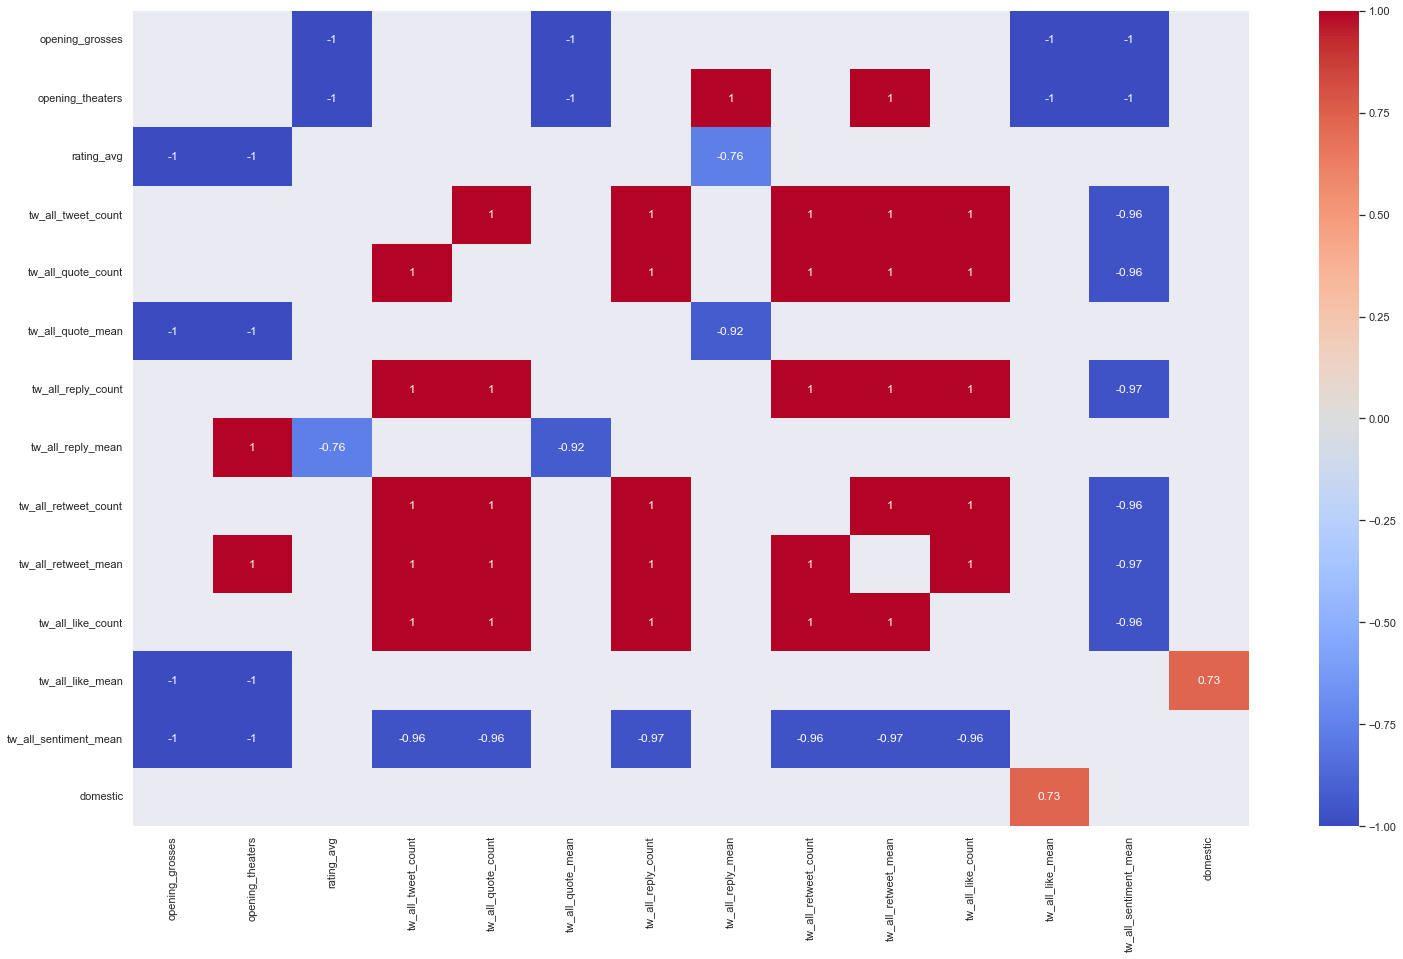

In [210]:
# Sci-Fi 4
corrMatrix = df_movie_genres_corr[df_movie_genres["genre_id"] == 16].corr()
sns.set(rc = {'figure.figsize':(25,15)})
filteredCorrMatrix = corrMatrix[((corrMatrix >= .7) | (corrMatrix <= -.7)) & (corrMatrix !=1.000)]
sns.heatmap(filteredCorrMatrix, annot = True, cmap= 'coolwarm')

<AxesSubplot:>

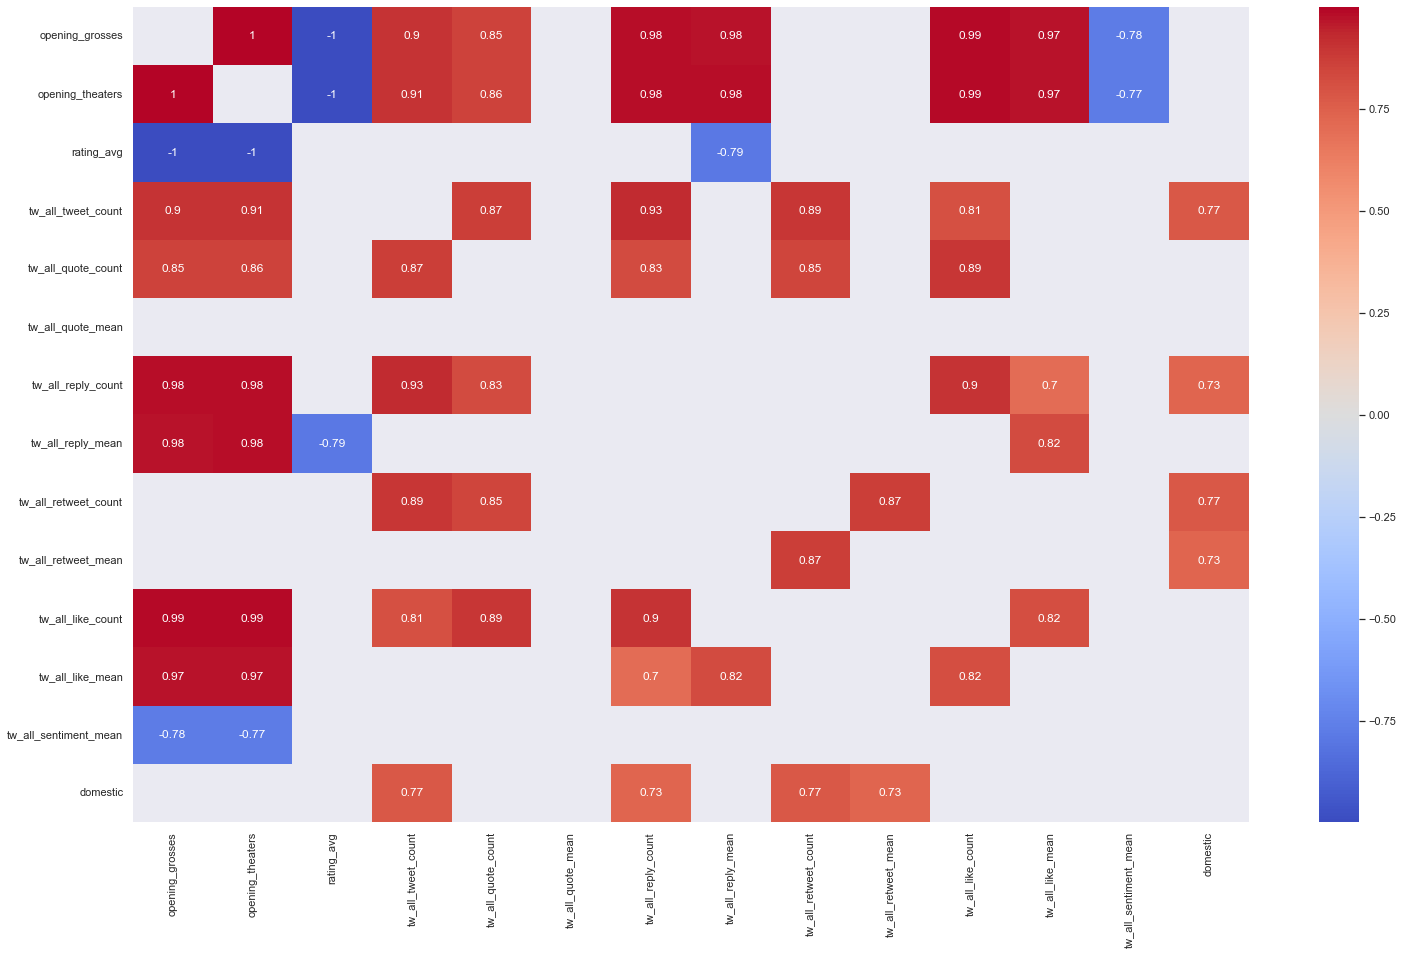

In [211]:
# Thriller 6
corrMatrix = df_movie_genres_corr[df_movie_genres["genre_id"] == 17].corr()
sns.set(rc = {'figure.figsize':(25,15)})
filteredCorrMatrix = corrMatrix[((corrMatrix >= .7) | (corrMatrix <= -.7)) & (corrMatrix !=1.000)]
sns.heatmap(filteredCorrMatrix, annot = True, cmap= 'coolwarm')

# COIME 2022

In [212]:
df

id                           name                   hashtag  \
0    1                Jackass Forever            jackassforever   
1    2                       Moonfall                  moonfall   
2    3          The Wolf and the Lion         thewolfandthelion   
3    4             Only Fools Rush In           onlyfoolsrushin   
4    5  The Worst Person in the World  theworstpersonintheworld   
5    6                 Breaking Bread             breakingbread   
6    7                         Lingui                    lingui   
7    8                 The Long Night              thelongnight   
8    9                 Last Survivors             lastsurvivors   
9   10                       Marry Me              marrymemovie   
10  11              Death on the Nile            deathonthenile   
11  12                     Blacklight           blacklightmovie   
12  13             Catch the Fair One           catchthefairone   
13  14              Water Gate Bridge           watergatebridge   
14  15      Fabian: Going to the Dogs      fabiangoingtothedogs   
15  16                      Supercool                 supercool   
16  17                       Ronnie's                   ronnies   
17  18                    Cosmic Dawn                cosmicdawn   
18  19                   Give or Take                giveortake   
19  20                      Uncharted                 uncharted   
20  21                            Dog                  dogmovie   
21  22                     The Cursed                 thecursed   
22  23                      A Banquet                  abanquet   
23  24                          Ted K                      tedk   
24  25             Strawberry Mansion         strawberrymansion   
25  26               Too Cool to Kill             toocooltokill   
26  27                    The Automat                theautomat   
27  28                 Finding Carlos        findingcarlosmovie   
28  29         A Fairy Tale After All        afairytaleafterall   
29  30                     Studio 666                 studio666   
30  31                         Cyrano               cyranomovie   
31  32                         Butter            butterthemovie   
32  33                The Burning Sea             theburningsea   
33  34                   Let Me Be Me                 letmebeme   
34  35             The Desperate Hour          thedesperatehour   
35  36                     Moon Manor                 moonmanor   

                                    countries   mpaa  \
0                               United States      R   
1   United States;China;United Kingdom;Canada  PG-13   
2                               France;Canada     PG   
3                                       China   None   
4                Norway;France;Sweden;Denmark      R   
5                        United States;Israel   None   
6                 Chad;France;Belgium;Germany   None   
7                               United States      R   
8                               United States   None   
9                         United States;Japan  PG-13   
10               United States;United Kingdom  PG-13   
11              United States;Australia;China  PG-13   
12                              United States   None   
13                                      China   None   
14                                    Germany   None   
15               Canada;Finland;United States   None   
16                             United Kingdom   None   
17                                     Canada   None   
18                              United States   None   
19                        United States;Spain  PG-13   
20                              United States  PG-13   
21                              United States      R   
22                             United Kingdom   None   
23                              United States      R   
24                              United States   None   
25                                      China   None   
26          

In [213]:
df['opening_grosses_cat'] = pd.qcut(df.opening_grosses, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [214]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(opening_grosses_cat)')
res.anova_summary

df     sum_sq   mean_sq      F    PR(>F)
C(opening_grosses_cat)   3.0   3.241695  1.080565  1.366  0.280454
Residual                21.0  16.611905  0.791043    NaN       NaN

In [218]:
df['opening_theaters_cat'] = pd.qcut(df.opening_theaters, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [219]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(opening_theaters_cat)')
res.anova_summary

df     sum_sq   mean_sq         F    PR(>F)
C(opening_theaters_cat)   3.0   9.388362  3.129454  6.279698  0.003275
Residual                 21.0  10.465238  0.498345       NaN       NaN

In [220]:
df['tw_all_tweet_count_cat'] = pd.qcut(df.tw_all_tweet_count, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [223]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_all_tweet_count_cat)')
res.anova_summary

df     sum_sq   mean_sq         F    PR(>F)
C(tw_all_tweet_count_cat)   3.0  12.787500  4.262500  3.552495  0.025126
Residual                   32.0  38.395556  1.199861       NaN       NaN

In [224]:
df['tw_t1_tweet_count_cat'] = pd.qcut(df.tw_t1_tweet_count, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [225]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_t1_tweet_count_cat)')
res.anova_summary

df     sum_sq   mean_sq         F    PR(>F)
C(tw_t1_tweet_count_cat)   3.0  18.900429  6.300143  6.777874  0.001204
Residual                  31.0  28.815000  0.929516       NaN       NaN

In [226]:
df['tw_t2_tweet_count_cat'] = pd.qcut(df.tw_t2_tweet_count, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [227]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_t2_tweet_count_cat)')
res.anova_summary

df     sum_sq   mean_sq         F    PR(>F)
C(tw_t2_tweet_count_cat)   3.0  13.876389  4.625463  3.967516  0.016394
Residual                  32.0  37.306667  1.165833       NaN       NaN

In [228]:
df['tw_t3_tweet_count_cat'] = pd.qcut(df.tw_t3_tweet_count, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [229]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_t3_tweet_count_cat)')
res.anova_summary

df     sum_sq   mean_sq        F    PR(>F)
C(tw_t3_tweet_count_cat)   3.0  17.413068  5.804356  6.34984  0.001921
Residual                  29.0  26.508750  0.914095      NaN       NaN

In [230]:
df['tw_all_quote_count_cat'] = pd.qcut(df.tw_all_quote_count, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [231]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_all_quote_count_cat)')
res.anova_summary

df     sum_sq   mean_sq         F    PR(>F)
C(tw_all_quote_count_cat)   3.0   9.587750  3.195917  2.458675  0.080732
Residual                   32.0  41.595306  1.299853       NaN       NaN

In [232]:
df['tw_t1_quote_count_cat'] = pd.qcut(df.tw_t1_quote_count, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [235]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_t1_quote_count_cat)')
res.anova_summary

df     sum_sq   mean_sq         F   PR(>F)
C(tw_t1_quote_count_cat)   3.0  22.347873  7.449291  9.103282  0.00018
Residual                  31.0  25.367556  0.818308       NaN      NaN

In [233]:
df['tw_t2_quote_count_cat'] = pd.qcut(df.tw_t2_quote_count, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [238]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_t2_quote_count_cat)')
res.anova_summary

df     sum_sq   mean_sq         F    PR(>F)
C(tw_t2_quote_count_cat)   3.0  11.401380  3.800460  3.057054  0.042324
Residual                  32.0  39.781675  1.243177       NaN       NaN

In [234]:
df['tw_t3_quote_count_cat'] = pd.qcut(df.tw_t3_quote_count, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [239]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_t3_quote_count_cat)')
res.anova_summary

df     sum_sq   mean_sq         F    PR(>F)
C(tw_t3_quote_count_cat)   3.0   5.455735  1.818578  1.371046  0.271232
Residual                  29.0  38.466083  1.326417       NaN       NaN

In [240]:
df['tw_all_quote_mean_cat'] = pd.qcut(df.tw_all_quote_mean, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [241]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_all_quote_mean_cat)')
res.anova_summary

df     sum_sq   mean_sq        F    PR(>F)
C(tw_all_quote_mean_cat)   3.0   4.360833  1.453611  0.99345  0.408379
Residual                  32.0  46.822222  1.463194      NaN       NaN

In [242]:
df['tw_t1_quote_mean_cat'] = pd.qcut(df.tw_t1_quote_mean, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [245]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_t1_quote_mean_cat)')
res.anova_summary

df     sum_sq   mean_sq         F    PR(>F)
C(tw_t1_quote_mean_cat)   3.0   5.608901  1.869634  1.376476  0.268275
Residual                 31.0  42.106528  1.358275       NaN       NaN

In [243]:
df['tw_t2_quote_mean_cat'] = pd.qcut(df.tw_t2_quote_mean, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [246]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_t2_quote_mean_cat)')
res.anova_summary

df     sum_sq   mean_sq         F    PR(>F)
C(tw_t2_quote_mean_cat)   3.0   2.745278  0.915093  0.604548  0.616853
Residual                 32.0  48.437778  1.513681       NaN       NaN

In [244]:
df['tw_t3_quote_mean_cat'] = pd.qcut(df.tw_t3_quote_mean, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [247]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_t3_quote_mean_cat)')
res.anova_summary

df     sum_sq   mean_sq         F    PR(>F)
C(tw_t3_quote_mean_cat)   3.0   1.797513  0.599171  0.412492  0.745262
Residual                 29.0  42.124306  1.452562       NaN       NaN

In [248]:
df['tw_all_reply_count_cat'] = pd.qcut(df.tw_all_reply_count, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [249]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_all_reply_count_cat)')
res.anova_summary

df     sum_sq   mean_sq         F   PR(>F)
C(tw_all_reply_count_cat)   3.0  15.589520  5.196507  4.671866  0.00811
Residual                   32.0  35.593535  1.112298       NaN      NaN

In [250]:
df['tw_t1_reply_count_cat'] = pd.qcut(df.tw_t1_reply_count, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [253]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_t1_reply_count_cat)')
res.anova_summary

df     sum_sq   mean_sq         F    PR(>F)
C(tw_t1_reply_count_cat)   3.0  23.392234  7.797411  9.937829  0.000096
Residual                  31.0  24.323194  0.784619       NaN       NaN

In [251]:
df['tw_t2_reply_count_cat'] = pd.qcut(df.tw_t2_reply_count, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [254]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_t2_reply_count_cat)')
res.anova_summary

df     sum_sq   mean_sq         F    PR(>F)
C(tw_t2_reply_count_cat)   3.0  11.571944  3.857315  3.116148  0.039745
Residual                  32.0  39.611111  1.237847       NaN       NaN

In [252]:
df['tw_t3_reply_count_cat'] = pd.qcut(df.tw_t3_reply_count, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [255]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_t3_reply_count_cat)')
res.anova_summary

df     sum_sq   mean_sq         F    PR(>F)
C(tw_t3_reply_count_cat)   3.0   7.573763  2.524588  2.014222  0.133894
Residual                  29.0  36.348056  1.253381       NaN       NaN

In [256]:
df['tw_all_reply_mean_cat'] = pd.qcut(df.tw_all_reply_mean, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [257]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_all_reply_mean_cat)')
res.anova_summary

df     sum_sq   mean_sq         F    PR(>F)
C(tw_all_reply_mean_cat)   3.0   7.067500  2.355833  1.708845  0.184873
Residual                  32.0  44.115556  1.378611       NaN       NaN

In [258]:
df['tw_t1_reply_mean_cat'] = pd.qcut(df.tw_t1_reply_mean, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [261]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_t1_reply_mean_cat)')
res.anova_summary

df     sum_sq   mean_sq         F   PR(>F)
C(tw_t1_reply_mean_cat)   3.0   8.157651  2.719217  2.130952  0.11641
Residual                 31.0  39.557778  1.276057       NaN      NaN

In [259]:
df['tw_t2_reply_mean_cat'] = pd.qcut(df.tw_t2_reply_mean, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [262]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_t2_reply_mean_cat)')
res.anova_summary

df     sum_sq   mean_sq        F    PR(>F)
C(tw_t2_reply_mean_cat)   3.0   1.727500  0.575833  0.37259  0.773312
Residual                 32.0  49.455556  1.545486      NaN       NaN

In [260]:
df['tw_t3_reply_mean_cat'] = pd.qcut(df.tw_t3_reply_mean, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [263]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_t3_reply_mean_cat)')
res.anova_summary

df     sum_sq   mean_sq         F    PR(>F)
C(tw_t3_reply_mean_cat)   3.0   3.689068  1.229689  0.886367  0.459757
Residual                 29.0  40.232750  1.387336       NaN       NaN

In [264]:
df['tw_all_retweet_count_cat'] = pd.qcut(df.tw_all_retweet_count, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [265]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_all_retweet_count_cat)')
res.anova_summary

df     sum_sq   mean_sq         F    PR(>F)
C(tw_all_retweet_count_cat)   3.0   8.343056  2.781019  2.077325  0.122793
Residual                     32.0  42.840000  1.338750       NaN       NaN

In [266]:
df['tw_t1_retweet_count_cat'] = pd.qcut(df.tw_t1_retweet_count, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [267]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_t1_retweet_count_cat)')
res.anova_summary

df     sum_sq   mean_sq         F    PR(>F)
C(tw_t1_retweet_count_cat)   3.0  11.324317  3.774772  3.215564  0.036248
Residual                    31.0  36.391111  1.173907       NaN       NaN

In [268]:
df['tw_t2_retweet_count_cat'] = pd.qcut(df.tw_t2_retweet_count, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [270]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_t2_retweet_count_cat)')
res.anova_summary

df     sum_sq   mean_sq         F    PR(>F)
C(tw_t2_retweet_count_cat)   3.0   7.876389  2.625463  1.939997  0.142973
Residual                    32.0  43.306667  1.353333       NaN       NaN

In [269]:
df['tw_t3_retweet_count_cat'] = pd.qcut(df.tw_t3_retweet_count, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [271]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_t3_retweet_count_cat)')
res.anova_summary

df     sum_sq   mean_sq         F    PR(>F)
C(tw_t3_retweet_count_cat)   3.0  14.466679  4.822226  4.747714  0.008187
Residual                    29.0  29.455139  1.015694       NaN       NaN

In [272]:
df['tw_all_retweet_mean_cat'] = pd.qcut(df.tw_all_retweet_mean, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [273]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_all_retweet_mean_cat)')
res.anova_summary

df     sum_sq   mean_sq         F    PR(>F)
C(tw_all_retweet_mean_cat)   3.0   8.671944  2.890648  2.175919  0.110123
Residual                    32.0  42.511111  1.328472       NaN       NaN

In [274]:
df['tw_t1_retweet_mean_cat'] = pd.qcut(df.tw_t1_retweet_mean, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [277]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_t1_retweet_mean_cat)')
res.anova_summary

df     sum_sq   mean_sq        F   PR(>F)
C(tw_t1_retweet_mean_cat)   3.0  10.824317  3.608106  3.03193  0.04399
Residual                   31.0  36.891111  1.190036      NaN      NaN

In [275]:
df['tw_t2_retweet_mean_cat'] = pd.qcut(df.tw_t2_retweet_mean, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [278]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_t2_retweet_mean_cat)')
res.anova_summary

df     sum_sq   mean_sq        F    PR(>F)
C(tw_t2_retweet_mean_cat)   3.0   3.907500  1.302500  0.88164  0.460968
Residual                   32.0  47.275556  1.477361      NaN       NaN

In [276]:
df['tw_t3_retweet_mean_cat'] = pd.qcut(df.tw_t3_retweet_mean, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [279]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_t3_retweet_mean_cat)')
res.anova_summary

df     sum_sq   mean_sq         F    PR(>F)
C(tw_t3_retweet_mean_cat)   3.0   7.778763  2.592921  2.080474  0.124569
Residual                   29.0  36.143056  1.246312       NaN       NaN

In [280]:
df['tw_all_like_count_cat'] = pd.qcut(df.tw_all_like_count, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [281]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_all_like_count_cat)')
res.anova_summary

df     sum_sq   mean_sq         F   PR(>F)
C(tw_all_like_count_cat)   3.0  10.369722  3.456574  2.710153  0.06142
Residual                  32.0  40.813333  1.275417       NaN      NaN

In [282]:
df['tw_t1_like_count_cat'] = pd.qcut(df.tw_t1_like_count, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [285]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_t1_like_count_cat)')
res.anova_summary

df     sum_sq   mean_sq         F    PR(>F)
C(tw_t1_like_count_cat)   3.0  21.732234  7.244078  8.642756  0.000257
Residual                 31.0  25.983194  0.838168       NaN       NaN

In [283]:
df['tw_t2_like_count_cat'] = pd.qcut(df.tw_t2_like_count, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [286]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_t2_like_count_cat)')
res.anova_summary

df     sum_sq   mean_sq         F    PR(>F)
C(tw_t2_like_count_cat)   3.0   8.609722  2.869907  2.157149  0.112427
Residual                 32.0  42.573333  1.330417       NaN       NaN

In [284]:
df['tw_t3_like_count_cat'] = pd.qcut(df.tw_t3_like_count, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [287]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_t3_like_count_cat)')
res.anova_summary

df     sum_sq   mean_sq        F    PR(>F)
C(tw_t3_like_count_cat)   3.0   7.682096  2.560699  2.04914  0.128893
Residual                 29.0  36.239722  1.249646      NaN       NaN

In [288]:
df['tw_all_like_mean_cat'] = pd.qcut(df.tw_all_like_mean, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [289]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_all_like_mean_cat)')
res.anova_summary

df     sum_sq   mean_sq         F    PR(>F)
C(tw_all_like_mean_cat)   3.0   1.263056  0.421019  0.269884  0.846622
Residual                 32.0  49.920000  1.560000       NaN       NaN

In [290]:
df['tw_t1_like_mean_cat'] = pd.qcut(df.tw_t1_like_mean, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [293]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_t1_like_mean_cat)')
res.anova_summary

df     sum_sq   mean_sq         F    PR(>F)
C(tw_t1_like_mean_cat)   3.0  15.224873  5.074958  4.842136  0.007058
Residual                31.0  32.490556  1.048082       NaN       NaN

In [291]:
df['tw_t2_like_mean_cat'] = pd.qcut(df.tw_t2_like_mean, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [294]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_t2_like_mean_cat)')
res.anova_summary

df     sum_sq   mean_sq         F    PR(>F)
C(tw_t2_like_mean_cat)   3.0   9.916389  3.305463  2.563202  0.072036
Residual                32.0  41.266667  1.289583       NaN       NaN

In [292]:
df['tw_t3_like_mean_cat'] = pd.qcut(df.tw_t3_like_mean, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [295]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_t3_like_mean_cat)')
res.anova_summary

df     sum_sq   mean_sq         F    PR(>F)
C(tw_t3_like_mean_cat)   3.0  12.909179  4.303060  4.023802  0.016488
Residual                29.0  31.012639  1.069401       NaN       NaN

In [296]:
df['tw_all_sentiment_mean_cat'] = pd.qcut(df.tw_all_sentiment_mean, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [297]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_all_sentiment_mean_cat)')
res.anova_summary

df     sum_sq   mean_sq         F    PR(>F)
C(tw_all_sentiment_mean_cat)   3.0  21.520833  7.173611  7.738987  0.000504
Residual                      32.0  29.662222  0.926944       NaN       NaN

In [298]:
df['tw_t1_sentiment_mean_cat'] = pd.qcut(df.tw_t1_sentiment_mean, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [301]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_t1_sentiment_mean_cat)')
res.anova_summary

df     sum_sq   mean_sq         F    PR(>F)
C(tw_t1_sentiment_mean_cat)   3.0   4.475984  1.491995  1.069668  0.376202
Residual                     31.0  43.239444  1.394821       NaN       NaN

In [299]:
df['tw_t2_sentiment_mean_cat'] = pd.qcut(df.tw_t2_sentiment_mean, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [302]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_t2_sentiment_mean_cat)')
res.anova_summary

df     sum_sq   mean_sq         F   PR(>F)
C(tw_t2_sentiment_mean_cat)   3.0  17.183056  5.727685  5.390763  0.00406
Residual                     32.0  34.000000  1.062500       NaN      NaN

In [300]:
df['tw_t3_sentiment_mean_cat'] = pd.qcut(df.tw_t3_sentiment_mean, 4, labels = ["Q1", "Q2", "Q3", "Q4"])

In [303]:
res = stat()
res.anova_stat(df=df, res_var='rating_avg', anova_model='rating_avg ~ C(tw_t3_sentiment_mean_cat)')
res.anova_summary

df     sum_sq   mean_sq         F    PR(>F)
C(tw_t3_sentiment_mean_cat)   3.0   9.549358  3.183119  2.685594  0.064979
Residual                     29.0  34.372460  1.185257       NaN       NaN

There is no strong correlation between the variables but, while doing ANOVA analysis, there is a significant difference of the rating average when taking into consideration sentiment anallysis of all the tweets, the tweets from the same week of the release date and the week after. There is none in the week before, though.

And there is no significant difference in all the ANOVAS from movie and Twitter data variables but the sentiment analysis.